# Install MMSegmentation

In [2]:
!nvidia-smi # Tesla P100이 출력되지 않으면 "런타임 초기화"

Sun Jun 19 03:57:21 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

1.11.0+cu113 True


In [4]:
# Install MMCV
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html
     |████████████████████████████████| 47.1 MB 8.8 MB/s 
     |████████████████████████████████| 190 kB 16.0 MB/s 


In [5]:
!rm -rf mmsegmentation
!git clone https://github.com/museonghwang/mmsegmentation.git
#!git clone https://github.com/open-mmlab/mmsegmentation.git 
%cd mmsegmentation
!pip install -e .

Cloning into 'mmsegmentation'...
remote: Enumerating objects: 7003, done.
remote: Total 7003 (delta 0), reused 0 (delta 0), pack-reused 7003
Receiving objects: 100% (7003/7003), 12.82 MiB | 19.87 MiB/s, done.
Resolving deltas: 100% (5191/5191), done.
/content/mmsegmentation
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/mmsegmentation
     |████████████████████████████████| 577 kB 13.0 MB/s 
     |████████████████████████████████| 631 kB 64.2 MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.6-py3-none-any.whl size=654017 sha256=abe70278da30e8a0c6bc2c264881f6dbe37a7eb079a86bb801578d15f5eeddfa
  Stored in directory: /root/.cache/pip/wheels/89/72/98/3ebfdba1069a9a8eaaa7ae7265cfd67d63ef0197aaee2e5f9c
Successfully built imgaug
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Running setup.py develop for mm

In [ ]:
# 런타임 -> 런타임 "다시 시작" 후 아래 수행. 
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMSegmentation installation
import mmseg
print(mmseg.__version__)

1.11.0+cu113 True
0.24.1


# Run Inference with MMSeg trained weight

In [ ]:
%cd mmsegmentation
!mkdir checkpoints
!wget https://download.openmmlab.com/mmsegmentation/v0.5/segformer/segformer_mit-b5_512x512_160k_ade20k/segformer_mit-b5_512x512_160k_ade20k_20210726_145235-94cedf59.pth -P checkpoints

/content/mmsegmentation
--2022-05-31 04:27:44--  https://download.openmmlab.com/mmsegmentation/v0.5/segformer/segformer_mit-b5_512x512_160k_ade20k/segformer_mit-b5_512x512_160k_ade20k_20210726_145235-94cedf59.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.88.36.72
Connecting to download.openmmlab.com (download.openmmlab.com)|47.88.36.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 328404259 (313M) [application/octet-stream]
Saving to: ‘checkpoints/segformer_mit-b5_512x512_160k_ade20k_20210726_145235-94cedf59.pth’

segformer_mit-b5_51  65%[============>       ] 204.47M  1.06MB/s    in 1m 50s  

2022-05-31 04:29:35 (1.85 MB/s) - Connection closed at byte 214406615. Retrying.

--2022-05-31 04:29:36--  (try: 2)  https://download.openmmlab.com/mmsegmentation/v0.5/segformer/segformer_mit-b5_512x512_160k_ade20k/segformer_mit-b5_512x512_160k_ade20k_20210726_145235-94cedf59.pth
Connecting to download.openmmlab.com (download.openmmlab.com)|47.88.

In [ ]:
from mmseg.apis import inference_segmentor, init_segmentor, show_result_pyplot
from mmseg.core.evaluation import get_palette

In [ ]:
config_file = '/content/mmsegmentation/configs/segformer/segformer_mit-b5_512x512_160k_ade20k.py'
checkpoint_file = '/content/mmsegmentation/checkpoints/segformer_mit-b5_512x512_160k_ade20k_20210726_145235-94cedf59.pth'

In [ ]:
# build the model from a config file and a checkpoint file
model = init_segmentor(config_file, checkpoint_file, device='cuda:0')

/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:236: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  'Default ``avg_non_ignore`` is False, if you would like to '


load checkpoint from local path: /content/mmsegmentation/checkpoints/segformer_mit-b5_512x512_160k_ade20k_20210726_145235-94cedf59.pth


In [ ]:
# test a single image
img = '/content/mmsegmentation/demo/demo.png'
result = inference_segmentor(model, img)

/content/mmsegmentation/mmseg/models/segmentors/base.py:289: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


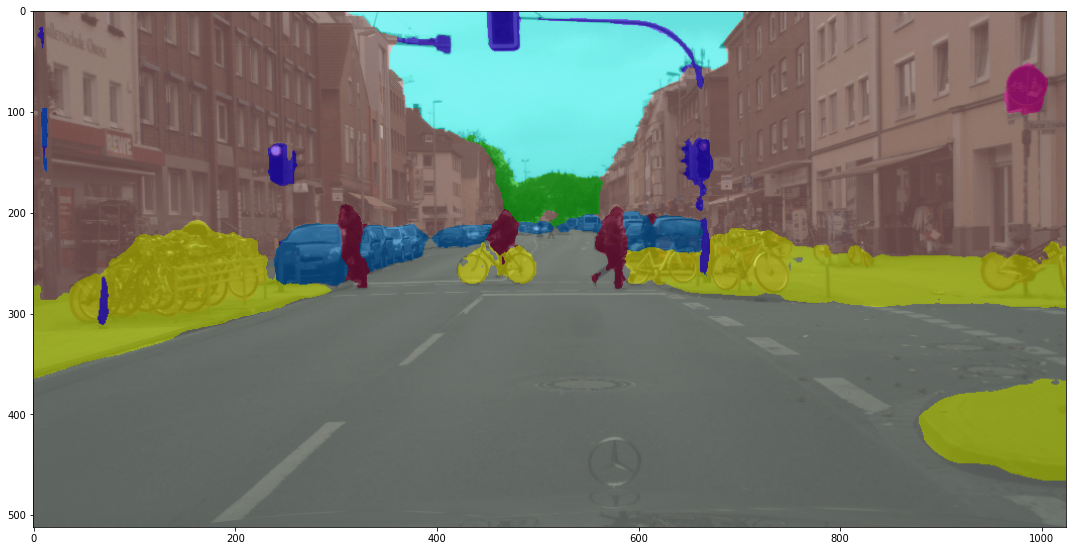

In [ ]:
# show the results
show_result_pyplot(model, img, result, get_palette('ade20k'))

## Train a semantic segmentation model on a new dataset

To train on a customized dataset, the following steps are necessary. 
1. Add a new dataset class. 
2. Create a config file accordingly. 
3. Perform training and evaluation. 

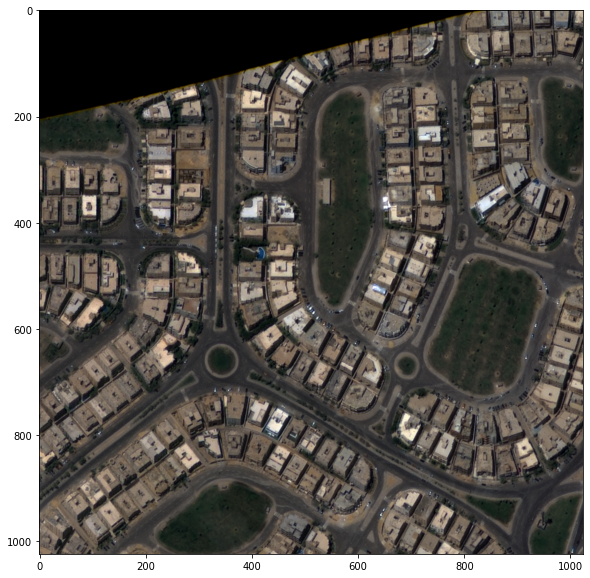

In [ ]:
# Let's take a look at the dataset
import mmcv
import matplotlib.pyplot as plt

img = mmcv.imread('/content/drive/Shareddrives/msmg/level1/dataset/train/road/image/BLD00001_PS3_K3A_NIA0276.png')
plt.figure(figsize=(10, 10))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

In [ ]:
import os.path as osp
import numpy as np
from PIL import Image
import cv2

# convert dataset annotation to semantic segmentation map
data_root = '/content/drive/Shareddrives/msmg/level1/dataset/train/road'
img_dir = 'image'
ann_dir = 'annotation'

# define class and plaette for better visualization
classes = ('background', 'road')
palette = [[0, 0, 0], [255, 0, 255]]

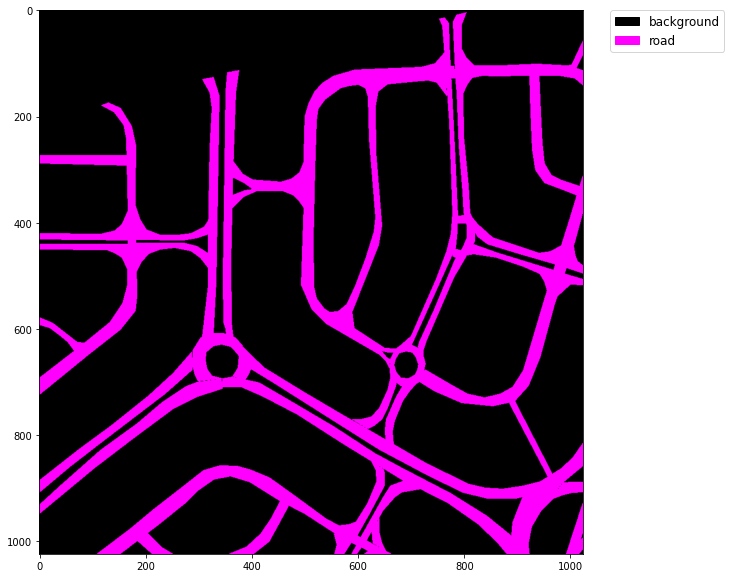

In [ ]:
# Let's take a look at the segmentation map we got
import matplotlib.patches as mpatches

img = Image.open('/content/drive/Shareddrives/msmg/level1/dataset/train/road/annotation/BLD00001_PS3_K3A_NIA0276.png')
plt.figure(figsize=(10, 10))
im = plt.imshow(np.array(img.convert('RGB')))

# create a patch (proxy artist) for every color 
patches = [mpatches.Patch(color=np.array(palette[i])/255., label=classes[i]) for i in range(2)]

# put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize='large')

plt.show()

# Create a config file
In the next step, we need to modify the config for the training. To accelerate the process, we finetune the model from trained weights.

In [ ]:
config_file = '/content/mmsegmentation/configs/segformer/segformer_mit-b5_512x512_160k_ade20k.py'
checkpoint_file = '/content/mmsegmentation/checkpoints/segformer_mit-b5_512x512_160k_ade20k_20210726_145235-94cedf59.pth'
save_pth_path = '/content/drive/Shareddrives/msmg/level1/source/road/segformer/mit-b5/no35_iter30000_origin_add_deepglobe_checkpoint'

In [ ]:
# convert dataset annotation to semantic segmentation map
data_root = '/content/drive/Shareddrives/msmg/level1/dataset/train/road'
img_dir = 'image'
ann_dir = 'annotation'

# define class and plaette for better visualization
classes = ('background', 'road')
palette = [[0, 0, 0], [255, 0, 255]]

In [ ]:
from mmseg.datasets.builder import DATASETS
from mmseg.datasets.custom import CustomDataset

@DATASETS.register_module(force=True)
class RoadSemanticSegmentation(CustomDataset):
    CLASSES = classes
    PALETTE = palette
    def __init__(self, split, **kwargs):
        super().__init__(img_suffix='.png', seg_map_suffix='.png', split=split, **kwargs)
        assert osp.exists(self.img_dir) and self.split is not None

In [ ]:
from mmcv import Config

cfg = Config.fromfile(config_file)

In [ ]:
from mmseg.apis import set_random_seed

# add CLASSES and PALETTE to checkpoint
cfg.checkpoint_config.meta = dict(
    CLASSES=classes,
    PALETTE=palette)

# Since we use only one GPU, BN is used instead of SyncBN
cfg.norm_cfg = dict(type='BN', requires_grad=True)

#cfg.model.backbone.norm_cfg = cfg.norm_cfg
cfg.model.decode_head.norm_cfg = cfg.norm_cfg

# modify num classes of the model in decode/auxiliary head
cfg.model.decode_head.num_classes = 2

# modify loss function crossentropy
cfg.model.decode_head.loss_decode= [dict(type='FocalLoss',loss_name = 'loss_focal', alpha = 0.8, loss_weight=0.8),
                                    dict(type='LovaszLoss',loss_name = 'loss_lovasz',per_image=False, reduction='none',  loss_type='multi_class',classes='all',class_weight=[0.5, 1.0], loss_weight=0.2)]

# Modify dataset type and path
cfg.dataset_type = 'RoadSemanticSegmentation'
cfg.data_root = data_root

cfg.data.samples_per_gpu = 6
cfg.data.workers_per_gpu = 6

# Albumentations transforms settings
albu_train_transforms = [
    dict(
    type='OneOf',
    transforms=[
        dict(type='RandomRotate90', p=1.0)
    ], p=0.5),

    dict(
    type='OneOf',
    transforms=[
        dict(type='RandomBrightnessContrast',brightness_limit=0.1, contrast_limit=0.15, p=1.0),
        dict(type='CLAHE', clip_limit=4.0, tile_grid_size=(8, 8), always_apply=False, p=1.0),
        dict(type='HueSaturationValue', hue_shift_limit=15, sat_shift_limit=25, val_shift_limit=10, p=1.0),
    ], p=0.5)
]

# pipline
cfg.img_norm_cfg = dict(
    mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375], to_rgb=True)
cfg.crop_size = (512, 512)
cfg.train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'),
    dict(type='Resize', img_scale=(1024, 1024), ratio_range=(0.5, 1.5)),
    dict(type='RandomCrop', crop_size=cfg.crop_size, cat_max_ratio=0.75),
    dict(type='RandomFlip', flip_ratio=0.5),
    dict(
        type='Albu',
        transforms=albu_train_transforms,
        keymap=dict(img='image', gt_semantic_seg='mask'),
        update_pad_shape=True,
        ),
    dict(type='PhotoMetricDistortion'),
    dict(type='Normalize', **cfg.img_norm_cfg),
    dict(type='Pad', size=cfg.crop_size, pad_val=0, seg_pad_val=255),
    dict(type='DefaultFormatBundle'),
    dict(type='Collect', keys=['img', 'gt_semantic_seg']),
]

cfg.test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(
        type='MultiScaleFlipAug',
        img_scale=(1024, 1024),
        # img_ratios=[0.5, 0.75, 1.0, 1.25, 1.5, 1.75],
        flip=False,
        transforms=[
            dict(type='Resize', keep_ratio=True),
            dict(type='RandomFlip'),
            dict(type='Normalize', **cfg.img_norm_cfg),
            dict(type='ImageToTensor', keys=['img']),
            dict(type='Collect', keys=['img']),
        ])
]

cfg.data.train.type = cfg.dataset_type
cfg.data.train.data_root = '/content/drive/Shareddrives/msmg/level1/dataset/train/road/'
cfg.data.train.img_dir = 'image'
cfg.data.train.ann_dir = 'annotation'
cfg.data.train.pipeline = cfg.train_pipeline
cfg.data.train.split = 'split/train.txt'

cfg.data.val.type = cfg.dataset_type
cfg.data.val.data_root = '/content/drive/Shareddrives/msmg/level1/dataset/validation/road/'
cfg.data.val.img_dir = 'image'
cfg.data.val.ann_dir = 'annotation'
cfg.data.val.pipeline = cfg.test_pipeline
cfg.data.val.split = 'split/validation.txt'

cfg.data.test.type = cfg.dataset_type
cfg.data.test.data_root = '/content/drive/Shareddrives/msmg/level1/dataset/validation/road/'
cfg.data.test.img_dir = 'image'
cfg.data.test.ann_dir = 'annotation'
cfg.data.test.pipeline = cfg.test_pipeline
cfg.data.test.split = 'split/validation.txt'

# We can still use the pre-trained Mask RCNN model though we do not need to
# use the mask branch
cfg.load_from = checkpoint_file

# Set up working dir to save files and logs.
cfg.work_dir = save_pth_path

cfg.runner.max_iters = 35000
cfg.log_config.interval = 10
cfg.evaluation.interval = 100
cfg.evaluation.save_best = 'mIoU'
cfg.checkpoint_config.interval = 2000

# Set seed to facitate reproducing the result
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)

# We can also use tensorboard to log the training process
cfg.log_config.hooks = [
    dict(type='TextLoggerHook'),
    dict(type='TensorboardLoggerHook')]

# Let's have a look at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
norm_cfg = dict(type='BN', requires_grad=True)
model = dict(
    type='EncoderDecoder',
    pretrained='pretrain/mit_b5.pth',
    backbone=dict(
        type='MixVisionTransformer',
        in_channels=3,
        embed_dims=64,
        num_stages=4,
        num_layers=[3, 6, 40, 3],
        num_heads=[1, 2, 5, 8],
        patch_sizes=[7, 3, 3, 3],
        sr_ratios=[8, 4, 2, 1],
        out_indices=(0, 1, 2, 3),
        mlp_ratio=4,
        qkv_bias=True,
        drop_rate=0.0,
        attn_drop_rate=0.0,
        drop_path_rate=0.1),
    decode_head=dict(
        type='SegformerHead',
        in_channels=[64, 128, 320, 512],
        in_index=[0, 1, 2, 3],
        channels=256,
        dropout_ratio=0.1,
        num_classes=2,
        norm_cfg=dict(type='BN', requires_grad=True),
        align_corners=False,
        loss_decode=[
            dict(
                type='FocalLoss',
                loss_name='loss_focal',
                alpha=0.8,
                loss_weight=0.8)

In [ ]:
################### origin + deepglobe data ###################

dataset_origin_train = dict(
    type='RoadSemanticSegmentation',
    data_root='/content/drive/Shareddrives/msmg/level1/dataset/train/road/',
    img_dir='image',
    ann_dir='annotation',
    pipeline=[
        dict(type='LoadImageFromFile'),
        dict(type='LoadAnnotations'),
        dict(type='Resize', img_scale=(1024, 1024), ratio_range=(0.5, 1.5)),
        dict(type='RandomCrop', crop_size=(512, 512)),
        dict(type='RandomFlip', flip_ratio=0.5),
        dict(
            type='Albu',
            transforms=albu_train_transforms,
            keymap=dict(img='image', gt_semantic_seg='mask'),
            update_pad_shape=True,
        ),
        dict(type='PhotoMetricDistortion'),
        dict(type='Normalize',mean=[123.675, 116.28, 103.53],std=[58.395, 57.12, 57.375],to_rgb=True),
        dict(type='Pad', size=(512, 512), pad_val=0, seg_pad_val=255),
        dict(type='DefaultFormatBundle'),
        dict(type='Collect', keys=['img', 'gt_semantic_seg'])
    ],
    split='split/train.txt'
)

dataset_deepglobe_train = dict(
    type='RoadSemanticSegmentation',
    data_root= '/content/drive/Shareddrives/msmg/level1/dataset/train/road/',
    img_dir='deepglobe_image',
    ann_dir='deepglobe_annotation',
    pipeline=[
        dict(type='LoadImageFromFile'),
        dict(type='LoadAnnotations'),
        dict(type='Resize', img_scale=(1024, 1024), ratio_range=(0.7, 2.0)),
        dict(type='RandomCrop', crop_size=(512, 512)),
        dict(type='RandomFlip', flip_ratio=0.5),
        dict(
            type='Albu',
            transforms=albu_train_transforms,
            keymap=dict(img='image', gt_semantic_seg='mask'),
            update_pad_shape=True,
        ),
        dict(type='PhotoMetricDistortion'),
        dict(type='Normalize',mean=[123.675, 116.28, 103.53],std=[58.395, 57.12, 57.375],to_rgb=True),
        dict(type='Pad', size=(512, 512), pad_val=0, seg_pad_val=255),
        dict(type='DefaultFormatBundle'),
        dict(type='Collect', keys=['img', 'gt_semantic_seg'])
        ],
    split='split/deepglobe_ratio95.txt'
)

cfg.data.train = [
                  dataset_origin_train,
                  dataset_deepglobe_train
]
    
# Let's have a look at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
norm_cfg = dict(type='BN', requires_grad=True)
model = dict(
    type='EncoderDecoder',
    pretrained='pretrain/mit_b5.pth',
    backbone=dict(
        type='MixVisionTransformer',
        in_channels=3,
        embed_dims=64,
        num_stages=4,
        num_layers=[3, 6, 40, 3],
        num_heads=[1, 2, 5, 8],
        patch_sizes=[7, 3, 3, 3],
        sr_ratios=[8, 4, 2, 1],
        out_indices=(0, 1, 2, 3),
        mlp_ratio=4,
        qkv_bias=True,
        drop_rate=0.0,
        attn_drop_rate=0.0,
        drop_path_rate=0.1),
    decode_head=dict(
        type='SegformerHead',
        in_channels=[64, 128, 320, 512],
        in_index=[0, 1, 2, 3],
        channels=256,
        dropout_ratio=0.1,
        num_classes=2,
        norm_cfg=dict(type='BN', requires_grad=True),
        align_corners=False,
        loss_decode=[
            dict(
                type='FocalLoss',
                loss_name='loss_focal',
                alpha=0.8,
                loss_weight=0.8)

# Train and Evaluation

In [ ]:
from mmseg.datasets import build_dataset
from mmseg.models import build_segmentor
from mmseg.apis import train_segmentor

# Build the dataset
datasets = [build_dataset(cfg.data.train)]

2022-05-31 04:30:34,995 - mmseg - INFO - Loaded 1144 images
2022-05-31 04:30:35,463 - mmseg - INFO - Loaded 1784 images


In [ ]:
# Build the detector
model = build_segmentor(
    cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))

# Add an attribute for visualization convenience
model.CLASSES = datasets[0].CLASSES

/content/mmsegmentation/mmseg/models/backbones/mit.py:365: UserWarning: DeprecationWarning: pretrained is deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is deprecated, '


In [ ]:
# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_segmentor(model, datasets, cfg, distributed=False, validate=True, meta=dict())

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
2022-05-31 04:30:40,222 - mmseg - INFO - Loaded 127 images
2022-05-31 04:30:40,225 - mmseg - INFO - load checkpoint from local path: /content/mmsegmentation/checkpoints/segformer_mit-b5_512x512_160k_ade20k_20210726_145235-94cedf59.pth
2022-05-31 04:30:40,781 - mmseg - WARNING - The model and loaded state dict do not match exactly

size mismatch for decode_head.conv_seg.weight: copying a param with shape torch.Size([150, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([2, 256, 1, 1]).
size mismatch for decode_head.con

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 1.4 task/s, elapsed: 94s, ETA:     0s

2022-05-31 04:35:24,768 - mmseg - INFO - per class results:
2022-05-31 04:35:24,772 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 86.67 | 92.22 |
|    road    | 28.72 | 47.15 |
+------------+-------+-------+
2022-05-31 04:35:24,779 - mmseg - INFO - Summary:
2022-05-31 04:35:24,783 - mmseg - INFO - 
+-------+------+-------+
|  aAcc | mIoU |  mAcc |
+-------+------+-------+
| 87.35 | 57.7 | 69.69 |
+-------+------+-------+
2022-05-31 04:35:32,868 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_100.pth.
2022-05-31 04:35:32,870 - mmseg - INFO - Best mIoU is 0.5770 at 100 iter.
2022-05-31 04:35:32,882 - mmseg - INFO - Iter(val) [127]	aAcc: 0.8735, mIoU: 0.5770, mAcc: 0.6969, IoU.background: 0.8667, IoU.road: 0.2872, Acc.background: 0.9222, Acc.road: 0.4715
2022-05-31 04:35:50,872 - mmseg - INFO - Iter [110/35000]	lr: 4.346e-06, eta: 1 day, 3:02:55, time: 11.977, data_time: 10.190, memory: 13841, 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 04:39:14,055 - mmseg - INFO - per class results:
2022-05-31 04:39:14,059 - mmseg - INFO - 
+------------+-------+------+
|   Class    |  IoU  | Acc  |
+------------+-------+------+
| background | 89.01 | 92.7 |
|    road    | 41.06 | 65.8 |
+------------+-------+------+
2022-05-31 04:39:14,060 - mmseg - INFO - Summary:
2022-05-31 04:39:14,063 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 89.79 | 65.04 | 79.25 |
+-------+-------+-------+
2022-05-31 04:39:14,079 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/level1/source/road/segformer/mit-b5/no35_iter30000_origin_add_deepglobe_checkpoint/best_mIoU_iter_100.pth was removed
2022-05-31 04:39:21,272 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_200.pth.
2022-05-31 04:39:21,275 - mmseg - INFO - Best mIoU is 0.6504 at 200 iter.
2022-05-31 04:39:21,281 - mmseg - INFO - Iter(val) [127]	aAcc: 0.8979, mIoU: 0.6504, mAcc: 0.7925, IoU.b

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 04:43:02,247 - mmseg - INFO - per class results:
2022-05-31 04:43:02,251 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 88.64 | 91.14 |
|    road    | 44.35 | 76.79 |
+------------+-------+-------+
2022-05-31 04:43:02,254 - mmseg - INFO - Summary:
2022-05-31 04:43:02,258 - mmseg - INFO - 
+-------+------+-------+
|  aAcc | mIoU |  mAcc |
+-------+------+-------+
| 89.59 | 66.5 | 83.96 |
+-------+------+-------+
2022-05-31 04:43:02,272 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/level1/source/road/segformer/mit-b5/no35_iter30000_origin_add_deepglobe_checkpoint/best_mIoU_iter_200.pth was removed
2022-05-31 04:43:10,527 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_300.pth.
2022-05-31 04:43:10,529 - mmseg - INFO - Best mIoU is 0.6650 at 300 iter.
2022-05-31 04:43:10,535 - mmseg - INFO - Iter(val) [127]	aAcc: 0.8959, mIoU: 0.6650, mAcc: 0.8396, IoU.

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 04:46:51,758 - mmseg - INFO - per class results:
2022-05-31 04:46:51,762 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background |  91.5 | 94.88 |
|    road    | 48.86 | 69.51 |
+------------+-------+-------+
2022-05-31 04:46:51,764 - mmseg - INFO - Summary:
2022-05-31 04:46:51,769 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 92.14 | 70.18 | 82.19 |
+-------+-------+-------+
2022-05-31 04:46:51,782 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/level1/source/road/segformer/mit-b5/no35_iter30000_origin_add_deepglobe_checkpoint/best_mIoU_iter_300.pth was removed
2022-05-31 04:46:59,836 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_400.pth.
2022-05-31 04:46:59,838 - mmseg - INFO - Best mIoU is 0.7018 at 400 iter.
2022-05-31 04:46:59,844 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9214, mIoU: 0.7018, mAcc: 0.8219,

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 04:50:45,220 - mmseg - INFO - per class results:
2022-05-31 04:50:45,224 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 91.42 | 94.38 |
|    road    | 50.05 | 73.25 |
+------------+-------+-------+
2022-05-31 04:50:45,226 - mmseg - INFO - Summary:
2022-05-31 04:50:45,232 - mmseg - INFO - 
+------+-------+-------+
| aAcc |  mIoU |  mAcc |
+------+-------+-------+
| 92.1 | 70.73 | 83.81 |
+------+-------+-------+
2022-05-31 04:50:45,245 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/level1/source/road/segformer/mit-b5/no35_iter30000_origin_add_deepglobe_checkpoint/best_mIoU_iter_400.pth was removed
2022-05-31 04:50:53,464 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_500.pth.
2022-05-31 04:50:53,471 - mmseg - INFO - Best mIoU is 0.7073 at 500 iter.
2022-05-31 04:50:53,477 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9210, mIoU: 0.7073, mAcc: 0.8381, IoU.

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 04:54:32,059 - mmseg - INFO - per class results:
2022-05-31 04:54:32,063 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 92.03 | 95.33 |
|    road    | 50.85 | 70.45 |
+------------+-------+-------+
2022-05-31 04:54:32,067 - mmseg - INFO - Summary:
2022-05-31 04:54:32,071 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 92.64 | 71.44 | 82.89 |
+-------+-------+-------+
2022-05-31 04:54:32,085 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/level1/source/road/segformer/mit-b5/no35_iter30000_origin_add_deepglobe_checkpoint/best_mIoU_iter_500.pth was removed
2022-05-31 04:54:40,551 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_600.pth.
2022-05-31 04:54:40,553 - mmseg - INFO - Best mIoU is 0.7144 at 600 iter.
2022-05-31 04:54:40,560 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9264, mIoU: 0.7144, mAcc: 0.8289,

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 04:58:18,560 - mmseg - INFO - per class results:
2022-05-31 04:58:18,564 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background |  92.4 | 95.64 |
|    road    | 52.23 | 71.03 |
+------------+-------+-------+
2022-05-31 04:58:18,568 - mmseg - INFO - Summary:
2022-05-31 04:58:18,573 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 92.98 | 72.32 | 83.33 |
+-------+-------+-------+
2022-05-31 04:58:18,585 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/level1/source/road/segformer/mit-b5/no35_iter30000_origin_add_deepglobe_checkpoint/best_mIoU_iter_600.pth was removed
2022-05-31 04:58:26,499 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_700.pth.
2022-05-31 04:58:26,501 - mmseg - INFO - Best mIoU is 0.7232 at 700 iter.
2022-05-31 04:58:26,509 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9298, mIoU: 0.7232, mAcc: 0.8333,

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 05:02:04,347 - mmseg - INFO - per class results:
2022-05-31 05:02:04,350 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 92.53 | 95.48 |
|    road    | 53.65 | 73.64 |
+------------+-------+-------+
2022-05-31 05:02:04,352 - mmseg - INFO - Summary:
2022-05-31 05:02:04,359 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 93.12 | 73.09 | 84.56 |
+-------+-------+-------+
2022-05-31 05:02:04,388 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/level1/source/road/segformer/mit-b5/no35_iter30000_origin_add_deepglobe_checkpoint/best_mIoU_iter_700.pth was removed
2022-05-31 05:02:12,684 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_800.pth.
2022-05-31 05:02:12,686 - mmseg - INFO - Best mIoU is 0.7309 at 800 iter.
2022-05-31 05:02:12,695 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9312, mIoU: 0.7309, mAcc: 0.8456,

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 05:05:50,657 - mmseg - INFO - per class results:
2022-05-31 05:05:50,661 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 92.88 | 95.92 |
|    road    | 54.57 | 72.93 |
+------------+-------+-------+
2022-05-31 05:05:50,665 - mmseg - INFO - Summary:
2022-05-31 05:05:50,669 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 93.44 | 73.73 | 84.43 |
+-------+-------+-------+
2022-05-31 05:05:50,685 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/level1/source/road/segformer/mit-b5/no35_iter30000_origin_add_deepglobe_checkpoint/best_mIoU_iter_800.pth was removed
2022-05-31 05:05:58,871 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_900.pth.
2022-05-31 05:05:58,877 - mmseg - INFO - Best mIoU is 0.7373 at 900 iter.
2022-05-31 05:05:58,882 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9344, mIoU: 0.7373, mAcc: 0.8443,

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 05:09:42,373 - mmseg - INFO - per class results:
2022-05-31 05:09:42,375 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 92.35 | 94.88 |
|    road    | 54.39 | 77.37 |
+------------+-------+-------+
2022-05-31 05:09:42,379 - mmseg - INFO - Summary:
2022-05-31 05:09:42,383 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 92.99 | 73.37 | 86.12 |
+-------+-------+-------+
2022-05-31 05:09:42,388 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9299, mIoU: 0.7337, mAcc: 0.8612, IoU.background: 0.9235, IoU.road: 0.5439, Acc.background: 0.9488, Acc.road: 0.7737
2022-05-31 05:09:59,433 - mmseg - INFO - Iter [1010/35000]	lr: 3.920e-05, eta: 22:01:12, time: 6.394, data_time: 4.702, memory: 13841, decode.loss_focal: 0.0149, decode.loss_lovasz: 0.0503, decode.acc_seg: 93.0282, loss: 0.0653
2022-05-31 05:10:16,458 - mmseg - INFO - Iter [1020/35000]	lr: 3.957e-05, eta: 2

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 05:13:20,532 - mmseg - INFO - per class results:
2022-05-31 05:13:20,535 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 92.51 | 95.67 |
|    road    | 52.92 | 71.81 |
+------------+-------+-------+
2022-05-31 05:13:20,539 - mmseg - INFO - Summary:
2022-05-31 05:13:20,543 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 93.09 | 72.72 | 83.74 |
+-------+-------+-------+
2022-05-31 05:13:20,548 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9309, mIoU: 0.7272, mAcc: 0.8374, IoU.background: 0.9251, IoU.road: 0.5292, Acc.background: 0.9567, Acc.road: 0.7181
2022-05-31 05:13:37,569 - mmseg - INFO - Iter [1110/35000]	lr: 4.295e-05, eta: 21:49:38, time: 6.455, data_time: 4.766, memory: 13841, decode.loss_focal: 0.0140, decode.loss_lovasz: 0.0542, decode.acc_seg: 93.5796, loss: 0.0682
2022-05-31 05:13:54,640 - mmseg - INFO - Iter [1120/35000]	lr: 4.333e-05, eta: 2

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 05:16:57,782 - mmseg - INFO - per class results:
2022-05-31 05:16:57,785 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.32 | 96.77 |
|    road    | 54.86 | 69.49 |
+------------+-------+-------+
2022-05-31 05:16:57,787 - mmseg - INFO - Summary:
2022-05-31 05:16:57,795 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 93.82 | 74.09 | 83.13 |
+-------+-------+-------+
2022-05-31 05:16:57,810 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/level1/source/road/segformer/mit-b5/no35_iter30000_origin_add_deepglobe_checkpoint/best_mIoU_iter_900.pth was removed
2022-05-31 05:17:05,930 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_1200.pth.
2022-05-31 05:17:05,932 - mmseg - INFO - Best mIoU is 0.7409 at 1200 iter.
2022-05-31 05:17:05,940 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9382, mIoU: 0.7409, mAcc: 0.831

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 05:20:44,271 - mmseg - INFO - per class results:
2022-05-31 05:20:44,273 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background |  93.6 | 97.13 |
|    road    | 55.69 | 68.88 |
+------------+-------+-------+
2022-05-31 05:20:44,275 - mmseg - INFO - Summary:
2022-05-31 05:20:44,282 - mmseg - INFO - 
+-------+-------+------+
|  aAcc |  mIoU | mAcc |
+-------+-------+------+
| 94.08 | 74.64 | 83.0 |
+-------+-------+------+
2022-05-31 05:20:44,302 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/level1/source/road/segformer/mit-b5/no35_iter30000_origin_add_deepglobe_checkpoint/best_mIoU_iter_1200.pth was removed
2022-05-31 05:20:52,408 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_1300.pth.
2022-05-31 05:20:52,420 - mmseg - INFO - Best mIoU is 0.7464 at 1300 iter.
2022-05-31 05:20:52,423 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9408, mIoU: 0.7464, mAcc: 0.8300, I

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 05:24:30,485 - mmseg - INFO - per class results:
2022-05-31 05:24:30,489 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.23 | 96.19 |
|    road    | 56.15 | 73.83 |
+------------+-------+-------+
2022-05-31 05:24:30,493 - mmseg - INFO - Summary:
2022-05-31 05:24:30,496 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 93.77 | 74.69 | 85.01 |
+-------+-------+-------+
2022-05-31 05:24:30,509 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/level1/source/road/segformer/mit-b5/no35_iter30000_origin_add_deepglobe_checkpoint/best_mIoU_iter_1300.pth was removed
2022-05-31 05:24:38,459 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_1400.pth.
2022-05-31 05:24:38,462 - mmseg - INFO - Best mIoU is 0.7469 at 1400 iter.
2022-05-31 05:24:38,472 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9377, mIoU: 0.7469, mAcc: 0.85

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 48s, ETA:     0s

2022-05-31 05:28:22,117 - mmseg - INFO - per class results:
2022-05-31 05:28:22,121 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.59 | 96.92 |
|    road    | 56.34 | 70.66 |
+------------+-------+-------+
2022-05-31 05:28:22,124 - mmseg - INFO - Summary:
2022-05-31 05:28:22,126 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.08 | 74.97 | 83.79 |
+-------+-------+-------+
2022-05-31 05:28:22,146 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/level1/source/road/segformer/mit-b5/no35_iter30000_origin_add_deepglobe_checkpoint/best_mIoU_iter_1400.pth was removed
2022-05-31 05:28:30,318 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_1500.pth.
2022-05-31 05:28:30,345 - mmseg - INFO - Best mIoU is 0.7497 at 1500 iter.
2022-05-31 05:28:30,348 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9408, mIoU: 0.7497, mAcc: 0.83

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 05:32:08,692 - mmseg - INFO - per class results:
2022-05-31 05:32:08,698 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background |  94.0 | 97.84 |
|    road    | 56.23 | 66.26 |
+------------+-------+-------+
2022-05-31 05:32:08,702 - mmseg - INFO - Summary:
2022-05-31 05:32:08,705 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.43 | 75.11 | 82.05 |
+-------+-------+-------+
2022-05-31 05:32:08,717 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/level1/source/road/segformer/mit-b5/no35_iter30000_origin_add_deepglobe_checkpoint/best_mIoU_iter_1500.pth was removed
2022-05-31 05:32:17,004 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_1600.pth.
2022-05-31 05:32:17,007 - mmseg - INFO - Best mIoU is 0.7511 at 1600 iter.
2022-05-31 05:32:17,014 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9443, mIoU: 0.7511, mAcc: 0.82

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 05:35:55,704 - mmseg - INFO - per class results:
2022-05-31 05:35:55,708 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.16 | 95.85 |
|    road    | 56.75 | 76.17 |
+------------+-------+-------+
2022-05-31 05:35:55,712 - mmseg - INFO - Summary:
2022-05-31 05:35:55,716 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 93.72 | 74.95 | 86.01 |
+-------+-------+-------+
2022-05-31 05:35:55,720 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9372, mIoU: 0.7495, mAcc: 0.8601, IoU.background: 0.9316, IoU.road: 0.5675, Acc.background: 0.9585, Acc.road: 0.7617
2022-05-31 05:36:12,833 - mmseg - INFO - Iter [1710/35000]	lr: 5.707e-05, eta: 21:14:48, time: 6.420, data_time: 4.722, memory: 13841, decode.loss_focal: 0.0110, decode.loss_lovasz: 0.0462, decode.acc_seg: 95.1493, loss: 0.0572
2022-05-31 05:36:29,847 - mmseg - INFO - Iter [1720/35000]	lr: 5.705e-05, eta: 2

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 05:39:33,491 - mmseg - INFO - per class results:
2022-05-31 05:39:33,495 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.95 | 97.42 |
|    road    |  57.3 | 69.49 |
+------------+-------+-------+
2022-05-31 05:39:33,499 - mmseg - INFO - Summary:
2022-05-31 05:39:33,503 - mmseg - INFO - 
+------+-------+-------+
| aAcc |  mIoU |  mAcc |
+------+-------+-------+
| 94.4 | 75.62 | 83.45 |
+------+-------+-------+
2022-05-31 05:39:33,519 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/level1/source/road/segformer/mit-b5/no35_iter30000_origin_add_deepglobe_checkpoint/best_mIoU_iter_1600.pth was removed
2022-05-31 05:39:41,535 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_1800.pth.
2022-05-31 05:39:41,537 - mmseg - INFO - Best mIoU is 0.7562 at 1800 iter.
2022-05-31 05:39:41,544 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9440, mIoU: 0.7562, mAcc: 0.8345, I

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 05:43:20,012 - mmseg - INFO - per class results:
2022-05-31 05:43:20,016 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.75 | 96.69 |
|    road    | 58.21 |  74.1 |
+------------+-------+-------+
2022-05-31 05:43:20,019 - mmseg - INFO - Summary:
2022-05-31 05:43:20,022 - mmseg - INFO - 
+-------+-------+------+
|  aAcc |  mIoU | mAcc |
+-------+-------+------+
| 94.25 | 75.98 | 85.4 |
+-------+-------+------+
2022-05-31 05:43:20,040 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/level1/source/road/segformer/mit-b5/no35_iter30000_origin_add_deepglobe_checkpoint/best_mIoU_iter_1800.pth was removed
2022-05-31 05:43:28,015 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_1900.pth.
2022-05-31 05:43:28,017 - mmseg - INFO - Best mIoU is 0.7598 at 1900 iter.
2022-05-31 05:43:28,024 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9425, mIoU: 0.7598, mAcc: 0.8540, I

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.6 task/s, elapsed: 48s, ETA:     0s

2022-05-31 05:47:20,928 - mmseg - INFO - per class results:
2022-05-31 05:47:20,932 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.39 | 96.02 |
|    road    |  57.8 | 76.78 |
+------------+-------+-------+
2022-05-31 05:47:20,938 - mmseg - INFO - Summary:
2022-05-31 05:47:20,942 - mmseg - INFO - 
+-------+-------+------+
|  aAcc |  mIoU | mAcc |
+-------+-------+------+
| 93.94 | 75.59 | 86.4 |
+-------+-------+------+
2022-05-31 05:47:20,945 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9394, mIoU: 0.7559, mAcc: 0.8640, IoU.background: 0.9339, IoU.road: 0.5780, Acc.background: 0.9602, Acc.road: 0.7678
2022-05-31 05:47:38,038 - mmseg - INFO - Iter [2010/35000]	lr: 5.656e-05, eta: 21:02:11, time: 6.531, data_time: 4.835, memory: 13841, decode.loss_focal: 0.0138, decode.loss_lovasz: 0.0472, decode.acc_seg: 94.1171, loss: 0.0610
2022-05-31 05:47:55,374 - mmseg - INFO - Iter [2020/35000]	lr: 5.654e-05, eta: 21:00:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 05:50:58,842 - mmseg - INFO - per class results:
2022-05-31 05:50:58,847 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.96 | 97.18 |
|    road    | 58.16 | 71.71 |
+------------+-------+-------+
2022-05-31 05:50:58,851 - mmseg - INFO - Summary:
2022-05-31 05:50:58,854 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.43 | 76.06 | 84.44 |
+-------+-------+-------+
2022-05-31 05:50:58,870 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/level1/source/road/segformer/mit-b5/no35_iter30000_origin_add_deepglobe_checkpoint/best_mIoU_iter_1900.pth was removed
2022-05-31 05:51:07,561 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_2100.pth.
2022-05-31 05:51:07,563 - mmseg - INFO - Best mIoU is 0.7606 at 2100 iter.
2022-05-31 05:51:07,571 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9443, mIoU: 0.7606, mAcc: 0.84

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 05:54:46,016 - mmseg - INFO - per class results:
2022-05-31 05:54:46,020 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.13 | 97.92 |
|    road    | 56.96 | 66.73 |
+------------+-------+-------+
2022-05-31 05:54:46,025 - mmseg - INFO - Summary:
2022-05-31 05:54:46,029 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.55 | 75.54 | 82.33 |
+-------+-------+-------+
2022-05-31 05:54:46,031 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9455, mIoU: 0.7554, mAcc: 0.8233, IoU.background: 0.9413, IoU.road: 0.5696, Acc.background: 0.9792, Acc.road: 0.6673
2022-05-31 05:55:03,113 - mmseg - INFO - Iter [2210/35000]	lr: 5.621e-05, eta: 20:51:04, time: 6.411, data_time: 4.716, memory: 13841, decode.loss_focal: 0.0127, decode.loss_lovasz: 0.0495, decode.acc_seg: 94.3114, loss: 0.0622
2022-05-31 05:55:20,330 - mmseg - INFO - Iter [2220/35000]	lr: 5.620e-05, eta: 2

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 05:58:23,727 - mmseg - INFO - per class results:
2022-05-31 05:58:23,731 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.84 | 97.09 |
|    road    | 57.62 | 71.48 |
+------------+-------+-------+
2022-05-31 05:58:23,736 - mmseg - INFO - Summary:
2022-05-31 05:58:23,740 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.32 | 75.73 | 84.28 |
+-------+-------+-------+
2022-05-31 05:58:23,745 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9432, mIoU: 0.7573, mAcc: 0.8428, IoU.background: 0.9384, IoU.road: 0.5762, Acc.background: 0.9709, Acc.road: 0.7148
2022-05-31 05:58:40,808 - mmseg - INFO - Iter [2310/35000]	lr: 5.604e-05, eta: 20:44:36, time: 6.403, data_time: 4.708, memory: 13841, decode.loss_focal: 0.0122, decode.loss_lovasz: 0.0487, decode.acc_seg: 94.5779, loss: 0.0610
2022-05-31 05:58:57,853 - mmseg - INFO - Iter [2320/35000]	lr: 5.602e-05, eta: 2

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 48s, ETA:     0s

2022-05-31 06:02:01,986 - mmseg - INFO - per class results:
2022-05-31 06:02:01,991 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.03 | 97.05 |
|    road    | 59.13 |  73.5 |
+------------+-------+-------+
2022-05-31 06:02:01,994 - mmseg - INFO - Summary:
2022-05-31 06:02:01,996 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.51 | 76.58 | 85.28 |
+-------+-------+-------+
2022-05-31 06:02:02,011 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/level1/source/road/segformer/mit-b5/no35_iter30000_origin_add_deepglobe_checkpoint/best_mIoU_iter_2100.pth was removed
2022-05-31 06:02:09,867 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_2400.pth.
2022-05-31 06:02:09,869 - mmseg - INFO - Best mIoU is 0.7658 at 2400 iter.
2022-05-31 06:02:09,877 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9451, mIoU: 0.7658, mAcc: 0.85

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 06:05:52,674 - mmseg - INFO - per class results:
2022-05-31 06:05:52,678 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.98 | 97.15 |
|    road    | 58.46 | 72.23 |
+------------+-------+-------+
2022-05-31 06:05:52,681 - mmseg - INFO - Summary:
2022-05-31 06:05:52,695 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.45 | 76.22 | 84.69 |
+-------+-------+-------+
2022-05-31 06:05:52,701 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9445, mIoU: 0.7622, mAcc: 0.8469, IoU.background: 0.9398, IoU.road: 0.5846, Acc.background: 0.9715, Acc.road: 0.7223
2022-05-31 06:06:09,768 - mmseg - INFO - Iter [2510/35000]	lr: 5.570e-05, eta: 20:35:16, time: 6.412, data_time: 4.718, memory: 13841, decode.loss_focal: 0.0118, decode.loss_lovasz: 0.0434, decode.acc_seg: 94.7967, loss: 0.0552
2022-05-31 06:06:26,814 - mmseg - INFO - Iter [2520/35000]	lr: 5.568e-05, eta: 2

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 06:09:30,806 - mmseg - INFO - per class results:
2022-05-31 06:09:30,811 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.16 | 97.37 |
|    road    | 59.08 | 71.91 |
+------------+-------+-------+
2022-05-31 06:09:30,813 - mmseg - INFO - Summary:
2022-05-31 06:09:30,821 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.62 | 76.62 | 84.64 |
+-------+-------+-------+
2022-05-31 06:09:30,838 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/level1/source/road/segformer/mit-b5/no35_iter30000_origin_add_deepglobe_checkpoint/best_mIoU_iter_2400.pth was removed
2022-05-31 06:09:38,963 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_2600.pth.
2022-05-31 06:09:38,964 - mmseg - INFO - Best mIoU is 0.7662 at 2600 iter.
2022-05-31 06:09:38,971 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9462, mIoU: 0.7662, mAcc: 0.84

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 48s, ETA:     0s

2022-05-31 06:13:18,876 - mmseg - INFO - per class results:
2022-05-31 06:13:18,878 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.62 | 96.37 |
|    road    | 58.28 | 75.72 |
+------------+-------+-------+
2022-05-31 06:13:18,880 - mmseg - INFO - Summary:
2022-05-31 06:13:18,883 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.14 | 75.95 | 86.05 |
+-------+-------+-------+
2022-05-31 06:13:18,888 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9414, mIoU: 0.7595, mAcc: 0.8605, IoU.background: 0.9362, IoU.road: 0.5828, Acc.background: 0.9637, Acc.road: 0.7572
2022-05-31 06:13:35,932 - mmseg - INFO - Iter [2710/35000]	lr: 5.536e-05, eta: 20:25:40, time: 6.477, data_time: 4.786, memory: 13841, decode.loss_focal: 0.0120, decode.loss_lovasz: 0.0475, decode.acc_seg: 95.1099, loss: 0.0594
2022-05-31 06:13:53,037 - mmseg - INFO - Iter [2720/35000]	lr: 5.534e-05, eta: 2

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 06:16:56,526 - mmseg - INFO - per class results:
2022-05-31 06:16:56,528 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.59 | 96.28 |
|    road    | 58.36 | 76.26 |
+------------+-------+-------+
2022-05-31 06:16:56,533 - mmseg - INFO - Summary:
2022-05-31 06:16:56,541 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.12 | 75.98 | 86.27 |
+-------+-------+-------+
2022-05-31 06:16:56,547 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9412, mIoU: 0.7598, mAcc: 0.8627, IoU.background: 0.9359, IoU.road: 0.5836, Acc.background: 0.9628, Acc.road: 0.7626
2022-05-31 06:17:13,608 - mmseg - INFO - Iter [2810/35000]	lr: 5.518e-05, eta: 20:19:57, time: 6.410, data_time: 4.716, memory: 13841, decode.loss_focal: 0.0150, decode.loss_lovasz: 0.0504, decode.acc_seg: 93.4169, loss: 0.0654
2022-05-31 06:17:30,651 - mmseg - INFO - Iter [2820/35000]	lr: 5.517e-05, eta: 2

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 06:20:34,853 - mmseg - INFO - per class results:
2022-05-31 06:20:34,858 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background |  94.0 | 96.79 |
|    road    | 59.66 | 75.47 |
+------------+-------+-------+
2022-05-31 06:20:34,867 - mmseg - INFO - Summary:
2022-05-31 06:20:34,870 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.49 | 76.83 | 86.13 |
+-------+-------+-------+
2022-05-31 06:20:34,886 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/level1/source/road/segformer/mit-b5/no35_iter30000_origin_add_deepglobe_checkpoint/best_mIoU_iter_2600.pth was removed
2022-05-31 06:20:42,994 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_2900.pth.
2022-05-31 06:20:42,996 - mmseg - INFO - Best mIoU is 0.7683 at 2900 iter.
2022-05-31 06:20:43,006 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9449, mIoU: 0.7683, mAcc: 0.86

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 06:24:26,488 - mmseg - INFO - per class results:
2022-05-31 06:24:26,490 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.92 | 96.79 |
|    road    | 59.14 | 74.79 |
+------------+-------+-------+
2022-05-31 06:24:26,496 - mmseg - INFO - Summary:
2022-05-31 06:24:26,500 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.42 | 76.53 | 85.79 |
+-------+-------+-------+
2022-05-31 06:24:26,505 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9442, mIoU: 0.7653, mAcc: 0.8579, IoU.background: 0.9392, IoU.road: 0.5914, Acc.background: 0.9679, Acc.road: 0.7479
2022-05-31 06:24:43,586 - mmseg - INFO - Iter [3010/35000]	lr: 5.484e-05, eta: 20:11:31, time: 6.416, data_time: 4.721, memory: 13841, decode.loss_focal: 0.0114, decode.loss_lovasz: 0.0471, decode.acc_seg: 94.9773, loss: 0.0585
2022-05-31 06:25:00,683 - mmseg - INFO - Iter [3020/35000]	lr: 5.482e-05, eta: 2

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 06:28:04,134 - mmseg - INFO - per class results:
2022-05-31 06:28:04,139 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.03 | 95.46 |
|    road    | 57.07 | 78.44 |
+------------+-------+-------+
2022-05-31 06:28:04,141 - mmseg - INFO - Summary:
2022-05-31 06:28:04,155 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 93.62 | 75.05 | 86.95 |
+-------+-------+-------+
2022-05-31 06:28:04,158 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9362, mIoU: 0.7505, mAcc: 0.8695, IoU.background: 0.9303, IoU.road: 0.5707, Acc.background: 0.9546, Acc.road: 0.7844
2022-05-31 06:28:21,253 - mmseg - INFO - Iter [3110/35000]	lr: 5.467e-05, eta: 20:06:06, time: 6.420, data_time: 4.727, memory: 13841, decode.loss_focal: 0.0119, decode.loss_lovasz: 0.0429, decode.acc_seg: 94.8675, loss: 0.0548
2022-05-31 06:28:38,319 - mmseg - INFO - Iter [3120/35000]	lr: 5.465e-05, eta: 2

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 06:31:42,387 - mmseg - INFO - per class results:
2022-05-31 06:31:42,389 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background |  94.0 | 96.74 |
|    road    | 59.85 | 75.94 |
+------------+-------+-------+
2022-05-31 06:31:42,395 - mmseg - INFO - Summary:
2022-05-31 06:31:42,397 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.49 | 76.92 | 86.34 |
+-------+-------+-------+
2022-05-31 06:31:42,415 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/level1/source/road/segformer/mit-b5/no35_iter30000_origin_add_deepglobe_checkpoint/best_mIoU_iter_2900.pth was removed
2022-05-31 06:31:50,533 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_3200.pth.
2022-05-31 06:31:50,535 - mmseg - INFO - Best mIoU is 0.7692 at 3200 iter.
2022-05-31 06:31:50,547 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9449, mIoU: 0.7692, mAcc: 0.86

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 06:35:29,592 - mmseg - INFO - per class results:
2022-05-31 06:35:29,597 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.12 |  97.7 |
|    road    |  57.7 | 68.65 |
+------------+-------+-------+
2022-05-31 06:35:29,602 - mmseg - INFO - Summary:
2022-05-31 06:35:29,607 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.56 | 75.91 | 83.18 |
+-------+-------+-------+
2022-05-31 06:35:29,614 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9456, mIoU: 0.7591, mAcc: 0.8318, IoU.background: 0.9412, IoU.road: 0.5770, Acc.background: 0.9770, Acc.road: 0.6865
2022-05-31 06:35:46,730 - mmseg - INFO - Iter [3310/35000]	lr: 5.433e-05, eta: 19:57:12, time: 6.446, data_time: 4.747, memory: 13841, decode.loss_focal: 0.0126, decode.loss_lovasz: 0.0512, decode.acc_seg: 94.3757, loss: 0.0639
2022-05-31 06:36:03,813 - mmseg - INFO - Iter [3320/35000]	lr: 5.431e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 06:39:07,674 - mmseg - INFO - per class results:
2022-05-31 06:39:07,679 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.75 | 96.36 |
|    road    | 59.24 | 77.04 |
+------------+-------+-------+
2022-05-31 06:39:07,681 - mmseg - INFO - Summary:
2022-05-31 06:39:07,689 - mmseg - INFO - 
+-------+-------+------+
|  aAcc |  mIoU | mAcc |
+-------+-------+------+
| 94.27 | 76.49 | 86.7 |
+-------+-------+------+
2022-05-31 06:39:07,696 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9427, mIoU: 0.7649, mAcc: 0.8670, IoU.background: 0.9375, IoU.road: 0.5924, Acc.background: 0.9636, Acc.road: 0.7704
2022-05-31 06:39:24,718 - mmseg - INFO - Iter [3410/35000]	lr: 5.416e-05, eta: 19:52:05, time: 6.412, data_time: 4.722, memory: 13841, decode.loss_focal: 0.0099, decode.loss_lovasz: 0.0414, decode.acc_seg: 95.4820, loss: 0.0513
2022-05-31 06:39:46,558 - mmseg - INFO - Iter [3420/35000]	lr: 5.414e-05, eta: 19:51:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 06:42:50,779 - mmseg - INFO - per class results:
2022-05-31 06:42:50,787 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.81 | 97.12 |
|    road    | 57.26 | 70.88 |
+------------+-------+-------+
2022-05-31 06:42:50,792 - mmseg - INFO - Summary:
2022-05-31 06:42:50,795 - mmseg - INFO - 
+-------+-------+------+
|  aAcc |  mIoU | mAcc |
+-------+-------+------+
| 94.28 | 75.53 | 84.0 |
+-------+-------+------+
2022-05-31 06:42:50,798 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9428, mIoU: 0.7553, mAcc: 0.8400, IoU.background: 0.9381, IoU.road: 0.5726, Acc.background: 0.9712, Acc.road: 0.7088
2022-05-31 06:43:07,899 - mmseg - INFO - Iter [3510/35000]	lr: 5.398e-05, eta: 19:47:49, time: 6.438, data_time: 4.742, memory: 13841, decode.loss_focal: 0.0114, decode.loss_lovasz: 0.0425, decode.acc_seg: 95.2174, loss: 0.0540
2022-05-31 06:43:24,979 - mmseg - INFO - Iter [3520/35000]	lr: 5.397e-05, eta: 19:46:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 48s, ETA:     0s

2022-05-31 06:46:29,213 - mmseg - INFO - per class results:
2022-05-31 06:46:29,217 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.17 | 97.97 |
|    road    | 57.11 | 66.68 |
+------------+-------+-------+
2022-05-31 06:46:29,223 - mmseg - INFO - Summary:
2022-05-31 06:46:29,227 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.59 | 75.64 | 82.32 |
+-------+-------+-------+
2022-05-31 06:46:29,231 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9459, mIoU: 0.7564, mAcc: 0.8232, IoU.background: 0.9417, IoU.road: 0.5711, Acc.background: 0.9797, Acc.road: 0.6668
2022-05-31 06:46:46,314 - mmseg - INFO - Iter [3610/35000]	lr: 5.381e-05, eta: 19:42:54, time: 6.476, data_time: 4.782, memory: 13841, decode.loss_focal: 0.0140, decode.loss_lovasz: 0.0466, decode.acc_seg: 93.8469, loss: 0.0607
2022-05-31 06:47:03,424 - mmseg - INFO - Iter [3620/35000]	lr: 5.380e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 06:50:07,193 - mmseg - INFO - per class results:
2022-05-31 06:50:07,198 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.87 | 96.35 |
|    road    | 60.08 | 78.16 |
+------------+-------+-------+
2022-05-31 06:50:07,217 - mmseg - INFO - Summary:
2022-05-31 06:50:07,219 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.39 | 76.98 | 87.26 |
+-------+-------+-------+
2022-05-31 06:50:07,233 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/level1/source/road/segformer/mit-b5/no35_iter30000_origin_add_deepglobe_checkpoint/best_mIoU_iter_3200.pth was removed
2022-05-31 06:50:14,697 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_3700.pth.
2022-05-31 06:50:14,707 - mmseg - INFO - Best mIoU is 0.7698 at 3700 iter.
2022-05-31 06:50:14,712 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9439, mIoU: 0.7698, mAcc: 0.87

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 06:53:53,502 - mmseg - INFO - per class results:
2022-05-31 06:53:53,505 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.82 | 96.91 |
|    road    | 58.01 | 72.79 |
+------------+-------+-------+
2022-05-31 06:53:53,508 - mmseg - INFO - Summary:
2022-05-31 06:53:53,515 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.31 | 75.91 | 84.85 |
+-------+-------+-------+
2022-05-31 06:53:53,518 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9431, mIoU: 0.7591, mAcc: 0.8485, IoU.background: 0.9382, IoU.road: 0.5801, Acc.background: 0.9691, Acc.road: 0.7279
2022-05-31 06:54:10,607 - mmseg - INFO - Iter [3810/35000]	lr: 5.347e-05, eta: 19:34:17, time: 6.420, data_time: 4.725, memory: 13841, decode.loss_focal: 0.0110, decode.loss_lovasz: 0.0433, decode.acc_seg: 95.2271, loss: 0.0543
2022-05-31 06:54:27,720 - mmseg - INFO - Iter [3820/35000]	lr: 5.345e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 48s, ETA:     0s

2022-05-31 06:57:32,098 - mmseg - INFO - per class results:
2022-05-31 06:57:32,103 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.32 | 97.48 |
|    road    | 59.91 | 72.34 |
+------------+-------+-------+
2022-05-31 06:57:32,110 - mmseg - INFO - Summary:
2022-05-31 06:57:32,122 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.77 | 77.11 | 84.91 |
+-------+-------+-------+
2022-05-31 06:57:32,134 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/level1/source/road/segformer/mit-b5/no35_iter30000_origin_add_deepglobe_checkpoint/best_mIoU_iter_3700.pth was removed
2022-05-31 06:57:39,595 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_3900.pth.
2022-05-31 06:57:39,597 - mmseg - INFO - Best mIoU is 0.7711 at 3900 iter.
2022-05-31 06:57:39,606 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9477, mIoU: 0.7711, mAcc: 0.84

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.6 task/s, elapsed: 48s, ETA:     0s

2022-05-31 07:01:33,403 - mmseg - INFO - per class results:
2022-05-31 07:01:33,407 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.06 | 96.79 |
|    road    | 60.14 | 76.07 |
+------------+-------+-------+
2022-05-31 07:01:33,410 - mmseg - INFO - Summary:
2022-05-31 07:01:33,417 - mmseg - INFO - 
+-------+------+-------+
|  aAcc | mIoU |  mAcc |
+-------+------+-------+
| 94.55 | 77.1 | 86.43 |
+-------+------+-------+
2022-05-31 07:01:33,423 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9455, mIoU: 0.7710, mAcc: 0.8643, IoU.background: 0.9406, IoU.road: 0.6014, Acc.background: 0.9679, Acc.road: 0.7607
2022-05-31 07:01:50,473 - mmseg - INFO - Iter [4010/35000]	lr: 5.313e-05, eta: 19:27:48, time: 6.527, data_time: 4.835, memory: 13841, decode.loss_focal: 0.0114, decode.loss_lovasz: 0.0444, decode.acc_seg: 94.8330, loss: 0.0557
2022-05-31 07:02:07,527 - mmseg - INFO - Iter [4020/35000]	lr: 5.311e-05, eta: 19:26:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 07:05:12,008 - mmseg - INFO - per class results:
2022-05-31 07:05:12,014 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.25 |  97.0 |
|    road    | 60.87 | 75.94 |
+------------+-------+-------+
2022-05-31 07:05:12,015 - mmseg - INFO - Summary:
2022-05-31 07:05:12,021 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.72 | 77.56 | 86.47 |
+-------+-------+-------+
2022-05-31 07:05:12,041 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/level1/source/road/segformer/mit-b5/no35_iter30000_origin_add_deepglobe_checkpoint/best_mIoU_iter_3900.pth was removed
2022-05-31 07:05:20,151 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_4100.pth.
2022-05-31 07:05:20,153 - mmseg - INFO - Best mIoU is 0.7756 at 4100 iter.
2022-05-31 07:05:20,170 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9472, mIoU: 0.7756, mAcc: 0.86

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 48s, ETA:     0s

2022-05-31 07:08:59,768 - mmseg - INFO - per class results:
2022-05-31 07:08:59,773 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.17 | 96.97 |
|    road    | 60.32 | 75.38 |
+------------+-------+-------+
2022-05-31 07:08:59,778 - mmseg - INFO - Summary:
2022-05-31 07:08:59,781 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.64 | 77.24 | 86.18 |
+-------+-------+-------+
2022-05-31 07:08:59,785 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9464, mIoU: 0.7724, mAcc: 0.8618, IoU.background: 0.9417, IoU.road: 0.6032, Acc.background: 0.9697, Acc.road: 0.7538
2022-05-31 07:09:17,249 - mmseg - INFO - Iter [4210/35000]	lr: 5.278e-05, eta: 19:19:36, time: 6.526, data_time: 4.798, memory: 13841, decode.loss_focal: 0.0124, decode.loss_lovasz: 0.0472, decode.acc_seg: 94.6921, loss: 0.0597
2022-05-31 07:09:34,352 - mmseg - INFO - Iter [4220/35000]	lr: 5.277e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 07:12:38,420 - mmseg - INFO - per class results:
2022-05-31 07:12:38,426 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.02 | 96.67 |
|    road    | 60.21 | 76.79 |
+------------+-------+-------+
2022-05-31 07:12:38,431 - mmseg - INFO - Summary:
2022-05-31 07:12:38,433 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.52 | 77.12 | 86.73 |
+-------+-------+-------+
2022-05-31 07:12:38,442 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9452, mIoU: 0.7712, mAcc: 0.8673, IoU.background: 0.9402, IoU.road: 0.6021, Acc.background: 0.9667, Acc.road: 0.7679
2022-05-31 07:12:55,535 - mmseg - INFO - Iter [4310/35000]	lr: 5.261e-05, eta: 19:14:55, time: 6.424, data_time: 4.728, memory: 13841, decode.loss_focal: 0.0122, decode.loss_lovasz: 0.0471, decode.acc_seg: 94.6419, loss: 0.0593
2022-05-31 07:13:12,670 - mmseg - INFO - Iter [4320/35000]	lr: 5.260e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 07:16:21,487 - mmseg - INFO - per class results:
2022-05-31 07:16:21,492 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.39 | 97.28 |
|    road    | 61.01 | 74.68 |
+------------+-------+-------+
2022-05-31 07:16:21,497 - mmseg - INFO - Summary:
2022-05-31 07:16:21,501 - mmseg - INFO - 
+-------+------+-------+
|  aAcc | mIoU |  mAcc |
+-------+------+-------+
| 94.84 | 77.7 | 85.98 |
+-------+------+-------+
2022-05-31 07:16:21,515 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/level1/source/road/segformer/mit-b5/no35_iter30000_origin_add_deepglobe_checkpoint/best_mIoU_iter_4100.pth was removed
2022-05-31 07:16:29,070 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_4400.pth.
2022-05-31 07:16:29,074 - mmseg - INFO - Best mIoU is 0.7770 at 4400 iter.
2022-05-31 07:16:29,078 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9484, mIoU: 0.7770, mAcc: 0.8598, I

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 07:20:07,603 - mmseg - INFO - per class results:
2022-05-31 07:20:07,608 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.19 | 96.72 |
|    road    | 61.28 | 77.87 |
+------------+-------+-------+
2022-05-31 07:20:07,611 - mmseg - INFO - Summary:
2022-05-31 07:20:07,614 - mmseg - INFO - 
+-------+-------+------+
|  aAcc |  mIoU | mAcc |
+-------+-------+------+
| 94.68 | 77.74 | 87.3 |
+-------+-------+------+
2022-05-31 07:20:07,630 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/level1/source/road/segformer/mit-b5/no35_iter30000_origin_add_deepglobe_checkpoint/best_mIoU_iter_4400.pth was removed
2022-05-31 07:20:15,205 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_4500.pth.
2022-05-31 07:20:15,207 - mmseg - INFO - Best mIoU is 0.7774 at 4500 iter.
2022-05-31 07:20:15,215 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9468, mIoU: 0.7774, mAcc: 0.8730, I

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 07:23:54,611 - mmseg - INFO - per class results:
2022-05-31 07:23:54,617 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.18 | 96.74 |
|    road    | 61.13 | 77.55 |
+------------+-------+-------+
2022-05-31 07:23:54,624 - mmseg - INFO - Summary:
2022-05-31 07:23:54,626 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.67 | 77.65 | 87.15 |
+-------+-------+-------+
2022-05-31 07:23:54,632 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9467, mIoU: 0.7765, mAcc: 0.8715, IoU.background: 0.9418, IoU.road: 0.6113, Acc.background: 0.9674, Acc.road: 0.7755
2022-05-31 07:24:11,714 - mmseg - INFO - Iter [4610/35000]	lr: 5.210e-05, eta: 19:03:30, time: 6.439, data_time: 4.744, memory: 13841, decode.loss_focal: 0.0110, decode.loss_lovasz: 0.0460, decode.acc_seg: 95.0794, loss: 0.0570
2022-05-31 07:24:28,767 - mmseg - INFO - Iter [4620/35000]	lr: 5.208e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 48s, ETA:     0s

2022-05-31 07:27:33,276 - mmseg - INFO - per class results:
2022-05-31 07:27:33,278 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.97 | 96.45 |
|    road    | 60.48 | 78.18 |
+------------+-------+-------+
2022-05-31 07:27:33,284 - mmseg - INFO - Summary:
2022-05-31 07:27:33,289 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.48 | 77.23 | 87.32 |
+-------+-------+-------+
2022-05-31 07:27:33,292 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9448, mIoU: 0.7723, mAcc: 0.8732, IoU.background: 0.9397, IoU.road: 0.6048, Acc.background: 0.9645, Acc.road: 0.7818
2022-05-31 07:27:50,405 - mmseg - INFO - Iter [4710/35000]	lr: 5.193e-05, eta: 18:58:58, time: 6.494, data_time: 4.796, memory: 13841, decode.loss_focal: 0.0131, decode.loss_lovasz: 0.0490, decode.acc_seg: 94.5248, loss: 0.0621
2022-05-31 07:28:07,445 - mmseg - INFO - Iter [4720/35000]	lr: 5.191e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 07:31:11,286 - mmseg - INFO - per class results:
2022-05-31 07:31:11,289 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.79 | 96.33 |
|    road    | 59.59 | 77.64 |
+------------+-------+-------+
2022-05-31 07:31:11,291 - mmseg - INFO - Summary:
2022-05-31 07:31:11,295 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.31 | 76.69 | 86.99 |
+-------+-------+-------+
2022-05-31 07:31:11,300 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9431, mIoU: 0.7669, mAcc: 0.8699, IoU.background: 0.9379, IoU.road: 0.5959, Acc.background: 0.9633, Acc.road: 0.7764
2022-05-31 07:31:28,401 - mmseg - INFO - Iter [4810/35000]	lr: 5.176e-05, eta: 18:54:25, time: 6.429, data_time: 4.733, memory: 13841, decode.loss_focal: 0.0126, decode.loss_lovasz: 0.0441, decode.acc_seg: 94.5431, loss: 0.0567
2022-05-31 07:31:45,515 - mmseg - INFO - Iter [4820/35000]	lr: 5.174e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 07:34:54,173 - mmseg - INFO - per class results:
2022-05-31 07:34:54,179 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.04 | 96.92 |
|    road    | 59.62 | 74.78 |
+------------+-------+-------+
2022-05-31 07:34:54,183 - mmseg - INFO - Summary:
2022-05-31 07:34:54,188 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.53 | 76.83 | 85.85 |
+-------+-------+-------+
2022-05-31 07:34:54,191 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9453, mIoU: 0.7683, mAcc: 0.8585, IoU.background: 0.9404, IoU.road: 0.5962, Acc.background: 0.9692, Acc.road: 0.7478
2022-05-31 07:35:11,286 - mmseg - INFO - Iter [4910/35000]	lr: 5.158e-05, eta: 18:50:24, time: 6.430, data_time: 4.733, memory: 13841, decode.loss_focal: 0.0115, decode.loss_lovasz: 0.0437, decode.acc_seg: 95.1409, loss: 0.0552
2022-05-31 07:35:28,370 - mmseg - INFO - Iter [4920/35000]	lr: 5.157e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 07:38:31,935 - mmseg - INFO - per class results:
2022-05-31 07:38:31,937 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.65 | 95.95 |
|    road    | 59.77 | 79.73 |
+------------+-------+-------+
2022-05-31 07:38:31,943 - mmseg - INFO - Summary:
2022-05-31 07:38:31,947 - mmseg - INFO - 
+------+-------+-------+
| aAcc |  mIoU |  mAcc |
+------+-------+-------+
| 94.2 | 76.71 | 87.84 |
+------+-------+-------+
2022-05-31 07:38:31,951 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9420, mIoU: 0.7671, mAcc: 0.8784, IoU.background: 0.9365, IoU.road: 0.5977, Acc.background: 0.9595, Acc.road: 0.7973
2022-05-31 07:38:49,033 - mmseg - INFO - Iter [5010/35000]	lr: 5.141e-05, eta: 18:45:53, time: 6.409, data_time: 4.714, memory: 13842, decode.loss_focal: 0.0119, decode.loss_lovasz: 0.0432, decode.acc_seg: 94.5237, loss: 0.0552
2022-05-31 07:39:06,090 - mmseg - INFO - Iter [5020/35000]	lr: 5.140e-05, eta: 18:44:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 07:42:09,927 - mmseg - INFO - per class results:
2022-05-31 07:42:09,930 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.93 |  97.1 |
|    road    | 58.24 | 72.18 |
+------------+-------+-------+
2022-05-31 07:42:09,933 - mmseg - INFO - Summary:
2022-05-31 07:42:09,941 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.41 | 76.09 | 84.64 |
+-------+-------+-------+
2022-05-31 07:42:09,947 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9441, mIoU: 0.7609, mAcc: 0.8464, IoU.background: 0.9393, IoU.road: 0.5824, Acc.background: 0.9710, Acc.road: 0.7218
2022-05-31 07:42:27,023 - mmseg - INFO - Iter [5110/35000]	lr: 5.124e-05, eta: 18:41:25, time: 6.421, data_time: 4.728, memory: 13842, decode.loss_focal: 0.0103, decode.loss_lovasz: 0.0426, decode.acc_seg: 95.7448, loss: 0.0529
2022-05-31 07:42:44,082 - mmseg - INFO - Iter [5120/35000]	lr: 5.122e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 07:45:47,942 - mmseg - INFO - per class results:
2022-05-31 07:45:47,947 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.98 | 96.65 |
|    road    | 59.93 | 76.48 |
+------------+-------+-------+
2022-05-31 07:45:47,950 - mmseg - INFO - Summary:
2022-05-31 07:45:47,953 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.47 | 76.95 | 86.57 |
+-------+-------+-------+
2022-05-31 07:45:47,956 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9447, mIoU: 0.7695, mAcc: 0.8657, IoU.background: 0.9398, IoU.road: 0.5993, Acc.background: 0.9665, Acc.road: 0.7648
2022-05-31 07:46:05,083 - mmseg - INFO - Iter [5210/35000]	lr: 5.107e-05, eta: 18:36:59, time: 6.463, data_time: 4.764, memory: 13842, decode.loss_focal: 0.0110, decode.loss_lovasz: 0.0430, decode.acc_seg: 95.4015, loss: 0.0540
2022-05-31 07:46:22,136 - mmseg - INFO - Iter [5220/35000]	lr: 5.105e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 07:49:25,491 - mmseg - INFO - per class results:
2022-05-31 07:49:25,499 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.93 | 96.58 |
|    road    |  59.8 | 76.66 |
+------------+-------+-------+
2022-05-31 07:49:25,507 - mmseg - INFO - Summary:
2022-05-31 07:49:25,512 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.43 | 76.86 | 86.62 |
+-------+-------+-------+
2022-05-31 07:49:25,516 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9443, mIoU: 0.7686, mAcc: 0.8662, IoU.background: 0.9393, IoU.road: 0.5980, Acc.background: 0.9658, Acc.road: 0.7666
2022-05-31 07:49:42,595 - mmseg - INFO - Iter [5310/35000]	lr: 5.090e-05, eta: 18:32:33, time: 6.404, data_time: 4.709, memory: 13842, decode.loss_focal: 0.0114, decode.loss_lovasz: 0.0434, decode.acc_seg: 95.0808, loss: 0.0548
2022-05-31 07:49:59,632 - mmseg - INFO - Iter [5320/35000]	lr: 5.088e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 07:53:08,103 - mmseg - INFO - per class results:
2022-05-31 07:53:08,110 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.25 |  96.9 |
|    road    | 61.14 | 76.76 |
+------------+-------+-------+
2022-05-31 07:53:08,111 - mmseg - INFO - Summary:
2022-05-31 07:53:08,118 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.73 | 77.69 | 86.83 |
+-------+-------+-------+
2022-05-31 07:53:08,122 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9473, mIoU: 0.7769, mAcc: 0.8683, IoU.background: 0.9425, IoU.road: 0.6114, Acc.background: 0.9690, Acc.road: 0.7676
2022-05-31 07:53:25,184 - mmseg - INFO - Iter [5410/35000]	lr: 5.073e-05, eta: 18:28:36, time: 6.452, data_time: 4.760, memory: 13842, decode.loss_focal: 0.0105, decode.loss_lovasz: 0.0448, decode.acc_seg: 95.2665, loss: 0.0553
2022-05-31 07:53:42,231 - mmseg - INFO - Iter [5420/35000]	lr: 5.071e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 07:56:45,497 - mmseg - INFO - per class results:
2022-05-31 07:56:45,503 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.94 | 96.39 |
|    road    | 60.42 |  78.4 |
+------------+-------+-------+
2022-05-31 07:56:45,506 - mmseg - INFO - Summary:
2022-05-31 07:56:45,510 - mmseg - INFO - 
+-------+-------+------+
|  aAcc |  mIoU | mAcc |
+-------+-------+------+
| 94.45 | 77.18 | 87.4 |
+-------+-------+------+
2022-05-31 07:56:45,513 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9445, mIoU: 0.7718, mAcc: 0.8740, IoU.background: 0.9394, IoU.road: 0.6042, Acc.background: 0.9639, Acc.road: 0.7840
2022-05-31 07:57:02,556 - mmseg - INFO - Iter [5510/35000]	lr: 5.056e-05, eta: 18:24:11, time: 6.394, data_time: 4.702, memory: 13842, decode.loss_focal: 0.0120, decode.loss_lovasz: 0.0449, decode.acc_seg: 94.7792, loss: 0.0569
2022-05-31 07:57:19,609 - mmseg - INFO - Iter [5520/35000]	lr: 5.054e-05, eta: 18:23:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 08:00:23,094 - mmseg - INFO - per class results:
2022-05-31 08:00:23,099 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.84 | 96.17 |
|    road    |  60.4 | 79.49 |
+------------+-------+-------+
2022-05-31 08:00:23,101 - mmseg - INFO - Summary:
2022-05-31 08:00:23,113 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.37 | 77.12 | 87.83 |
+-------+-------+-------+
2022-05-31 08:00:23,116 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9437, mIoU: 0.7712, mAcc: 0.8783, IoU.background: 0.9384, IoU.road: 0.6040, Acc.background: 0.9617, Acc.road: 0.7949
2022-05-31 08:00:40,140 - mmseg - INFO - Iter [5610/35000]	lr: 5.038e-05, eta: 18:19:49, time: 6.390, data_time: 4.701, memory: 13842, decode.loss_focal: 0.0107, decode.loss_lovasz: 0.0424, decode.acc_seg: 95.2321, loss: 0.0531
2022-05-31 08:00:57,175 - mmseg - INFO - Iter [5620/35000]	lr: 5.037e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 08:04:00,447 - mmseg - INFO - per class results:
2022-05-31 08:04:00,459 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.19 | 96.87 |
|    road    | 60.78 | 76.47 |
+------------+-------+-------+
2022-05-31 08:04:00,460 - mmseg - INFO - Summary:
2022-05-31 08:04:00,463 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.67 | 77.49 | 86.67 |
+-------+-------+-------+
2022-05-31 08:04:00,466 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9467, mIoU: 0.7749, mAcc: 0.8667, IoU.background: 0.9419, IoU.road: 0.6078, Acc.background: 0.9687, Acc.road: 0.7647
2022-05-31 08:04:17,544 - mmseg - INFO - Iter [5710/35000]	lr: 5.021e-05, eta: 18:15:28, time: 6.400, data_time: 4.706, memory: 13842, decode.loss_focal: 0.0111, decode.loss_lovasz: 0.0418, decode.acc_seg: 95.2206, loss: 0.0529
2022-05-31 08:04:34,584 - mmseg - INFO - Iter [5720/35000]	lr: 5.020e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 08:07:38,093 - mmseg - INFO - per class results:
2022-05-31 08:07:38,097 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.12 | 96.67 |
|    road    | 60.92 | 77.67 |
+------------+-------+-------+
2022-05-31 08:07:38,100 - mmseg - INFO - Summary:
2022-05-31 08:07:38,106 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.61 | 77.52 | 87.17 |
+-------+-------+-------+
2022-05-31 08:07:38,108 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9461, mIoU: 0.7752, mAcc: 0.8717, IoU.background: 0.9412, IoU.road: 0.6092, Acc.background: 0.9667, Acc.road: 0.7767
2022-05-31 08:07:55,212 - mmseg - INFO - Iter [5810/35000]	lr: 5.004e-05, eta: 18:11:10, time: 6.408, data_time: 4.713, memory: 13842, decode.loss_focal: 0.0095, decode.loss_lovasz: 0.0419, decode.acc_seg: 95.7212, loss: 0.0514
2022-05-31 08:08:12,208 - mmseg - INFO - Iter [5820/35000]	lr: 5.002e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 08:11:20,164 - mmseg - INFO - per class results:
2022-05-31 08:11:20,168 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.22 |  96.9 |
|    road    | 60.94 | 76.52 |
+------------+-------+-------+
2022-05-31 08:11:20,170 - mmseg - INFO - Summary:
2022-05-31 08:11:20,176 - mmseg - INFO - 
+------+-------+-------+
| aAcc |  mIoU |  mAcc |
+------+-------+-------+
| 94.7 | 77.58 | 86.71 |
+------+-------+-------+
2022-05-31 08:11:20,180 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9470, mIoU: 0.7758, mAcc: 0.8671, IoU.background: 0.9422, IoU.road: 0.6094, Acc.background: 0.9690, Acc.road: 0.7652
2022-05-31 08:11:37,219 - mmseg - INFO - Iter [5910/35000]	lr: 4.987e-05, eta: 18:07:14, time: 6.399, data_time: 4.707, memory: 13842, decode.loss_focal: 0.0094, decode.loss_lovasz: 0.0414, decode.acc_seg: 95.9821, loss: 0.0507
2022-05-31 08:11:54,444 - mmseg - INFO - Iter [5920/35000]	lr: 4.985e-05, eta: 18:06:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 48s, ETA:     0s

2022-05-31 08:15:07,265 - mmseg - INFO - per class results:
2022-05-31 08:15:07,270 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background |  94.5 | 97.55 |
|    road    | 61.04 | 73.39 |
+------------+-------+-------+
2022-05-31 08:15:07,274 - mmseg - INFO - Summary:
2022-05-31 08:15:07,277 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.94 | 77.77 | 85.47 |
+-------+-------+-------+
2022-05-31 08:15:07,292 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/level1/source/road/segformer/mit-b5/no35_iter30000_origin_add_deepglobe_checkpoint/best_mIoU_iter_4500.pth was removed
2022-05-31 08:15:14,896 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_6000.pth.
2022-05-31 08:15:14,900 - mmseg - INFO - Best mIoU is 0.7777 at 6000 iter.
2022-05-31 08:15:14,904 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9494, mIoU: 0.7777, mAcc: 0.85

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 48s, ETA:     0s

2022-05-31 08:18:53,495 - mmseg - INFO - per class results:
2022-05-31 08:18:53,499 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.33 | 96.99 |
|    road    | 61.43 | 76.68 |
+------------+-------+-------+
2022-05-31 08:18:53,502 - mmseg - INFO - Summary:
2022-05-31 08:18:53,504 - mmseg - INFO - 
+------+-------+-------+
| aAcc |  mIoU |  mAcc |
+------+-------+-------+
| 94.8 | 77.88 | 86.84 |
+------+-------+-------+
2022-05-31 08:18:53,510 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/level1/source/road/segformer/mit-b5/no35_iter30000_origin_add_deepglobe_checkpoint/best_mIoU_iter_6000.pth was removed
2022-05-31 08:19:01,368 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_6100.pth.
2022-05-31 08:19:01,370 - mmseg - INFO - Best mIoU is 0.7788 at 6100 iter.
2022-05-31 08:19:01,381 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9480, mIoU: 0.7788, mAcc: 0.8684, I

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 08:22:39,232 - mmseg - INFO - per class results:
2022-05-31 08:22:39,237 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.43 | 97.53 |
|    road    | 60.52 | 72.84 |
+------------+-------+-------+
2022-05-31 08:22:39,239 - mmseg - INFO - Summary:
2022-05-31 08:22:39,244 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.86 | 77.47 | 85.19 |
+-------+-------+-------+
2022-05-31 08:22:39,253 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9486, mIoU: 0.7747, mAcc: 0.8519, IoU.background: 0.9443, IoU.road: 0.6052, Acc.background: 0.9753, Acc.road: 0.7284
2022-05-31 08:22:56,334 - mmseg - INFO - Iter [6210/35000]	lr: 4.936e-05, eta: 17:56:31, time: 6.420, data_time: 4.725, memory: 13842, decode.loss_focal: 0.0113, decode.loss_lovasz: 0.0427, decode.acc_seg: 94.9034, loss: 0.0540
2022-05-31 08:23:13,408 - mmseg - INFO - Iter [6220/35000]	lr: 4.934e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 08:26:17,059 - mmseg - INFO - per class results:
2022-05-31 08:26:17,062 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.35 | 96.88 |
|    road    |  61.9 | 77.82 |
+------------+-------+-------+
2022-05-31 08:26:17,070 - mmseg - INFO - Summary:
2022-05-31 08:26:17,073 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.82 | 78.12 | 87.35 |
+-------+-------+-------+
2022-05-31 08:26:17,088 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/level1/source/road/segformer/mit-b5/no35_iter30000_origin_add_deepglobe_checkpoint/best_mIoU_iter_6100.pth was removed
2022-05-31 08:26:24,637 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_6300.pth.
2022-05-31 08:26:24,638 - mmseg - INFO - Best mIoU is 0.7812 at 6300 iter.
2022-05-31 08:26:24,648 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9482, mIoU: 0.7812, mAcc: 0.87

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 08:30:06,721 - mmseg - INFO - per class results:
2022-05-31 08:30:06,726 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background |  94.3 | 97.07 |
|    road    | 61.03 | 75.78 |
+------------+-------+-------+
2022-05-31 08:30:06,738 - mmseg - INFO - Summary:
2022-05-31 08:30:06,740 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.77 | 77.67 | 86.43 |
+-------+-------+-------+
2022-05-31 08:30:06,743 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9477, mIoU: 0.7767, mAcc: 0.8643, IoU.background: 0.9430, IoU.road: 0.6103, Acc.background: 0.9707, Acc.road: 0.7578
2022-05-31 08:30:23,761 - mmseg - INFO - Iter [6410/35000]	lr: 4.901e-05, eta: 17:48:57, time: 6.376, data_time: 4.687, memory: 13842, decode.loss_focal: 0.0098, decode.loss_lovasz: 0.0407, decode.acc_seg: 95.7984, loss: 0.0505
2022-05-31 08:30:40,755 - mmseg - INFO - Iter [6420/35000]	lr: 4.900e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 08:33:43,913 - mmseg - INFO - per class results:
2022-05-31 08:33:43,916 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background |  94.6 | 97.58 |
|    road    | 61.67 | 73.99 |
+------------+-------+-------+
2022-05-31 08:33:43,921 - mmseg - INFO - Summary:
2022-05-31 08:33:43,926 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.03 | 78.14 | 85.79 |
+-------+-------+-------+
2022-05-31 08:33:43,943 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/level1/source/road/segformer/mit-b5/no35_iter30000_origin_add_deepglobe_checkpoint/best_mIoU_iter_6300.pth was removed
2022-05-31 08:33:52,087 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_6500.pth.
2022-05-31 08:33:52,088 - mmseg - INFO - Best mIoU is 0.7814 at 6500 iter.
2022-05-31 08:33:52,098 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9503, mIoU: 0.7814, mAcc: 0.85

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 08:37:29,880 - mmseg - INFO - per class results:
2022-05-31 08:37:29,886 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.26 | 96.76 |
|    road    | 61.63 | 78.08 |
+------------+-------+-------+
2022-05-31 08:37:29,889 - mmseg - INFO - Summary:
2022-05-31 08:37:29,891 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.74 | 77.94 | 87.42 |
+-------+-------+-------+
2022-05-31 08:37:29,894 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9474, mIoU: 0.7794, mAcc: 0.8742, IoU.background: 0.9426, IoU.road: 0.6163, Acc.background: 0.9676, Acc.road: 0.7808
2022-05-31 08:37:46,955 - mmseg - INFO - Iter [6610/35000]	lr: 4.867e-05, eta: 17:41:04, time: 6.392, data_time: 4.699, memory: 13842, decode.loss_focal: 0.0093, decode.loss_lovasz: 0.0413, decode.acc_seg: 95.7952, loss: 0.0506
2022-05-31 08:38:03,932 - mmseg - INFO - Iter [6620/35000]	lr: 4.865e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 08:41:07,028 - mmseg - INFO - per class results:
2022-05-31 08:41:07,033 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.35 |  97.6 |
|    road    | 59.73 | 71.58 |
+------------+-------+-------+
2022-05-31 08:41:07,035 - mmseg - INFO - Summary:
2022-05-31 08:41:07,047 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.79 | 77.04 | 84.59 |
+-------+-------+-------+
2022-05-31 08:41:07,054 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9479, mIoU: 0.7704, mAcc: 0.8459, IoU.background: 0.9435, IoU.road: 0.5973, Acc.background: 0.9760, Acc.road: 0.7158
2022-05-31 08:41:24,073 - mmseg - INFO - Iter [6710/35000]	lr: 4.850e-05, eta: 17:36:50, time: 6.378, data_time: 4.688, memory: 13842, decode.loss_focal: 0.0110, decode.loss_lovasz: 0.0426, decode.acc_seg: 95.0625, loss: 0.0536
2022-05-31 08:41:41,078 - mmseg - INFO - Iter [6720/35000]	lr: 4.848e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 08:44:43,978 - mmseg - INFO - per class results:
2022-05-31 08:44:43,985 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.55 | 97.66 |
|    road    | 61.09 | 72.88 |
+------------+-------+-------+
2022-05-31 08:44:43,994 - mmseg - INFO - Summary:
2022-05-31 08:44:43,997 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.98 | 77.82 | 85.27 |
+-------+-------+-------+
2022-05-31 08:44:44,003 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9498, mIoU: 0.7782, mAcc: 0.8527, IoU.background: 0.9455, IoU.road: 0.6109, Acc.background: 0.9766, Acc.road: 0.7288
2022-05-31 08:45:01,187 - mmseg - INFO - Iter [6810/35000]	lr: 4.833e-05, eta: 17:32:37, time: 6.389, data_time: 4.685, memory: 13842, decode.loss_focal: 0.0105, decode.loss_lovasz: 0.0437, decode.acc_seg: 95.6115, loss: 0.0542
2022-05-31 08:45:18,177 - mmseg - INFO - Iter [6820/35000]	lr: 4.831e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 08:48:25,540 - mmseg - INFO - per class results:
2022-05-31 08:48:25,544 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.37 | 97.12 |
|    road    | 61.37 | 75.94 |
+------------+-------+-------+
2022-05-31 08:48:25,547 - mmseg - INFO - Summary:
2022-05-31 08:48:25,551 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.83 | 77.87 | 86.53 |
+-------+-------+-------+
2022-05-31 08:48:25,553 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9483, mIoU: 0.7787, mAcc: 0.8653, IoU.background: 0.9437, IoU.road: 0.6137, Acc.background: 0.9712, Acc.road: 0.7594
2022-05-31 08:48:42,582 - mmseg - INFO - Iter [6910/35000]	lr: 4.816e-05, eta: 17:28:42, time: 6.361, data_time: 4.671, memory: 13842, decode.loss_focal: 0.0088, decode.loss_lovasz: 0.0441, decode.acc_seg: 96.0637, loss: 0.0530
2022-05-31 08:48:59,591 - mmseg - INFO - Iter [6920/35000]	lr: 4.814e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 08:52:03,221 - mmseg - INFO - per class results:
2022-05-31 08:52:03,224 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background |  94.5 | 97.22 |
|    road    | 62.01 | 76.22 |
+------------+-------+-------+
2022-05-31 08:52:03,226 - mmseg - INFO - Summary:
2022-05-31 08:52:03,233 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.95 | 78.26 | 86.72 |
+-------+-------+-------+
2022-05-31 08:52:03,248 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/level1/source/road/segformer/mit-b5/no35_iter30000_origin_add_deepglobe_checkpoint/best_mIoU_iter_6500.pth was removed
2022-05-31 08:52:11,165 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_7000.pth.
2022-05-31 08:52:11,168 - mmseg - INFO - Best mIoU is 0.7826 at 7000 iter.
2022-05-31 08:52:11,179 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9495, mIoU: 0.7826, mAcc: 0.86

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 08:55:48,755 - mmseg - INFO - per class results:
2022-05-31 08:55:48,759 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.55 |  97.4 |
|    road    | 61.82 | 75.09 |
+------------+-------+-------+
2022-05-31 08:55:48,767 - mmseg - INFO - Summary:
2022-05-31 08:55:48,769 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.99 | 78.18 | 86.24 |
+-------+-------+-------+
2022-05-31 08:55:48,775 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9499, mIoU: 0.7818, mAcc: 0.8624, IoU.background: 0.9455, IoU.road: 0.6182, Acc.background: 0.9740, Acc.road: 0.7509
2022-05-31 08:56:05,817 - mmseg - INFO - Iter [7110/35000]	lr: 4.781e-05, eta: 17:20:55, time: 6.372, data_time: 4.682, memory: 13842, decode.loss_focal: 0.0111, decode.loss_lovasz: 0.0413, decode.acc_seg: 95.2588, loss: 0.0524
2022-05-31 08:56:22,872 - mmseg - INFO - Iter [7120/35000]	lr: 4.780e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 08:59:26,027 - mmseg - INFO - per class results:
2022-05-31 08:59:26,034 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.19 | 96.62 |
|    road    | 61.58 | 78.77 |
+------------+-------+-------+
2022-05-31 08:59:26,042 - mmseg - INFO - Summary:
2022-05-31 08:59:26,044 - mmseg - INFO - 
+-------+-------+------+
|  aAcc |  mIoU | mAcc |
+-------+-------+------+
| 94.69 | 77.89 | 87.7 |
+-------+-------+------+
2022-05-31 08:59:26,049 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9469, mIoU: 0.7789, mAcc: 0.8770, IoU.background: 0.9419, IoU.road: 0.6158, Acc.background: 0.9662, Acc.road: 0.7877
2022-05-31 08:59:43,114 - mmseg - INFO - Iter [7210/35000]	lr: 4.764e-05, eta: 17:16:46, time: 6.363, data_time: 4.670, memory: 13842, decode.loss_focal: 0.0129, decode.loss_lovasz: 0.0475, decode.acc_seg: 94.6622, loss: 0.0604
2022-05-31 09:00:00,165 - mmseg - INFO - Iter [7220/35000]	lr: 4.762e-05, eta: 17:16:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 09:03:03,380 - mmseg - INFO - per class results:
2022-05-31 09:03:03,385 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.58 | 97.38 |
|    road    | 62.12 | 75.56 |
+------------+-------+-------+
2022-05-31 09:03:03,398 - mmseg - INFO - Summary:
2022-05-31 09:03:03,401 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.02 | 78.35 | 86.47 |
+-------+-------+-------+
2022-05-31 09:03:03,418 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/level1/source/road/segformer/mit-b5/no35_iter30000_origin_add_deepglobe_checkpoint/best_mIoU_iter_7000.pth was removed
2022-05-31 09:03:11,341 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_7300.pth.
2022-05-31 09:03:11,345 - mmseg - INFO - Best mIoU is 0.7835 at 7300 iter.
2022-05-31 09:03:11,349 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9502, mIoU: 0.7835, mAcc: 0.86

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 09:06:55,120 - mmseg - INFO - per class results:
2022-05-31 09:06:55,124 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background |  94.6 | 97.35 |
|    road    | 62.33 | 75.94 |
+------------+-------+-------+
2022-05-31 09:06:55,132 - mmseg - INFO - Summary:
2022-05-31 09:06:55,137 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.04 | 78.46 | 86.65 |
+-------+-------+-------+
2022-05-31 09:06:55,153 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/level1/source/road/segformer/mit-b5/no35_iter30000_origin_add_deepglobe_checkpoint/best_mIoU_iter_7300.pth was removed
2022-05-31 09:07:03,194 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_7400.pth.
2022-05-31 09:07:03,195 - mmseg - INFO - Best mIoU is 0.7846 at 7400 iter.
2022-05-31 09:07:03,203 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9504, mIoU: 0.7846, mAcc: 0.86

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 09:10:41,574 - mmseg - INFO - per class results:
2022-05-31 09:10:41,579 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.44 | 96.94 |
|    road    | 62.36 | 78.09 |
+------------+-------+-------+
2022-05-31 09:10:41,583 - mmseg - INFO - Summary:
2022-05-31 09:10:41,590 - mmseg - INFO - 
+-------+------+-------+
|  aAcc | mIoU |  mAcc |
+-------+------+-------+
| 94.91 | 78.4 | 87.52 |
+-------+------+-------+
2022-05-31 09:10:41,597 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9491, mIoU: 0.7840, mAcc: 0.8752, IoU.background: 0.9444, IoU.road: 0.6236, Acc.background: 0.9694, Acc.road: 0.7809
2022-05-31 09:10:58,693 - mmseg - INFO - Iter [7510/35000]	lr: 4.713e-05, eta: 17:05:49, time: 6.425, data_time: 4.729, memory: 13842, decode.loss_focal: 0.0097, decode.loss_lovasz: 0.0404, decode.acc_seg: 95.8912, loss: 0.0502
2022-05-31 09:11:15,717 - mmseg - INFO - Iter [7520/35000]	lr: 4.711e-05, eta: 17:05:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 09:14:19,583 - mmseg - INFO - per class results:
2022-05-31 09:14:19,588 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.57 | 97.33 |
|    road    | 62.19 | 75.91 |
+------------+-------+-------+
2022-05-31 09:14:19,593 - mmseg - INFO - Summary:
2022-05-31 09:14:19,601 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.01 | 78.38 | 86.62 |
+-------+-------+-------+
2022-05-31 09:14:19,604 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9501, mIoU: 0.7838, mAcc: 0.8662, IoU.background: 0.9457, IoU.road: 0.6219, Acc.background: 0.9733, Acc.road: 0.7591
2022-05-31 09:14:36,712 - mmseg - INFO - Iter [7610/35000]	lr: 4.696e-05, eta: 17:01:44, time: 6.436, data_time: 4.740, memory: 13842, decode.loss_focal: 0.0109, decode.loss_lovasz: 0.0389, decode.acc_seg: 95.6067, loss: 0.0498
2022-05-31 09:14:53,790 - mmseg - INFO - Iter [7620/35000]	lr: 4.694e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 09:17:57,350 - mmseg - INFO - per class results:
2022-05-31 09:17:57,352 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.46 | 97.28 |
|    road    | 61.55 | 75.35 |
+------------+-------+-------+
2022-05-31 09:17:57,354 - mmseg - INFO - Summary:
2022-05-31 09:17:57,364 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.91 | 78.01 | 86.32 |
+-------+-------+-------+
2022-05-31 09:17:57,368 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9491, mIoU: 0.7801, mAcc: 0.8632, IoU.background: 0.9446, IoU.road: 0.6155, Acc.background: 0.9728, Acc.road: 0.7535
2022-05-31 09:18:14,569 - mmseg - INFO - Iter [7710/35000]	lr: 4.678e-05, eta: 16:57:39, time: 6.450, data_time: 4.745, memory: 13842, decode.loss_focal: 0.0121, decode.loss_lovasz: 0.0449, decode.acc_seg: 94.3265, loss: 0.0570
2022-05-31 09:18:31,681 - mmseg - INFO - Iter [7720/35000]	lr: 4.677e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 09:21:35,252 - mmseg - INFO - per class results:
2022-05-31 09:21:35,256 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.46 | 97.27 |
|    road    | 61.62 |  75.5 |
+------------+-------+-------+
2022-05-31 09:21:35,259 - mmseg - INFO - Summary:
2022-05-31 09:21:35,264 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.92 | 78.04 | 86.39 |
+-------+-------+-------+
2022-05-31 09:21:35,269 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9492, mIoU: 0.7804, mAcc: 0.8639, IoU.background: 0.9446, IoU.road: 0.6162, Acc.background: 0.9727, Acc.road: 0.7550
2022-05-31 09:21:56,919 - mmseg - INFO - Iter [7810/35000]	lr: 4.661e-05, eta: 16:53:51, time: 6.883, data_time: 5.136, memory: 13842, decode.loss_focal: 0.0092, decode.loss_lovasz: 0.0409, decode.acc_seg: 95.9928, loss: 0.0501
2022-05-31 09:22:13,986 - mmseg - INFO - Iter [7820/35000]	lr: 4.660e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 48s, ETA:     0s

2022-05-31 09:25:18,098 - mmseg - INFO - per class results:
2022-05-31 09:25:18,102 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.54 | 97.47 |
|    road    | 61.57 | 74.44 |
+------------+-------+-------+
2022-05-31 09:25:18,104 - mmseg - INFO - Summary:
2022-05-31 09:25:18,118 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.98 | 78.06 | 85.95 |
+-------+-------+-------+
2022-05-31 09:25:18,123 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9498, mIoU: 0.7806, mAcc: 0.8595, IoU.background: 0.9454, IoU.road: 0.6157, Acc.background: 0.9747, Acc.road: 0.7444
2022-05-31 09:25:35,351 - mmseg - INFO - Iter [7910/35000]	lr: 4.644e-05, eta: 16:49:49, time: 6.499, data_time: 4.791, memory: 13842, decode.loss_focal: 0.0098, decode.loss_lovasz: 0.0430, decode.acc_seg: 95.8111, loss: 0.0528
2022-05-31 09:25:52,416 - mmseg - INFO - Iter [7920/35000]	lr: 4.642e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.6 task/s, elapsed: 48s, ETA:     0s

2022-05-31 09:29:04,561 - mmseg - INFO - per class results:
2022-05-31 09:29:04,564 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background |  94.5 | 97.38 |
|    road    | 61.53 | 74.84 |
+------------+-------+-------+
2022-05-31 09:29:04,566 - mmseg - INFO - Summary:
2022-05-31 09:29:04,576 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.94 | 78.01 | 86.11 |
+-------+-------+-------+
2022-05-31 09:29:04,583 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9494, mIoU: 0.7801, mAcc: 0.8611, IoU.background: 0.9450, IoU.road: 0.6153, Acc.background: 0.9738, Acc.road: 0.7484
2022-05-31 09:29:21,642 - mmseg - INFO - Iter [8010/35000]	lr: 4.627e-05, eta: 16:46:14, time: 6.538, data_time: 4.847, memory: 13842, decode.loss_focal: 0.0116, decode.loss_lovasz: 0.0429, decode.acc_seg: 95.0253, loss: 0.0545
2022-05-31 09:29:38,707 - mmseg - INFO - Iter [8020/35000]	lr: 4.625e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 09:32:42,375 - mmseg - INFO - per class results:
2022-05-31 09:32:42,379 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.46 | 97.45 |
|    road    | 61.02 | 73.83 |
+------------+-------+-------+
2022-05-31 09:32:42,383 - mmseg - INFO - Summary:
2022-05-31 09:32:42,384 - mmseg - INFO - 
+------+-------+-------+
| aAcc |  mIoU |  mAcc |
+------+-------+-------+
| 94.9 | 77.74 | 85.64 |
+------+-------+-------+
2022-05-31 09:32:42,389 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9490, mIoU: 0.7774, mAcc: 0.8564, IoU.background: 0.9446, IoU.road: 0.6102, Acc.background: 0.9745, Acc.road: 0.7383
2022-05-31 09:32:59,482 - mmseg - INFO - Iter [8110/35000]	lr: 4.610e-05, eta: 16:42:11, time: 6.421, data_time: 4.726, memory: 13842, decode.loss_focal: 0.0125, decode.loss_lovasz: 0.0423, decode.acc_seg: 94.4593, loss: 0.0548
2022-05-31 09:33:16,542 - mmseg - INFO - Iter [8120/35000]	lr: 4.608e-05, eta: 16:41:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 09:36:20,170 - mmseg - INFO - per class results:
2022-05-31 09:36:20,178 - mmseg - INFO - 
+------------+-------+------+
|   Class    |  IoU  | Acc  |
+------------+-------+------+
| background | 94.61 | 98.0 |
|    road    | 60.44 | 70.4 |
+------------+-------+------+
2022-05-31 09:36:20,181 - mmseg - INFO - Summary:
2022-05-31 09:36:20,186 - mmseg - INFO - 
+-------+-------+------+
|  aAcc |  mIoU | mAcc |
+-------+-------+------+
| 95.02 | 77.53 | 84.2 |
+-------+-------+------+
2022-05-31 09:36:20,191 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9502, mIoU: 0.7753, mAcc: 0.8420, IoU.background: 0.9461, IoU.road: 0.6044, Acc.background: 0.9800, Acc.road: 0.7040
2022-05-31 09:36:37,253 - mmseg - INFO - Iter [8210/35000]	lr: 4.593e-05, eta: 16:38:08, time: 6.443, data_time: 4.750, memory: 13842, decode.loss_focal: 0.0103, decode.loss_lovasz: 0.0405, decode.acc_seg: 95.6299, loss: 0.0508
2022-05-31 09:36:54,248 - mmseg - INFO - Iter [8220/35000]	lr: 4.591e-05, eta: 16:37:28, ti

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 09:40:02,580 - mmseg - INFO - per class results:
2022-05-31 09:40:02,591 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.25 |  96.8 |
|    road    | 61.46 | 77.68 |
+------------+-------+-------+
2022-05-31 09:40:02,593 - mmseg - INFO - Summary:
2022-05-31 09:40:02,596 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.74 | 77.86 | 87.24 |
+-------+-------+-------+
2022-05-31 09:40:02,603 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9474, mIoU: 0.7786, mAcc: 0.8724, IoU.background: 0.9425, IoU.road: 0.6146, Acc.background: 0.9680, Acc.road: 0.7768
2022-05-31 09:40:19,676 - mmseg - INFO - Iter [8310/35000]	lr: 4.576e-05, eta: 16:34:21, time: 6.430, data_time: 4.736, memory: 13842, decode.loss_focal: 0.0108, decode.loss_lovasz: 0.0396, decode.acc_seg: 95.4655, loss: 0.0504
2022-05-31 09:40:36,783 - mmseg - INFO - Iter [8320/35000]	lr: 4.574e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 09:43:40,884 - mmseg - INFO - per class results:
2022-05-31 09:43:40,889 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.39 | 97.01 |
|    road    | 61.84 | 77.11 |
+------------+-------+-------+
2022-05-31 09:43:40,893 - mmseg - INFO - Summary:
2022-05-31 09:43:40,895 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.86 | 78.12 | 87.06 |
+-------+-------+-------+
2022-05-31 09:43:40,898 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9486, mIoU: 0.7812, mAcc: 0.8706, IoU.background: 0.9439, IoU.road: 0.6184, Acc.background: 0.9701, Acc.road: 0.7711
2022-05-31 09:43:58,006 - mmseg - INFO - Iter [8410/35000]	lr: 4.558e-05, eta: 16:30:21, time: 6.460, data_time: 4.763, memory: 13842, decode.loss_focal: 0.0099, decode.loss_lovasz: 0.0421, decode.acc_seg: 95.5355, loss: 0.0520
2022-05-31 09:44:15,238 - mmseg - INFO - Iter [8420/35000]	lr: 4.557e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 09:47:19,043 - mmseg - INFO - per class results:
2022-05-31 09:47:19,047 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.22 | 96.52 |
|    road    | 62.05 | 79.86 |
+------------+-------+-------+
2022-05-31 09:47:19,052 - mmseg - INFO - Summary:
2022-05-31 09:47:19,058 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.72 | 78.14 | 88.19 |
+-------+-------+-------+
2022-05-31 09:47:19,065 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9472, mIoU: 0.7814, mAcc: 0.8819, IoU.background: 0.9422, IoU.road: 0.6205, Acc.background: 0.9652, Acc.road: 0.7986
2022-05-31 09:47:36,152 - mmseg - INFO - Iter [8510/35000]	lr: 4.541e-05, eta: 16:26:21, time: 6.452, data_time: 4.757, memory: 13842, decode.loss_focal: 0.0133, decode.loss_lovasz: 0.0446, decode.acc_seg: 94.6708, loss: 0.0579
2022-05-31 09:47:53,243 - mmseg - INFO - Iter [8520/35000]	lr: 4.540e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 48s, ETA:     0s

2022-05-31 09:50:57,303 - mmseg - INFO - per class results:
2022-05-31 09:50:57,305 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.09 | 96.43 |
|    road    | 61.43 | 79.54 |
+------------+-------+-------+
2022-05-31 09:50:57,313 - mmseg - INFO - Summary:
2022-05-31 09:50:57,317 - mmseg - INFO - 
+------+-------+-------+
| aAcc |  mIoU |  mAcc |
+------+-------+-------+
| 94.6 | 77.76 | 87.98 |
+------+-------+-------+
2022-05-31 09:50:57,320 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9460, mIoU: 0.7776, mAcc: 0.8798, IoU.background: 0.9409, IoU.road: 0.6143, Acc.background: 0.9643, Acc.road: 0.7954
2022-05-31 09:51:14,366 - mmseg - INFO - Iter [8610/35000]	lr: 4.524e-05, eta: 16:22:22, time: 6.466, data_time: 4.775, memory: 13842, decode.loss_focal: 0.0081, decode.loss_lovasz: 0.0348, decode.acc_seg: 96.3438, loss: 0.0430
2022-05-31 09:51:31,382 - mmseg - INFO - Iter [8620/35000]	lr: 4.522e-05, eta: 16:21:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 09:54:34,867 - mmseg - INFO - per class results:
2022-05-31 09:54:34,870 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.18 | 96.63 |
|    road    | 61.43 | 78.54 |
+------------+-------+-------+
2022-05-31 09:54:34,875 - mmseg - INFO - Summary:
2022-05-31 09:54:34,883 - mmseg - INFO - 
+-------+------+-------+
|  aAcc | mIoU |  mAcc |
+-------+------+-------+
| 94.67 | 77.8 | 87.58 |
+-------+------+-------+
2022-05-31 09:54:34,888 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9467, mIoU: 0.7780, mAcc: 0.8758, IoU.background: 0.9418, IoU.road: 0.6143, Acc.background: 0.9663, Acc.road: 0.7854
2022-05-31 09:54:51,954 - mmseg - INFO - Iter [8710/35000]	lr: 4.507e-05, eta: 16:18:21, time: 6.428, data_time: 4.736, memory: 13842, decode.loss_focal: 0.0097, decode.loss_lovasz: 0.0391, decode.acc_seg: 95.8386, loss: 0.0488
2022-05-31 09:55:09,015 - mmseg - INFO - Iter [8720/35000]	lr: 4.505e-05, eta: 16:17:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 09:58:17,458 - mmseg - INFO - per class results:
2022-05-31 09:58:17,462 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.42 | 97.04 |
|    road    | 61.95 |  77.1 |
+------------+-------+-------+
2022-05-31 09:58:17,464 - mmseg - INFO - Summary:
2022-05-31 09:58:17,468 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.88 | 78.18 | 87.07 |
+-------+-------+-------+
2022-05-31 09:58:17,474 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9488, mIoU: 0.7818, mAcc: 0.8707, IoU.background: 0.9442, IoU.road: 0.6195, Acc.background: 0.9704, Acc.road: 0.7710
2022-05-31 09:58:34,607 - mmseg - INFO - Iter [8810/35000]	lr: 4.490e-05, eta: 16:14:36, time: 6.433, data_time: 4.735, memory: 13842, decode.loss_focal: 0.0103, decode.loss_lovasz: 0.0432, decode.acc_seg: 95.4586, loss: 0.0535
2022-05-31 09:58:51,678 - mmseg - INFO - Iter [8820/35000]	lr: 4.488e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 10:01:55,074 - mmseg - INFO - per class results:
2022-05-31 10:01:55,077 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.56 | 97.42 |
|    road    | 61.84 | 75.01 |
+------------+-------+-------+
2022-05-31 10:01:55,079 - mmseg - INFO - Summary:
2022-05-31 10:01:55,081 - mmseg - INFO - 
+------+------+-------+
| aAcc | mIoU |  mAcc |
+------+------+-------+
| 95.0 | 78.2 | 86.22 |
+------+------+-------+
2022-05-31 10:01:55,087 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9500, mIoU: 0.7820, mAcc: 0.8622, IoU.background: 0.9456, IoU.road: 0.6184, Acc.background: 0.9742, Acc.road: 0.7501
2022-05-31 10:02:12,184 - mmseg - INFO - Iter [8910/35000]	lr: 4.473e-05, eta: 16:10:36, time: 6.413, data_time: 4.719, memory: 13842, decode.loss_focal: 0.0103, decode.loss_lovasz: 0.0409, decode.acc_seg: 95.4037, loss: 0.0512
2022-05-31 10:02:29,204 - mmseg - INFO - Iter [8920/35000]	lr: 4.471e-05, eta: 16:09:58, t

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 10:05:32,924 - mmseg - INFO - per class results:
2022-05-31 10:05:32,928 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.15 | 96.46 |
|    road    | 61.72 | 79.77 |
+------------+-------+-------+
2022-05-31 10:05:32,934 - mmseg - INFO - Summary:
2022-05-31 10:05:32,938 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.65 | 77.94 | 88.11 |
+-------+-------+-------+
2022-05-31 10:05:32,941 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9465, mIoU: 0.7794, mAcc: 0.8811, IoU.background: 0.9415, IoU.road: 0.6172, Acc.background: 0.9646, Acc.road: 0.7977
2022-05-31 10:05:49,997 - mmseg - INFO - Iter [9010/35000]	lr: 4.456e-05, eta: 16:06:37, time: 6.431, data_time: 4.739, memory: 13842, decode.loss_focal: 0.0120, decode.loss_lovasz: 0.0390, decode.acc_seg: 94.9346, loss: 0.0510
2022-05-31 10:06:07,011 - mmseg - INFO - Iter [9020/35000]	lr: 4.454e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 10:09:10,917 - mmseg - INFO - per class results:
2022-05-31 10:09:10,920 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.55 | 97.18 |
|    road    | 62.46 |  77.0 |
+------------+-------+-------+
2022-05-31 10:09:10,929 - mmseg - INFO - Summary:
2022-05-31 10:09:10,932 - mmseg - INFO - 
+------+------+-------+
| aAcc | mIoU |  mAcc |
+------+------+-------+
| 95.0 | 78.5 | 87.09 |
+------+------+-------+
2022-05-31 10:09:10,945 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/level1/source/road/segformer/mit-b5/no35_iter30000_origin_add_deepglobe_checkpoint/best_mIoU_iter_7400.pth was removed
2022-05-31 10:09:18,731 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_9100.pth.
2022-05-31 10:09:18,735 - mmseg - INFO - Best mIoU is 0.7850 at 9100 iter.
2022-05-31 10:09:18,745 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9500, mIoU: 0.7850, mAcc: 0.8709, IoU.ba

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 10:12:57,352 - mmseg - INFO - per class results:
2022-05-31 10:12:57,362 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.57 |  97.2 |
|    road    | 62.56 | 77.03 |
+------------+-------+-------+
2022-05-31 10:12:57,364 - mmseg - INFO - Summary:
2022-05-31 10:12:57,367 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.02 | 78.56 | 87.11 |
+-------+-------+-------+
2022-05-31 10:12:57,394 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/level1/source/road/segformer/mit-b5/no35_iter30000_origin_add_deepglobe_checkpoint/best_mIoU_iter_9100.pth was removed
2022-05-31 10:13:04,894 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_9200.pth.
2022-05-31 10:13:04,901 - mmseg - INFO - Best mIoU is 0.7856 at 9200 iter.
2022-05-31 10:13:04,906 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9502, mIoU: 0.7856, mAcc: 0.87

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 48s, ETA:     0s

2022-05-31 10:16:48,648 - mmseg - INFO - per class results:
2022-05-31 10:16:48,656 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.49 | 97.07 |
|    road    | 62.36 | 77.42 |
+------------+-------+-------+
2022-05-31 10:16:48,664 - mmseg - INFO - Summary:
2022-05-31 10:16:48,666 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.95 | 78.43 | 87.25 |
+-------+-------+-------+
2022-05-31 10:16:48,671 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9495, mIoU: 0.7843, mAcc: 0.8725, IoU.background: 0.9449, IoU.road: 0.6236, Acc.background: 0.9707, Acc.road: 0.7742
2022-05-31 10:17:05,703 - mmseg - INFO - Iter [9310/35000]	lr: 4.404e-05, eta: 15:55:45, time: 6.498, data_time: 4.808, memory: 13842, decode.loss_focal: 0.0121, decode.loss_lovasz: 0.0437, decode.acc_seg: 94.6975, loss: 0.0557
2022-05-31 10:17:22,742 - mmseg - INFO - Iter [9320/35000]	lr: 4.402e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 10:20:26,656 - mmseg - INFO - per class results:
2022-05-31 10:20:26,658 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.73 | 97.54 |
|    road    | 62.78 | 75.53 |
+------------+-------+-------+
2022-05-31 10:20:26,661 - mmseg - INFO - Summary:
2022-05-31 10:20:26,666 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.16 | 78.75 | 86.53 |
+-------+-------+-------+
2022-05-31 10:20:26,689 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/level1/source/road/segformer/mit-b5/no35_iter30000_origin_add_deepglobe_checkpoint/best_mIoU_iter_9200.pth was removed
2022-05-31 10:20:34,699 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_9400.pth.
2022-05-31 10:20:34,701 - mmseg - INFO - Best mIoU is 0.7875 at 9400 iter.
2022-05-31 10:20:34,709 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9516, mIoU: 0.7875, mAcc: 0.86

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 10:24:13,280 - mmseg - INFO - per class results:
2022-05-31 10:24:13,289 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.51 | 97.15 |
|    road    | 62.27 | 76.92 |
+------------+-------+-------+
2022-05-31 10:24:13,297 - mmseg - INFO - Summary:
2022-05-31 10:24:13,301 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.96 | 78.39 | 87.03 |
+-------+-------+-------+
2022-05-31 10:24:13,305 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9496, mIoU: 0.7839, mAcc: 0.8703, IoU.background: 0.9451, IoU.road: 0.6227, Acc.background: 0.9715, Acc.road: 0.7692
2022-05-31 10:24:30,369 - mmseg - INFO - Iter [9510/35000]	lr: 4.370e-05, eta: 15:48:13, time: 6.434, data_time: 4.741, memory: 13842, decode.loss_focal: 0.0100, decode.loss_lovasz: 0.0385, decode.acc_seg: 95.8519, loss: 0.0485
2022-05-31 10:24:47,421 - mmseg - INFO - Iter [9520/35000]	lr: 4.368e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 10:27:51,247 - mmseg - INFO - per class results:
2022-05-31 10:27:51,252 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.51 | 97.07 |
|    road    | 62.53 | 77.67 |
+------------+-------+-------+
2022-05-31 10:27:51,256 - mmseg - INFO - Summary:
2022-05-31 10:27:51,262 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.97 | 78.52 | 87.37 |
+-------+-------+-------+
2022-05-31 10:27:51,269 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9497, mIoU: 0.7852, mAcc: 0.8737, IoU.background: 0.9451, IoU.road: 0.6253, Acc.background: 0.9707, Acc.road: 0.7767
2022-05-31 10:28:08,307 - mmseg - INFO - Iter [9610/35000]	lr: 4.353e-05, eta: 15:44:16, time: 6.449, data_time: 4.758, memory: 13842, decode.loss_focal: 0.0102, decode.loss_lovasz: 0.0412, decode.acc_seg: 95.5488, loss: 0.0514
2022-05-31 10:28:25,333 - mmseg - INFO - Iter [9620/35000]	lr: 4.351e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 10:31:29,138 - mmseg - INFO - per class results:
2022-05-31 10:31:29,141 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.45 | 96.93 |
|    road    | 62.47 | 78.28 |
+------------+-------+-------+
2022-05-31 10:31:29,155 - mmseg - INFO - Summary:
2022-05-31 10:31:29,157 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.92 | 78.46 | 87.61 |
+-------+-------+-------+
2022-05-31 10:31:29,163 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9492, mIoU: 0.7846, mAcc: 0.8761, IoU.background: 0.9445, IoU.road: 0.6247, Acc.background: 0.9693, Acc.road: 0.7828
2022-05-31 10:31:46,245 - mmseg - INFO - Iter [9710/35000]	lr: 4.336e-05, eta: 15:40:20, time: 6.423, data_time: 4.729, memory: 13842, decode.loss_focal: 0.0100, decode.loss_lovasz: 0.0389, decode.acc_seg: 95.8310, loss: 0.0489
2022-05-31 10:32:03,283 - mmseg - INFO - Iter [9720/35000]	lr: 4.334e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.6 task/s, elapsed: 48s, ETA:     0s

2022-05-31 10:35:12,450 - mmseg - INFO - per class results:
2022-05-31 10:35:12,453 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.61 | 97.36 |
|    road    |  62.4 | 75.97 |
+------------+-------+-------+
2022-05-31 10:35:12,457 - mmseg - INFO - Summary:
2022-05-31 10:35:12,460 - mmseg - INFO - 
+-------+------+-------+
|  aAcc | mIoU |  mAcc |
+-------+------+-------+
| 95.05 | 78.5 | 86.67 |
+-------+------+-------+
2022-05-31 10:35:12,463 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9505, mIoU: 0.7850, mAcc: 0.8667, IoU.background: 0.9461, IoU.road: 0.6240, Acc.background: 0.9736, Acc.road: 0.7597
2022-05-31 10:35:29,573 - mmseg - INFO - Iter [9810/35000]	lr: 4.318e-05, eta: 15:36:37, time: 6.523, data_time: 4.826, memory: 13842, decode.loss_focal: 0.0096, decode.loss_lovasz: 0.0408, decode.acc_seg: 95.8484, loss: 0.0505
2022-05-31 10:35:46,687 - mmseg - INFO - Iter [9820/35000]	lr: 4.317e-05, eta: 15:36:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 10:38:50,664 - mmseg - INFO - per class results:
2022-05-31 10:38:50,668 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.57 | 97.36 |
|    road    | 62.13 | 75.68 |
+------------+-------+-------+
2022-05-31 10:38:50,673 - mmseg - INFO - Summary:
2022-05-31 10:38:50,676 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.01 | 78.35 | 86.52 |
+-------+-------+-------+
2022-05-31 10:38:50,681 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9501, mIoU: 0.7835, mAcc: 0.8652, IoU.background: 0.9457, IoU.road: 0.6213, Acc.background: 0.9736, Acc.road: 0.7568
2022-05-31 10:39:07,760 - mmseg - INFO - Iter [9910/35000]	lr: 4.301e-05, eta: 15:32:42, time: 6.460, data_time: 4.766, memory: 13842, decode.loss_focal: 0.0101, decode.loss_lovasz: 0.0404, decode.acc_seg: 95.5520, loss: 0.0505
2022-05-31 10:39:24,768 - mmseg - INFO - Iter [9920/35000]	lr: 4.300e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.6 task/s, elapsed: 48s, ETA:     0s

2022-05-31 10:42:37,468 - mmseg - INFO - per class results:
2022-05-31 10:42:37,472 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.55 | 97.08 |
|    road    | 62.78 | 77.89 |
+------------+-------+-------+
2022-05-31 10:42:37,474 - mmseg - INFO - Summary:
2022-05-31 10:42:37,482 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.01 | 78.66 | 87.48 |
+-------+-------+-------+
2022-05-31 10:42:37,486 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9501, mIoU: 0.7866, mAcc: 0.8748, IoU.background: 0.9455, IoU.road: 0.6278, Acc.background: 0.9708, Acc.road: 0.7789
2022-05-31 10:42:54,540 - mmseg - INFO - Iter [10010/35000]	lr: 4.284e-05, eta: 15:29:08, time: 6.542, data_time: 4.851, memory: 13842, decode.loss_focal: 0.0101, decode.loss_lovasz: 0.0411, decode.acc_seg: 95.5173, loss: 0.0511
2022-05-31 10:43:11,605 - mmseg - INFO - Iter [10020/35000]	lr: 4.282e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 10:46:15,451 - mmseg - INFO - per class results:
2022-05-31 10:46:15,454 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.76 | 97.54 |
|    road    | 63.01 | 75.82 |
+------------+-------+-------+
2022-05-31 10:46:15,457 - mmseg - INFO - Summary:
2022-05-31 10:46:15,466 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.19 | 78.88 | 86.68 |
+-------+-------+-------+
2022-05-31 10:46:15,475 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/level1/source/road/segformer/mit-b5/no35_iter30000_origin_add_deepglobe_checkpoint/best_mIoU_iter_9400.pth was removed
2022-05-31 10:46:22,904 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_10100.pth.
2022-05-31 10:46:22,907 - mmseg - INFO - Best mIoU is 0.7888 at 10100 iter.
2022-05-31 10:46:22,915 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9519, mIoU: 0.7888, mAcc: 0.

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 10:50:01,912 - mmseg - INFO - per class results:
2022-05-31 10:50:01,915 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.54 | 97.07 |
|    road    | 62.76 | 77.95 |
+------------+-------+-------+
2022-05-31 10:50:01,919 - mmseg - INFO - Summary:
2022-05-31 10:50:01,922 - mmseg - INFO - 
+------+-------+-------+
| aAcc |  mIoU |  mAcc |
+------+-------+-------+
| 95.0 | 78.65 | 87.51 |
+------+-------+-------+
2022-05-31 10:50:01,927 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9500, mIoU: 0.7865, mAcc: 0.8751, IoU.background: 0.9454, IoU.road: 0.6276, Acc.background: 0.9707, Acc.road: 0.7795
2022-05-31 10:50:19,013 - mmseg - INFO - Iter [10210/35000]	lr: 4.250e-05, eta: 15:21:38, time: 6.450, data_time: 4.755, memory: 13842, decode.loss_focal: 0.0091, decode.loss_lovasz: 0.0384, decode.acc_seg: 96.0273, loss: 0.0475
2022-05-31 10:50:36,058 - mmseg - INFO - Iter [10220/35000]	lr: 4.248e-05, eta: 15:2

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 48s, ETA:     0s

2022-05-31 10:53:45,102 - mmseg - INFO - per class results:
2022-05-31 10:53:45,107 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.48 | 96.93 |
|    road    | 62.74 | 78.66 |
+------------+-------+-------+
2022-05-31 10:53:45,111 - mmseg - INFO - Summary:
2022-05-31 10:53:45,119 - mmseg - INFO - 
+-------+-------+------+
|  aAcc |  mIoU | mAcc |
+-------+-------+------+
| 94.95 | 78.61 | 87.8 |
+-------+-------+------+
2022-05-31 10:53:45,125 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9495, mIoU: 0.7861, mAcc: 0.8780, IoU.background: 0.9448, IoU.road: 0.6274, Acc.background: 0.9693, Acc.road: 0.7866
2022-05-31 10:54:02,183 - mmseg - INFO - Iter [10310/35000]	lr: 4.233e-05, eta: 15:17:55, time: 6.496, data_time: 4.804, memory: 13842, decode.loss_focal: 0.0106, decode.loss_lovasz: 0.0369, decode.acc_seg: 95.2602, loss: 0.0475
2022-05-31 10:54:19,212 - mmseg - INFO - Iter [10320/35000]	lr: 4.231e-05, eta: 15:1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 48s, ETA:     0s

2022-05-31 10:57:23,588 - mmseg - INFO - per class results:
2022-05-31 10:57:23,595 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.64 | 97.43 |
|    road    |  62.4 | 75.64 |
+------------+-------+-------+
2022-05-31 10:57:23,599 - mmseg - INFO - Summary:
2022-05-31 10:57:23,603 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.07 | 78.52 | 86.53 |
+-------+-------+-------+
2022-05-31 10:57:23,609 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9507, mIoU: 0.7852, mAcc: 0.8653, IoU.background: 0.9464, IoU.road: 0.6240, Acc.background: 0.9743, Acc.road: 0.7564
2022-05-31 10:57:40,708 - mmseg - INFO - Iter [10410/35000]	lr: 4.216e-05, eta: 15:14:01, time: 6.505, data_time: 4.810, memory: 13842, decode.loss_focal: 0.0104, decode.loss_lovasz: 0.0401, decode.acc_seg: 95.6464, loss: 0.0505
2022-05-31 10:57:57,771 - mmseg - INFO - Iter [10420/35000]	lr: 4.214e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 11:01:01,825 - mmseg - INFO - per class results:
2022-05-31 11:01:01,833 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.97 | 96.05 |
|    road    | 61.64 | 81.72 |
+------------+-------+-------+
2022-05-31 11:01:01,840 - mmseg - INFO - Summary:
2022-05-31 11:01:01,843 - mmseg - INFO - 
+------+-------+-------+
| aAcc |  mIoU |  mAcc |
+------+-------+-------+
| 94.5 | 77.81 | 88.89 |
+------+-------+-------+
2022-05-31 11:01:01,848 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9450, mIoU: 0.7781, mAcc: 0.8889, IoU.background: 0.9397, IoU.road: 0.6164, Acc.background: 0.9605, Acc.road: 0.8172
2022-05-31 11:01:18,899 - mmseg - INFO - Iter [10510/35000]	lr: 4.198e-05, eta: 15:10:07, time: 6.426, data_time: 4.735, memory: 13842, decode.loss_focal: 0.0114, decode.loss_lovasz: 0.0414, decode.acc_seg: 94.8056, loss: 0.0528
2022-05-31 11:01:35,956 - mmseg - INFO - Iter [10520/35000]	lr: 4.197e-05, eta: 15:0

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 11:04:40,019 - mmseg - INFO - per class results:
2022-05-31 11:04:40,024 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.64 | 97.53 |
|    road    | 62.18 | 74.87 |
+------------+-------+-------+
2022-05-31 11:04:40,026 - mmseg - INFO - Summary:
2022-05-31 11:04:40,028 - mmseg - INFO - 
+-------+-------+------+
|  aAcc |  mIoU | mAcc |
+-------+-------+------+
| 95.08 | 78.41 | 86.2 |
+-------+-------+------+
2022-05-31 11:04:40,033 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9508, mIoU: 0.7841, mAcc: 0.8620, IoU.background: 0.9464, IoU.road: 0.6218, Acc.background: 0.9753, Acc.road: 0.7487
2022-05-31 11:04:57,091 - mmseg - INFO - Iter [10610/35000]	lr: 4.181e-05, eta: 15:06:13, time: 6.457, data_time: 4.765, memory: 13842, decode.loss_focal: 0.0090, decode.loss_lovasz: 0.0379, decode.acc_seg: 96.0769, loss: 0.0469
2022-05-31 11:05:14,122 - mmseg - INFO - Iter [10620/35000]	lr: 4.180e-05, eta: 15:0

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 48s, ETA:     0s

2022-05-31 11:08:18,527 - mmseg - INFO - per class results:
2022-05-31 11:08:18,532 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.31 | 96.65 |
|    road    | 62.32 | 79.57 |
+------------+-------+-------+
2022-05-31 11:08:18,535 - mmseg - INFO - Summary:
2022-05-31 11:08:18,546 - mmseg - INFO - 
+------+-------+-------+
| aAcc |  mIoU |  mAcc |
+------+-------+-------+
| 94.8 | 78.32 | 88.11 |
+------+-------+-------+
2022-05-31 11:08:18,549 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9480, mIoU: 0.7832, mAcc: 0.8811, IoU.background: 0.9431, IoU.road: 0.6232, Acc.background: 0.9665, Acc.road: 0.7957
2022-05-31 11:08:35,673 - mmseg - INFO - Iter [10710/35000]	lr: 4.164e-05, eta: 15:02:20, time: 6.471, data_time: 4.773, memory: 13842, decode.loss_focal: 0.0100, decode.loss_lovasz: 0.0398, decode.acc_seg: 95.7775, loss: 0.0498
2022-05-31 11:08:52,706 - mmseg - INFO - Iter [10720/35000]	lr: 4.162e-05, eta: 15:0

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.6 task/s, elapsed: 49s, ETA:     0s

2022-05-31 11:12:02,737 - mmseg - INFO - per class results:
2022-05-31 11:12:02,740 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.37 | 96.73 |
|    road    |  62.5 | 79.38 |
+------------+-------+-------+
2022-05-31 11:12:02,746 - mmseg - INFO - Summary:
2022-05-31 11:12:02,751 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.85 | 78.44 | 88.05 |
+-------+-------+-------+
2022-05-31 11:12:02,754 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9485, mIoU: 0.7844, mAcc: 0.8805, IoU.background: 0.9437, IoU.road: 0.6250, Acc.background: 0.9673, Acc.road: 0.7938
2022-05-31 11:12:19,991 - mmseg - INFO - Iter [10810/35000]	lr: 4.147e-05, eta: 14:58:40, time: 6.597, data_time: 4.887, memory: 13842, decode.loss_focal: 0.0105, decode.loss_lovasz: 0.0413, decode.acc_seg: 95.3934, loss: 0.0518
2022-05-31 11:12:37,085 - mmseg - INFO - Iter [10820/35000]	lr: 4.145e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.6 task/s, elapsed: 48s, ETA:     0s

2022-05-31 11:15:42,005 - mmseg - INFO - per class results:
2022-05-31 11:15:42,007 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.36 | 96.79 |
|    road    | 62.26 | 78.73 |
+------------+-------+-------+
2022-05-31 11:15:42,013 - mmseg - INFO - Summary:
2022-05-31 11:15:42,015 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.84 | 78.31 | 87.76 |
+-------+-------+-------+
2022-05-31 11:15:42,020 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9484, mIoU: 0.7831, mAcc: 0.8776, IoU.background: 0.9436, IoU.road: 0.6226, Acc.background: 0.9679, Acc.road: 0.7873
2022-05-31 11:15:59,138 - mmseg - INFO - Iter [10910/35000]	lr: 4.130e-05, eta: 14:54:49, time: 6.524, data_time: 4.827, memory: 13842, decode.loss_focal: 0.0105, decode.loss_lovasz: 0.0403, decode.acc_seg: 95.6088, loss: 0.0509
2022-05-31 11:16:16,217 - mmseg - INFO - Iter [10920/35000]	lr: 4.128e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 48s, ETA:     0s

2022-05-31 11:19:21,502 - mmseg - INFO - per class results:
2022-05-31 11:19:21,512 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.62 | 97.26 |
|    road    | 62.79 |  77.0 |
+------------+-------+-------+
2022-05-31 11:19:21,516 - mmseg - INFO - Summary:
2022-05-31 11:19:21,519 - mmseg - INFO - 
+-------+------+-------+
|  aAcc | mIoU |  mAcc |
+-------+------+-------+
| 95.07 | 78.7 | 87.13 |
+-------+------+-------+
2022-05-31 11:19:21,524 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9507, mIoU: 0.7870, mAcc: 0.8713, IoU.background: 0.9462, IoU.road: 0.6279, Acc.background: 0.9726, Acc.road: 0.7700
2022-05-31 11:19:38,613 - mmseg - INFO - Iter [11010/35000]	lr: 4.113e-05, eta: 14:50:59, time: 6.500, data_time: 4.806, memory: 13842, decode.loss_focal: 0.0111, decode.loss_lovasz: 0.0418, decode.acc_seg: 95.4430, loss: 0.0529
2022-05-31 11:19:55,656 - mmseg - INFO - Iter [11020/35000]	lr: 4.111e-05, eta: 14:5

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.6 task/s, elapsed: 48s, ETA:     0s

2022-05-31 11:23:00,640 - mmseg - INFO - per class results:
2022-05-31 11:23:00,648 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.55 | 97.08 |
|    road    | 62.82 | 77.96 |
+------------+-------+-------+
2022-05-31 11:23:00,651 - mmseg - INFO - Summary:
2022-05-31 11:23:00,655 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.01 | 78.69 | 87.52 |
+-------+-------+-------+
2022-05-31 11:23:00,661 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9501, mIoU: 0.7869, mAcc: 0.8752, IoU.background: 0.9455, IoU.road: 0.6282, Acc.background: 0.9708, Acc.road: 0.7796
2022-05-31 11:23:17,973 - mmseg - INFO - Iter [11110/35000]	lr: 4.096e-05, eta: 14:47:08, time: 6.538, data_time: 4.825, memory: 13842, decode.loss_focal: 0.0109, decode.loss_lovasz: 0.0385, decode.acc_seg: 95.3862, loss: 0.0493
2022-05-31 11:23:35,123 - mmseg - INFO - Iter [11120/35000]	lr: 4.094e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.6 task/s, elapsed: 48s, ETA:     0s

2022-05-31 11:26:39,716 - mmseg - INFO - per class results:
2022-05-31 11:26:39,727 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.56 | 97.12 |
|    road    | 62.75 | 77.67 |
+------------+-------+-------+
2022-05-31 11:26:39,729 - mmseg - INFO - Summary:
2022-05-31 11:26:39,732 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.02 | 78.66 | 87.39 |
+-------+-------+-------+
2022-05-31 11:26:39,735 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9502, mIoU: 0.7866, mAcc: 0.8739, IoU.background: 0.9456, IoU.road: 0.6275, Acc.background: 0.9712, Acc.road: 0.7767
2022-05-31 11:26:56,900 - mmseg - INFO - Iter [11210/35000]	lr: 4.078e-05, eta: 14:43:17, time: 6.515, data_time: 4.813, memory: 13842, decode.loss_focal: 0.0114, decode.loss_lovasz: 0.0421, decode.acc_seg: 95.1560, loss: 0.0535
2022-05-31 11:27:13,905 - mmseg - INFO - Iter [11220/35000]	lr: 4.077e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 48s, ETA:     0s

2022-05-31 11:30:23,486 - mmseg - INFO - per class results:
2022-05-31 11:30:23,491 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.67 | 97.54 |
|    road    | 62.31 | 74.95 |
+------------+-------+-------+
2022-05-31 11:30:23,495 - mmseg - INFO - Summary:
2022-05-31 11:30:23,508 - mmseg - INFO - 
+------+-------+-------+
| aAcc |  mIoU |  mAcc |
+------+-------+-------+
| 95.1 | 78.49 | 86.25 |
+------+-------+-------+
2022-05-31 11:30:23,511 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9510, mIoU: 0.7849, mAcc: 0.8625, IoU.background: 0.9467, IoU.road: 0.6231, Acc.background: 0.9754, Acc.road: 0.7495
2022-05-31 11:30:40,583 - mmseg - INFO - Iter [11310/35000]	lr: 4.061e-05, eta: 14:39:36, time: 6.483, data_time: 4.789, memory: 13842, decode.loss_focal: 0.0099, decode.loss_lovasz: 0.0404, decode.acc_seg: 95.7498, loss: 0.0504
2022-05-31 11:30:57,645 - mmseg - INFO - Iter [11320/35000]	lr: 4.060e-05, eta: 14:3

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 48s, ETA:     0s

2022-05-31 11:34:01,948 - mmseg - INFO - per class results:
2022-05-31 11:34:01,952 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.47 | 96.88 |
|    road    | 62.77 | 78.93 |
+------------+-------+-------+
2022-05-31 11:34:01,958 - mmseg - INFO - Summary:
2022-05-31 11:34:01,960 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.94 | 78.62 | 87.91 |
+-------+-------+-------+
2022-05-31 11:34:01,963 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9494, mIoU: 0.7862, mAcc: 0.8791, IoU.background: 0.9447, IoU.road: 0.6277, Acc.background: 0.9688, Acc.road: 0.7893
2022-05-31 11:34:19,050 - mmseg - INFO - Iter [11410/35000]	lr: 4.044e-05, eta: 14:35:45, time: 6.473, data_time: 4.779, memory: 13842, decode.loss_focal: 0.0107, decode.loss_lovasz: 0.0387, decode.acc_seg: 95.6328, loss: 0.0494
2022-05-31 11:34:36,133 - mmseg - INFO - Iter [11420/35000]	lr: 4.042e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.6 task/s, elapsed: 48s, ETA:     0s

2022-05-31 11:37:41,039 - mmseg - INFO - per class results:
2022-05-31 11:37:41,043 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.65 | 97.46 |
|    road    |  62.4 | 75.49 |
+------------+-------+-------+
2022-05-31 11:37:41,045 - mmseg - INFO - Summary:
2022-05-31 11:37:41,059 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.08 | 78.52 | 86.48 |
+-------+-------+-------+
2022-05-31 11:37:41,065 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9508, mIoU: 0.7852, mAcc: 0.8648, IoU.background: 0.9465, IoU.road: 0.6240, Acc.background: 0.9746, Acc.road: 0.7549
2022-05-31 11:37:58,146 - mmseg - INFO - Iter [11510/35000]	lr: 4.027e-05, eta: 14:31:55, time: 6.514, data_time: 4.819, memory: 13842, decode.loss_focal: 0.0079, decode.loss_lovasz: 0.0401, decode.acc_seg: 96.7887, loss: 0.0480
2022-05-31 11:38:15,239 - mmseg - INFO - Iter [11520/35000]	lr: 4.025e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 48s, ETA:     0s

2022-05-31 11:41:19,694 - mmseg - INFO - per class results:
2022-05-31 11:41:19,703 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.43 | 96.85 |
|    road    | 62.57 | 78.84 |
+------------+-------+-------+
2022-05-31 11:41:19,705 - mmseg - INFO - Summary:
2022-05-31 11:41:19,708 - mmseg - INFO - 
+------+------+-------+
| aAcc | mIoU |  mAcc |
+------+------+-------+
| 94.9 | 78.5 | 87.84 |
+------+------+-------+
2022-05-31 11:41:19,715 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9490, mIoU: 0.7850, mAcc: 0.8784, IoU.background: 0.9443, IoU.road: 0.6257, Acc.background: 0.9685, Acc.road: 0.7884
2022-05-31 11:41:36,832 - mmseg - INFO - Iter [11610/35000]	lr: 4.010e-05, eta: 14:28:04, time: 6.507, data_time: 4.809, memory: 13842, decode.loss_focal: 0.0088, decode.loss_lovasz: 0.0384, decode.acc_seg: 96.2933, loss: 0.0472
2022-05-31 11:41:53,998 - mmseg - INFO - Iter [11620/35000]	lr: 4.008e-05, eta: 14:27:31,

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 11:44:58,260 - mmseg - INFO - per class results:
2022-05-31 11:44:58,265 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.47 | 96.82 |
|    road    |  63.0 | 79.56 |
+------------+-------+-------+
2022-05-31 11:44:58,267 - mmseg - INFO - Summary:
2022-05-31 11:44:58,272 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.95 | 78.74 | 88.19 |
+-------+-------+-------+
2022-05-31 11:44:58,277 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9495, mIoU: 0.7874, mAcc: 0.8819, IoU.background: 0.9447, IoU.road: 0.6300, Acc.background: 0.9682, Acc.road: 0.7956
2022-05-31 11:45:15,258 - mmseg - INFO - Iter [11710/35000]	lr: 3.993e-05, eta: 14:24:13, time: 6.451, data_time: 4.768, memory: 13842, decode.loss_focal: 0.0116, decode.loss_lovasz: 0.0423, decode.acc_seg: 94.7972, loss: 0.0539
2022-05-31 11:45:37,179 - mmseg - INFO - Iter [11720/35000]	lr: 3.991e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 11:48:41,666 - mmseg - INFO - per class results:
2022-05-31 11:48:41,668 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.57 |  97.1 |
|    road    | 62.86 | 77.89 |
+------------+-------+-------+
2022-05-31 11:48:41,670 - mmseg - INFO - Summary:
2022-05-31 11:48:41,678 - mmseg - INFO - 
+-------+-------+------+
|  aAcc |  mIoU | mAcc |
+-------+-------+------+
| 95.03 | 78.72 | 87.5 |
+-------+-------+------+
2022-05-31 11:48:41,684 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9503, mIoU: 0.7872, mAcc: 0.8750, IoU.background: 0.9457, IoU.road: 0.6286, Acc.background: 0.9710, Acc.road: 0.7789
2022-05-31 11:48:58,836 - mmseg - INFO - Iter [11810/35000]	lr: 3.976e-05, eta: 14:20:32, time: 6.456, data_time: 4.755, memory: 13842, decode.loss_focal: 0.0105, decode.loss_lovasz: 0.0390, decode.acc_seg: 95.4335, loss: 0.0494
2022-05-31 11:49:15,899 - mmseg - INFO - Iter [11820/35000]	lr: 3.974e-05, eta: 14:1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 11:52:20,050 - mmseg - INFO - per class results:
2022-05-31 11:52:20,052 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.46 | 96.92 |
|    road    | 62.58 | 78.47 |
+------------+-------+-------+
2022-05-31 11:52:20,056 - mmseg - INFO - Summary:
2022-05-31 11:52:20,061 - mmseg - INFO - 
+-------+-------+------+
|  aAcc |  mIoU | mAcc |
+-------+-------+------+
| 94.93 | 78.52 | 87.7 |
+-------+-------+------+
2022-05-31 11:52:20,065 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9493, mIoU: 0.7852, mAcc: 0.8770, IoU.background: 0.9446, IoU.road: 0.6258, Acc.background: 0.9692, Acc.road: 0.7847
2022-05-31 11:52:37,131 - mmseg - INFO - Iter [11910/35000]	lr: 3.958e-05, eta: 14:16:41, time: 6.455, data_time: 4.763, memory: 13842, decode.loss_focal: 0.0104, decode.loss_lovasz: 0.0403, decode.acc_seg: 95.4399, loss: 0.0507
2022-05-31 11:52:54,169 - mmseg - INFO - Iter [11920/35000]	lr: 3.957e-05, eta: 14:1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.6 task/s, elapsed: 49s, ETA:     0s

2022-05-31 11:56:07,841 - mmseg - INFO - per class results:
2022-05-31 11:56:07,843 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.61 | 97.41 |
|    road    |  62.3 | 75.62 |
+------------+-------+-------+
2022-05-31 11:56:07,845 - mmseg - INFO - Summary:
2022-05-31 11:56:07,849 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.05 | 78.46 | 86.52 |
+-------+-------+-------+
2022-05-31 11:56:07,853 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9505, mIoU: 0.7846, mAcc: 0.8652, IoU.background: 0.9461, IoU.road: 0.6230, Acc.background: 0.9741, Acc.road: 0.7562
2022-05-31 11:56:24,987 - mmseg - INFO - Iter [12010/35000]	lr: 3.941e-05, eta: 14:13:08, time: 6.570, data_time: 4.871, memory: 13842, decode.loss_focal: 0.0107, decode.loss_lovasz: 0.0421, decode.acc_seg: 95.2774, loss: 0.0528
2022-05-31 11:56:42,139 - mmseg - INFO - Iter [12020/35000]	lr: 3.940e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.6 task/s, elapsed: 48s, ETA:     0s

2022-05-31 11:59:46,806 - mmseg - INFO - per class results:
2022-05-31 11:59:46,810 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.59 | 97.18 |
|    road    |  62.8 |  77.4 |
+------------+-------+-------+
2022-05-31 11:59:46,819 - mmseg - INFO - Summary:
2022-05-31 11:59:46,821 - mmseg - INFO - 
+-------+------+-------+
|  aAcc | mIoU |  mAcc |
+-------+------+-------+
| 95.05 | 78.7 | 87.29 |
+-------+------+-------+
2022-05-31 11:59:46,827 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9505, mIoU: 0.7870, mAcc: 0.8729, IoU.background: 0.9459, IoU.road: 0.6280, Acc.background: 0.9718, Acc.road: 0.7740
2022-05-31 12:00:03,934 - mmseg - INFO - Iter [12110/35000]	lr: 3.924e-05, eta: 14:09:18, time: 6.519, data_time: 4.824, memory: 13842, decode.loss_focal: 0.0096, decode.loss_lovasz: 0.0388, decode.acc_seg: 95.8560, loss: 0.0484
2022-05-31 12:00:21,029 - mmseg - INFO - Iter [12120/35000]	lr: 3.922e-05, eta: 14:0

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 48s, ETA:     0s

2022-05-31 12:03:25,232 - mmseg - INFO - per class results:
2022-05-31 12:03:25,237 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.52 |  97.0 |
|    road    | 62.81 | 78.34 |
+------------+-------+-------+
2022-05-31 12:03:25,247 - mmseg - INFO - Summary:
2022-05-31 12:03:25,249 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.99 | 78.67 | 87.67 |
+-------+-------+-------+
2022-05-31 12:03:25,254 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9499, mIoU: 0.7867, mAcc: 0.8767, IoU.background: 0.9452, IoU.road: 0.6281, Acc.background: 0.9700, Acc.road: 0.7834
2022-05-31 12:03:47,347 - mmseg - INFO - Iter [12210/35000]	lr: 3.907e-05, eta: 14:05:37, time: 6.966, data_time: 5.172, memory: 13842, decode.loss_focal: 0.0096, decode.loss_lovasz: 0.0422, decode.acc_seg: 95.9970, loss: 0.0519
2022-05-31 12:04:04,431 - mmseg - INFO - Iter [12220/35000]	lr: 3.905e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 48s, ETA:     0s

2022-05-31 12:07:08,989 - mmseg - INFO - per class results:
2022-05-31 12:07:08,992 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background |  94.7 | 97.25 |
|    road    | 63.38 | 77.76 |
+------------+-------+-------+
2022-05-31 12:07:08,999 - mmseg - INFO - Summary:
2022-05-31 12:07:09,004 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.14 | 79.04 | 87.51 |
+-------+-------+-------+
2022-05-31 12:07:09,024 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/level1/source/road/segformer/mit-b5/no35_iter30000_origin_add_deepglobe_checkpoint/best_mIoU_iter_10100.pth was removed
2022-05-31 12:07:16,449 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_12300.pth.
2022-05-31 12:07:16,453 - mmseg - INFO - Best mIoU is 0.7904 at 12300 iter.
2022-05-31 12:07:16,457 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9514, mIoU: 0.7904, mAcc: 0

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 48s, ETA:     0s

2022-05-31 12:10:55,373 - mmseg - INFO - per class results:
2022-05-31 12:10:55,376 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background |  94.7 | 97.37 |
|    road    | 63.06 | 76.77 |
+------------+-------+-------+
2022-05-31 12:10:55,383 - mmseg - INFO - Summary:
2022-05-31 12:10:55,388 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.14 | 78.88 | 87.07 |
+-------+-------+-------+
2022-05-31 12:10:55,394 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9514, mIoU: 0.7888, mAcc: 0.8707, IoU.background: 0.9470, IoU.road: 0.6306, Acc.background: 0.9737, Acc.road: 0.7677
2022-05-31 12:11:12,515 - mmseg - INFO - Iter [12410/35000]	lr: 3.873e-05, eta: 13:58:12, time: 6.468, data_time: 4.770, memory: 13842, decode.loss_focal: 0.0084, decode.loss_lovasz: 0.0357, decode.acc_seg: 96.3606, loss: 0.0441
2022-05-31 12:11:29,853 - mmseg - INFO - Iter [12420/35000]	lr: 3.871e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 48s, ETA:     0s

2022-05-31 12:14:34,141 - mmseg - INFO - per class results:
2022-05-31 12:14:34,150 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.46 | 96.89 |
|    road    |  62.7 | 78.81 |
+------------+-------+-------+
2022-05-31 12:14:34,153 - mmseg - INFO - Summary:
2022-05-31 12:14:34,155 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.93 | 78.58 | 87.85 |
+-------+-------+-------+
2022-05-31 12:14:34,162 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9493, mIoU: 0.7858, mAcc: 0.8785, IoU.background: 0.9446, IoU.road: 0.6270, Acc.background: 0.9689, Acc.road: 0.7881
2022-05-31 12:14:51,342 - mmseg - INFO - Iter [12510/35000]	lr: 3.856e-05, eta: 13:54:22, time: 6.476, data_time: 4.773, memory: 13842, decode.loss_focal: 0.0094, decode.loss_lovasz: 0.0394, decode.acc_seg: 95.9680, loss: 0.0488
2022-05-31 12:15:08,392 - mmseg - INFO - Iter [12520/35000]	lr: 3.854e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 12:18:12,631 - mmseg - INFO - per class results:
2022-05-31 12:18:12,636 - mmseg - INFO - 
+------------+-------+------+
|   Class    |  IoU  | Acc  |
+------------+-------+------+
| background | 94.54 | 97.1 |
|    road    | 62.68 | 77.7 |
+------------+-------+------+
2022-05-31 12:18:12,641 - mmseg - INFO - Summary:
2022-05-31 12:18:12,645 - mmseg - INFO - 
+------+-------+------+
| aAcc |  mIoU | mAcc |
+------+-------+------+
| 95.0 | 78.61 | 87.4 |
+------+-------+------+
2022-05-31 12:18:12,649 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9500, mIoU: 0.7861, mAcc: 0.8740, IoU.background: 0.9454, IoU.road: 0.6268, Acc.background: 0.9710, Acc.road: 0.7770
2022-05-31 12:18:29,718 - mmseg - INFO - Iter [12610/35000]	lr: 3.838e-05, eta: 13:50:32, time: 6.450, data_time: 4.757, memory: 13842, decode.loss_focal: 0.0109, decode.loss_lovasz: 0.0388, decode.acc_seg: 95.7268, loss: 0.0497
2022-05-31 12:18:46,735 - mmseg - INFO - Iter [12620/35000]	lr: 3.837e-05, eta: 13:50:01, time:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 12:21:55,843 - mmseg - INFO - per class results:
2022-05-31 12:21:55,847 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.64 | 97.31 |
|    road    |  62.8 | 76.74 |
+------------+-------+-------+
2022-05-31 12:21:55,853 - mmseg - INFO - Summary:
2022-05-31 12:21:55,857 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.09 | 78.72 | 87.02 |
+-------+-------+-------+
2022-05-31 12:21:55,860 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9509, mIoU: 0.7872, mAcc: 0.8702, IoU.background: 0.9464, IoU.road: 0.6280, Acc.background: 0.9731, Acc.road: 0.7674
2022-05-31 12:22:12,989 - mmseg - INFO - Iter [12710/35000]	lr: 3.821e-05, eta: 13:46:51, time: 6.456, data_time: 4.758, memory: 13842, decode.loss_focal: 0.0106, decode.loss_lovasz: 0.0411, decode.acc_seg: 95.6651, loss: 0.0517
2022-05-31 12:22:30,041 - mmseg - INFO - Iter [12720/35000]	lr: 3.820e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 12:25:34,267 - mmseg - INFO - per class results:
2022-05-31 12:25:34,271 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.54 | 97.02 |
|    road    | 62.85 | 78.29 |
+------------+-------+-------+
2022-05-31 12:25:34,275 - mmseg - INFO - Summary:
2022-05-31 12:25:34,277 - mmseg - INFO - 
+------+-------+-------+
| aAcc |  mIoU |  mAcc |
+------+-------+-------+
| 95.0 | 78.69 | 87.66 |
+------+-------+-------+
2022-05-31 12:25:34,280 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9500, mIoU: 0.7869, mAcc: 0.8766, IoU.background: 0.9454, IoU.road: 0.6285, Acc.background: 0.9702, Acc.road: 0.7829
2022-05-31 12:25:51,354 - mmseg - INFO - Iter [12810/35000]	lr: 3.804e-05, eta: 13:43:01, time: 6.437, data_time: 4.743, memory: 13842, decode.loss_focal: 0.0101, decode.loss_lovasz: 0.0410, decode.acc_seg: 95.5634, loss: 0.0511
2022-05-31 12:26:08,459 - mmseg - INFO - Iter [12820/35000]	lr: 3.802e-05, eta: 13:4

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 12:29:12,302 - mmseg - INFO - per class results:
2022-05-31 12:29:12,311 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.54 | 97.09 |
|    road    | 62.71 | 77.78 |
+------------+-------+-------+
2022-05-31 12:29:12,315 - mmseg - INFO - Summary:
2022-05-31 12:29:12,321 - mmseg - INFO - 
+------+-------+-------+
| aAcc |  mIoU |  mAcc |
+------+-------+-------+
| 95.0 | 78.63 | 87.43 |
+------+-------+-------+
2022-05-31 12:29:12,324 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9500, mIoU: 0.7863, mAcc: 0.8743, IoU.background: 0.9454, IoU.road: 0.6271, Acc.background: 0.9709, Acc.road: 0.7778
2022-05-31 12:29:29,359 - mmseg - INFO - Iter [12910/35000]	lr: 3.787e-05, eta: 13:39:11, time: 6.440, data_time: 4.751, memory: 13842, decode.loss_focal: 0.0090, decode.loss_lovasz: 0.0396, decode.acc_seg: 95.9315, loss: 0.0485
2022-05-31 12:29:47,253 - mmseg - INFO - Iter [12920/35000]	lr: 3.785e-05, eta: 13:3

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 12:32:51,258 - mmseg - INFO - per class results:
2022-05-31 12:32:51,267 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.74 | 97.69 |
|    road    | 62.43 | 74.31 |
+------------+-------+-------+
2022-05-31 12:32:51,269 - mmseg - INFO - Summary:
2022-05-31 12:32:51,272 - mmseg - INFO - 
+-------+-------+------+
|  aAcc |  mIoU | mAcc |
+-------+-------+------+
| 95.17 | 78.59 | 86.0 |
+-------+-------+------+
2022-05-31 12:32:51,278 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9517, mIoU: 0.7859, mAcc: 0.8600, IoU.background: 0.9474, IoU.road: 0.6243, Acc.background: 0.9769, Acc.road: 0.7431
2022-05-31 12:33:08,424 - mmseg - INFO - Iter [13010/35000]	lr: 3.770e-05, eta: 13:35:22, time: 6.464, data_time: 4.762, memory: 13842, decode.loss_focal: 0.0093, decode.loss_lovasz: 0.0410, decode.acc_seg: 95.9927, loss: 0.0503
2022-05-31 12:33:25,499 - mmseg - INFO - Iter [13020/35000]	lr: 3.768e-05, eta: 13:3

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.6 task/s, elapsed: 48s, ETA:     0s

2022-05-31 12:36:30,404 - mmseg - INFO - per class results:
2022-05-31 12:36:30,406 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.47 | 97.12 |
|    road    | 62.09 | 76.82 |
+------------+-------+-------+
2022-05-31 12:36:30,409 - mmseg - INFO - Summary:
2022-05-31 12:36:30,414 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.93 | 78.28 | 86.97 |
+-------+-------+-------+
2022-05-31 12:36:30,418 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9493, mIoU: 0.7828, mAcc: 0.8697, IoU.background: 0.9447, IoU.road: 0.6209, Acc.background: 0.9712, Acc.road: 0.7682
2022-05-31 12:36:47,611 - mmseg - INFO - Iter [13110/35000]	lr: 3.753e-05, eta: 13:31:35, time: 6.539, data_time: 4.834, memory: 13842, decode.loss_focal: 0.0100, decode.loss_lovasz: 0.0413, decode.acc_seg: 95.8897, loss: 0.0513
2022-05-31 12:37:04,653 - mmseg - INFO - Iter [13120/35000]	lr: 3.751e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 12:40:13,563 - mmseg - INFO - per class results:
2022-05-31 12:40:13,573 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.66 | 97.26 |
|    road    | 63.08 | 77.32 |
+------------+-------+-------+
2022-05-31 12:40:13,582 - mmseg - INFO - Summary:
2022-05-31 12:40:13,584 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.11 | 78.87 | 87.29 |
+-------+-------+-------+
2022-05-31 12:40:13,591 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9511, mIoU: 0.7887, mAcc: 0.8729, IoU.background: 0.9466, IoU.road: 0.6308, Acc.background: 0.9726, Acc.road: 0.7732
2022-05-31 12:40:30,670 - mmseg - INFO - Iter [13210/35000]	lr: 3.736e-05, eta: 13:27:53, time: 6.458, data_time: 4.764, memory: 13842, decode.loss_focal: 0.0102, decode.loss_lovasz: 0.0397, decode.acc_seg: 95.5130, loss: 0.0499
2022-05-31 12:40:47,757 - mmseg - INFO - Iter [13220/35000]	lr: 3.734e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 12:43:51,995 - mmseg - INFO - per class results:
2022-05-31 12:43:52,002 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.54 | 96.94 |
|    road    | 63.14 | 79.06 |
+------------+-------+-------+
2022-05-31 12:43:52,005 - mmseg - INFO - Summary:
2022-05-31 12:43:52,008 - mmseg - INFO - 
+-------+-------+------+
|  aAcc |  mIoU | mAcc |
+-------+-------+------+
| 95.01 | 78.84 | 88.0 |
+-------+-------+------+
2022-05-31 12:43:52,013 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9501, mIoU: 0.7884, mAcc: 0.8800, IoU.background: 0.9454, IoU.road: 0.6314, Acc.background: 0.9694, Acc.road: 0.7906
2022-05-31 12:44:09,096 - mmseg - INFO - Iter [13310/35000]	lr: 3.718e-05, eta: 13:24:04, time: 6.448, data_time: 4.756, memory: 13842, decode.loss_focal: 0.0116, decode.loss_lovasz: 0.0424, decode.acc_seg: 94.8340, loss: 0.0540
2022-05-31 12:44:26,159 - mmseg - INFO - Iter [13320/35000]	lr: 3.717e-05, eta: 13:2

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 48s, ETA:     0s

2022-05-31 12:47:30,653 - mmseg - INFO - per class results:
2022-05-31 12:47:30,656 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background |  94.7 | 97.38 |
|    road    | 63.04 | 76.67 |
+------------+-------+-------+
2022-05-31 12:47:30,658 - mmseg - INFO - Summary:
2022-05-31 12:47:30,667 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.14 | 78.87 | 87.03 |
+-------+-------+-------+
2022-05-31 12:47:30,673 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9514, mIoU: 0.7887, mAcc: 0.8703, IoU.background: 0.9470, IoU.road: 0.6304, Acc.background: 0.9738, Acc.road: 0.7667
2022-05-31 12:47:47,736 - mmseg - INFO - Iter [13410/35000]	lr: 3.701e-05, eta: 13:20:15, time: 6.481, data_time: 4.789, memory: 13842, decode.loss_focal: 0.0102, decode.loss_lovasz: 0.0396, decode.acc_seg: 95.3926, loss: 0.0498
2022-05-31 12:48:04,946 - mmseg - INFO - Iter [13420/35000]	lr: 3.700e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 12:51:08,776 - mmseg - INFO - per class results:
2022-05-31 12:51:08,780 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.59 |  97.0 |
|    road    | 63.31 | 79.01 |
+------------+-------+-------+
2022-05-31 12:51:08,783 - mmseg - INFO - Summary:
2022-05-31 12:51:08,787 - mmseg - INFO - 
+-------+-------+------+
|  aAcc |  mIoU | mAcc |
+-------+-------+------+
| 95.05 | 78.95 | 88.0 |
+-------+-------+------+
2022-05-31 12:51:08,791 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9505, mIoU: 0.7895, mAcc: 0.8800, IoU.background: 0.9459, IoU.road: 0.6331, Acc.background: 0.9700, Acc.road: 0.7901
2022-05-31 12:51:25,907 - mmseg - INFO - Iter [13510/35000]	lr: 3.684e-05, eta: 13:16:26, time: 6.440, data_time: 4.744, memory: 13842, decode.loss_focal: 0.0110, decode.loss_lovasz: 0.0385, decode.acc_seg: 95.1985, loss: 0.0495
2022-05-31 12:51:42,979 - mmseg - INFO - Iter [13520/35000]	lr: 3.682e-05, eta: 13:1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 48s, ETA:     0s

2022-05-31 12:54:47,363 - mmseg - INFO - per class results:
2022-05-31 12:54:47,366 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.59 | 97.14 |
|    road    |  62.9 | 77.74 |
+------------+-------+-------+
2022-05-31 12:54:47,369 - mmseg - INFO - Summary:
2022-05-31 12:54:47,375 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.04 | 78.75 | 87.44 |
+-------+-------+-------+
2022-05-31 12:54:47,379 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9504, mIoU: 0.7875, mAcc: 0.8744, IoU.background: 0.9459, IoU.road: 0.6290, Acc.background: 0.9714, Acc.road: 0.7774
2022-05-31 12:55:04,455 - mmseg - INFO - Iter [13610/35000]	lr: 3.667e-05, eta: 13:12:38, time: 6.496, data_time: 4.803, memory: 13842, decode.loss_focal: 0.0115, decode.loss_lovasz: 0.0420, decode.acc_seg: 94.9286, loss: 0.0534
2022-05-31 12:55:21,525 - mmseg - INFO - Iter [13620/35000]	lr: 3.665e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 12:58:30,052 - mmseg - INFO - per class results:
2022-05-31 12:58:30,058 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.79 | 97.76 |
|    road    | 62.61 | 74.18 |
+------------+-------+-------+
2022-05-31 12:58:30,064 - mmseg - INFO - Summary:
2022-05-31 12:58:30,068 - mmseg - INFO - 
+-------+------+-------+
|  aAcc | mIoU |  mAcc |
+-------+------+-------+
| 95.21 | 78.7 | 85.97 |
+-------+------+-------+
2022-05-31 12:58:30,075 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9521, mIoU: 0.7870, mAcc: 0.8597, IoU.background: 0.9479, IoU.road: 0.6261, Acc.background: 0.9776, Acc.road: 0.7418
2022-05-31 12:58:47,180 - mmseg - INFO - Iter [13710/35000]	lr: 3.650e-05, eta: 13:08:56, time: 6.431, data_time: 4.735, memory: 13842, decode.loss_focal: 0.0111, decode.loss_lovasz: 0.0418, decode.acc_seg: 95.1988, loss: 0.0529
2022-05-31 12:59:04,232 - mmseg - INFO - Iter [13720/35000]	lr: 3.648e-05, eta: 13:0

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 13:02:08,240 - mmseg - INFO - per class results:
2022-05-31 13:02:08,244 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.19 | 96.31 |
|    road    | 62.43 | 81.44 |
+------------+-------+-------+
2022-05-31 13:02:08,248 - mmseg - INFO - Summary:
2022-05-31 13:02:08,253 - mmseg - INFO - 
+------+-------+-------+
| aAcc |  mIoU |  mAcc |
+------+-------+-------+
| 94.7 | 78.31 | 88.88 |
+------+-------+-------+
2022-05-31 13:02:08,256 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9470, mIoU: 0.7831, mAcc: 0.8888, IoU.background: 0.9419, IoU.road: 0.6243, Acc.background: 0.9631, Acc.road: 0.8144
2022-05-31 13:02:25,333 - mmseg - INFO - Iter [13810/35000]	lr: 3.633e-05, eta: 13:05:07, time: 6.451, data_time: 4.757, memory: 13842, decode.loss_focal: 0.0114, decode.loss_lovasz: 0.0381, decode.acc_seg: 95.0913, loss: 0.0495
2022-05-31 13:02:42,441 - mmseg - INFO - Iter [13820/35000]	lr: 3.631e-05, eta: 13:0

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 13:05:46,191 - mmseg - INFO - per class results:
2022-05-31 13:05:46,199 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.67 | 97.31 |
|    road    |  63.0 | 76.97 |
+------------+-------+-------+
2022-05-31 13:05:46,201 - mmseg - INFO - Summary:
2022-05-31 13:05:46,205 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.11 | 78.83 | 87.14 |
+-------+-------+-------+
2022-05-31 13:05:46,211 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9511, mIoU: 0.7883, mAcc: 0.8714, IoU.background: 0.9467, IoU.road: 0.6300, Acc.background: 0.9731, Acc.road: 0.7697
2022-05-31 13:06:03,270 - mmseg - INFO - Iter [13910/35000]	lr: 3.616e-05, eta: 13:01:19, time: 6.444, data_time: 4.751, memory: 13842, decode.loss_focal: 0.0111, decode.loss_lovasz: 0.0422, decode.acc_seg: 95.2787, loss: 0.0534
2022-05-31 13:06:20,319 - mmseg - INFO - Iter [13920/35000]	lr: 3.614e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.5 task/s, elapsed: 50s, ETA:     0s

2022-05-31 13:09:34,914 - mmseg - INFO - per class results:
2022-05-31 13:09:34,916 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.58 | 97.11 |
|    road    |  62.9 | 77.91 |
+------------+-------+-------+
2022-05-31 13:09:34,921 - mmseg - INFO - Summary:
2022-05-31 13:09:34,923 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.03 | 78.74 | 87.51 |
+-------+-------+-------+
2022-05-31 13:09:34,928 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9503, mIoU: 0.7874, mAcc: 0.8751, IoU.background: 0.9458, IoU.road: 0.6290, Acc.background: 0.9711, Acc.road: 0.7791
2022-05-31 13:09:52,039 - mmseg - INFO - Iter [14010/35000]	lr: 3.598e-05, eta: 12:57:46, time: 6.743, data_time: 5.047, memory: 13842, decode.loss_focal: 0.0112, decode.loss_lovasz: 0.0412, decode.acc_seg: 95.3200, loss: 0.0523
2022-05-31 13:10:09,087 - mmseg - INFO - Iter [14020/35000]	lr: 3.597e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 48s, ETA:     0s

2022-05-31 13:13:13,406 - mmseg - INFO - per class results:
2022-05-31 13:13:13,410 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.71 | 97.46 |
|    road    | 62.85 | 76.02 |
+------------+-------+-------+
2022-05-31 13:13:13,413 - mmseg - INFO - Summary:
2022-05-31 13:13:13,418 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.14 | 78.78 | 86.74 |
+-------+-------+-------+
2022-05-31 13:13:13,425 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9514, mIoU: 0.7878, mAcc: 0.8674, IoU.background: 0.9471, IoU.road: 0.6285, Acc.background: 0.9746, Acc.road: 0.7602
2022-05-31 13:13:30,656 - mmseg - INFO - Iter [14110/35000]	lr: 3.581e-05, eta: 12:53:58, time: 6.495, data_time: 4.788, memory: 13842, decode.loss_focal: 0.0093, decode.loss_lovasz: 0.0396, decode.acc_seg: 96.0726, loss: 0.0489
2022-05-31 13:13:47,778 - mmseg - INFO - Iter [14120/35000]	lr: 3.580e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.6 task/s, elapsed: 48s, ETA:     0s

2022-05-31 13:16:57,255 - mmseg - INFO - per class results:
2022-05-31 13:16:57,259 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background |  94.6 | 97.23 |
|    road    | 62.73 | 77.08 |
+------------+-------+-------+
2022-05-31 13:16:57,262 - mmseg - INFO - Summary:
2022-05-31 13:16:57,268 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.05 | 78.66 | 87.15 |
+-------+-------+-------+
2022-05-31 13:16:57,273 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9505, mIoU: 0.7866, mAcc: 0.8715, IoU.background: 0.9460, IoU.road: 0.6273, Acc.background: 0.9723, Acc.road: 0.7708
2022-05-31 13:17:14,408 - mmseg - INFO - Iter [14210/35000]	lr: 3.564e-05, eta: 12:50:18, time: 6.536, data_time: 4.837, memory: 13842, decode.loss_focal: 0.0098, decode.loss_lovasz: 0.0370, decode.acc_seg: 95.8887, loss: 0.0468
2022-05-31 13:17:31,486 - mmseg - INFO - Iter [14220/35000]	lr: 3.562e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.6 task/s, elapsed: 48s, ETA:     0s

2022-05-31 13:20:36,550 - mmseg - INFO - per class results:
2022-05-31 13:20:36,554 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background |  94.6 |  97.3 |
|    road    | 62.54 | 76.47 |
+------------+-------+-------+
2022-05-31 13:20:36,559 - mmseg - INFO - Summary:
2022-05-31 13:20:36,563 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.05 | 78.57 | 86.89 |
+-------+-------+-------+
2022-05-31 13:20:36,566 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9505, mIoU: 0.7857, mAcc: 0.8689, IoU.background: 0.9460, IoU.road: 0.6254, Acc.background: 0.9730, Acc.road: 0.7647
2022-05-31 13:20:53,687 - mmseg - INFO - Iter [14310/35000]	lr: 3.547e-05, eta: 12:46:31, time: 6.538, data_time: 4.840, memory: 13842, decode.loss_focal: 0.0125, decode.loss_lovasz: 0.0387, decode.acc_seg: 95.0391, loss: 0.0512
2022-05-31 13:21:10,743 - mmseg - INFO - Iter [14320/35000]	lr: 3.545e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 48s, ETA:     0s

2022-05-31 13:24:15,170 - mmseg - INFO - per class results:
2022-05-31 13:24:15,180 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.69 | 97.43 |
|    road    | 62.81 | 76.13 |
+------------+-------+-------+
2022-05-31 13:24:15,184 - mmseg - INFO - Summary:
2022-05-31 13:24:15,188 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.13 | 78.75 | 86.78 |
+-------+-------+-------+
2022-05-31 13:24:15,191 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9513, mIoU: 0.7875, mAcc: 0.8678, IoU.background: 0.9469, IoU.road: 0.6281, Acc.background: 0.9743, Acc.road: 0.7613
2022-05-31 13:24:32,263 - mmseg - INFO - Iter [14410/35000]	lr: 3.530e-05, eta: 12:42:44, time: 6.484, data_time: 4.790, memory: 13842, decode.loss_focal: 0.0099, decode.loss_lovasz: 0.0398, decode.acc_seg: 95.9952, loss: 0.0497
2022-05-31 13:24:49,399 - mmseg - INFO - Iter [14420/35000]	lr: 3.528e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 48s, ETA:     0s

2022-05-31 13:27:53,810 - mmseg - INFO - per class results:
2022-05-31 13:27:53,814 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.59 | 96.99 |
|    road    | 63.31 | 79.05 |
+------------+-------+-------+
2022-05-31 13:27:53,816 - mmseg - INFO - Summary:
2022-05-31 13:27:53,824 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.05 | 78.95 | 88.02 |
+-------+-------+-------+
2022-05-31 13:27:53,827 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9505, mIoU: 0.7895, mAcc: 0.8802, IoU.background: 0.9459, IoU.road: 0.6331, Acc.background: 0.9699, Acc.road: 0.7905
2022-05-31 13:28:10,984 - mmseg - INFO - Iter [14510/35000]	lr: 3.513e-05, eta: 12:38:56, time: 6.475, data_time: 4.775, memory: 13842, decode.loss_focal: 0.0110, decode.loss_lovasz: 0.0388, decode.acc_seg: 95.5211, loss: 0.0498
2022-05-31 13:28:28,040 - mmseg - INFO - Iter [14520/35000]	lr: 3.511e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 48s, ETA:     0s

2022-05-31 13:31:32,236 - mmseg - INFO - per class results:
2022-05-31 13:31:32,241 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.49 | 96.88 |
|    road    | 62.91 | 79.09 |
+------------+-------+-------+
2022-05-31 13:31:32,245 - mmseg - INFO - Summary:
2022-05-31 13:31:32,249 - mmseg - INFO - 
+-------+------+-------+
|  aAcc | mIoU |  mAcc |
+-------+------+-------+
| 94.96 | 78.7 | 87.98 |
+-------+------+-------+
2022-05-31 13:31:32,254 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9496, mIoU: 0.7870, mAcc: 0.8798, IoU.background: 0.9449, IoU.road: 0.6291, Acc.background: 0.9688, Acc.road: 0.7909
2022-05-31 13:31:49,346 - mmseg - INFO - Iter [14610/35000]	lr: 3.496e-05, eta: 12:35:09, time: 6.468, data_time: 4.773, memory: 13842, decode.loss_focal: 0.0100, decode.loss_lovasz: 0.0404, decode.acc_seg: 95.6456, loss: 0.0504
2022-05-31 13:32:06,361 - mmseg - INFO - Iter [14620/35000]	lr: 3.494e-05, eta: 12:3

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.6 task/s, elapsed: 48s, ETA:     0s

2022-05-31 13:35:17,906 - mmseg - INFO - per class results:
2022-05-31 13:35:17,910 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.59 | 97.14 |
|    road    | 62.93 |  77.8 |
+------------+-------+-------+
2022-05-31 13:35:17,913 - mmseg - INFO - Summary:
2022-05-31 13:35:17,916 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.05 | 78.76 | 87.47 |
+-------+-------+-------+
2022-05-31 13:35:17,920 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9505, mIoU: 0.7876, mAcc: 0.8747, IoU.background: 0.9459, IoU.road: 0.6293, Acc.background: 0.9714, Acc.road: 0.7780
2022-05-31 13:35:35,013 - mmseg - INFO - Iter [14710/35000]	lr: 3.478e-05, eta: 12:31:31, time: 6.543, data_time: 4.848, memory: 13842, decode.loss_focal: 0.0102, decode.loss_lovasz: 0.0375, decode.acc_seg: 95.4942, loss: 0.0477
2022-05-31 13:35:52,109 - mmseg - INFO - Iter [14720/35000]	lr: 3.477e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.6 task/s, elapsed: 48s, ETA:     0s

2022-05-31 13:38:56,768 - mmseg - INFO - per class results:
2022-05-31 13:38:56,773 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.33 | 96.56 |
|    road    | 62.69 | 80.46 |
+------------+-------+-------+
2022-05-31 13:38:56,775 - mmseg - INFO - Summary:
2022-05-31 13:38:56,782 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.82 | 78.51 | 88.51 |
+-------+-------+-------+
2022-05-31 13:38:56,787 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9482, mIoU: 0.7851, mAcc: 0.8851, IoU.background: 0.9433, IoU.road: 0.6269, Acc.background: 0.9656, Acc.road: 0.8046
2022-05-31 13:39:13,916 - mmseg - INFO - Iter [14810/35000]	lr: 3.461e-05, eta: 12:27:45, time: 6.516, data_time: 4.817, memory: 13842, decode.loss_focal: 0.0099, decode.loss_lovasz: 0.0400, decode.acc_seg: 95.7321, loss: 0.0499
2022-05-31 13:39:30,987 - mmseg - INFO - Iter [14820/35000]	lr: 3.460e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.6 task/s, elapsed: 49s, ETA:     0s

2022-05-31 13:42:36,346 - mmseg - INFO - per class results:
2022-05-31 13:42:36,357 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.45 | 96.69 |
|    road    | 63.21 |  80.5 |
+------------+-------+-------+
2022-05-31 13:42:36,360 - mmseg - INFO - Summary:
2022-05-31 13:42:36,364 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.94 | 78.83 | 88.59 |
+-------+-------+-------+
2022-05-31 13:42:36,369 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9494, mIoU: 0.7883, mAcc: 0.8859, IoU.background: 0.9445, IoU.road: 0.6321, Acc.background: 0.9669, Acc.road: 0.8050
2022-05-31 13:42:53,506 - mmseg - INFO - Iter [14910/35000]	lr: 3.444e-05, eta: 12:23:59, time: 6.580, data_time: 4.882, memory: 13842, decode.loss_focal: 0.0092, decode.loss_lovasz: 0.0360, decode.acc_seg: 96.0098, loss: 0.0452
2022-05-31 13:43:10,591 - mmseg - INFO - Iter [14920/35000]	lr: 3.442e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.6 task/s, elapsed: 48s, ETA:     0s

2022-05-31 13:46:15,337 - mmseg - INFO - per class results:
2022-05-31 13:46:15,340 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.61 | 97.21 |
|    road    | 62.85 | 77.32 |
+------------+-------+-------+
2022-05-31 13:46:15,343 - mmseg - INFO - Summary:
2022-05-31 13:46:15,346 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.06 | 78.73 | 87.27 |
+-------+-------+-------+
2022-05-31 13:46:15,349 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9506, mIoU: 0.7873, mAcc: 0.8727, IoU.background: 0.9461, IoU.road: 0.6285, Acc.background: 0.9721, Acc.road: 0.7732
2022-05-31 13:46:32,433 - mmseg - INFO - Iter [15010/35000]	lr: 3.427e-05, eta: 12:20:12, time: 6.512, data_time: 4.818, memory: 13842, decode.loss_focal: 0.0101, decode.loss_lovasz: 0.0399, decode.acc_seg: 95.5822, loss: 0.0501
2022-05-31 13:46:49,753 - mmseg - INFO - Iter [15020/35000]	lr: 3.425e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 13:49:53,699 - mmseg - INFO - per class results:
2022-05-31 13:49:53,702 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.64 | 97.19 |
|    road    |  63.1 | 77.72 |
+------------+-------+-------+
2022-05-31 13:49:53,706 - mmseg - INFO - Summary:
2022-05-31 13:49:53,711 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.09 | 78.87 | 87.46 |
+-------+-------+-------+
2022-05-31 13:49:53,715 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9509, mIoU: 0.7887, mAcc: 0.8746, IoU.background: 0.9464, IoU.road: 0.6310, Acc.background: 0.9719, Acc.road: 0.7772
2022-05-31 13:50:10,840 - mmseg - INFO - Iter [15110/35000]	lr: 3.410e-05, eta: 12:16:25, time: 6.461, data_time: 4.763, memory: 13842, decode.loss_focal: 0.0095, decode.loss_lovasz: 0.0395, decode.acc_seg: 95.8413, loss: 0.0489
2022-05-31 13:50:27,859 - mmseg - INFO - Iter [15120/35000]	lr: 3.408e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.6 task/s, elapsed: 49s, ETA:     0s

2022-05-31 13:53:37,863 - mmseg - INFO - per class results:
2022-05-31 13:53:37,868 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.72 | 97.31 |
|    road    | 63.33 | 77.38 |
+------------+-------+-------+
2022-05-31 13:53:37,874 - mmseg - INFO - Summary:
2022-05-31 13:53:37,877 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.16 | 79.02 | 87.35 |
+-------+-------+-------+
2022-05-31 13:53:37,883 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9516, mIoU: 0.7902, mAcc: 0.8735, IoU.background: 0.9472, IoU.road: 0.6333, Acc.background: 0.9731, Acc.road: 0.7738
2022-05-31 13:53:55,007 - mmseg - INFO - Iter [15210/35000]	lr: 3.393e-05, eta: 12:12:46, time: 6.581, data_time: 4.884, memory: 13842, decode.loss_focal: 0.0106, decode.loss_lovasz: 0.0388, decode.acc_seg: 95.4824, loss: 0.0494
2022-05-31 13:54:12,076 - mmseg - INFO - Iter [15220/35000]	lr: 3.391e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 48s, ETA:     0s

2022-05-31 13:57:16,390 - mmseg - INFO - per class results:
2022-05-31 13:57:16,399 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.58 | 97.14 |
|    road    | 62.81 | 77.62 |
+------------+-------+-------+
2022-05-31 13:57:16,401 - mmseg - INFO - Summary:
2022-05-31 13:57:16,403 - mmseg - INFO - 
+-------+------+-------+
|  aAcc | mIoU |  mAcc |
+-------+------+-------+
| 95.03 | 78.7 | 87.38 |
+-------+------+-------+
2022-05-31 13:57:16,406 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9503, mIoU: 0.7870, mAcc: 0.8738, IoU.background: 0.9458, IoU.road: 0.6281, Acc.background: 0.9714, Acc.road: 0.7762
2022-05-31 13:57:33,484 - mmseg - INFO - Iter [15310/35000]	lr: 3.376e-05, eta: 12:08:59, time: 6.476, data_time: 4.782, memory: 13842, decode.loss_focal: 0.0102, decode.loss_lovasz: 0.0391, decode.acc_seg: 95.5948, loss: 0.0494
2022-05-31 13:57:51,221 - mmseg - INFO - Iter [15320/35000]	lr: 3.374e-05, eta: 12:0

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 48s, ETA:     0s

2022-05-31 14:00:55,706 - mmseg - INFO - per class results:
2022-05-31 14:00:55,711 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.76 | 97.83 |
|    road    | 62.16 | 73.26 |
+------------+-------+-------+
2022-05-31 14:00:55,713 - mmseg - INFO - Summary:
2022-05-31 14:00:55,718 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.18 | 78.46 | 85.55 |
+-------+-------+-------+
2022-05-31 14:00:55,723 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9518, mIoU: 0.7846, mAcc: 0.8555, IoU.background: 0.9476, IoU.road: 0.6216, Acc.background: 0.9783, Acc.road: 0.7326
2022-05-31 14:01:12,818 - mmseg - INFO - Iter [15410/35000]	lr: 3.358e-05, eta: 12:05:13, time: 6.480, data_time: 4.786, memory: 13842, decode.loss_focal: 0.0114, decode.loss_lovasz: 0.0425, decode.acc_seg: 95.4208, loss: 0.0539
2022-05-31 14:01:29,990 - mmseg - INFO - Iter [15420/35000]	lr: 3.357e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 48s, ETA:     0s

2022-05-31 14:04:34,309 - mmseg - INFO - per class results:
2022-05-31 14:04:34,314 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.66 |  97.1 |
|    road    | 63.52 | 78.74 |
+------------+-------+-------+
2022-05-31 14:04:34,319 - mmseg - INFO - Summary:
2022-05-31 14:04:34,321 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.11 | 79.09 | 87.92 |
+-------+-------+-------+
2022-05-31 14:04:34,338 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/level1/source/road/segformer/mit-b5/no35_iter30000_origin_add_deepglobe_checkpoint/best_mIoU_iter_12300.pth was removed
2022-05-31 14:04:42,627 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_15500.pth.
2022-05-31 14:04:42,629 - mmseg - INFO - Best mIoU is 0.7909 at 15500 iter.
2022-05-31 14:04:42,640 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9511, mIoU: 0.7909, mAcc: 0

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.6 task/s, elapsed: 48s, ETA:     0s

2022-05-31 14:08:22,413 - mmseg - INFO - per class results:
2022-05-31 14:08:22,416 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.45 |  96.9 |
|    road    | 62.62 | 78.65 |
+------------+-------+-------+
2022-05-31 14:08:22,419 - mmseg - INFO - Summary:
2022-05-31 14:08:22,428 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.93 | 78.54 | 87.77 |
+-------+-------+-------+
2022-05-31 14:08:22,431 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9493, mIoU: 0.7854, mAcc: 0.8777, IoU.background: 0.9445, IoU.road: 0.6262, Acc.background: 0.9690, Acc.road: 0.7865
2022-05-31 14:08:39,444 - mmseg - INFO - Iter [15610/35000]	lr: 3.324e-05, eta: 11:57:52, time: 6.501, data_time: 4.814, memory: 13842, decode.loss_focal: 0.0100, decode.loss_lovasz: 0.0388, decode.acc_seg: 95.8187, loss: 0.0488
2022-05-31 14:09:01,238 - mmseg - INFO - Iter [15620/35000]	lr: 3.322e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 48s, ETA:     0s

2022-05-31 14:12:05,686 - mmseg - INFO - per class results:
2022-05-31 14:12:05,696 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.56 | 96.92 |
|    road    |  63.3 | 79.39 |
+------------+-------+-------+
2022-05-31 14:12:05,698 - mmseg - INFO - Summary:
2022-05-31 14:12:05,703 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.02 | 78.93 | 88.15 |
+-------+-------+-------+
2022-05-31 14:12:05,707 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9502, mIoU: 0.7893, mAcc: 0.8815, IoU.background: 0.9456, IoU.road: 0.6330, Acc.background: 0.9692, Acc.road: 0.7939
2022-05-31 14:12:22,804 - mmseg - INFO - Iter [15710/35000]	lr: 3.307e-05, eta: 11:54:11, time: 6.494, data_time: 4.798, memory: 13842, decode.loss_focal: 0.0099, decode.loss_lovasz: 0.0403, decode.acc_seg: 95.7779, loss: 0.0501
2022-05-31 14:12:39,995 - mmseg - INFO - Iter [15720/35000]	lr: 3.305e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 48s, ETA:     0s

2022-05-31 14:15:44,462 - mmseg - INFO - per class results:
2022-05-31 14:15:44,467 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.67 | 97.36 |
|    road    | 62.87 | 76.56 |
+------------+-------+-------+
2022-05-31 14:15:44,471 - mmseg - INFO - Summary:
2022-05-31 14:15:44,473 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.11 | 78.77 | 86.96 |
+-------+-------+-------+
2022-05-31 14:15:44,476 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9511, mIoU: 0.7877, mAcc: 0.8696, IoU.background: 0.9467, IoU.road: 0.6287, Acc.background: 0.9736, Acc.road: 0.7656
2022-05-31 14:16:01,574 - mmseg - INFO - Iter [15810/35000]	lr: 3.290e-05, eta: 11:50:25, time: 6.483, data_time: 4.788, memory: 13842, decode.loss_focal: 0.0091, decode.loss_lovasz: 0.0386, decode.acc_seg: 96.3731, loss: 0.0477
2022-05-31 14:16:18,673 - mmseg - INFO - Iter [15820/35000]	lr: 3.288e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 48s, ETA:     0s

2022-05-31 14:19:22,882 - mmseg - INFO - per class results:
2022-05-31 14:19:22,885 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.37 | 96.63 |
|    road    | 62.76 | 80.23 |
+------------+-------+-------+
2022-05-31 14:19:22,890 - mmseg - INFO - Summary:
2022-05-31 14:19:22,896 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.85 | 78.56 | 88.43 |
+-------+-------+-------+
2022-05-31 14:19:22,901 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9485, mIoU: 0.7856, mAcc: 0.8843, IoU.background: 0.9437, IoU.road: 0.6276, Acc.background: 0.9663, Acc.road: 0.8023
2022-05-31 14:19:39,972 - mmseg - INFO - Iter [15910/35000]	lr: 3.273e-05, eta: 11:46:38, time: 6.483, data_time: 4.790, memory: 13842, decode.loss_focal: 0.0120, decode.loss_lovasz: 0.0419, decode.acc_seg: 95.2065, loss: 0.0539
2022-05-31 14:19:57,022 - mmseg - INFO - Iter [15920/35000]	lr: 3.271e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.6 task/s, elapsed: 49s, ETA:     0s

2022-05-31 14:23:11,003 - mmseg - INFO - per class results:
2022-05-31 14:23:11,007 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.51 | 97.08 |
|    road    | 62.48 | 77.53 |
+------------+-------+-------+
2022-05-31 14:23:11,011 - mmseg - INFO - Summary:
2022-05-31 14:23:11,014 - mmseg - INFO - 
+-------+-------+------+
|  aAcc |  mIoU | mAcc |
+-------+-------+------+
| 94.97 | 78.49 | 87.3 |
+-------+-------+------+
2022-05-31 14:23:11,017 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9497, mIoU: 0.7849, mAcc: 0.8730, IoU.background: 0.9451, IoU.road: 0.6248, Acc.background: 0.9708, Acc.road: 0.7753
2022-05-31 14:23:28,121 - mmseg - INFO - Iter [16010/35000]	lr: 3.256e-05, eta: 11:43:03, time: 6.628, data_time: 4.932, memory: 13842, decode.loss_focal: 0.0093, decode.loss_lovasz: 0.0359, decode.acc_seg: 96.0585, loss: 0.0452
2022-05-31 14:23:45,111 - mmseg - INFO - Iter [16020/35000]	lr: 3.254e-05, eta: 11:4

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 48s, ETA:     0s

2022-05-31 14:26:49,574 - mmseg - INFO - per class results:
2022-05-31 14:26:49,586 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.54 | 96.94 |
|    road    | 63.11 | 79.06 |
+------------+-------+-------+
2022-05-31 14:26:49,590 - mmseg - INFO - Summary:
2022-05-31 14:26:49,602 - mmseg - INFO - 
+-------+-------+------+
|  aAcc |  mIoU | mAcc |
+-------+-------+------+
| 95.01 | 78.83 | 88.0 |
+-------+-------+------+
2022-05-31 14:26:49,612 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9501, mIoU: 0.7883, mAcc: 0.8800, IoU.background: 0.9454, IoU.road: 0.6311, Acc.background: 0.9694, Acc.road: 0.7906
2022-05-31 14:27:11,538 - mmseg - INFO - Iter [16110/35000]	lr: 3.238e-05, eta: 11:39:23, time: 6.977, data_time: 5.195, memory: 13842, decode.loss_focal: 0.0083, decode.loss_lovasz: 0.0382, decode.acc_seg: 96.6244, loss: 0.0465
2022-05-31 14:27:28,635 - mmseg - INFO - Iter [16120/35000]	lr: 3.237e-05, eta: 11:3

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 48s, ETA:     0s

2022-05-31 14:30:33,121 - mmseg - INFO - per class results:
2022-05-31 14:30:33,127 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.34 | 96.89 |
|    road    | 61.83 | 77.69 |
+------------+-------+-------+
2022-05-31 14:30:33,130 - mmseg - INFO - Summary:
2022-05-31 14:30:33,138 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.82 | 78.09 | 87.29 |
+-------+-------+-------+
2022-05-31 14:30:33,141 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9482, mIoU: 0.7809, mAcc: 0.8729, IoU.background: 0.9434, IoU.road: 0.6183, Acc.background: 0.9689, Acc.road: 0.7769
2022-05-31 14:30:50,259 - mmseg - INFO - Iter [16210/35000]	lr: 3.221e-05, eta: 11:35:37, time: 6.485, data_time: 4.788, memory: 13842, decode.loss_focal: 0.0128, decode.loss_lovasz: 0.0397, decode.acc_seg: 94.9967, loss: 0.0525
2022-05-31 14:31:07,320 - mmseg - INFO - Iter [16220/35000]	lr: 3.220e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 48s, ETA:     0s

2022-05-31 14:34:11,937 - mmseg - INFO - per class results:
2022-05-31 14:34:11,950 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.66 | 97.28 |
|    road    | 62.97 | 77.09 |
+------------+-------+-------+
2022-05-31 14:34:11,953 - mmseg - INFO - Summary:
2022-05-31 14:34:11,959 - mmseg - INFO - 
+------+-------+-------+
| aAcc |  mIoU |  mAcc |
+------+-------+-------+
| 95.1 | 78.81 | 87.19 |
+------+-------+-------+
2022-05-31 14:34:11,961 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9510, mIoU: 0.7881, mAcc: 0.8719, IoU.background: 0.9466, IoU.road: 0.6297, Acc.background: 0.9728, Acc.road: 0.7709
2022-05-31 14:34:29,131 - mmseg - INFO - Iter [16310/35000]	lr: 3.204e-05, eta: 11:31:51, time: 6.485, data_time: 4.782, memory: 13842, decode.loss_focal: 0.0112, decode.loss_lovasz: 0.0421, decode.acc_seg: 95.3820, loss: 0.0532
2022-05-31 14:34:46,215 - mmseg - INFO - Iter [16320/35000]	lr: 3.202e-05, eta: 11:3

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.6 task/s, elapsed: 48s, ETA:     0s

2022-05-31 14:37:50,963 - mmseg - INFO - per class results:
2022-05-31 14:37:50,968 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.58 | 96.98 |
|    road    |  63.3 | 79.09 |
+------------+-------+-------+
2022-05-31 14:37:50,974 - mmseg - INFO - Summary:
2022-05-31 14:37:50,977 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.04 | 78.94 | 88.03 |
+-------+-------+-------+
2022-05-31 14:37:50,981 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9504, mIoU: 0.7894, mAcc: 0.8803, IoU.background: 0.9458, IoU.road: 0.6330, Acc.background: 0.9698, Acc.road: 0.7909
2022-05-31 14:38:08,068 - mmseg - INFO - Iter [16410/35000]	lr: 3.187e-05, eta: 11:28:05, time: 6.524, data_time: 4.830, memory: 13842, decode.loss_focal: 0.0098, decode.loss_lovasz: 0.0397, decode.acc_seg: 95.9266, loss: 0.0494
2022-05-31 14:38:25,162 - mmseg - INFO - Iter [16420/35000]	lr: 3.185e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.6 task/s, elapsed: 48s, ETA:     0s

2022-05-31 14:41:30,363 - mmseg - INFO - per class results:
2022-05-31 14:41:30,366 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.62 | 96.98 |
|    road    | 63.55 | 79.39 |
+------------+-------+-------+
2022-05-31 14:41:30,368 - mmseg - INFO - Summary:
2022-05-31 14:41:30,377 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.08 | 79.08 | 88.18 |
+-------+-------+-------+
2022-05-31 14:41:30,380 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9508, mIoU: 0.7908, mAcc: 0.8818, IoU.background: 0.9462, IoU.road: 0.6355, Acc.background: 0.9698, Acc.road: 0.7939
2022-05-31 14:41:47,514 - mmseg - INFO - Iter [16510/35000]	lr: 3.170e-05, eta: 11:24:20, time: 6.539, data_time: 4.840, memory: 13842, decode.loss_focal: 0.0115, decode.loss_lovasz: 0.0421, decode.acc_seg: 94.9929, loss: 0.0536
2022-05-31 14:42:04,583 - mmseg - INFO - Iter [16520/35000]	lr: 3.168e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 48s, ETA:     0s

2022-05-31 14:45:13,809 - mmseg - INFO - per class results:
2022-05-31 14:45:13,811 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.75 | 97.41 |
|    road    |  63.3 | 76.86 |
+------------+-------+-------+
2022-05-31 14:45:13,814 - mmseg - INFO - Summary:
2022-05-31 14:45:13,824 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.18 | 79.02 | 87.13 |
+-------+-------+-------+
2022-05-31 14:45:13,829 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9518, mIoU: 0.7902, mAcc: 0.8713, IoU.background: 0.9475, IoU.road: 0.6330, Acc.background: 0.9741, Acc.road: 0.7686
2022-05-31 14:45:30,961 - mmseg - INFO - Iter [16610/35000]	lr: 3.153e-05, eta: 11:20:39, time: 6.509, data_time: 4.811, memory: 13842, decode.loss_focal: 0.0103, decode.loss_lovasz: 0.0379, decode.acc_seg: 95.4310, loss: 0.0482
2022-05-31 14:45:48,038 - mmseg - INFO - Iter [16620/35000]	lr: 3.151e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.6 task/s, elapsed: 48s, ETA:     0s

2022-05-31 14:48:52,896 - mmseg - INFO - per class results:
2022-05-31 14:48:52,905 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.41 | 96.58 |
|    road    | 63.21 | 81.04 |
+------------+-------+-------+
2022-05-31 14:48:52,909 - mmseg - INFO - Summary:
2022-05-31 14:48:52,918 - mmseg - INFO - 
+------+-------+-------+
| aAcc |  mIoU |  mAcc |
+------+-------+-------+
| 94.9 | 78.81 | 88.81 |
+------+-------+-------+
2022-05-31 14:48:52,920 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9490, mIoU: 0.7881, mAcc: 0.8881, IoU.background: 0.9441, IoU.road: 0.6321, Acc.background: 0.9658, Acc.road: 0.8104
2022-05-31 14:49:10,036 - mmseg - INFO - Iter [16710/35000]	lr: 3.136e-05, eta: 11:16:54, time: 6.530, data_time: 4.835, memory: 13842, decode.loss_focal: 0.0124, decode.loss_lovasz: 0.0425, decode.acc_seg: 94.8009, loss: 0.0550
2022-05-31 14:49:27,129 - mmseg - INFO - Iter [16720/35000]	lr: 3.134e-05, eta: 11:1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 48s, ETA:     0s

2022-05-31 14:52:31,321 - mmseg - INFO - per class results:
2022-05-31 14:52:31,323 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background |  94.6 | 97.03 |
|    road    | 63.26 | 78.78 |
+------------+-------+-------+
2022-05-31 14:52:31,332 - mmseg - INFO - Summary:
2022-05-31 14:52:31,337 - mmseg - INFO - 
+-------+-------+------+
|  aAcc |  mIoU | mAcc |
+-------+-------+------+
| 95.06 | 78.93 | 87.9 |
+-------+-------+------+
2022-05-31 14:52:31,341 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9506, mIoU: 0.7893, mAcc: 0.8790, IoU.background: 0.9460, IoU.road: 0.6326, Acc.background: 0.9703, Acc.road: 0.7878
2022-05-31 14:52:48,458 - mmseg - INFO - Iter [16810/35000]	lr: 3.118e-05, eta: 11:13:08, time: 6.479, data_time: 4.781, memory: 13842, decode.loss_focal: 0.0097, decode.loss_lovasz: 0.0380, decode.acc_seg: 95.8308, loss: 0.0477
2022-05-31 14:53:05,544 - mmseg - INFO - Iter [16820/35000]	lr: 3.117e-05, eta: 11:1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 48s, ETA:     0s

2022-05-31 14:56:10,091 - mmseg - INFO - per class results:
2022-05-31 14:56:10,094 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.81 | 97.54 |
|    road    | 63.35 | 76.23 |
+------------+-------+-------+
2022-05-31 14:56:10,096 - mmseg - INFO - Summary:
2022-05-31 14:56:10,100 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.23 | 79.08 | 86.89 |
+-------+-------+-------+
2022-05-31 14:56:10,106 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9523, mIoU: 0.7908, mAcc: 0.8689, IoU.background: 0.9481, IoU.road: 0.6335, Acc.background: 0.9754, Acc.road: 0.7623
2022-05-31 14:56:27,237 - mmseg - INFO - Iter [16910/35000]	lr: 3.101e-05, eta: 11:09:23, time: 6.502, data_time: 4.803, memory: 13842, decode.loss_focal: 0.0089, decode.loss_lovasz: 0.0388, decode.acc_seg: 96.0835, loss: 0.0476
2022-05-31 14:56:44,344 - mmseg - INFO - Iter [16920/35000]	lr: 3.100e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.6 task/s, elapsed: 48s, ETA:     0s

2022-05-31 14:59:49,425 - mmseg - INFO - per class results:
2022-05-31 14:59:49,427 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.75 | 97.39 |
|    road    | 63.35 | 76.98 |
+------------+-------+-------+
2022-05-31 14:59:49,429 - mmseg - INFO - Summary:
2022-05-31 14:59:49,434 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.19 | 79.05 | 87.19 |
+-------+-------+-------+
2022-05-31 14:59:49,437 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9519, mIoU: 0.7905, mAcc: 0.8719, IoU.background: 0.9475, IoU.road: 0.6335, Acc.background: 0.9739, Acc.road: 0.7698
2022-05-31 15:00:06,541 - mmseg - INFO - Iter [17010/35000]	lr: 3.084e-05, eta: 11:05:38, time: 6.554, data_time: 4.859, memory: 13842, decode.loss_focal: 0.0102, decode.loss_lovasz: 0.0369, decode.acc_seg: 95.5918, loss: 0.0471
2022-05-31 15:00:23,596 - mmseg - INFO - Iter [17020/35000]	lr: 3.082e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 15:03:32,668 - mmseg - INFO - per class results:
2022-05-31 15:03:32,674 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background |  94.6 | 96.96 |
|    road    | 63.46 | 79.36 |
+------------+-------+-------+
2022-05-31 15:03:32,678 - mmseg - INFO - Summary:
2022-05-31 15:03:32,685 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.06 | 79.03 | 88.16 |
+-------+-------+-------+
2022-05-31 15:03:32,690 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9506, mIoU: 0.7903, mAcc: 0.8816, IoU.background: 0.9460, IoU.road: 0.6346, Acc.background: 0.9696, Acc.road: 0.7936
2022-05-31 15:03:49,813 - mmseg - INFO - Iter [17110/35000]	lr: 3.067e-05, eta: 11:01:57, time: 6.463, data_time: 4.764, memory: 13842, decode.loss_focal: 0.0082, decode.loss_lovasz: 0.0356, decode.acc_seg: 96.5307, loss: 0.0438
2022-05-31 15:04:06,943 - mmseg - INFO - Iter [17120/35000]	lr: 3.065e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.6 task/s, elapsed: 48s, ETA:     0s

2022-05-31 15:07:11,822 - mmseg - INFO - per class results:
2022-05-31 15:07:11,827 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background |  94.8 | 97.66 |
|    road    | 62.95 | 75.11 |
+------------+-------+-------+
2022-05-31 15:07:11,843 - mmseg - INFO - Summary:
2022-05-31 15:07:11,844 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.22 | 78.87 | 86.38 |
+-------+-------+-------+
2022-05-31 15:07:11,847 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9522, mIoU: 0.7887, mAcc: 0.8638, IoU.background: 0.9480, IoU.road: 0.6295, Acc.background: 0.9766, Acc.road: 0.7511
2022-05-31 15:07:28,955 - mmseg - INFO - Iter [17210/35000]	lr: 3.050e-05, eta: 10:58:12, time: 6.553, data_time: 4.856, memory: 13842, decode.loss_focal: 0.0105, decode.loss_lovasz: 0.0426, decode.acc_seg: 95.4983, loss: 0.0531
2022-05-31 15:07:46,067 - mmseg - INFO - Iter [17220/35000]	lr: 3.048e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 48s, ETA:     0s

2022-05-31 15:10:50,618 - mmseg - INFO - per class results:
2022-05-31 15:10:50,620 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.63 | 97.14 |
|    road    | 63.18 | 78.09 |
+------------+-------+-------+
2022-05-31 15:10:50,623 - mmseg - INFO - Summary:
2022-05-31 15:10:50,626 - mmseg - INFO - 
+-------+------+-------+
|  aAcc | mIoU |  mAcc |
+-------+------+-------+
| 95.08 | 78.9 | 87.62 |
+-------+------+-------+
2022-05-31 15:10:50,631 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9508, mIoU: 0.7890, mAcc: 0.8762, IoU.background: 0.9463, IoU.road: 0.6318, Acc.background: 0.9714, Acc.road: 0.7809
2022-05-31 15:11:07,759 - mmseg - INFO - Iter [17310/35000]	lr: 3.033e-05, eta: 10:54:27, time: 6.494, data_time: 4.796, memory: 13842, decode.loss_focal: 0.0090, decode.loss_lovasz: 0.0413, decode.acc_seg: 95.9772, loss: 0.0503
2022-05-31 15:11:24,784 - mmseg - INFO - Iter [17320/35000]	lr: 3.031e-05, eta: 10:5

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 48s, ETA:     0s

2022-05-31 15:14:29,210 - mmseg - INFO - per class results:
2022-05-31 15:14:29,213 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.74 |  97.3 |
|    road    | 63.55 | 77.72 |
+------------+-------+-------+
2022-05-31 15:14:29,222 - mmseg - INFO - Summary:
2022-05-31 15:14:29,224 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.18 | 79.14 | 87.51 |
+-------+-------+-------+
2022-05-31 15:14:29,246 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/level1/source/road/segformer/mit-b5/no35_iter30000_origin_add_deepglobe_checkpoint/best_mIoU_iter_15500.pth was removed
2022-05-31 15:14:38,470 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_17400.pth.
2022-05-31 15:14:38,472 - mmseg - INFO - Best mIoU is 0.7914 at 17400 iter.
2022-05-31 15:14:38,481 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9518, mIoU: 0.7914, mAcc: 0

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.6 task/s, elapsed: 48s, ETA:     0s

2022-05-31 15:18:17,977 - mmseg - INFO - per class results:
2022-05-31 15:18:17,981 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.76 | 97.24 |
|    road    | 63.84 |  78.4 |
+------------+-------+-------+
2022-05-31 15:18:17,985 - mmseg - INFO - Summary:
2022-05-31 15:18:17,987 - mmseg - INFO - 
+------+------+-------+
| aAcc | mIoU |  mAcc |
+------+------+-------+
| 95.2 | 79.3 | 87.82 |
+------+------+-------+
2022-05-31 15:18:18,001 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/level1/source/road/segformer/mit-b5/no35_iter30000_origin_add_deepglobe_checkpoint/best_mIoU_iter_17400.pth was removed
2022-05-31 15:18:27,070 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_17500.pth.
2022-05-31 15:18:27,072 - mmseg - INFO - Best mIoU is 0.7930 at 17500 iter.
2022-05-31 15:18:27,084 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9520, mIoU: 0.7930, mAcc: 0.8782, IoU

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.6 task/s, elapsed: 49s, ETA:     0s

2022-05-31 15:22:11,801 - mmseg - INFO - per class results:
2022-05-31 15:22:11,805 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background |  94.8 | 97.34 |
|    road    | 63.87 | 77.87 |
+------------+-------+-------+
2022-05-31 15:22:11,813 - mmseg - INFO - Summary:
2022-05-31 15:22:11,818 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.24 | 79.34 | 87.61 |
+-------+-------+-------+
2022-05-31 15:22:11,842 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/level1/source/road/segformer/mit-b5/no35_iter30000_origin_add_deepglobe_checkpoint/best_mIoU_iter_17500.pth was removed
2022-05-31 15:22:20,282 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_17600.pth.
2022-05-31 15:22:20,284 - mmseg - INFO - Best mIoU is 0.7934 at 17600 iter.
2022-05-31 15:22:20,299 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9524, mIoU: 0.7934, mAcc: 0

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.6 task/s, elapsed: 49s, ETA:     0s

2022-05-31 15:26:00,297 - mmseg - INFO - per class results:
2022-05-31 15:26:00,299 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.86 | 97.51 |
|    road    | 63.85 | 76.95 |
+------------+-------+-------+
2022-05-31 15:26:00,301 - mmseg - INFO - Summary:
2022-05-31 15:26:00,306 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.29 | 79.36 | 87.23 |
+-------+-------+-------+
2022-05-31 15:26:00,330 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/level1/source/road/segformer/mit-b5/no35_iter30000_origin_add_deepglobe_checkpoint/best_mIoU_iter_17600.pth was removed
2022-05-31 15:26:08,638 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_17700.pth.
2022-05-31 15:26:08,639 - mmseg - INFO - Best mIoU is 0.7936 at 17700 iter.
2022-05-31 15:26:08,650 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9529, mIoU: 0.7936, mAcc: 0

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.6 task/s, elapsed: 48s, ETA:     0s

2022-05-31 15:29:47,975 - mmseg - INFO - per class results:
2022-05-31 15:29:47,980 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.41 | 96.61 |
|    road    | 63.11 | 80.77 |
+------------+-------+-------+
2022-05-31 15:29:47,984 - mmseg - INFO - Summary:
2022-05-31 15:29:47,986 - mmseg - INFO - 
+------+-------+-------+
| aAcc |  mIoU |  mAcc |
+------+-------+-------+
| 94.9 | 78.76 | 88.69 |
+------+-------+-------+
2022-05-31 15:29:47,989 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9490, mIoU: 0.7876, mAcc: 0.8869, IoU.background: 0.9441, IoU.road: 0.6311, Acc.background: 0.9661, Acc.road: 0.8077
2022-05-31 15:30:05,269 - mmseg - INFO - Iter [17810/35000]	lr: 2.947e-05, eta: 10:36:24, time: 6.533, data_time: 4.821, memory: 13842, decode.loss_focal: 0.0095, decode.loss_lovasz: 0.0390, decode.acc_seg: 96.0356, loss: 0.0486
2022-05-31 15:30:22,408 - mmseg - INFO - Iter [17820/35000]	lr: 2.945e-05, eta: 10:3

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.6 task/s, elapsed: 48s, ETA:     0s

2022-05-31 15:33:26,899 - mmseg - INFO - per class results:
2022-05-31 15:33:26,903 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background |  94.7 | 97.38 |
|    road    | 63.01 | 76.65 |
+------------+-------+-------+
2022-05-31 15:33:26,905 - mmseg - INFO - Summary:
2022-05-31 15:33:26,911 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.14 | 78.86 | 87.01 |
+-------+-------+-------+
2022-05-31 15:33:26,915 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9514, mIoU: 0.7886, mAcc: 0.8701, IoU.background: 0.9470, IoU.road: 0.6301, Acc.background: 0.9738, Acc.road: 0.7665
2022-05-31 15:33:44,032 - mmseg - INFO - Iter [17910/35000]	lr: 2.930e-05, eta: 10:32:38, time: 6.517, data_time: 4.821, memory: 13842, decode.loss_focal: 0.0105, decode.loss_lovasz: 0.0422, decode.acc_seg: 95.7641, loss: 0.0526
2022-05-31 15:34:01,134 - mmseg - INFO - Iter [17920/35000]	lr: 2.928e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.5 task/s, elapsed: 50s, ETA:     0s

2022-05-31 15:37:16,992 - mmseg - INFO - per class results:
2022-05-31 15:37:16,994 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.72 | 97.39 |
|    road    | 63.16 | 76.75 |
+------------+-------+-------+
2022-05-31 15:37:16,996 - mmseg - INFO - Summary:
2022-05-31 15:37:17,001 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.16 | 78.94 | 87.07 |
+-------+-------+-------+
2022-05-31 15:37:17,006 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9516, mIoU: 0.7894, mAcc: 0.8707, IoU.background: 0.9472, IoU.road: 0.6316, Acc.background: 0.9739, Acc.road: 0.7675
2022-05-31 15:37:34,068 - mmseg - INFO - Iter [18010/35000]	lr: 2.913e-05, eta: 10:29:04, time: 6.693, data_time: 5.001, memory: 13842, decode.loss_focal: 0.0097, decode.loss_lovasz: 0.0364, decode.acc_seg: 95.8438, loss: 0.0461
2022-05-31 15:37:51,166 - mmseg - INFO - Iter [18020/35000]	lr: 2.911e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.6 task/s, elapsed: 48s, ETA:     0s

2022-05-31 15:41:00,814 - mmseg - INFO - per class results:
2022-05-31 15:41:00,816 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.71 | 97.26 |
|    road    | 63.46 |  77.8 |
+------------+-------+-------+
2022-05-31 15:41:00,820 - mmseg - INFO - Summary:
2022-05-31 15:41:00,825 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.16 | 79.09 | 87.53 |
+-------+-------+-------+
2022-05-31 15:41:00,829 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9516, mIoU: 0.7909, mAcc: 0.8753, IoU.background: 0.9471, IoU.road: 0.6346, Acc.background: 0.9726, Acc.road: 0.7780
2022-05-31 15:41:17,931 - mmseg - INFO - Iter [18110/35000]	lr: 2.896e-05, eta: 10:25:23, time: 6.527, data_time: 4.831, memory: 13842, decode.loss_focal: 0.0087, decode.loss_lovasz: 0.0364, decode.acc_seg: 96.2880, loss: 0.0451
2022-05-31 15:41:35,007 - mmseg - INFO - Iter [18120/35000]	lr: 2.894e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 48s, ETA:     0s

2022-05-31 15:44:39,395 - mmseg - INFO - per class results:
2022-05-31 15:44:39,401 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.76 | 97.52 |
|    road    | 63.06 | 75.94 |
+------------+-------+-------+
2022-05-31 15:44:39,413 - mmseg - INFO - Summary:
2022-05-31 15:44:39,421 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.19 | 78.91 | 86.73 |
+-------+-------+-------+
2022-05-31 15:44:39,423 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9519, mIoU: 0.7891, mAcc: 0.8673, IoU.background: 0.9476, IoU.road: 0.6306, Acc.background: 0.9752, Acc.road: 0.7594
2022-05-31 15:44:56,715 - mmseg - INFO - Iter [18210/35000]	lr: 2.878e-05, eta: 10:21:38, time: 6.522, data_time: 4.807, memory: 13842, decode.loss_focal: 0.0090, decode.loss_lovasz: 0.0386, decode.acc_seg: 96.0866, loss: 0.0476
2022-05-31 15:45:13,918 - mmseg - INFO - Iter [18220/35000]	lr: 2.877e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 48s, ETA:     0s

2022-05-31 15:48:18,329 - mmseg - INFO - per class results:
2022-05-31 15:48:18,337 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.56 | 96.98 |
|    road    | 63.16 | 78.92 |
+------------+-------+-------+
2022-05-31 15:48:18,340 - mmseg - INFO - Summary:
2022-05-31 15:48:18,344 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.03 | 78.86 | 87.95 |
+-------+-------+-------+
2022-05-31 15:48:18,351 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9503, mIoU: 0.7886, mAcc: 0.8795, IoU.background: 0.9456, IoU.road: 0.6316, Acc.background: 0.9698, Acc.road: 0.7892
2022-05-31 15:48:35,419 - mmseg - INFO - Iter [18310/35000]	lr: 2.861e-05, eta: 10:17:52, time: 6.476, data_time: 4.783, memory: 13842, decode.loss_focal: 0.0102, decode.loss_lovasz: 0.0394, decode.acc_seg: 95.5607, loss: 0.0496
2022-05-31 15:48:52,535 - mmseg - INFO - Iter [18320/35000]	lr: 2.860e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.6 task/s, elapsed: 48s, ETA:     0s

2022-05-31 15:51:57,341 - mmseg - INFO - per class results:
2022-05-31 15:51:57,349 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.63 | 97.25 |
|    road    | 62.88 | 77.14 |
+------------+-------+-------+
2022-05-31 15:51:57,356 - mmseg - INFO - Summary:
2022-05-31 15:51:57,359 - mmseg - INFO - 
+-------+-------+------+
|  aAcc |  mIoU | mAcc |
+-------+-------+------+
| 95.08 | 78.76 | 87.2 |
+-------+-------+------+
2022-05-31 15:51:57,365 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9508, mIoU: 0.7876, mAcc: 0.8720, IoU.background: 0.9463, IoU.road: 0.6288, Acc.background: 0.9725, Acc.road: 0.7714
2022-05-31 15:52:14,478 - mmseg - INFO - Iter [18410/35000]	lr: 2.844e-05, eta: 10:14:08, time: 6.541, data_time: 4.845, memory: 13842, decode.loss_focal: 0.0092, decode.loss_lovasz: 0.0403, decode.acc_seg: 96.2426, loss: 0.0495
2022-05-31 15:52:31,515 - mmseg - INFO - Iter [18420/35000]	lr: 2.842e-05, eta: 10:1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 48s, ETA:     0s

2022-05-31 15:55:35,790 - mmseg - INFO - per class results:
2022-05-31 15:55:35,794 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.58 |  97.2 |
|    road    | 62.63 | 77.08 |
+------------+-------+-------+
2022-05-31 15:55:35,797 - mmseg - INFO - Summary:
2022-05-31 15:55:35,807 - mmseg - INFO - 
+-------+------+-------+
|  aAcc | mIoU |  mAcc |
+-------+------+-------+
| 95.03 | 78.6 | 87.14 |
+-------+------+-------+
2022-05-31 15:55:35,810 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9503, mIoU: 0.7860, mAcc: 0.8714, IoU.background: 0.9458, IoU.road: 0.6263, Acc.background: 0.9720, Acc.road: 0.7708
2022-05-31 15:55:52,873 - mmseg - INFO - Iter [18510/35000]	lr: 2.827e-05, eta: 10:10:22, time: 6.474, data_time: 4.782, memory: 13842, decode.loss_focal: 0.0099, decode.loss_lovasz: 0.0388, decode.acc_seg: 95.6005, loss: 0.0487
2022-05-31 15:56:09,904 - mmseg - INFO - Iter [18520/35000]	lr: 2.825e-05, eta: 10:0

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.6 task/s, elapsed: 48s, ETA:     0s

2022-05-31 15:59:19,864 - mmseg - INFO - per class results:
2022-05-31 15:59:19,867 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.65 | 97.38 |
|    road    | 62.65 |  76.2 |
+------------+-------+-------+
2022-05-31 15:59:19,870 - mmseg - INFO - Summary:
2022-05-31 15:59:19,874 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.09 | 78.65 | 86.79 |
+-------+-------+-------+
2022-05-31 15:59:19,880 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9509, mIoU: 0.7865, mAcc: 0.8679, IoU.background: 0.9465, IoU.road: 0.6265, Acc.background: 0.9738, Acc.road: 0.7620
2022-05-31 15:59:36,994 - mmseg - INFO - Iter [18610/35000]	lr: 2.810e-05, eta: 10:06:42, time: 6.560, data_time: 4.863, memory: 13842, decode.loss_focal: 0.0104, decode.loss_lovasz: 0.0399, decode.acc_seg: 95.6665, loss: 0.0503
2022-05-31 15:59:54,036 - mmseg - INFO - Iter [18620/35000]	lr: 2.808e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 48s, ETA:     0s

2022-05-31 16:02:58,953 - mmseg - INFO - per class results:
2022-05-31 16:02:58,956 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.62 | 97.24 |
|    road    |  62.8 | 77.08 |
+------------+-------+-------+
2022-05-31 16:02:58,958 - mmseg - INFO - Summary:
2022-05-31 16:02:58,963 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.07 | 78.71 | 87.16 |
+-------+-------+-------+
2022-05-31 16:02:58,968 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9507, mIoU: 0.7871, mAcc: 0.8716, IoU.background: 0.9462, IoU.road: 0.6280, Acc.background: 0.9724, Acc.road: 0.7708
2022-05-31 16:03:16,224 - mmseg - INFO - Iter [18710/35000]	lr: 2.793e-05, eta: 10:02:57, time: 6.561, data_time: 4.852, memory: 13842, decode.loss_focal: 0.0078, decode.loss_lovasz: 0.0365, decode.acc_seg: 96.7424, loss: 0.0443
2022-05-31 16:03:33,258 - mmseg - INFO - Iter [18720/35000]	lr: 2.791e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.6 task/s, elapsed: 49s, ETA:     0s

2022-05-31 16:06:38,606 - mmseg - INFO - per class results:
2022-05-31 16:06:38,611 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.39 | 96.69 |
|    road    | 62.76 | 79.88 |
+------------+-------+-------+
2022-05-31 16:06:38,614 - mmseg - INFO - Summary:
2022-05-31 16:06:38,618 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.88 | 78.57 | 88.29 |
+-------+-------+-------+
2022-05-31 16:06:38,626 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9488, mIoU: 0.7857, mAcc: 0.8829, IoU.background: 0.9439, IoU.road: 0.6276, Acc.background: 0.9669, Acc.road: 0.7988
2022-05-31 16:06:55,714 - mmseg - INFO - Iter [18810/35000]	lr: 2.776e-05, eta: 9:59:13, time: 6.580, data_time: 4.886, memory: 13842, decode.loss_focal: 0.0097, decode.loss_lovasz: 0.0359, decode.acc_seg: 96.1016, loss: 0.0456
2022-05-31 16:07:12,761 - mmseg - INFO - Iter [18820/35000]	lr: 2.774e-05, eta: 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.6 task/s, elapsed: 49s, ETA:     0s

2022-05-31 16:10:18,449 - mmseg - INFO - per class results:
2022-05-31 16:10:18,458 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.59 | 97.06 |
|    road    | 63.12 | 78.44 |
+------------+-------+-------+
2022-05-31 16:10:18,460 - mmseg - INFO - Summary:
2022-05-31 16:10:18,462 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.05 | 78.86 | 87.75 |
+-------+-------+-------+
2022-05-31 16:10:18,467 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9505, mIoU: 0.7886, mAcc: 0.8775, IoU.background: 0.9459, IoU.road: 0.6312, Acc.background: 0.9706, Acc.road: 0.7844
2022-05-31 16:10:35,547 - mmseg - INFO - Iter [18910/35000]	lr: 2.758e-05, eta: 9:55:29, time: 6.583, data_time: 4.890, memory: 13842, decode.loss_focal: 0.0099, decode.loss_lovasz: 0.0396, decode.acc_seg: 95.8210, loss: 0.0495
2022-05-31 16:10:52,648 - mmseg - INFO - Iter [18920/35000]	lr: 2.757e-05, eta: 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.6 task/s, elapsed: 49s, ETA:     0s

2022-05-31 16:13:57,698 - mmseg - INFO - per class results:
2022-05-31 16:13:57,702 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.72 | 97.32 |
|    road    | 63.38 | 77.42 |
+------------+-------+-------+
2022-05-31 16:13:57,706 - mmseg - INFO - Summary:
2022-05-31 16:13:57,709 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.17 | 79.05 | 87.37 |
+-------+-------+-------+
2022-05-31 16:13:57,712 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9517, mIoU: 0.7905, mAcc: 0.8737, IoU.background: 0.9472, IoU.road: 0.6338, Acc.background: 0.9732, Acc.road: 0.7742
2022-05-31 16:14:14,873 - mmseg - INFO - Iter [19010/35000]	lr: 2.741e-05, eta: 9:51:45, time: 6.580, data_time: 4.879, memory: 13842, decode.loss_focal: 0.0103, decode.loss_lovasz: 0.0377, decode.acc_seg: 95.8226, loss: 0.0480
2022-05-31 16:14:32,007 - mmseg - INFO - Iter [19020/35000]	lr: 2.740e-05, eta: 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.6 task/s, elapsed: 49s, ETA:     0s

2022-05-31 16:17:42,840 - mmseg - INFO - per class results:
2022-05-31 16:17:42,849 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.79 | 97.57 |
|    road    | 63.13 | 75.78 |
+------------+-------+-------+
2022-05-31 16:17:42,853 - mmseg - INFO - Summary:
2022-05-31 16:17:42,864 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.22 | 78.96 | 86.68 |
+-------+-------+-------+
2022-05-31 16:17:42,867 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9522, mIoU: 0.7896, mAcc: 0.8668, IoU.background: 0.9479, IoU.road: 0.6313, Acc.background: 0.9757, Acc.road: 0.7578
2022-05-31 16:17:59,978 - mmseg - INFO - Iter [19110/35000]	lr: 2.724e-05, eta: 9:48:05, time: 6.568, data_time: 4.871, memory: 13842, decode.loss_focal: 0.0086, decode.loss_lovasz: 0.0353, decode.acc_seg: 96.4709, loss: 0.0439
2022-05-31 16:18:17,071 - mmseg - INFO - Iter [19120/35000]	lr: 2.722e-05, eta: 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 48s, ETA:     0s

2022-05-31 16:21:21,476 - mmseg - INFO - per class results:
2022-05-31 16:21:21,482 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.66 | 97.24 |
|    road    | 63.16 | 77.56 |
+------------+-------+-------+
2022-05-31 16:21:21,487 - mmseg - INFO - Summary:
2022-05-31 16:21:21,489 - mmseg - INFO - 
+-------+-------+------+
|  aAcc |  mIoU | mAcc |
+-------+-------+------+
| 95.11 | 78.91 | 87.4 |
+-------+-------+------+
2022-05-31 16:21:21,492 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9511, mIoU: 0.7891, mAcc: 0.8740, IoU.background: 0.9466, IoU.road: 0.6316, Acc.background: 0.9724, Acc.road: 0.7756
2022-05-31 16:21:38,577 - mmseg - INFO - Iter [19210/35000]	lr: 2.707e-05, eta: 9:44:20, time: 6.491, data_time: 4.796, memory: 13842, decode.loss_focal: 0.0103, decode.loss_lovasz: 0.0380, decode.acc_seg: 95.6911, loss: 0.0483
2022-05-31 16:21:55,809 - mmseg - INFO - Iter [19220/35000]	lr: 2.705e-05, eta: 9:43:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 48s, ETA:     0s

2022-05-31 16:25:00,346 - mmseg - INFO - per class results:
2022-05-31 16:25:00,350 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.78 | 97.52 |
|    road    | 63.19 | 76.11 |
+------------+-------+-------+
2022-05-31 16:25:00,352 - mmseg - INFO - Summary:
2022-05-31 16:25:00,365 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.21 | 78.99 | 86.81 |
+-------+-------+-------+
2022-05-31 16:25:00,371 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9521, mIoU: 0.7899, mAcc: 0.8681, IoU.background: 0.9478, IoU.road: 0.6319, Acc.background: 0.9752, Acc.road: 0.7611
2022-05-31 16:25:17,424 - mmseg - INFO - Iter [19310/35000]	lr: 2.690e-05, eta: 9:40:35, time: 6.502, data_time: 4.810, memory: 13842, decode.loss_focal: 0.0091, decode.loss_lovasz: 0.0377, decode.acc_seg: 96.2855, loss: 0.0469
2022-05-31 16:25:35,072 - mmseg - INFO - Iter [19320/35000]	lr: 2.688e-05, eta: 

ConnectionAbortedError: ignored

# Colab disconnected and retried

In [ ]:
config_file = '/content/mmsegmentation/configs/segformer/segformer_mit-b5_512x512_160k_ade20k.py'
checkpoint_file = '/content/drive/Shareddrives/msmg/level1/source/road/segformer/mit-b5/no35_iter30000_origin_add_deepglobe_checkpoint/best_mIoU_iter_17700.pth'
save_pth_path = '/content/drive/Shareddrives/msmg/level1/source/road/segformer/mit-b5/no35_tuning_checkpoint'

In [ ]:
# convert dataset annotation to semantic segmentation map
data_root = '/content/drive/Shareddrives/msmg/level1/dataset/train/road'
img_dir = 'image'
ann_dir = 'annotation'

# define class and plaette for better visualization
classes = ('background', 'road')
palette = [[0, 0, 0], [255, 0, 255]]

In [ ]:
from mmseg.datasets.builder import DATASETS
from mmseg.datasets.custom import CustomDataset

@DATASETS.register_module(force=True)
class RoadSemanticSegmentation(CustomDataset):
    CLASSES = classes
    PALETTE = palette
    def __init__(self, split, **kwargs):
        super().__init__(img_suffix='.png', seg_map_suffix='.png', split=split, **kwargs)
        assert osp.exists(self.img_dir) and self.split is not None

In [ ]:
from mmcv import Config

cfg = Config.fromfile(config_file)

In [ ]:
from mmseg.apis import set_random_seed

# add CLASSES and PALETTE to checkpoint
cfg.checkpoint_config.meta = dict(
    CLASSES=classes,
    PALETTE=palette)

# Since we use only one GPU, BN is used instead of SyncBN
cfg.norm_cfg = dict(type='BN', requires_grad=True)

#cfg.model.backbone.norm_cfg = cfg.norm_cfg
cfg.model.decode_head.norm_cfg = cfg.norm_cfg

# modify num classes of the model in decode/auxiliary head
cfg.model.decode_head.num_classes = 2

# modify loss function crossentropy
cfg.model.decode_head.loss_decode= [dict(type='FocalLoss',loss_name = 'loss_focal', alpha = 0.8, loss_weight=0.8),
                                    dict(type='LovaszLoss',loss_name = 'loss_lovasz',per_image=False, reduction='none',  loss_type='multi_class',classes='all',class_weight=[0.5, 1.0], loss_weight=0.2)]

# Modify dataset type and path
cfg.dataset_type = 'RoadSemanticSegmentation'
cfg.data_root = data_root

cfg.data.samples_per_gpu = 6
cfg.data.workers_per_gpu = 6

# Albumentations transforms settings
albu_train_transforms = [
    dict(
    type='OneOf',
    transforms=[
        dict(type='RandomRotate90', p=1.0)
    ], p=0.5),

    dict(
    type='OneOf',
    transforms=[
        dict(type='RandomBrightnessContrast',brightness_limit=0.1, contrast_limit=0.15, p=1.0),
        dict(type='CLAHE', clip_limit=4.0, tile_grid_size=(8, 8), always_apply=False, p=1.0),
        dict(type='HueSaturationValue', hue_shift_limit=15, sat_shift_limit=25, val_shift_limit=10, p=1.0),
    ], p=0.5)
]

# pipline
cfg.img_norm_cfg = dict(
    mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375], to_rgb=True)
cfg.crop_size = (512, 512)
cfg.train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'),
    dict(type='Resize', img_scale=(1024, 1024), ratio_range=(0.5, 1.5)),
    dict(type='RandomCrop', crop_size=cfg.crop_size, cat_max_ratio=0.75),
    dict(type='RandomFlip', flip_ratio=0.5),
    dict(
        type='Albu',
        transforms=albu_train_transforms,
        keymap=dict(img='image', gt_semantic_seg='mask'),
        update_pad_shape=True,
        ),
    dict(type='PhotoMetricDistortion'),
    dict(type='Normalize', **cfg.img_norm_cfg),
    dict(type='Pad', size=cfg.crop_size, pad_val=0, seg_pad_val=255),
    dict(type='DefaultFormatBundle'),
    dict(type='Collect', keys=['img', 'gt_semantic_seg']),
]

cfg.test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(
        type='MultiScaleFlipAug',
        img_scale=(1024, 1024),
        # img_ratios=[0.5, 0.75, 1.0, 1.25, 1.5, 1.75],
        flip=False,
        transforms=[
            dict(type='Resize', keep_ratio=True),
            dict(type='RandomFlip'),
            dict(type='Normalize', **cfg.img_norm_cfg),
            dict(type='ImageToTensor', keys=['img']),
            dict(type='Collect', keys=['img']),
        ])
]

cfg.data.train.type = cfg.dataset_type
cfg.data.train.data_root = '/content/drive/Shareddrives/msmg/level1/dataset/train/road/'
cfg.data.train.img_dir = 'image'
cfg.data.train.ann_dir = 'annotation'
cfg.data.train.pipeline = cfg.train_pipeline
cfg.data.train.split = 'split/train.txt'

cfg.data.val.type = cfg.dataset_type
cfg.data.val.data_root = '/content/drive/Shareddrives/msmg/level1/dataset/validation/road/'
cfg.data.val.img_dir = 'image'
cfg.data.val.ann_dir = 'annotation'
cfg.data.val.pipeline = cfg.test_pipeline
cfg.data.val.split = 'split/validation.txt'

cfg.data.test.type = cfg.dataset_type
cfg.data.test.data_root = '/content/drive/Shareddrives/msmg/level1/dataset/validation/road/'
cfg.data.test.img_dir = 'image'
cfg.data.test.ann_dir = 'annotation'
cfg.data.test.pipeline = cfg.test_pipeline
cfg.data.test.split = 'split/validation.txt'

# We can still use the pre-trained Mask RCNN model though we do not need to
# use the mask branch
cfg.load_from = checkpoint_file

# Set up working dir to save files and logs.
cfg.work_dir = save_pth_path

cfg.runner.max_iters = 35000
cfg.log_config.interval = 10
cfg.evaluation.interval = 100
cfg.evaluation.save_best = 'mIoU'
cfg.checkpoint_config.interval = 2000

# Set seed to facitate reproducing the result
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)

# We can also use tensorboard to log the training process
cfg.log_config.hooks = [
    dict(type='TextLoggerHook'),
    dict(type='TensorboardLoggerHook')]

# Let's have a look at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
norm_cfg = dict(type='BN', requires_grad=True)
model = dict(
    type='EncoderDecoder',
    pretrained='pretrain/mit_b5.pth',
    backbone=dict(
        type='MixVisionTransformer',
        in_channels=3,
        embed_dims=64,
        num_stages=4,
        num_layers=[3, 6, 40, 3],
        num_heads=[1, 2, 5, 8],
        patch_sizes=[7, 3, 3, 3],
        sr_ratios=[8, 4, 2, 1],
        out_indices=(0, 1, 2, 3),
        mlp_ratio=4,
        qkv_bias=True,
        drop_rate=0.0,
        attn_drop_rate=0.0,
        drop_path_rate=0.1),
    decode_head=dict(
        type='SegformerHead',
        in_channels=[64, 128, 320, 512],
        in_index=[0, 1, 2, 3],
        channels=256,
        dropout_ratio=0.1,
        num_classes=2,
        norm_cfg=dict(type='BN', requires_grad=True),
        align_corners=False,
        loss_decode=[
            dict(
                type='FocalLoss',
                loss_name='loss_focal',
                alpha=0.8,
                loss_weight=0.8)

In [ ]:
################### origin + deepglobe data ###################

dataset_origin_train = dict(
    type='RoadSemanticSegmentation',
    data_root='/content/drive/Shareddrives/msmg/level1/dataset/train/road/',
    img_dir='image',
    ann_dir='annotation',
    pipeline=[
        dict(type='LoadImageFromFile'),
        dict(type='LoadAnnotations'),
        dict(type='Resize', img_scale=(1024, 1024), ratio_range=(0.5, 1.5)),
        dict(type='RandomCrop', crop_size=(512, 512)),
        dict(type='RandomFlip', flip_ratio=0.5),
        dict(
            type='Albu',
            transforms=albu_train_transforms,
            keymap=dict(img='image', gt_semantic_seg='mask'),
            update_pad_shape=True,
        ),
        dict(type='PhotoMetricDistortion'),
        dict(type='Normalize',mean=[123.675, 116.28, 103.53],std=[58.395, 57.12, 57.375],to_rgb=True),
        dict(type='Pad', size=(512, 512), pad_val=0, seg_pad_val=255),
        dict(type='DefaultFormatBundle'),
        dict(type='Collect', keys=['img', 'gt_semantic_seg'])
    ],
    split='split/train.txt'
)

dataset_deepglobe_train = dict(
    type='RoadSemanticSegmentation',
    data_root= '/content/drive/Shareddrives/msmg/level1/dataset/train/road/',
    img_dir='deepglobe_image',
    ann_dir='deepglobe_annotation',
    pipeline=[
        dict(type='LoadImageFromFile'),
        dict(type='LoadAnnotations'),
        dict(type='Resize', img_scale=(1024, 1024), ratio_range=(0.7, 2.0)),
        dict(type='RandomCrop', crop_size=(512, 512)),
        dict(type='RandomFlip', flip_ratio=0.5),
        dict(
            type='Albu',
            transforms=albu_train_transforms,
            keymap=dict(img='image', gt_semantic_seg='mask'),
            update_pad_shape=True,
        ),
        dict(type='PhotoMetricDistortion'),
        dict(type='Normalize',mean=[123.675, 116.28, 103.53],std=[58.395, 57.12, 57.375],to_rgb=True),
        dict(type='Pad', size=(512, 512), pad_val=0, seg_pad_val=255),
        dict(type='DefaultFormatBundle'),
        dict(type='Collect', keys=['img', 'gt_semantic_seg'])
        ],
    split='split/deepglobe_ratio95.txt'
)

cfg.data.train = [
                  dataset_origin_train,
                  dataset_deepglobe_train
]
    
# Let's have a look at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
norm_cfg = dict(type='BN', requires_grad=True)
model = dict(
    type='EncoderDecoder',
    pretrained='pretrain/mit_b5.pth',
    backbone=dict(
        type='MixVisionTransformer',
        in_channels=3,
        embed_dims=64,
        num_stages=4,
        num_layers=[3, 6, 40, 3],
        num_heads=[1, 2, 5, 8],
        patch_sizes=[7, 3, 3, 3],
        sr_ratios=[8, 4, 2, 1],
        out_indices=(0, 1, 2, 3),
        mlp_ratio=4,
        qkv_bias=True,
        drop_rate=0.0,
        attn_drop_rate=0.0,
        drop_path_rate=0.1),
    decode_head=dict(
        type='SegformerHead',
        in_channels=[64, 128, 320, 512],
        in_index=[0, 1, 2, 3],
        channels=256,
        dropout_ratio=0.1,
        num_classes=2,
        norm_cfg=dict(type='BN', requires_grad=True),
        align_corners=False,
        loss_decode=[
            dict(
                type='FocalLoss',
                loss_name='loss_focal',
                alpha=0.8,
                loss_weight=0.8)

In [ ]:
from mmseg.datasets import build_dataset
from mmseg.models import build_segmentor
from mmseg.apis import train_segmentor

# Build the dataset
datasets = [build_dataset(cfg.data.train)]

2022-05-31 16:51:51,865 - mmseg - INFO - Loaded 1144 images
2022-05-31 16:51:52,249 - mmseg - INFO - Loaded 1784 images


In [ ]:
# Build the detector
model = build_segmentor(
    cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))

# Add an attribute for visualization convenience
model.CLASSES = datasets[0].CLASSES

/content/mmsegmentation/mmseg/models/backbones/mit.py:365: UserWarning: DeprecationWarning: pretrained is deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is deprecated, '


In [ ]:
# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_segmentor(model, datasets, cfg, distributed=False, validate=True, meta=dict())

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
2022-05-31 16:52:09,932 - mmseg - INFO - Loaded 127 images
2022-05-31 16:52:09,935 - mmseg - INFO - load checkpoint from local path: /content/drive/Shareddrives/msmg/level1/source/road/segformer/mit-b5/no35_iter30000_origin_add_deepglobe_checkpoint/best_mIoU_iter_17700.pth
2022-05-31 16:52:19,253 - mmseg - INFO - Start running, host: root@b51fe00c0bea, work_dir: /content/drive/Shareddrives/msmg/level1/source/road/segformer/mit-b5/no35_tuning_checkpoint
2022-05-31 16:52:19,254 - mmseg - INFO - Hooks will be executed in the following order:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 1.2 task/s, elapsed: 102s, ETA:     0s

2022-05-31 16:58:23,555 - mmseg - INFO - per class results:
2022-05-31 16:58:23,557 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.86 |  97.4 |
|    road    |  64.1 | 77.84 |
+------------+-------+-------+
2022-05-31 16:58:23,559 - mmseg - INFO - Summary:
2022-05-31 16:58:23,564 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.29 | 79.48 | 87.62 |
+-------+-------+-------+
2022-05-31 16:58:31,190 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_100.pth.
2022-05-31 16:58:31,192 - mmseg - INFO - Best mIoU is 0.7948 at 100 iter.
2022-05-31 16:58:31,196 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9529, mIoU: 0.7948, mAcc: 0.8762, IoU.background: 0.9486, IoU.road: 0.6410, Acc.background: 0.9740, Acc.road: 0.7784
2022-05-31 16:58:48,037 - mmseg - INFO - Iter [110/35000]	lr: 4.346e-06, eta: 1 day, 10:02:44, time: 12.679, data_time: 11.005, memory: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 46s, ETA:     0s

2022-05-31 17:02:04,659 - mmseg - INFO - per class results:
2022-05-31 17:02:04,661 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.85 | 97.33 |
|    road    | 64.23 | 78.37 |
+------------+-------+-------+
2022-05-31 17:02:04,662 - mmseg - INFO - Summary:
2022-05-31 17:02:04,668 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.28 | 79.54 | 87.85 |
+-------+-------+-------+
2022-05-31 17:02:04,683 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/level1/source/road/segformer/mit-b5/no35_tuning_checkpoint/best_mIoU_iter_100.pth was removed
2022-05-31 17:02:12,570 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_200.pth.
2022-05-31 17:02:12,573 - mmseg - INFO - Best mIoU is 0.7954 at 200 iter.
2022-05-31 17:02:12,578 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9528, mIoU: 0.7954, mAcc: 0.8785, IoU.background: 0.9485,

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 17:05:47,135 - mmseg - INFO - per class results:
2022-05-31 17:05:47,138 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background |  94.9 | 97.57 |
|    road    | 63.97 |  76.8 |
+------------+-------+-------+
2022-05-31 17:05:47,147 - mmseg - INFO - Summary:
2022-05-31 17:05:47,148 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.32 | 79.44 | 87.18 |
+-------+-------+-------+
2022-05-31 17:05:47,151 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9532, mIoU: 0.7944, mAcc: 0.8718, IoU.background: 0.9490, IoU.road: 0.6397, Acc.background: 0.9757, Acc.road: 0.7680
2022-05-31 17:06:03,911 - mmseg - INFO - Iter [310/35000]	lr: 1.225e-05, eta: 1 day, 1:33:37, time: 6.344, data_time: 4.681, memory: 13836, decode.loss_focal: 0.0102, decode.loss_lovasz: 0.0401, decode.acc_seg: 95.6451, loss: 0.0504
2022-05-31 17:06:20,681 - mmseg - INFO - Iter [320/35000]	lr: 1.264e-05, et

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 46s, ETA:     0s

2022-05-31 17:09:20,868 - mmseg - INFO - per class results:
2022-05-31 17:09:20,874 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.91 | 97.69 |
|    road    |  63.7 | 75.81 |
+------------+-------+-------+
2022-05-31 17:09:20,876 - mmseg - INFO - Summary:
2022-05-31 17:09:20,877 - mmseg - INFO - 
+-------+------+-------+
|  aAcc | mIoU |  mAcc |
+-------+------+-------+
| 95.33 | 79.3 | 86.75 |
+-------+------+-------+
2022-05-31 17:09:20,879 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9533, mIoU: 0.7930, mAcc: 0.8675, IoU.background: 0.9491, IoU.road: 0.6370, Acc.background: 0.9769, Acc.road: 0.7581
2022-05-31 17:09:37,763 - mmseg - INFO - Iter [410/35000]	lr: 1.617e-05, eta: 1 day, 0:16:55, time: 6.327, data_time: 4.655, memory: 13836, decode.loss_focal: 0.0106, decode.loss_lovasz: 0.0380, decode.acc_seg: 95.5040, loss: 0.0486
2022-05-31 17:09:54,526 - mmseg - INFO - Iter [420/35000]	lr: 1.656e-05, eta: 1 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-31 17:12:58,221 - mmseg - INFO - per class results:
2022-05-31 17:12:58,222 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.74 | 97.24 |
|    road    | 63.74 | 78.26 |
+------------+-------+-------+
2022-05-31 17:12:58,225 - mmseg - INFO - Summary:
2022-05-31 17:12:58,229 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.19 | 79.24 | 87.75 |
+-------+-------+-------+
2022-05-31 17:12:58,232 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9519, mIoU: 0.7924, mAcc: 0.8775, IoU.background: 0.9474, IoU.road: 0.6374, Acc.background: 0.9724, Acc.road: 0.7826
2022-05-31 17:13:14,870 - mmseg - INFO - Iter [510/35000]	lr: 2.006e-05, eta: 23:32:33, time: 6.264, data_time: 4.617, memory: 13836, decode.loss_focal: 0.0097, decode.loss_lovasz: 0.0356, decode.acc_seg: 95.9666, loss: 0.0453
2022-05-31 17:13:31,390 - mmseg - INFO - Iter [520/35000]	lr: 2.045e-05, eta: 23:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-31 17:16:29,816 - mmseg - INFO - per class results:
2022-05-31 17:16:29,818 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.84 | 97.34 |
|    road    | 64.11 | 78.16 |
+------------+-------+-------+
2022-05-31 17:16:29,821 - mmseg - INFO - Summary:
2022-05-31 17:16:29,824 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.27 | 79.47 | 87.75 |
+-------+-------+-------+
2022-05-31 17:16:29,828 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9527, mIoU: 0.7947, mAcc: 0.8775, IoU.background: 0.9484, IoU.road: 0.6411, Acc.background: 0.9734, Acc.road: 0.7816
2022-05-31 17:16:46,388 - mmseg - INFO - Iter [610/35000]	lr: 2.394e-05, eta: 22:56:19, time: 6.250, data_time: 4.605, memory: 13836, decode.loss_focal: 0.0098, decode.loss_lovasz: 0.0370, decode.acc_seg: 95.9579, loss: 0.0468
2022-05-31 17:17:02,956 - mmseg - INFO - Iter [620/35000]	lr: 2.432e-05, eta: 22:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-31 17:20:01,448 - mmseg - INFO - per class results:
2022-05-31 17:20:01,451 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.77 | 97.43 |
|    road    | 63.43 | 76.89 |
+------------+-------+-------+
2022-05-31 17:20:01,454 - mmseg - INFO - Summary:
2022-05-31 17:20:01,457 - mmseg - INFO - 
+-------+------+-------+
|  aAcc | mIoU |  mAcc |
+-------+------+-------+
| 95.21 | 79.1 | 87.16 |
+-------+------+-------+
2022-05-31 17:20:01,461 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9521, mIoU: 0.7910, mAcc: 0.8716, IoU.background: 0.9477, IoU.road: 0.6343, Acc.background: 0.9743, Acc.road: 0.7689
2022-05-31 17:20:18,024 - mmseg - INFO - Iter [710/35000]	lr: 2.779e-05, eta: 22:29:23, time: 6.268, data_time: 4.622, memory: 13836, decode.loss_focal: 0.0099, decode.loss_lovasz: 0.0364, decode.acc_seg: 95.7010, loss: 0.0463
2022-05-31 17:20:34,606 - mmseg - INFO - Iter [720/35000]	lr: 2.817e-05, eta: 22:23:24

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-31 17:23:33,395 - mmseg - INFO - per class results:
2022-05-31 17:23:33,399 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.61 | 97.07 |
|    road    | 63.26 | 78.58 |
+------------+-------+-------+
2022-05-31 17:23:33,402 - mmseg - INFO - Summary:
2022-05-31 17:23:33,405 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.07 | 78.93 | 87.82 |
+-------+-------+-------+
2022-05-31 17:23:33,409 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9507, mIoU: 0.7893, mAcc: 0.8782, IoU.background: 0.9461, IoU.road: 0.6326, Acc.background: 0.9707, Acc.road: 0.7858
2022-05-31 17:23:49,940 - mmseg - INFO - Iter [810/35000]	lr: 3.161e-05, eta: 22:08:25, time: 6.259, data_time: 4.616, memory: 13836, decode.loss_focal: 0.0086, decode.loss_lovasz: 0.0410, decode.acc_seg: 96.3616, loss: 0.0496
2022-05-31 17:24:06,500 - mmseg - INFO - Iter [820/35000]	lr: 3.199e-05, eta: 22:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 17:27:05,713 - mmseg - INFO - per class results:
2022-05-31 17:27:05,714 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background |  94.8 | 97.67 |
|    road    | 62.93 | 75.05 |
+------------+-------+-------+
2022-05-31 17:27:05,717 - mmseg - INFO - Summary:
2022-05-31 17:27:05,720 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.22 | 78.87 | 86.36 |
+-------+-------+-------+
2022-05-31 17:27:05,725 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9522, mIoU: 0.7887, mAcc: 0.8636, IoU.background: 0.9480, IoU.road: 0.6293, Acc.background: 0.9767, Acc.road: 0.7505
2022-05-31 17:27:22,268 - mmseg - INFO - Iter [910/35000]	lr: 3.542e-05, eta: 21:51:33, time: 6.330, data_time: 4.686, memory: 13836, decode.loss_focal: 0.0096, decode.loss_lovasz: 0.0360, decode.acc_seg: 96.0957, loss: 0.0455
2022-05-31 17:27:38,825 - mmseg - INFO - Iter [920/35000]	lr: 3.579e-05, eta: 21:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-31 17:30:41,562 - mmseg - INFO - per class results:
2022-05-31 17:30:41,565 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.31 |  96.5 |
|    road    |  62.7 | 80.79 |
+------------+-------+-------+
2022-05-31 17:30:41,568 - mmseg - INFO - Summary:
2022-05-31 17:30:41,569 - mmseg - INFO - 
+------+------+-------+
| aAcc | mIoU |  mAcc |
+------+------+-------+
| 94.8 | 78.5 | 88.64 |
+------+------+-------+
2022-05-31 17:30:41,571 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9480, mIoU: 0.7850, mAcc: 0.8864, IoU.background: 0.9431, IoU.road: 0.6270, Acc.background: 0.9650, Acc.road: 0.8079
2022-05-31 17:30:58,145 - mmseg - INFO - Iter [1010/35000]	lr: 3.920e-05, eta: 21:39:18, time: 6.248, data_time: 4.600, memory: 13837, decode.loss_focal: 0.0101, decode.loss_lovasz: 0.0357, decode.acc_seg: 95.5899, loss: 0.0458
2022-05-31 17:31:14,692 - mmseg - INFO - Iter [1020/35000]	lr: 3.957e-05, eta: 21:35:23, t

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 46s, ETA:     0s

2022-05-31 17:34:13,581 - mmseg - INFO - per class results:
2022-05-31 17:34:13,585 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.48 | 96.94 |
|    road    | 62.66 |  78.5 |
+------------+-------+-------+
2022-05-31 17:34:13,587 - mmseg - INFO - Summary:
2022-05-31 17:34:13,591 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.95 | 78.57 | 87.72 |
+-------+-------+-------+
2022-05-31 17:34:13,597 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9495, mIoU: 0.7857, mAcc: 0.8772, IoU.background: 0.9448, IoU.road: 0.6266, Acc.background: 0.9694, Acc.road: 0.7850
2022-05-31 17:34:30,141 - mmseg - INFO - Iter [1110/35000]	lr: 4.295e-05, eta: 21:26:39, time: 6.285, data_time: 4.641, memory: 13837, decode.loss_focal: 0.0101, decode.loss_lovasz: 0.0397, decode.acc_seg: 95.9048, loss: 0.0498
2022-05-31 17:34:46,739 - mmseg - INFO - Iter [1120/35000]	lr: 4.333e-05, eta: 2

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 17:37:45,792 - mmseg - INFO - per class results:
2022-05-31 17:37:45,794 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.63 | 97.43 |
|    road    | 62.38 | 75.62 |
+------------+-------+-------+
2022-05-31 17:37:45,798 - mmseg - INFO - Summary:
2022-05-31 17:37:45,801 - mmseg - INFO - 
+-------+------+-------+
|  aAcc | mIoU |  mAcc |
+-------+------+-------+
| 95.07 | 78.5 | 86.52 |
+-------+------+-------+
2022-05-31 17:37:45,805 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9507, mIoU: 0.7850, mAcc: 0.8652, IoU.background: 0.9463, IoU.road: 0.6238, Acc.background: 0.9743, Acc.road: 0.7562
2022-05-31 17:38:02,440 - mmseg - INFO - Iter [1210/35000]	lr: 4.669e-05, eta: 21:15:38, time: 6.334, data_time: 4.687, memory: 13837, decode.loss_focal: 0.0113, decode.loss_lovasz: 0.0359, decode.acc_seg: 95.4427, loss: 0.0472
2022-05-31 17:38:19,007 - mmseg - INFO - Iter [1220/35000]	lr: 4.706e-05, eta: 21:12:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-31 17:41:17,389 - mmseg - INFO - per class results:
2022-05-31 17:41:17,392 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.76 |  97.4 |
|    road    | 63.39 | 76.97 |
+------------+-------+-------+
2022-05-31 17:41:17,393 - mmseg - INFO - Summary:
2022-05-31 17:41:17,398 - mmseg - INFO - 
+------+-------+-------+
| aAcc |  mIoU |  mAcc |
+------+-------+-------+
| 95.2 | 79.08 | 87.19 |
+------+-------+-------+
2022-05-31 17:41:17,402 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9520, mIoU: 0.7908, mAcc: 0.8719, IoU.background: 0.9476, IoU.road: 0.6339, Acc.background: 0.9740, Acc.road: 0.7697
2022-05-31 17:41:33,956 - mmseg - INFO - Iter [1310/35000]	lr: 5.040e-05, eta: 21:05:26, time: 6.258, data_time: 4.613, memory: 13837, decode.loss_focal: 0.0096, decode.loss_lovasz: 0.0374, decode.acc_seg: 95.9510, loss: 0.0470
2022-05-31 17:41:50,512 - mmseg - INFO - Iter [1320/35000]	lr: 5.077e-05, eta: 21:02:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-31 17:44:49,621 - mmseg - INFO - per class results:
2022-05-31 17:44:49,626 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.77 | 97.61 |
|    road    |  62.9 | 75.31 |
+------------+-------+-------+
2022-05-31 17:44:49,631 - mmseg - INFO - Summary:
2022-05-31 17:44:49,634 - mmseg - INFO - 
+------+-------+-------+
| aAcc |  mIoU |  mAcc |
+------+-------+-------+
| 95.2 | 78.84 | 86.46 |
+------+-------+-------+
2022-05-31 17:44:49,640 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9520, mIoU: 0.7884, mAcc: 0.8646, IoU.background: 0.9477, IoU.road: 0.6290, Acc.background: 0.9761, Acc.road: 0.7531
2022-05-31 17:45:06,226 - mmseg - INFO - Iter [1410/35000]	lr: 5.409e-05, eta: 20:56:29, time: 6.264, data_time: 4.621, memory: 13837, decode.loss_focal: 0.0089, decode.loss_lovasz: 0.0353, decode.acc_seg: 96.1867, loss: 0.0442
2022-05-31 17:45:22,751 - mmseg - INFO - Iter [1420/35000]	lr: 5.446e-05, eta: 20:53:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 17:48:26,070 - mmseg - INFO - per class results:
2022-05-31 17:48:26,073 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.73 | 97.39 |
|    road    | 63.24 | 76.89 |
+------------+-------+-------+
2022-05-31 17:48:26,076 - mmseg - INFO - Summary:
2022-05-31 17:48:26,080 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.17 | 78.99 | 87.14 |
+-------+-------+-------+
2022-05-31 17:48:26,084 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9517, mIoU: 0.7899, mAcc: 0.8714, IoU.background: 0.9473, IoU.road: 0.6324, Acc.background: 0.9739, Acc.road: 0.7689
2022-05-31 17:48:42,629 - mmseg - INFO - Iter [1510/35000]	lr: 5.741e-05, eta: 20:49:46, time: 6.317, data_time: 4.673, memory: 13837, decode.loss_focal: 0.0091, decode.loss_lovasz: 0.0362, decode.acc_seg: 96.2238, loss: 0.0453
2022-05-31 17:48:59,197 - mmseg - INFO - Iter [1520/35000]	lr: 5.740e-05, eta: 2

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-31 17:51:57,729 - mmseg - INFO - per class results:
2022-05-31 17:51:57,732 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.77 | 97.72 |
|    road    | 62.51 | 74.27 |
+------------+-------+-------+
2022-05-31 17:51:57,735 - mmseg - INFO - Summary:
2022-05-31 17:51:57,738 - mmseg - INFO - 
+-------+-------+------+
|  aAcc |  mIoU | mAcc |
+-------+-------+------+
| 95.19 | 78.64 | 86.0 |
+-------+-------+------+
2022-05-31 17:51:57,741 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9519, mIoU: 0.7864, mAcc: 0.8600, IoU.background: 0.9477, IoU.road: 0.6251, Acc.background: 0.9772, Acc.road: 0.7427
2022-05-31 17:52:14,286 - mmseg - INFO - Iter [1610/35000]	lr: 5.724e-05, eta: 20:41:48, time: 6.262, data_time: 4.617, memory: 13837, decode.loss_focal: 0.0089, decode.loss_lovasz: 0.0400, decode.acc_seg: 96.1369, loss: 0.0489
2022-05-31 17:52:30,823 - mmseg - INFO - Iter [1620/35000]	lr: 5.722e-05, eta: 20:39:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-31 17:55:29,545 - mmseg - INFO - per class results:
2022-05-31 17:55:29,549 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.43 | 96.81 |
|    road    |  62.7 | 79.18 |
+------------+-------+-------+
2022-05-31 17:55:29,552 - mmseg - INFO - Summary:
2022-05-31 17:55:29,557 - mmseg - INFO - 
+-------+-------+------+
|  aAcc |  mIoU | mAcc |
+-------+-------+------+
| 94.91 | 78.57 | 88.0 |
+-------+-------+------+
2022-05-31 17:55:29,559 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9491, mIoU: 0.7857, mAcc: 0.8800, IoU.background: 0.9443, IoU.road: 0.6270, Acc.background: 0.9681, Acc.road: 0.7918
2022-05-31 17:55:46,072 - mmseg - INFO - Iter [1710/35000]	lr: 5.707e-05, eta: 20:34:24, time: 6.267, data_time: 4.626, memory: 13837, decode.loss_focal: 0.0086, decode.loss_lovasz: 0.0345, decode.acc_seg: 96.4455, loss: 0.0431
2022-05-31 17:56:02,625 - mmseg - INFO - Iter [1720/35000]	lr: 5.705e-05, eta: 20:32:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 46s, ETA:     0s

2022-05-31 17:59:01,348 - mmseg - INFO - per class results:
2022-05-31 17:59:01,352 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.75 | 97.66 |
|    road    | 62.58 | 74.66 |
+------------+-------+-------+
2022-05-31 17:59:01,353 - mmseg - INFO - Summary:
2022-05-31 17:59:01,358 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.17 | 78.66 | 86.16 |
+-------+-------+-------+
2022-05-31 17:59:01,362 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9517, mIoU: 0.7866, mAcc: 0.8616, IoU.background: 0.9475, IoU.road: 0.6258, Acc.background: 0.9766, Acc.road: 0.7466
2022-05-31 17:59:17,941 - mmseg - INFO - Iter [1810/35000]	lr: 5.690e-05, eta: 20:27:27, time: 6.281, data_time: 4.634, memory: 13837, decode.loss_focal: 0.0096, decode.loss_lovasz: 0.0391, decode.acc_seg: 96.0707, loss: 0.0487
2022-05-31 17:59:34,514 - mmseg - INFO - Iter [1820/35000]	lr: 5.688e-05, eta: 2

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-31 18:02:33,210 - mmseg - INFO - per class results:
2022-05-31 18:02:33,213 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.58 | 97.39 |
|    road    | 62.13 |  75.5 |
+------------+-------+-------+
2022-05-31 18:02:33,215 - mmseg - INFO - Summary:
2022-05-31 18:02:33,220 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.02 | 78.35 | 86.45 |
+-------+-------+-------+
2022-05-31 18:02:33,224 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9502, mIoU: 0.7835, mAcc: 0.8645, IoU.background: 0.9458, IoU.road: 0.6213, Acc.background: 0.9739, Acc.road: 0.7550
2022-05-31 18:02:49,769 - mmseg - INFO - Iter [1910/35000]	lr: 5.673e-05, eta: 20:20:50, time: 6.255, data_time: 4.612, memory: 13837, decode.loss_focal: 0.0095, decode.loss_lovasz: 0.0356, decode.acc_seg: 96.2021, loss: 0.0451
2022-05-31 18:03:06,299 - mmseg - INFO - Iter [1920/35000]	lr: 5.671e-05, eta: 2

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 18:06:17,643 - mmseg - INFO - per class results:
2022-05-31 18:06:17,647 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.49 | 96.73 |
|    road    | 63.32 |  80.4 |
+------------+-------+-------+
2022-05-31 18:06:17,650 - mmseg - INFO - Summary:
2022-05-31 18:06:17,655 - mmseg - INFO - 
+-------+------+-------+
|  aAcc | mIoU |  mAcc |
+-------+------+-------+
| 94.97 | 78.9 | 88.56 |
+-------+------+-------+
2022-05-31 18:06:17,658 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9497, mIoU: 0.7890, mAcc: 0.8856, IoU.background: 0.9449, IoU.road: 0.6332, Acc.background: 0.9673, Acc.road: 0.8040
2022-05-31 18:06:34,245 - mmseg - INFO - Iter [2010/35000]	lr: 5.656e-05, eta: 20:18:00, time: 6.337, data_time: 4.689, memory: 13837, decode.loss_focal: 0.0108, decode.loss_lovasz: 0.0363, decode.acc_seg: 95.6723, loss: 0.0470
2022-05-31 18:06:50,759 - mmseg - INFO - Iter [2020/35000]	lr: 5.654e-05, eta: 20:16:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-31 18:09:49,255 - mmseg - INFO - per class results:
2022-05-31 18:09:49,257 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.77 | 97.51 |
|    road    | 63.12 | 76.07 |
+------------+-------+-------+
2022-05-31 18:09:49,260 - mmseg - INFO - Summary:
2022-05-31 18:09:49,264 - mmseg - INFO - 
+------+-------+-------+
| aAcc |  mIoU |  mAcc |
+------+-------+-------+
| 95.2 | 78.94 | 86.79 |
+------+-------+-------+
2022-05-31 18:09:49,268 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9520, mIoU: 0.7894, mAcc: 0.8679, IoU.background: 0.9477, IoU.road: 0.6312, Acc.background: 0.9751, Acc.road: 0.7607
2022-05-31 18:10:06,051 - mmseg - INFO - Iter [2110/35000]	lr: 5.638e-05, eta: 20:11:47, time: 6.295, data_time: 4.630, memory: 13837, decode.loss_focal: 0.0086, decode.loss_lovasz: 0.0370, decode.acc_seg: 96.2695, loss: 0.0456
2022-05-31 18:10:22,645 - mmseg - INFO - Iter [2120/35000]	lr: 5.637e-05, eta: 20:09:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 46s, ETA:     0s

2022-05-31 18:13:21,446 - mmseg - INFO - per class results:
2022-05-31 18:13:21,449 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.79 |  97.5 |
|    road    | 63.32 | 76.36 |
+------------+-------+-------+
2022-05-31 18:13:21,451 - mmseg - INFO - Summary:
2022-05-31 18:13:21,459 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.22 | 79.05 | 86.93 |
+-------+-------+-------+
2022-05-31 18:13:21,461 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9522, mIoU: 0.7905, mAcc: 0.8693, IoU.background: 0.9479, IoU.road: 0.6332, Acc.background: 0.9750, Acc.road: 0.7636
2022-05-31 18:13:38,071 - mmseg - INFO - Iter [2210/35000]	lr: 5.621e-05, eta: 20:05:52, time: 6.298, data_time: 4.648, memory: 13837, decode.loss_focal: 0.0103, decode.loss_lovasz: 0.0399, decode.acc_seg: 95.7329, loss: 0.0502
2022-05-31 18:13:54,657 - mmseg - INFO - Iter [2220/35000]	lr: 5.620e-05, eta: 2

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-31 18:16:53,439 - mmseg - INFO - per class results:
2022-05-31 18:16:53,443 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.64 | 97.36 |
|    road    | 62.62 | 76.24 |
+------------+-------+-------+
2022-05-31 18:16:53,446 - mmseg - INFO - Summary:
2022-05-31 18:16:53,449 - mmseg - INFO - 
+-------+-------+------+
|  aAcc |  mIoU | mAcc |
+-------+-------+------+
| 95.08 | 78.63 | 86.8 |
+-------+-------+------+
2022-05-31 18:16:53,453 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9508, mIoU: 0.7863, mAcc: 0.8680, IoU.background: 0.9464, IoU.road: 0.6262, Acc.background: 0.9736, Acc.road: 0.7624
2022-05-31 18:17:10,006 - mmseg - INFO - Iter [2310/35000]	lr: 5.604e-05, eta: 20:00:08, time: 6.274, data_time: 4.629, memory: 13837, decode.loss_focal: 0.0099, decode.loss_lovasz: 0.0387, decode.acc_seg: 95.8243, loss: 0.0486
2022-05-31 18:17:26,573 - mmseg - INFO - Iter [2320/35000]	lr: 5.602e-05, eta: 19:58:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 46s, ETA:     0s

2022-05-31 18:20:25,543 - mmseg - INFO - per class results:
2022-05-31 18:20:25,546 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.72 | 97.54 |
|    road    |  62.7 | 75.45 |
+------------+-------+-------+
2022-05-31 18:20:25,551 - mmseg - INFO - Summary:
2022-05-31 18:20:25,559 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.15 | 78.71 | 86.49 |
+-------+-------+-------+
2022-05-31 18:20:25,560 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9515, mIoU: 0.7871, mAcc: 0.8649, IoU.background: 0.9472, IoU.road: 0.6270, Acc.background: 0.9754, Acc.road: 0.7545
2022-05-31 18:20:42,182 - mmseg - INFO - Iter [2410/35000]	lr: 5.587e-05, eta: 19:54:38, time: 6.300, data_time: 4.649, memory: 13837, decode.loss_focal: 0.0091, decode.loss_lovasz: 0.0386, decode.acc_seg: 96.1470, loss: 0.0477
2022-05-31 18:20:58,736 - mmseg - INFO - Iter [2420/35000]	lr: 5.585e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 46s, ETA:     0s

2022-05-31 18:24:02,045 - mmseg - INFO - per class results:
2022-05-31 18:24:02,048 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.63 | 97.39 |
|    road    | 62.48 | 75.91 |
+------------+-------+-------+
2022-05-31 18:24:02,051 - mmseg - INFO - Summary:
2022-05-31 18:24:02,058 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.07 | 78.55 | 86.65 |
+-------+-------+-------+
2022-05-31 18:24:02,061 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9507, mIoU: 0.7855, mAcc: 0.8665, IoU.background: 0.9463, IoU.road: 0.6248, Acc.background: 0.9739, Acc.road: 0.7591
2022-05-31 18:24:19,177 - mmseg - INFO - Iter [2510/35000]	lr: 5.570e-05, eta: 19:50:20, time: 6.337, data_time: 4.636, memory: 13837, decode.loss_focal: 0.0103, decode.loss_lovasz: 0.0357, decode.acc_seg: 95.8152, loss: 0.0459
2022-05-31 18:24:35,748 - mmseg - INFO - Iter [2520/35000]	lr: 5.568e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 46s, ETA:     0s

2022-05-31 18:27:34,879 - mmseg - INFO - per class results:
2022-05-31 18:27:34,882 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.76 | 97.58 |
|    road    | 62.89 | 75.45 |
+------------+-------+-------+
2022-05-31 18:27:34,890 - mmseg - INFO - Summary:
2022-05-31 18:27:34,891 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.19 | 78.82 | 86.51 |
+-------+-------+-------+
2022-05-31 18:27:34,895 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9519, mIoU: 0.7882, mAcc: 0.8651, IoU.background: 0.9476, IoU.road: 0.6289, Acc.background: 0.9758, Acc.road: 0.7545
2022-05-31 18:27:51,465 - mmseg - INFO - Iter [2610/35000]	lr: 5.553e-05, eta: 19:45:06, time: 6.283, data_time: 4.637, memory: 13837, decode.loss_focal: 0.0091, decode.loss_lovasz: 0.0377, decode.acc_seg: 96.0341, loss: 0.0469
2022-05-31 18:28:08,045 - mmseg - INFO - Iter [2620/35000]	lr: 5.551e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 46s, ETA:     0s

2022-05-31 18:31:07,187 - mmseg - INFO - per class results:
2022-05-31 18:31:07,190 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.61 | 97.15 |
|    road    | 63.05 | 77.88 |
+------------+-------+-------+
2022-05-31 18:31:07,194 - mmseg - INFO - Summary:
2022-05-31 18:31:07,197 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.07 | 78.83 | 87.52 |
+-------+-------+-------+
2022-05-31 18:31:07,200 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9507, mIoU: 0.7883, mAcc: 0.8752, IoU.background: 0.9461, IoU.road: 0.6305, Acc.background: 0.9715, Acc.road: 0.7788
2022-05-31 18:31:23,769 - mmseg - INFO - Iter [2710/35000]	lr: 5.536e-05, eta: 19:40:01, time: 6.292, data_time: 4.646, memory: 13837, decode.loss_focal: 0.0101, decode.loss_lovasz: 0.0401, decode.acc_seg: 95.8853, loss: 0.0502
2022-05-31 18:31:40,415 - mmseg - INFO - Iter [2720/35000]	lr: 5.534e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 46s, ETA:     0s

2022-05-31 18:34:39,240 - mmseg - INFO - per class results:
2022-05-31 18:34:39,242 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.49 |  96.7 |
|    road    |  63.4 | 80.66 |
+------------+-------+-------+
2022-05-31 18:34:39,245 - mmseg - INFO - Summary:
2022-05-31 18:34:39,251 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.97 | 78.94 | 88.68 |
+-------+-------+-------+
2022-05-31 18:34:39,253 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9497, mIoU: 0.7894, mAcc: 0.8868, IoU.background: 0.9449, IoU.road: 0.6340, Acc.background: 0.9670, Acc.road: 0.8066
2022-05-31 18:34:55,836 - mmseg - INFO - Iter [2810/35000]	lr: 5.518e-05, eta: 19:34:59, time: 6.287, data_time: 4.639, memory: 13837, decode.loss_focal: 0.0118, decode.loss_lovasz: 0.0407, decode.acc_seg: 95.2751, loss: 0.0525
2022-05-31 18:35:12,397 - mmseg - INFO - Iter [2820/35000]	lr: 5.517e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 46s, ETA:     0s

2022-05-31 18:38:11,411 - mmseg - INFO - per class results:
2022-05-31 18:38:11,413 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.66 | 97.16 |
|    road    | 63.32 | 78.15 |
+------------+-------+-------+
2022-05-31 18:38:11,414 - mmseg - INFO - Summary:
2022-05-31 18:38:11,422 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.11 | 78.99 | 87.65 |
+-------+-------+-------+
2022-05-31 18:38:11,425 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9511, mIoU: 0.7899, mAcc: 0.8765, IoU.background: 0.9466, IoU.road: 0.6332, Acc.background: 0.9716, Acc.road: 0.7815
2022-05-31 18:38:28,015 - mmseg - INFO - Iter [2910/35000]	lr: 5.501e-05, eta: 19:30:05, time: 6.286, data_time: 4.638, memory: 13837, decode.loss_focal: 0.0101, decode.loss_lovasz: 0.0379, decode.acc_seg: 95.8343, loss: 0.0480
2022-05-31 18:38:44,540 - mmseg - INFO - Iter [2920/35000]	lr: 5.500e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 46s, ETA:     0s

2022-05-31 18:41:47,652 - mmseg - INFO - per class results:
2022-05-31 18:41:47,656 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.62 | 97.05 |
|    road    | 63.41 | 78.83 |
+------------+-------+-------+
2022-05-31 18:41:47,659 - mmseg - INFO - Summary:
2022-05-31 18:41:47,662 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.08 | 79.02 | 87.94 |
+-------+-------+-------+
2022-05-31 18:41:47,665 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9508, mIoU: 0.7902, mAcc: 0.8794, IoU.background: 0.9462, IoU.road: 0.6341, Acc.background: 0.9705, Acc.road: 0.7883
2022-05-31 18:42:04,315 - mmseg - INFO - Iter [3010/35000]	lr: 5.484e-05, eta: 19:26:00, time: 6.295, data_time: 4.640, memory: 13837, decode.loss_focal: 0.0088, decode.loss_lovasz: 0.0368, decode.acc_seg: 96.4740, loss: 0.0456
2022-05-31 18:42:20,963 - mmseg - INFO - Iter [3020/35000]	lr: 5.482e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 46s, ETA:     0s

2022-05-31 18:45:19,898 - mmseg - INFO - per class results:
2022-05-31 18:45:19,901 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.59 | 97.22 |
|    road    | 62.68 | 77.07 |
+------------+-------+-------+
2022-05-31 18:45:19,904 - mmseg - INFO - Summary:
2022-05-31 18:45:19,906 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.04 | 78.64 | 87.14 |
+-------+-------+-------+
2022-05-31 18:45:19,908 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9504, mIoU: 0.7864, mAcc: 0.8714, IoU.background: 0.9459, IoU.road: 0.6268, Acc.background: 0.9722, Acc.road: 0.7707
2022-05-31 18:45:36,481 - mmseg - INFO - Iter [3110/35000]	lr: 5.467e-05, eta: 19:21:14, time: 6.297, data_time: 4.651, memory: 13837, decode.loss_focal: 0.0091, decode.loss_lovasz: 0.0327, decode.acc_seg: 96.3696, loss: 0.0418
2022-05-31 18:45:53,065 - mmseg - INFO - Iter [3120/35000]	lr: 5.465e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 46s, ETA:     0s

2022-05-31 18:48:52,141 - mmseg - INFO - per class results:
2022-05-31 18:48:52,145 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.57 | 96.99 |
|    road    |  63.2 | 78.88 |
+------------+-------+-------+
2022-05-31 18:48:52,146 - mmseg - INFO - Summary:
2022-05-31 18:48:52,150 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.04 | 78.89 | 87.94 |
+-------+-------+-------+
2022-05-31 18:48:52,153 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9504, mIoU: 0.7889, mAcc: 0.8794, IoU.background: 0.9457, IoU.road: 0.6320, Acc.background: 0.9699, Acc.road: 0.7888
2022-05-31 18:49:08,794 - mmseg - INFO - Iter [3210/35000]	lr: 5.450e-05, eta: 19:16:34, time: 6.289, data_time: 4.636, memory: 13837, decode.loss_focal: 0.0095, decode.loss_lovasz: 0.0387, decode.acc_seg: 96.0413, loss: 0.0481
2022-05-31 18:49:25,364 - mmseg - INFO - Iter [3220/35000]	lr: 5.448e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 18:52:25,094 - mmseg - INFO - per class results:
2022-05-31 18:52:25,097 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.71 | 97.76 |
|    road    | 61.98 | 73.43 |
+------------+-------+-------+
2022-05-31 18:52:25,104 - mmseg - INFO - Summary:
2022-05-31 18:52:25,106 - mmseg - INFO - 
+-------+-------+------+
|  aAcc |  mIoU | mAcc |
+-------+-------+------+
| 95.13 | 78.35 | 85.6 |
+-------+-------+------+
2022-05-31 18:52:25,109 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9513, mIoU: 0.7835, mAcc: 0.8560, IoU.background: 0.9471, IoU.road: 0.6198, Acc.background: 0.9776, Acc.road: 0.7343
2022-05-31 18:52:41,679 - mmseg - INFO - Iter [3310/35000]	lr: 5.433e-05, eta: 19:12:04, time: 6.364, data_time: 4.718, memory: 13837, decode.loss_focal: 0.0105, decode.loss_lovasz: 0.0418, decode.acc_seg: 95.6699, loss: 0.0524
2022-05-31 18:52:58,251 - mmseg - INFO - Iter [3320/35000]	lr: 5.431e-05, eta: 19:10:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 18:55:57,678 - mmseg - INFO - per class results:
2022-05-31 18:55:57,680 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.56 |  97.2 |
|    road    | 62.49 | 76.93 |
+------------+-------+-------+
2022-05-31 18:55:57,683 - mmseg - INFO - Summary:
2022-05-31 18:55:57,687 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.01 | 78.52 | 87.06 |
+-------+-------+-------+
2022-05-31 18:55:57,691 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9501, mIoU: 0.7852, mAcc: 0.8706, IoU.background: 0.9456, IoU.road: 0.6249, Acc.background: 0.9720, Acc.road: 0.7693
2022-05-31 18:56:14,272 - mmseg - INFO - Iter [3410/35000]	lr: 5.416e-05, eta: 19:07:35, time: 6.315, data_time: 4.668, memory: 13837, decode.loss_focal: 0.0086, decode.loss_lovasz: 0.0332, decode.acc_seg: 96.5056, loss: 0.0418
2022-05-31 18:56:35,326 - mmseg - INFO - Iter [3420/35000]	lr: 5.414e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 46s, ETA:     0s

2022-05-31 18:59:34,651 - mmseg - INFO - per class results:
2022-05-31 18:59:34,653 - mmseg - INFO - 
+------------+-------+------+
|   Class    |  IoU  | Acc  |
+------------+-------+------+
| background |  94.7 | 97.5 |
|    road    | 62.65 | 75.6 |
+------------+-------+------+
2022-05-31 18:59:34,655 - mmseg - INFO - Summary:
2022-05-31 18:59:34,658 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.13 | 78.67 | 86.55 |
+-------+-------+-------+
2022-05-31 18:59:34,664 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9513, mIoU: 0.7867, mAcc: 0.8655, IoU.background: 0.9470, IoU.road: 0.6265, Acc.background: 0.9750, Acc.road: 0.7560
2022-05-31 18:59:51,223 - mmseg - INFO - Iter [3510/35000]	lr: 5.398e-05, eta: 19:03:48, time: 6.285, data_time: 4.641, memory: 13837, decode.loss_focal: 0.0090, decode.loss_lovasz: 0.0345, decode.acc_seg: 96.3084, loss: 0.0435
2022-05-31 19:00:07,762 - mmseg - INFO - Iter [3520/35000]	lr: 5.397e-05, eta: 19:02:3

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 19:03:07,558 - mmseg - INFO - per class results:
2022-05-31 19:03:07,562 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.84 | 97.83 |
|    road    | 62.73 | 73.95 |
+------------+-------+-------+
2022-05-31 19:03:07,565 - mmseg - INFO - Summary:
2022-05-31 19:03:07,569 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.25 | 78.78 | 85.89 |
+-------+-------+-------+
2022-05-31 19:03:07,574 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9525, mIoU: 0.7878, mAcc: 0.8589, IoU.background: 0.9484, IoU.road: 0.6273, Acc.background: 0.9783, Acc.road: 0.7395
2022-05-31 19:03:24,188 - mmseg - INFO - Iter [3610/35000]	lr: 5.381e-05, eta: 18:59:27, time: 6.366, data_time: 4.716, memory: 13837, decode.loss_focal: 0.0109, decode.loss_lovasz: 0.0377, decode.acc_seg: 95.3116, loss: 0.0486
2022-05-31 19:03:40,742 - mmseg - INFO - Iter [3620/35000]	lr: 5.380e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 46s, ETA:     0s

2022-05-31 19:06:39,650 - mmseg - INFO - per class results:
2022-05-31 19:06:39,655 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.44 | 96.73 |
|    road    | 62.97 | 79.95 |
+------------+-------+-------+
2022-05-31 19:06:39,659 - mmseg - INFO - Summary:
2022-05-31 19:06:39,664 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.92 | 78.71 | 88.34 |
+-------+-------+-------+
2022-05-31 19:06:39,669 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9492, mIoU: 0.7871, mAcc: 0.8834, IoU.background: 0.9444, IoU.road: 0.6297, Acc.background: 0.9673, Acc.road: 0.7995
2022-05-31 19:06:56,234 - mmseg - INFO - Iter [3710/35000]	lr: 5.364e-05, eta: 18:55:00, time: 6.284, data_time: 4.637, memory: 13837, decode.loss_focal: 0.0103, decode.loss_lovasz: 0.0372, decode.acc_seg: 95.8465, loss: 0.0474
2022-05-31 19:07:12,777 - mmseg - INFO - Iter [3720/35000]	lr: 5.362e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 46s, ETA:     0s

2022-05-31 19:10:12,328 - mmseg - INFO - per class results:
2022-05-31 19:10:12,331 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.52 | 97.19 |
|    road    | 62.27 | 76.72 |
+------------+-------+-------+
2022-05-31 19:10:12,332 - mmseg - INFO - Summary:
2022-05-31 19:10:12,340 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.97 | 78.39 | 86.95 |
+-------+-------+-------+
2022-05-31 19:10:12,344 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9497, mIoU: 0.7839, mAcc: 0.8695, IoU.background: 0.9452, IoU.road: 0.6227, Acc.background: 0.9719, Acc.road: 0.7672
2022-05-31 19:10:28,919 - mmseg - INFO - Iter [3810/35000]	lr: 5.347e-05, eta: 18:50:42, time: 6.287, data_time: 4.641, memory: 13837, decode.loss_focal: 0.0090, decode.loss_lovasz: 0.0348, decode.acc_seg: 96.2407, loss: 0.0438
2022-05-31 19:10:45,566 - mmseg - INFO - Iter [3820/35000]	lr: 5.345e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 19:13:45,121 - mmseg - INFO - per class results:
2022-05-31 19:13:45,125 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.67 | 97.27 |
|    road    | 63.09 | 77.31 |
+------------+-------+-------+
2022-05-31 19:13:45,127 - mmseg - INFO - Summary:
2022-05-31 19:13:45,135 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.11 | 78.88 | 87.29 |
+-------+-------+-------+
2022-05-31 19:13:45,138 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9511, mIoU: 0.7888, mAcc: 0.8729, IoU.background: 0.9467, IoU.road: 0.6309, Acc.background: 0.9727, Acc.road: 0.7731
2022-05-31 19:14:06,239 - mmseg - INFO - Iter [3910/35000]	lr: 5.330e-05, eta: 18:47:03, time: 6.790, data_time: 5.080, memory: 13837, decode.loss_focal: 0.0116, decode.loss_lovasz: 0.0390, decode.acc_seg: 95.2233, loss: 0.0506
2022-05-31 19:14:22,808 - mmseg - INFO - Iter [3920/35000]	lr: 5.328e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 48s, ETA:     0s

2022-05-31 19:17:32,521 - mmseg - INFO - per class results:
2022-05-31 19:17:32,525 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background |  94.5 | 96.92 |
|    road    | 62.86 | 78.83 |
+------------+-------+-------+
2022-05-31 19:17:32,527 - mmseg - INFO - Summary:
2022-05-31 19:17:32,532 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.97 | 78.68 | 87.87 |
+-------+-------+-------+
2022-05-31 19:17:32,537 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9497, mIoU: 0.7868, mAcc: 0.8787, IoU.background: 0.9450, IoU.road: 0.6286, Acc.background: 0.9692, Acc.road: 0.7883
2022-05-31 19:17:49,130 - mmseg - INFO - Iter [4010/35000]	lr: 5.313e-05, eta: 18:44:07, time: 6.443, data_time: 4.797, memory: 13837, decode.loss_focal: 0.0097, decode.loss_lovasz: 0.0374, decode.acc_seg: 95.8082, loss: 0.0470
2022-05-31 19:18:05,762 - mmseg - INFO - Iter [4020/35000]	lr: 5.311e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 46s, ETA:     0s

2022-05-31 19:21:04,581 - mmseg - INFO - per class results:
2022-05-31 19:21:04,585 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background |  94.7 | 97.37 |
|    road    | 63.05 | 76.73 |
+------------+-------+-------+
2022-05-31 19:21:04,587 - mmseg - INFO - Summary:
2022-05-31 19:21:04,596 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.14 | 78.87 | 87.05 |
+-------+-------+-------+
2022-05-31 19:21:04,598 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9514, mIoU: 0.7887, mAcc: 0.8705, IoU.background: 0.9470, IoU.road: 0.6305, Acc.background: 0.9737, Acc.road: 0.7673
2022-05-31 19:21:21,179 - mmseg - INFO - Iter [4110/35000]	lr: 5.296e-05, eta: 18:39:47, time: 6.290, data_time: 4.643, memory: 13837, decode.loss_focal: 0.0092, decode.loss_lovasz: 0.0369, decode.acc_seg: 96.2264, loss: 0.0461
2022-05-31 19:21:38,035 - mmseg - INFO - Iter [4120/35000]	lr: 5.294e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 19:24:37,207 - mmseg - INFO - per class results:
2022-05-31 19:24:37,210 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.43 | 97.09 |
|    road    | 61.86 |  76.7 |
+------------+-------+-------+
2022-05-31 19:24:37,212 - mmseg - INFO - Summary:
2022-05-31 19:24:37,221 - mmseg - INFO - 
+-------+-------+------+
|  aAcc |  mIoU | mAcc |
+-------+-------+------+
| 94.89 | 78.14 | 86.9 |
+-------+-------+------+
2022-05-31 19:24:37,223 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9489, mIoU: 0.7814, mAcc: 0.8690, IoU.background: 0.9443, IoU.road: 0.6186, Acc.background: 0.9709, Acc.road: 0.7670
2022-05-31 19:24:53,817 - mmseg - INFO - Iter [4210/35000]	lr: 5.278e-05, eta: 18:35:34, time: 6.315, data_time: 4.667, memory: 13837, decode.loss_focal: 0.0101, decode.loss_lovasz: 0.0399, decode.acc_seg: 95.7646, loss: 0.0501
2022-05-31 19:25:10,400 - mmseg - INFO - Iter [4220/35000]	lr: 5.277e-05, eta: 18:34:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 46s, ETA:     0s

2022-05-31 19:28:09,727 - mmseg - INFO - per class results:
2022-05-31 19:28:09,729 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.18 | 96.44 |
|    road    | 61.96 | 80.18 |
+------------+-------+-------+
2022-05-31 19:28:09,732 - mmseg - INFO - Summary:
2022-05-31 19:28:09,738 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.68 | 78.07 | 88.31 |
+-------+-------+-------+
2022-05-31 19:28:09,740 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9468, mIoU: 0.7807, mAcc: 0.8831, IoU.background: 0.9418, IoU.road: 0.6196, Acc.background: 0.9644, Acc.road: 0.8018
2022-05-31 19:28:26,366 - mmseg - INFO - Iter [4310/35000]	lr: 5.261e-05, eta: 18:31:22, time: 6.309, data_time: 4.657, memory: 13837, decode.loss_focal: 0.0100, decode.loss_lovasz: 0.0392, decode.acc_seg: 95.6618, loss: 0.0493
2022-05-31 19:28:43,004 - mmseg - INFO - Iter [4320/35000]	lr: 5.260e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 19:31:47,289 - mmseg - INFO - per class results:
2022-05-31 19:31:47,292 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.52 | 97.72 |
|    road    | 60.68 |  72.1 |
+------------+-------+-------+
2022-05-31 19:31:47,294 - mmseg - INFO - Summary:
2022-05-31 19:31:47,296 - mmseg - INFO - 
+-------+------+-------+
|  aAcc | mIoU |  mAcc |
+-------+------+-------+
| 94.95 | 77.6 | 84.91 |
+-------+------+-------+
2022-05-31 19:31:47,306 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9495, mIoU: 0.7760, mAcc: 0.8491, IoU.background: 0.9452, IoU.road: 0.6068, Acc.background: 0.9772, Acc.road: 0.7210
2022-05-31 19:32:03,855 - mmseg - INFO - Iter [4410/35000]	lr: 5.244e-05, eta: 18:27:47, time: 6.351, data_time: 4.706, memory: 13837, decode.loss_focal: 0.0081, decode.loss_lovasz: 0.0355, decode.acc_seg: 96.6088, loss: 0.0435
2022-05-31 19:32:20,458 - mmseg - INFO - Iter [4420/35000]	lr: 5.242e-05, eta: 18:26:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 46s, ETA:     0s

2022-05-31 19:35:19,245 - mmseg - INFO - per class results:
2022-05-31 19:35:19,250 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.64 | 97.35 |
|    road    | 62.69 | 76.38 |
+------------+-------+-------+
2022-05-31 19:35:19,255 - mmseg - INFO - Summary:
2022-05-31 19:35:19,259 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.09 | 78.67 | 86.87 |
+-------+-------+-------+
2022-05-31 19:35:19,263 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9509, mIoU: 0.7867, mAcc: 0.8687, IoU.background: 0.9464, IoU.road: 0.6269, Acc.background: 0.9735, Acc.road: 0.7638
2022-05-31 19:35:35,864 - mmseg - INFO - Iter [4510/35000]	lr: 5.227e-05, eta: 18:23:34, time: 6.284, data_time: 4.635, memory: 13837, decode.loss_focal: 0.0097, decode.loss_lovasz: 0.0387, decode.acc_seg: 96.1237, loss: 0.0484
2022-05-31 19:35:52,398 - mmseg - INFO - Iter [4520/35000]	lr: 5.225e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 46s, ETA:     0s

2022-05-31 19:38:51,406 - mmseg - INFO - per class results:
2022-05-31 19:38:51,409 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.36 | 96.69 |
|    road    | 62.55 | 79.64 |
+------------+-------+-------+
2022-05-31 19:38:51,411 - mmseg - INFO - Summary:
2022-05-31 19:38:51,414 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.85 | 78.46 | 88.16 |
+-------+-------+-------+
2022-05-31 19:38:51,421 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9485, mIoU: 0.7846, mAcc: 0.8816, IoU.background: 0.9436, IoU.road: 0.6255, Acc.background: 0.9669, Acc.road: 0.7964
2022-05-31 19:39:07,969 - mmseg - INFO - Iter [4610/35000]	lr: 5.210e-05, eta: 18:19:23, time: 6.292, data_time: 4.648, memory: 13837, decode.loss_focal: 0.0094, decode.loss_lovasz: 0.0381, decode.acc_seg: 96.1227, loss: 0.0474
2022-05-31 19:39:24,556 - mmseg - INFO - Iter [4620/35000]	lr: 5.208e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 46s, ETA:     0s

2022-05-31 19:42:23,523 - mmseg - INFO - per class results:
2022-05-31 19:42:23,527 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.41 | 96.91 |
|    road    | 62.22 | 78.07 |
+------------+-------+-------+
2022-05-31 19:42:23,532 - mmseg - INFO - Summary:
2022-05-31 19:42:23,537 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.88 | 78.32 | 87.49 |
+-------+-------+-------+
2022-05-31 19:42:23,541 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9488, mIoU: 0.7832, mAcc: 0.8749, IoU.background: 0.9441, IoU.road: 0.6222, Acc.background: 0.9691, Acc.road: 0.7807
2022-05-31 19:42:40,072 - mmseg - INFO - Iter [4710/35000]	lr: 5.193e-05, eta: 18:15:14, time: 6.278, data_time: 4.636, memory: 13837, decode.loss_focal: 0.0107, decode.loss_lovasz: 0.0401, decode.acc_seg: 95.6556, loss: 0.0508
2022-05-31 19:42:56,615 - mmseg - INFO - Iter [4720/35000]	lr: 5.191e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 19:45:56,264 - mmseg - INFO - per class results:
2022-05-31 19:45:56,266 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.51 | 96.93 |
|    road    | 62.94 | 78.89 |
+------------+-------+-------+
2022-05-31 19:45:56,268 - mmseg - INFO - Summary:
2022-05-31 19:45:56,274 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.98 | 78.73 | 87.91 |
+-------+-------+-------+
2022-05-31 19:45:56,277 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9498, mIoU: 0.7873, mAcc: 0.8791, IoU.background: 0.9451, IoU.road: 0.6294, Acc.background: 0.9693, Acc.road: 0.7889
2022-05-31 19:46:12,871 - mmseg - INFO - Iter [4810/35000]	lr: 5.176e-05, eta: 18:11:11, time: 6.357, data_time: 4.709, memory: 13837, decode.loss_focal: 0.0103, decode.loss_lovasz: 0.0374, decode.acc_seg: 95.6269, loss: 0.0477
2022-05-31 19:46:29,539 - mmseg - INFO - Iter [4820/35000]	lr: 5.174e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 46s, ETA:     0s

2022-05-31 19:49:33,222 - mmseg - INFO - per class results:
2022-05-31 19:49:33,225 - mmseg - INFO - 
+------------+-------+------+
|   Class    |  IoU  | Acc  |
+------------+-------+------+
| background | 94.57 | 97.3 |
|    road    |  62.3 | 76.2 |
+------------+-------+------+
2022-05-31 19:49:33,228 - mmseg - INFO - Summary:
2022-05-31 19:49:33,230 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.02 | 78.44 | 86.75 |
+-------+-------+-------+
2022-05-31 19:49:33,233 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9502, mIoU: 0.7844, mAcc: 0.8675, IoU.background: 0.9457, IoU.road: 0.6230, Acc.background: 0.9730, Acc.road: 0.7620
2022-05-31 19:49:49,902 - mmseg - INFO - Iter [4910/35000]	lr: 5.158e-05, eta: 18:07:35, time: 6.302, data_time: 4.648, memory: 13837, decode.loss_focal: 0.0092, decode.loss_lovasz: 0.0352, decode.acc_seg: 96.3673, loss: 0.0444
2022-05-31 19:50:06,553 - mmseg - INFO - Iter [4920/35000]	lr: 5.157e-05, eta: 18:06:4

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 46s, ETA:     0s

2022-05-31 19:53:05,520 - mmseg - INFO - per class results:
2022-05-31 19:53:05,524 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.63 | 97.23 |
|    road    | 62.95 | 77.36 |
+------------+-------+-------+
2022-05-31 19:53:05,526 - mmseg - INFO - Summary:
2022-05-31 19:53:05,527 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.08 | 78.79 | 87.29 |
+-------+-------+-------+
2022-05-31 19:53:05,530 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9508, mIoU: 0.7879, mAcc: 0.8729, IoU.background: 0.9463, IoU.road: 0.6295, Acc.background: 0.9723, Acc.road: 0.7736
2022-05-31 19:53:22,063 - mmseg - INFO - Iter [5010/35000]	lr: 5.141e-05, eta: 18:03:30, time: 6.275, data_time: 4.633, memory: 13837, decode.loss_focal: 0.0099, decode.loss_lovasz: 0.0363, decode.acc_seg: 95.6063, loss: 0.0462
2022-05-31 19:53:38,627 - mmseg - INFO - Iter [5020/35000]	lr: 5.140e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 19:56:38,489 - mmseg - INFO - per class results:
2022-05-31 19:56:38,493 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.59 | 97.74 |
|    road    | 61.12 | 72.52 |
+------------+-------+-------+
2022-05-31 19:56:38,495 - mmseg - INFO - Summary:
2022-05-31 19:56:38,504 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.01 | 77.85 | 85.13 |
+-------+-------+-------+
2022-05-31 19:56:38,506 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9501, mIoU: 0.7785, mAcc: 0.8513, IoU.background: 0.9459, IoU.road: 0.6112, Acc.background: 0.9774, Acc.road: 0.7252
2022-05-31 19:56:55,203 - mmseg - INFO - Iter [5110/35000]	lr: 5.124e-05, eta: 17:59:32, time: 6.401, data_time: 4.743, memory: 13837, decode.loss_focal: 0.0096, decode.loss_lovasz: 0.0374, decode.acc_seg: 96.2505, loss: 0.0470
2022-05-31 19:57:11,752 - mmseg - INFO - Iter [5120/35000]	lr: 5.122e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 20:00:11,099 - mmseg - INFO - per class results:
2022-05-31 20:00:11,103 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background |  94.6 | 97.17 |
|    road    | 62.85 | 77.51 |
+------------+-------+-------+
2022-05-31 20:00:11,111 - mmseg - INFO - Summary:
2022-05-31 20:00:11,114 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.05 | 78.72 | 87.34 |
+-------+-------+-------+
2022-05-31 20:00:11,117 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9505, mIoU: 0.7872, mAcc: 0.8734, IoU.background: 0.9460, IoU.road: 0.6285, Acc.background: 0.9717, Acc.road: 0.7751
2022-05-31 20:00:27,678 - mmseg - INFO - Iter [5210/35000]	lr: 5.107e-05, eta: 17:55:31, time: 6.313, data_time: 4.667, memory: 13837, decode.loss_focal: 0.0089, decode.loss_lovasz: 0.0350, decode.acc_seg: 96.4708, loss: 0.0439
2022-05-31 20:00:44,368 - mmseg - INFO - Iter [5220/35000]	lr: 5.105e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-31 20:03:42,974 - mmseg - INFO - per class results:
2022-05-31 20:03:42,978 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.54 | 96.91 |
|    road    | 63.24 | 79.39 |
+------------+-------+-------+
2022-05-31 20:03:42,980 - mmseg - INFO - Summary:
2022-05-31 20:03:42,983 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.01 | 78.89 | 88.15 |
+-------+-------+-------+
2022-05-31 20:03:42,986 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9501, mIoU: 0.7889, mAcc: 0.8815, IoU.background: 0.9454, IoU.road: 0.6324, Acc.background: 0.9691, Acc.road: 0.7939
2022-05-31 20:03:59,561 - mmseg - INFO - Iter [5310/35000]	lr: 5.090e-05, eta: 17:51:28, time: 6.270, data_time: 4.624, memory: 13837, decode.loss_focal: 0.0092, decode.loss_lovasz: 0.0361, decode.acc_seg: 96.0895, loss: 0.0453
2022-05-31 20:04:16,111 - mmseg - INFO - Iter [5320/35000]	lr: 5.088e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-31 20:07:19,104 - mmseg - INFO - per class results:
2022-05-31 20:07:19,108 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background |  94.5 | 96.99 |
|    road    | 62.67 | 78.24 |
+------------+-------+-------+
2022-05-31 20:07:19,115 - mmseg - INFO - Summary:
2022-05-31 20:07:19,118 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.96 | 78.58 | 87.62 |
+-------+-------+-------+
2022-05-31 20:07:19,122 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9496, mIoU: 0.7858, mAcc: 0.8762, IoU.background: 0.9450, IoU.road: 0.6267, Acc.background: 0.9699, Acc.road: 0.7824
2022-05-31 20:07:35,678 - mmseg - INFO - Iter [5410/35000]	lr: 5.073e-05, eta: 17:47:49, time: 6.271, data_time: 4.626, memory: 13837, decode.loss_focal: 0.0090, decode.loss_lovasz: 0.0377, decode.acc_seg: 96.2483, loss: 0.0467
2022-05-31 20:07:52,238 - mmseg - INFO - Iter [5420/35000]	lr: 5.071e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 46s, ETA:     0s

2022-05-31 20:10:50,900 - mmseg - INFO - per class results:
2022-05-31 20:10:50,905 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.35 | 96.77 |
|    road    | 62.26 | 78.84 |
+------------+-------+-------+
2022-05-31 20:10:50,908 - mmseg - INFO - Summary:
2022-05-31 20:10:50,910 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.83 | 78.31 | 87.81 |
+-------+-------+-------+
2022-05-31 20:10:50,914 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9483, mIoU: 0.7831, mAcc: 0.8781, IoU.background: 0.9435, IoU.road: 0.6226, Acc.background: 0.9677, Acc.road: 0.7884
2022-05-31 20:11:07,443 - mmseg - INFO - Iter [5510/35000]	lr: 5.056e-05, eta: 17:43:47, time: 6.287, data_time: 4.645, memory: 13837, decode.loss_focal: 0.0092, decode.loss_lovasz: 0.0369, decode.acc_seg: 96.0378, loss: 0.0461
2022-05-31 20:11:23,983 - mmseg - INFO - Iter [5520/35000]	lr: 5.054e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 20:14:23,271 - mmseg - INFO - per class results:
2022-05-31 20:14:23,273 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.39 | 96.71 |
|    road    | 62.69 |  79.7 |
+------------+-------+-------+
2022-05-31 20:14:23,276 - mmseg - INFO - Summary:
2022-05-31 20:14:23,283 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.87 | 78.54 | 88.21 |
+-------+-------+-------+
2022-05-31 20:14:23,285 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9487, mIoU: 0.7854, mAcc: 0.8821, IoU.background: 0.9439, IoU.road: 0.6269, Acc.background: 0.9671, Acc.road: 0.7970
2022-05-31 20:14:39,872 - mmseg - INFO - Iter [5610/35000]	lr: 5.038e-05, eta: 17:39:50, time: 6.344, data_time: 4.696, memory: 13837, decode.loss_focal: 0.0089, decode.loss_lovasz: 0.0361, decode.acc_seg: 96.1758, loss: 0.0450
2022-05-31 20:14:56,393 - mmseg - INFO - Iter [5620/35000]	lr: 5.037e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-31 20:17:54,997 - mmseg - INFO - per class results:
2022-05-31 20:17:55,002 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.51 |  97.2 |
|    road    | 62.17 | 76.55 |
+------------+-------+-------+
2022-05-31 20:17:55,011 - mmseg - INFO - Summary:
2022-05-31 20:17:55,019 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.96 | 78.34 | 86.87 |
+-------+-------+-------+
2022-05-31 20:17:55,021 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9496, mIoU: 0.7834, mAcc: 0.8687, IoU.background: 0.9451, IoU.road: 0.6217, Acc.background: 0.9720, Acc.road: 0.7655
2022-05-31 20:18:11,559 - mmseg - INFO - Iter [5710/35000]	lr: 5.021e-05, eta: 17:35:49, time: 6.270, data_time: 4.627, memory: 13837, decode.loss_focal: 0.0092, decode.loss_lovasz: 0.0353, decode.acc_seg: 96.1578, loss: 0.0446
2022-05-31 20:18:28,100 - mmseg - INFO - Iter [5720/35000]	lr: 5.020e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 46s, ETA:     0s

2022-05-31 20:21:26,961 - mmseg - INFO - per class results:
2022-05-31 20:21:26,966 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.57 | 97.19 |
|    road    | 62.63 | 77.13 |
+------------+-------+-------+
2022-05-31 20:21:26,968 - mmseg - INFO - Summary:
2022-05-31 20:21:26,973 - mmseg - INFO - 
+-------+------+-------+
|  aAcc | mIoU |  mAcc |
+-------+------+-------+
| 95.03 | 78.6 | 87.16 |
+-------+------+-------+
2022-05-31 20:21:26,977 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9503, mIoU: 0.7860, mAcc: 0.8716, IoU.background: 0.9457, IoU.road: 0.6263, Acc.background: 0.9719, Acc.road: 0.7713
2022-05-31 20:21:43,545 - mmseg - INFO - Iter [5810/35000]	lr: 5.004e-05, eta: 17:31:52, time: 6.284, data_time: 4.640, memory: 13837, decode.loss_focal: 0.0084, decode.loss_lovasz: 0.0353, decode.acc_seg: 96.4678, loss: 0.0437
2022-05-31 20:22:00,065 - mmseg - INFO - Iter [5820/35000]	lr: 5.002e-05, eta: 17:31:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 20:25:03,433 - mmseg - INFO - per class results:
2022-05-31 20:25:03,437 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background |  94.5 | 96.88 |
|    road    | 63.01 | 79.23 |
+------------+-------+-------+
2022-05-31 20:25:03,439 - mmseg - INFO - Summary:
2022-05-31 20:25:03,448 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.97 | 78.76 | 88.06 |
+-------+-------+-------+
2022-05-31 20:25:03,453 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9497, mIoU: 0.7876, mAcc: 0.8806, IoU.background: 0.9450, IoU.road: 0.6301, Acc.background: 0.9688, Acc.road: 0.7923
2022-05-31 20:25:19,985 - mmseg - INFO - Iter [5910/35000]	lr: 4.987e-05, eta: 17:28:16, time: 6.319, data_time: 4.677, memory: 13837, decode.loss_focal: 0.0081, decode.loss_lovasz: 0.0344, decode.acc_seg: 96.7404, loss: 0.0425
2022-05-31 20:25:36,521 - mmseg - INFO - Iter [5920/35000]	lr: 4.985e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 20:28:44,524 - mmseg - INFO - per class results:
2022-05-31 20:28:44,529 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.75 | 97.62 |
|    road    | 62.71 | 75.01 |
+------------+-------+-------+
2022-05-31 20:28:44,534 - mmseg - INFO - Summary:
2022-05-31 20:28:44,544 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.18 | 78.73 | 86.32 |
+-------+-------+-------+
2022-05-31 20:28:44,548 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9518, mIoU: 0.7873, mAcc: 0.8632, IoU.background: 0.9475, IoU.road: 0.6271, Acc.background: 0.9762, Acc.road: 0.7501
2022-05-31 20:29:01,144 - mmseg - INFO - Iter [6010/35000]	lr: 4.970e-05, eta: 17:25:04, time: 6.370, data_time: 4.723, memory: 13837, decode.loss_focal: 0.0085, decode.loss_lovasz: 0.0370, decode.acc_seg: 96.6285, loss: 0.0454
2022-05-31 20:29:17,769 - mmseg - INFO - Iter [6020/35000]	lr: 4.968e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-31 20:32:16,125 - mmseg - INFO - per class results:
2022-05-31 20:32:16,129 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.66 | 97.29 |
|    road    | 62.97 | 77.07 |
+------------+-------+-------+
2022-05-31 20:32:16,131 - mmseg - INFO - Summary:
2022-05-31 20:32:16,138 - mmseg - INFO - 
+------+-------+-------+
| aAcc |  mIoU |  mAcc |
+------+-------+-------+
| 95.1 | 78.81 | 87.18 |
+------+-------+-------+
2022-05-31 20:32:16,143 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9510, mIoU: 0.7881, mAcc: 0.8718, IoU.background: 0.9466, IoU.road: 0.6297, Acc.background: 0.9729, Acc.road: 0.7707
2022-05-31 20:32:32,681 - mmseg - INFO - Iter [6110/35000]	lr: 4.953e-05, eta: 17:21:05, time: 6.264, data_time: 4.622, memory: 13837, decode.loss_focal: 0.0097, decode.loss_lovasz: 0.0371, decode.acc_seg: 96.3217, loss: 0.0468
2022-05-31 20:32:49,224 - mmseg - INFO - Iter [6120/35000]	lr: 4.951e-05, eta: 17:20:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-31 20:35:47,821 - mmseg - INFO - per class results:
2022-05-31 20:35:47,826 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.57 | 96.99 |
|    road    | 63.19 | 78.87 |
+------------+-------+-------+
2022-05-31 20:35:47,829 - mmseg - INFO - Summary:
2022-05-31 20:35:47,833 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.03 | 78.88 | 87.93 |
+-------+-------+-------+
2022-05-31 20:35:47,835 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9503, mIoU: 0.7888, mAcc: 0.8793, IoU.background: 0.9457, IoU.road: 0.6319, Acc.background: 0.9699, Acc.road: 0.7887
2022-05-31 20:36:04,369 - mmseg - INFO - Iter [6210/35000]	lr: 4.936e-05, eta: 17:17:08, time: 6.269, data_time: 4.627, memory: 13837, decode.loss_focal: 0.0098, decode.loss_lovasz: 0.0352, decode.acc_seg: 95.9228, loss: 0.0450
2022-05-31 20:36:20,903 - mmseg - INFO - Iter [6220/35000]	lr: 4.934e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 46s, ETA:     0s

2022-05-31 20:39:19,657 - mmseg - INFO - per class results:
2022-05-31 20:39:19,661 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background |  94.7 | 97.27 |
|    road    | 63.33 | 77.62 |
+------------+-------+-------+
2022-05-31 20:39:19,663 - mmseg - INFO - Summary:
2022-05-31 20:39:19,670 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.14 | 79.02 | 87.44 |
+-------+-------+-------+
2022-05-31 20:39:19,672 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9514, mIoU: 0.7902, mAcc: 0.8744, IoU.background: 0.9470, IoU.road: 0.6333, Acc.background: 0.9727, Acc.road: 0.7762
2022-05-31 20:39:36,243 - mmseg - INFO - Iter [6310/35000]	lr: 4.918e-05, eta: 17:13:13, time: 6.281, data_time: 4.635, memory: 13837, decode.loss_focal: 0.0097, decode.loss_lovasz: 0.0349, decode.acc_seg: 95.8551, loss: 0.0447
2022-05-31 20:39:52,801 - mmseg - INFO - Iter [6320/35000]	lr: 4.917e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-31 20:42:55,666 - mmseg - INFO - per class results:
2022-05-31 20:42:55,670 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background |  94.5 | 96.95 |
|    road    | 62.78 | 78.61 |
+------------+-------+-------+
2022-05-31 20:42:55,676 - mmseg - INFO - Summary:
2022-05-31 20:42:55,679 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.96 | 78.64 | 87.78 |
+-------+-------+-------+
2022-05-31 20:42:55,681 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9496, mIoU: 0.7864, mAcc: 0.8778, IoU.background: 0.9450, IoU.road: 0.6278, Acc.background: 0.9695, Acc.road: 0.7861
2022-05-31 20:43:12,220 - mmseg - INFO - Iter [6410/35000]	lr: 4.901e-05, eta: 17:09:36, time: 6.263, data_time: 4.619, memory: 13837, decode.loss_focal: 0.0084, decode.loss_lovasz: 0.0331, decode.acc_seg: 96.6415, loss: 0.0415
2022-05-31 20:43:28,764 - mmseg - INFO - Iter [6420/35000]	lr: 4.900e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-31 20:46:27,352 - mmseg - INFO - per class results:
2022-05-31 20:46:27,357 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.69 | 97.42 |
|    road    | 62.88 | 76.29 |
+------------+-------+-------+
2022-05-31 20:46:27,359 - mmseg - INFO - Summary:
2022-05-31 20:46:27,365 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.13 | 78.79 | 86.85 |
+-------+-------+-------+
2022-05-31 20:46:27,371 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9513, mIoU: 0.7879, mAcc: 0.8685, IoU.background: 0.9469, IoU.road: 0.6288, Acc.background: 0.9742, Acc.road: 0.7629
2022-05-31 20:46:43,938 - mmseg - INFO - Iter [6510/35000]	lr: 4.884e-05, eta: 17:05:41, time: 6.271, data_time: 4.625, memory: 13837, decode.loss_focal: 0.0091, decode.loss_lovasz: 0.0339, decode.acc_seg: 96.3020, loss: 0.0430
2022-05-31 20:47:00,661 - mmseg - INFO - Iter [6520/35000]	lr: 4.882e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-31 20:49:59,145 - mmseg - INFO - per class results:
2022-05-31 20:49:59,149 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.52 | 97.02 |
|    road    | 62.72 | 78.14 |
+------------+-------+-------+
2022-05-31 20:49:59,157 - mmseg - INFO - Summary:
2022-05-31 20:49:59,161 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.98 | 78.62 | 87.58 |
+-------+-------+-------+
2022-05-31 20:49:59,164 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9498, mIoU: 0.7862, mAcc: 0.8758, IoU.background: 0.9452, IoU.road: 0.6272, Acc.background: 0.9702, Acc.road: 0.7814
2022-05-31 20:50:15,745 - mmseg - INFO - Iter [6610/35000]	lr: 4.867e-05, eta: 17:01:47, time: 6.273, data_time: 4.625, memory: 13837, decode.loss_focal: 0.0086, decode.loss_lovasz: 0.0355, decode.acc_seg: 96.4901, loss: 0.0441
2022-05-31 20:50:32,321 - mmseg - INFO - Iter [6620/35000]	lr: 4.865e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-31 20:53:30,915 - mmseg - INFO - per class results:
2022-05-31 20:53:30,919 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background |  94.6 | 97.02 |
|    road    | 63.33 | 78.89 |
+------------+-------+-------+
2022-05-31 20:53:30,921 - mmseg - INFO - Summary:
2022-05-31 20:53:30,930 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.06 | 78.97 | 87.96 |
+-------+-------+-------+
2022-05-31 20:53:30,933 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9506, mIoU: 0.7897, mAcc: 0.8796, IoU.background: 0.9460, IoU.road: 0.6333, Acc.background: 0.9702, Acc.road: 0.7889
2022-05-31 20:53:47,499 - mmseg - INFO - Iter [6710/35000]	lr: 4.850e-05, eta: 16:57:53, time: 6.272, data_time: 4.627, memory: 13837, decode.loss_focal: 0.0099, decode.loss_lovasz: 0.0363, decode.acc_seg: 95.7734, loss: 0.0462
2022-05-31 20:54:04,047 - mmseg - INFO - Iter [6720/35000]	lr: 4.848e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-31 20:57:02,707 - mmseg - INFO - per class results:
2022-05-31 20:57:02,712 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.64 | 97.43 |
|    road    | 62.42 | 75.64 |
+------------+-------+-------+
2022-05-31 20:57:02,720 - mmseg - INFO - Summary:
2022-05-31 20:57:02,721 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.08 | 78.53 | 86.54 |
+-------+-------+-------+
2022-05-31 20:57:02,725 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9508, mIoU: 0.7853, mAcc: 0.8654, IoU.background: 0.9464, IoU.road: 0.6242, Acc.background: 0.9743, Acc.road: 0.7564
2022-05-31 20:57:19,289 - mmseg - INFO - Iter [6810/35000]	lr: 4.833e-05, eta: 16:54:00, time: 6.267, data_time: 4.621, memory: 13837, decode.loss_focal: 0.0091, decode.loss_lovasz: 0.0375, decode.acc_seg: 96.3190, loss: 0.0467
2022-05-31 20:57:35,856 - mmseg - INFO - Iter [6820/35000]	lr: 4.831e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 21:00:39,428 - mmseg - INFO - per class results:
2022-05-31 21:00:39,434 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.63 | 97.37 |
|    road    | 62.56 | 76.11 |
+------------+-------+-------+
2022-05-31 21:00:39,435 - mmseg - INFO - Summary:
2022-05-31 21:00:39,444 - mmseg - INFO - 
+-------+------+-------+
|  aAcc | mIoU |  mAcc |
+-------+------+-------+
| 95.08 | 78.6 | 86.74 |
+-------+------+-------+
2022-05-31 21:00:39,447 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9508, mIoU: 0.7860, mAcc: 0.8674, IoU.background: 0.9463, IoU.road: 0.6256, Acc.background: 0.9737, Acc.road: 0.7611
2022-05-31 21:00:56,014 - mmseg - INFO - Iter [6910/35000]	lr: 4.816e-05, eta: 16:50:28, time: 6.347, data_time: 4.701, memory: 13837, decode.loss_focal: 0.0076, decode.loss_lovasz: 0.0359, decode.acc_seg: 96.9922, loss: 0.0435
2022-05-31 21:01:12,557 - mmseg - INFO - Iter [6920/35000]	lr: 4.814e-05, eta: 16:49:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 21:04:11,621 - mmseg - INFO - per class results:
2022-05-31 21:04:11,626 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.55 | 96.99 |
|    road    | 63.02 | 78.67 |
+------------+-------+-------+
2022-05-31 21:04:11,630 - mmseg - INFO - Summary:
2022-05-31 21:04:11,637 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.01 | 78.78 | 87.83 |
+-------+-------+-------+
2022-05-31 21:04:11,639 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9501, mIoU: 0.7878, mAcc: 0.8783, IoU.background: 0.9455, IoU.road: 0.6302, Acc.background: 0.9699, Acc.road: 0.7867
2022-05-31 21:04:28,216 - mmseg - INFO - Iter [7010/35000]	lr: 4.798e-05, eta: 16:46:38, time: 6.314, data_time: 4.667, memory: 13837, decode.loss_focal: 0.0086, decode.loss_lovasz: 0.0365, decode.acc_seg: 96.4218, loss: 0.0450
2022-05-31 21:04:44,763 - mmseg - INFO - Iter [7020/35000]	lr: 4.797e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-31 21:07:43,244 - mmseg - INFO - per class results:
2022-05-31 21:07:43,249 - mmseg - INFO - 
+------------+------+-------+
|   Class    | IoU  |  Acc  |
+------------+------+-------+
| background | 94.7 | 97.36 |
|    road    | 63.1 | 76.85 |
+------------+------+-------+
2022-05-31 21:07:43,258 - mmseg - INFO - Summary:
2022-05-31 21:07:43,259 - mmseg - INFO - 
+-------+------+------+
|  aAcc | mIoU | mAcc |
+-------+------+------+
| 95.14 | 78.9 | 87.1 |
+-------+------+------+
2022-05-31 21:07:43,262 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9514, mIoU: 0.7890, mAcc: 0.8710, IoU.background: 0.9470, IoU.road: 0.6310, Acc.background: 0.9736, Acc.road: 0.7685
2022-05-31 21:07:59,863 - mmseg - INFO - Iter [7110/35000]	lr: 4.781e-05, eta: 16:42:46, time: 6.276, data_time: 4.627, memory: 13837, decode.loss_focal: 0.0094, decode.loss_lovasz: 0.0352, decode.acc_seg: 96.0551, loss: 0.0445
2022-05-31 21:08:16,411 - mmseg - INFO - Iter [7120/35000]	lr: 4.780e-05, eta: 16:42:04, time: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-31 21:11:15,090 - mmseg - INFO - per class results:
2022-05-31 21:11:15,093 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.77 | 97.51 |
|    road    | 63.14 | 76.11 |
+------------+-------+-------+
2022-05-31 21:11:15,095 - mmseg - INFO - Summary:
2022-05-31 21:11:15,100 - mmseg - INFO - 
+------+-------+-------+
| aAcc |  mIoU |  mAcc |
+------+-------+-------+
| 95.2 | 78.95 | 86.81 |
+------+-------+-------+
2022-05-31 21:11:15,103 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9520, mIoU: 0.7895, mAcc: 0.8681, IoU.background: 0.9477, IoU.road: 0.6314, Acc.background: 0.9751, Acc.road: 0.7611
2022-05-31 21:11:31,657 - mmseg - INFO - Iter [7210/35000]	lr: 4.764e-05, eta: 16:38:55, time: 6.265, data_time: 4.621, memory: 13837, decode.loss_focal: 0.0105, decode.loss_lovasz: 0.0406, decode.acc_seg: 95.6816, loss: 0.0511
2022-05-31 21:11:48,187 - mmseg - INFO - Iter [7220/35000]	lr: 4.762e-05, eta: 16:38:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-31 21:14:47,539 - mmseg - INFO - per class results:
2022-05-31 21:14:47,542 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.71 | 97.22 |
|    road    | 63.54 | 78.14 |
+------------+-------+-------+
2022-05-31 21:14:47,545 - mmseg - INFO - Summary:
2022-05-31 21:14:47,547 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.15 | 79.12 | 87.68 |
+-------+-------+-------+
2022-05-31 21:14:47,551 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9515, mIoU: 0.7912, mAcc: 0.8768, IoU.background: 0.9471, IoU.road: 0.6354, Acc.background: 0.9722, Acc.road: 0.7814
2022-05-31 21:15:04,082 - mmseg - INFO - Iter [7310/35000]	lr: 4.747e-05, eta: 16:35:07, time: 6.259, data_time: 4.617, memory: 13837, decode.loss_focal: 0.0108, decode.loss_lovasz: 0.0378, decode.acc_seg: 95.7262, loss: 0.0486
2022-05-31 21:15:20,520 - mmseg - INFO - Iter [7320/35000]	lr: 4.745e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-31 21:18:23,866 - mmseg - INFO - per class results:
2022-05-31 21:18:23,868 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.73 | 97.35 |
|    road    | 63.34 | 77.18 |
+------------+-------+-------+
2022-05-31 21:18:23,870 - mmseg - INFO - Summary:
2022-05-31 21:18:23,872 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.17 | 79.03 | 87.27 |
+-------+-------+-------+
2022-05-31 21:18:23,878 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9517, mIoU: 0.7903, mAcc: 0.8727, IoU.background: 0.9473, IoU.road: 0.6334, Acc.background: 0.9735, Acc.road: 0.7718
2022-05-31 21:18:40,467 - mmseg - INFO - Iter [7410/35000]	lr: 4.730e-05, eta: 16:31:34, time: 6.271, data_time: 4.624, memory: 13837, decode.loss_focal: 0.0105, decode.loss_lovasz: 0.0384, decode.acc_seg: 95.4792, loss: 0.0488
2022-05-31 21:18:56,985 - mmseg - INFO - Iter [7420/35000]	lr: 4.728e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 21:21:56,256 - mmseg - INFO - per class results:
2022-05-31 21:21:56,262 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.65 | 97.11 |
|    road    | 63.47 | 78.63 |
+------------+-------+-------+
2022-05-31 21:21:56,269 - mmseg - INFO - Summary:
2022-05-31 21:21:56,271 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.11 | 79.06 | 87.87 |
+-------+-------+-------+
2022-05-31 21:21:56,273 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9511, mIoU: 0.7906, mAcc: 0.8787, IoU.background: 0.9465, IoU.road: 0.6347, Acc.background: 0.9711, Acc.road: 0.7863
2022-05-31 21:22:12,812 - mmseg - INFO - Iter [7510/35000]	lr: 4.713e-05, eta: 16:27:46, time: 6.339, data_time: 4.697, memory: 13837, decode.loss_focal: 0.0082, decode.loss_lovasz: 0.0357, decode.acc_seg: 96.4461, loss: 0.0438
2022-05-31 21:22:29,346 - mmseg - INFO - Iter [7520/35000]	lr: 4.711e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-31 21:25:28,029 - mmseg - INFO - per class results:
2022-05-31 21:25:28,032 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.73 | 97.32 |
|    road    | 63.43 | 77.46 |
+------------+-------+-------+
2022-05-31 21:25:28,036 - mmseg - INFO - Summary:
2022-05-31 21:25:28,038 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.17 | 79.08 | 87.39 |
+-------+-------+-------+
2022-05-31 21:25:28,042 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9517, mIoU: 0.7908, mAcc: 0.8739, IoU.background: 0.9473, IoU.road: 0.6343, Acc.background: 0.9732, Acc.road: 0.7746
2022-05-31 21:25:44,822 - mmseg - INFO - Iter [7610/35000]	lr: 4.696e-05, eta: 16:23:58, time: 6.298, data_time: 4.634, memory: 13837, decode.loss_focal: 0.0089, decode.loss_lovasz: 0.0321, decode.acc_seg: 96.5178, loss: 0.0410
2022-05-31 21:26:01,382 - mmseg - INFO - Iter [7620/35000]	lr: 4.694e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 46s, ETA:     0s

2022-05-31 21:29:00,106 - mmseg - INFO - per class results:
2022-05-31 21:29:00,108 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background |  94.6 | 97.28 |
|    road    | 62.58 | 76.61 |
+------------+-------+-------+
2022-05-31 21:29:00,109 - mmseg - INFO - Summary:
2022-05-31 21:29:00,114 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.05 | 78.59 | 86.95 |
+-------+-------+-------+
2022-05-31 21:29:00,116 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9505, mIoU: 0.7859, mAcc: 0.8695, IoU.background: 0.9460, IoU.road: 0.6258, Acc.background: 0.9728, Acc.road: 0.7661
2022-05-31 21:29:16,653 - mmseg - INFO - Iter [7710/35000]	lr: 4.678e-05, eta: 16:20:09, time: 6.276, data_time: 4.633, memory: 13837, decode.loss_focal: 0.0101, decode.loss_lovasz: 0.0385, decode.acc_seg: 95.5010, loss: 0.0486
2022-05-31 21:29:33,195 - mmseg - INFO - Iter [7720/35000]	lr: 4.677e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 46s, ETA:     0s

2022-05-31 21:32:32,038 - mmseg - INFO - per class results:
2022-05-31 21:32:32,042 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.55 | 96.99 |
|    road    | 63.06 | 78.74 |
+------------+-------+-------+
2022-05-31 21:32:32,048 - mmseg - INFO - Summary:
2022-05-31 21:32:32,054 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.02 | 78.81 | 87.86 |
+-------+-------+-------+
2022-05-31 21:32:32,056 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9502, mIoU: 0.7881, mAcc: 0.8786, IoU.background: 0.9455, IoU.road: 0.6306, Acc.background: 0.9699, Acc.road: 0.7874
2022-05-31 21:32:52,905 - mmseg - INFO - Iter [7810/35000]	lr: 4.661e-05, eta: 16:16:36, time: 6.713, data_time: 5.022, memory: 13837, decode.loss_focal: 0.0090, decode.loss_lovasz: 0.0364, decode.acc_seg: 96.3940, loss: 0.0454
2022-05-31 21:33:09,481 - mmseg - INFO - Iter [7820/35000]	lr: 4.660e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-31 21:36:07,973 - mmseg - INFO - per class results:
2022-05-31 21:36:07,976 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.74 | 97.56 |
|    road    | 62.82 | 75.48 |
+------------+-------+-------+
2022-05-31 21:36:07,979 - mmseg - INFO - Summary:
2022-05-31 21:36:07,988 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.17 | 78.78 | 86.52 |
+-------+-------+-------+
2022-05-31 21:36:07,992 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9517, mIoU: 0.7878, mAcc: 0.8652, IoU.background: 0.9474, IoU.road: 0.6282, Acc.background: 0.9756, Acc.road: 0.7548
2022-05-31 21:36:24,548 - mmseg - INFO - Iter [7910/35000]	lr: 4.644e-05, eta: 16:12:48, time: 6.259, data_time: 4.614, memory: 13837, decode.loss_focal: 0.0084, decode.loss_lovasz: 0.0371, decode.acc_seg: 96.4757, loss: 0.0455
2022-05-31 21:36:41,108 - mmseg - INFO - Iter [7920/35000]	lr: 4.642e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 21:39:48,426 - mmseg - INFO - per class results:
2022-05-31 21:39:48,432 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.69 | 97.54 |
|    road    | 62.47 | 75.13 |
+------------+-------+-------+
2022-05-31 21:39:48,434 - mmseg - INFO - Summary:
2022-05-31 21:39:48,437 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.12 | 78.58 | 86.34 |
+-------+-------+-------+
2022-05-31 21:39:48,444 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9512, mIoU: 0.7858, mAcc: 0.8634, IoU.background: 0.9469, IoU.road: 0.6247, Acc.background: 0.9754, Acc.road: 0.7513
2022-05-31 21:40:05,037 - mmseg - INFO - Iter [8010/35000]	lr: 4.627e-05, eta: 16:09:29, time: 6.344, data_time: 4.696, memory: 13837, decode.loss_focal: 0.0096, decode.loss_lovasz: 0.0358, decode.acc_seg: 96.1506, loss: 0.0454
2022-05-31 21:40:21,587 - mmseg - INFO - Iter [8020/35000]	lr: 4.625e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-31 21:43:20,253 - mmseg - INFO - per class results:
2022-05-31 21:43:20,255 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.78 | 97.61 |
|    road    | 62.93 | 75.34 |
+------------+-------+-------+
2022-05-31 21:43:20,257 - mmseg - INFO - Summary:
2022-05-31 21:43:20,262 - mmseg - INFO - 
+------+-------+-------+
| aAcc |  mIoU |  mAcc |
+------+-------+-------+
| 95.2 | 78.85 | 86.48 |
+------+-------+-------+
2022-05-31 21:43:20,268 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9520, mIoU: 0.7885, mAcc: 0.8648, IoU.background: 0.9478, IoU.road: 0.6293, Acc.background: 0.9761, Acc.road: 0.7534
2022-05-31 21:43:36,810 - mmseg - INFO - Iter [8110/35000]	lr: 4.610e-05, eta: 16:05:41, time: 6.267, data_time: 4.623, memory: 13837, decode.loss_focal: 0.0109, decode.loss_lovasz: 0.0368, decode.acc_seg: 95.3609, loss: 0.0477
2022-05-31 21:43:53,340 - mmseg - INFO - Iter [8120/35000]	lr: 4.608e-05, eta: 16:05:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 21:46:52,543 - mmseg - INFO - per class results:
2022-05-31 21:46:52,548 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.77 | 97.71 |
|    road    | 62.59 | 74.42 |
+------------+-------+-------+
2022-05-31 21:46:52,551 - mmseg - INFO - Summary:
2022-05-31 21:46:52,555 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.19 | 78.68 | 86.06 |
+-------+-------+-------+
2022-05-31 21:46:52,558 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9519, mIoU: 0.7868, mAcc: 0.8606, IoU.background: 0.9477, IoU.road: 0.6259, Acc.background: 0.9771, Acc.road: 0.7442
2022-05-31 21:47:09,158 - mmseg - INFO - Iter [8210/35000]	lr: 4.593e-05, eta: 16:01:55, time: 6.346, data_time: 4.698, memory: 13837, decode.loss_focal: 0.0087, decode.loss_lovasz: 0.0341, decode.acc_seg: 96.4096, loss: 0.0428
2022-05-31 21:47:25,737 - mmseg - INFO - Iter [8220/35000]	lr: 4.591e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 21:50:28,862 - mmseg - INFO - per class results:
2022-05-31 21:50:28,864 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.56 | 97.04 |
|    road    | 62.98 | 78.39 |
+------------+-------+-------+
2022-05-31 21:50:28,865 - mmseg - INFO - Summary:
2022-05-31 21:50:28,868 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.02 | 78.77 | 87.71 |
+-------+-------+-------+
2022-05-31 21:50:28,872 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9502, mIoU: 0.7877, mAcc: 0.8771, IoU.background: 0.9456, IoU.road: 0.6298, Acc.background: 0.9704, Acc.road: 0.7839
2022-05-31 21:50:45,472 - mmseg - INFO - Iter [8310/35000]	lr: 4.576e-05, eta: 15:58:23, time: 6.319, data_time: 4.671, memory: 13837, decode.loss_focal: 0.0093, decode.loss_lovasz: 0.0348, decode.acc_seg: 96.0456, loss: 0.0442
2022-05-31 21:51:02,025 - mmseg - INFO - Iter [8320/35000]	lr: 4.574e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-31 21:54:01,078 - mmseg - INFO - per class results:
2022-05-31 21:54:01,083 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.63 | 97.15 |
|    road    | 63.18 | 78.03 |
+------------+-------+-------+
2022-05-31 21:54:01,088 - mmseg - INFO - Summary:
2022-05-31 21:54:01,092 - mmseg - INFO - 
+-------+------+-------+
|  aAcc | mIoU |  mAcc |
+-------+------+-------+
| 95.08 | 78.9 | 87.59 |
+-------+------+-------+
2022-05-31 21:54:01,097 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9508, mIoU: 0.7890, mAcc: 0.8759, IoU.background: 0.9463, IoU.road: 0.6318, Acc.background: 0.9715, Acc.road: 0.7803
2022-05-31 21:54:17,663 - mmseg - INFO - Iter [8410/35000]	lr: 4.558e-05, eta: 15:54:37, time: 6.265, data_time: 4.620, memory: 13837, decode.loss_focal: 0.0085, decode.loss_lovasz: 0.0355, decode.acc_seg: 96.2887, loss: 0.0440
2022-05-31 21:54:34,430 - mmseg - INFO - Iter [8420/35000]	lr: 4.557e-05, eta: 15:54:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 46s, ETA:     0s

2022-05-31 21:57:33,114 - mmseg - INFO - per class results:
2022-05-31 21:57:33,116 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.71 | 97.19 |
|    road    |  63.6 | 78.32 |
+------------+-------+-------+
2022-05-31 21:57:33,120 - mmseg - INFO - Summary:
2022-05-31 21:57:33,121 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.15 | 79.15 | 87.76 |
+-------+-------+-------+
2022-05-31 21:57:33,125 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9515, mIoU: 0.7915, mAcc: 0.8776, IoU.background: 0.9471, IoU.road: 0.6360, Acc.background: 0.9719, Acc.road: 0.7832
2022-05-31 21:57:49,667 - mmseg - INFO - Iter [8510/35000]	lr: 4.541e-05, eta: 15:50:51, time: 6.276, data_time: 4.633, memory: 13837, decode.loss_focal: 0.0107, decode.loss_lovasz: 0.0387, decode.acc_seg: 95.5186, loss: 0.0494
2022-05-31 21:58:06,226 - mmseg - INFO - Iter [8520/35000]	lr: 4.540e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-31 22:01:05,047 - mmseg - INFO - per class results:
2022-05-31 22:01:05,050 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.57 | 97.07 |
|    road    | 62.98 | 78.23 |
+------------+-------+-------+
2022-05-31 22:01:05,051 - mmseg - INFO - Summary:
2022-05-31 22:01:05,056 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.03 | 78.77 | 87.65 |
+-------+-------+-------+
2022-05-31 22:01:05,064 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9503, mIoU: 0.7877, mAcc: 0.8765, IoU.background: 0.9457, IoU.road: 0.6298, Acc.background: 0.9707, Acc.road: 0.7823
2022-05-31 22:01:21,604 - mmseg - INFO - Iter [8610/35000]	lr: 4.524e-05, eta: 15:47:05, time: 6.274, data_time: 4.631, memory: 13837, decode.loss_focal: 0.0070, decode.loss_lovasz: 0.0293, decode.acc_seg: 96.9994, loss: 0.0363
2022-05-31 22:01:38,173 - mmseg - INFO - Iter [8620/35000]	lr: 4.522e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 46s, ETA:     0s

2022-05-31 22:04:37,016 - mmseg - INFO - per class results:
2022-05-31 22:04:37,021 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background |  94.5 | 96.83 |
|    road    | 63.16 | 79.68 |
+------------+-------+-------+
2022-05-31 22:04:37,024 - mmseg - INFO - Summary:
2022-05-31 22:04:37,030 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.98 | 78.83 | 88.25 |
+-------+-------+-------+
2022-05-31 22:04:37,035 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9498, mIoU: 0.7883, mAcc: 0.8825, IoU.background: 0.9450, IoU.road: 0.6316, Acc.background: 0.9683, Acc.road: 0.7968
2022-05-31 22:04:53,626 - mmseg - INFO - Iter [8710/35000]	lr: 4.507e-05, eta: 15:43:20, time: 6.285, data_time: 4.638, memory: 13837, decode.loss_focal: 0.0087, decode.loss_lovasz: 0.0336, decode.acc_seg: 96.4695, loss: 0.0422
2022-05-31 22:05:10,157 - mmseg - INFO - Iter [8720/35000]	lr: 4.505e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 46s, ETA:     0s

2022-05-31 22:08:13,498 - mmseg - INFO - per class results:
2022-05-31 22:08:13,503 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.73 | 97.39 |
|    road    | 63.22 | 76.82 |
+------------+-------+-------+
2022-05-31 22:08:13,505 - mmseg - INFO - Summary:
2022-05-31 22:08:13,508 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.17 | 78.98 | 87.11 |
+-------+-------+-------+
2022-05-31 22:08:13,512 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9517, mIoU: 0.7898, mAcc: 0.8711, IoU.background: 0.9473, IoU.road: 0.6322, Acc.background: 0.9739, Acc.road: 0.7682
2022-05-31 22:08:30,062 - mmseg - INFO - Iter [8810/35000]	lr: 4.490e-05, eta: 15:39:48, time: 6.294, data_time: 4.650, memory: 13837, decode.loss_focal: 0.0092, decode.loss_lovasz: 0.0378, decode.acc_seg: 96.1854, loss: 0.0469
2022-05-31 22:08:46,634 - mmseg - INFO - Iter [8820/35000]	lr: 4.488e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 46s, ETA:     0s

2022-05-31 22:11:45,515 - mmseg - INFO - per class results:
2022-05-31 22:11:45,521 - mmseg - INFO - 
+------------+------+-------+
|   Class    | IoU  |  Acc  |
+------------+------+-------+
| background | 94.7 | 97.45 |
|    road    | 62.8 |  76.0 |
+------------+------+-------+
2022-05-31 22:11:45,528 - mmseg - INFO - Summary:
2022-05-31 22:11:45,530 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.13 | 78.75 | 86.73 |
+-------+-------+-------+
2022-05-31 22:11:45,532 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9513, mIoU: 0.7875, mAcc: 0.8673, IoU.background: 0.9470, IoU.road: 0.6280, Acc.background: 0.9745, Acc.road: 0.7600
2022-05-31 22:12:02,094 - mmseg - INFO - Iter [8910/35000]	lr: 4.473e-05, eta: 15:36:03, time: 6.281, data_time: 4.635, memory: 13837, decode.loss_focal: 0.0089, decode.loss_lovasz: 0.0356, decode.acc_seg: 96.1958, loss: 0.0445
2022-05-31 22:12:18,623 - mmseg - INFO - Iter [8920/35000]	lr: 4.471e-05, eta: 15:35:2

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 22:15:17,770 - mmseg - INFO - per class results:
2022-05-31 22:15:17,774 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.57 |  97.0 |
|    road    | 63.13 | 78.76 |
+------------+-------+-------+
2022-05-31 22:15:17,776 - mmseg - INFO - Summary:
2022-05-31 22:15:17,779 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.03 | 78.85 | 87.88 |
+-------+-------+-------+
2022-05-31 22:15:17,782 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9503, mIoU: 0.7885, mAcc: 0.8788, IoU.background: 0.9457, IoU.road: 0.6313, Acc.background: 0.9700, Acc.road: 0.7876
2022-05-31 22:15:34,356 - mmseg - INFO - Iter [9010/35000]	lr: 4.456e-05, eta: 15:32:19, time: 6.329, data_time: 4.683, memory: 13837, decode.loss_focal: 0.0097, decode.loss_lovasz: 0.0322, decode.acc_seg: 95.9985, loss: 0.0419
2022-05-31 22:15:50,909 - mmseg - INFO - Iter [9020/35000]	lr: 4.454e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 22:18:50,176 - mmseg - INFO - per class results:
2022-05-31 22:18:50,182 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.64 | 97.09 |
|    road    | 63.41 | 78.65 |
+------------+-------+-------+
2022-05-31 22:18:50,183 - mmseg - INFO - Summary:
2022-05-31 22:18:50,187 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.09 | 79.02 | 87.87 |
+-------+-------+-------+
2022-05-31 22:18:50,192 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9509, mIoU: 0.7902, mAcc: 0.8787, IoU.background: 0.9464, IoU.road: 0.6341, Acc.background: 0.9709, Acc.road: 0.7865
2022-05-31 22:19:06,727 - mmseg - INFO - Iter [9110/35000]	lr: 4.438e-05, eta: 15:28:36, time: 6.336, data_time: 4.694, memory: 13837, decode.loss_focal: 0.0087, decode.loss_lovasz: 0.0362, decode.acc_seg: 96.4342, loss: 0.0448
2022-05-31 22:19:23,284 - mmseg - INFO - Iter [9120/35000]	lr: 4.437e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-31 22:22:21,733 - mmseg - INFO - per class results:
2022-05-31 22:22:21,735 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background |  94.6 | 97.08 |
|    road    | 63.16 | 78.37 |
+------------+-------+-------+
2022-05-31 22:22:21,740 - mmseg - INFO - Summary:
2022-05-31 22:22:21,748 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.06 | 78.88 | 87.72 |
+-------+-------+-------+
2022-05-31 22:22:21,753 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9506, mIoU: 0.7888, mAcc: 0.8772, IoU.background: 0.9460, IoU.road: 0.6316, Acc.background: 0.9708, Acc.road: 0.7837
2022-05-31 22:22:38,525 - mmseg - INFO - Iter [9210/35000]	lr: 4.421e-05, eta: 15:24:51, time: 6.291, data_time: 4.627, memory: 13837, decode.loss_focal: 0.0091, decode.loss_lovasz: 0.0341, decode.acc_seg: 96.2737, loss: 0.0433
2022-05-31 22:22:55,064 - mmseg - INFO - Iter [9220/35000]	lr: 4.420e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 46s, ETA:     0s

2022-05-31 22:25:57,980 - mmseg - INFO - per class results:
2022-05-31 22:25:57,983 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.66 |  97.2 |
|    road    | 63.22 | 77.81 |
+------------+-------+-------+
2022-05-31 22:25:57,986 - mmseg - INFO - Summary:
2022-05-31 22:25:57,990 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.11 | 78.94 | 87.51 |
+-------+-------+-------+
2022-05-31 22:25:57,993 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9511, mIoU: 0.7894, mAcc: 0.8751, IoU.background: 0.9466, IoU.road: 0.6322, Acc.background: 0.9720, Acc.road: 0.7781
2022-05-31 22:26:14,569 - mmseg - INFO - Iter [9310/35000]	lr: 4.404e-05, eta: 15:21:18, time: 6.281, data_time: 4.636, memory: 13837, decode.loss_focal: 0.0104, decode.loss_lovasz: 0.0368, decode.acc_seg: 95.7056, loss: 0.0472
2022-05-31 22:26:31,189 - mmseg - INFO - Iter [9320/35000]	lr: 4.402e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-31 22:29:29,894 - mmseg - INFO - per class results:
2022-05-31 22:29:29,900 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.64 | 97.13 |
|    road    | 63.29 | 78.27 |
+------------+-------+-------+
2022-05-31 22:29:29,902 - mmseg - INFO - Summary:
2022-05-31 22:29:29,907 - mmseg - INFO - 
+-------+-------+------+
|  aAcc |  mIoU | mAcc |
+-------+-------+------+
| 95.09 | 78.97 | 87.7 |
+-------+-------+------+
2022-05-31 22:29:29,910 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9509, mIoU: 0.7897, mAcc: 0.8770, IoU.background: 0.9464, IoU.road: 0.6329, Acc.background: 0.9713, Acc.road: 0.7827
2022-05-31 22:29:46,454 - mmseg - INFO - Iter [9410/35000]	lr: 4.387e-05, eta: 15:17:34, time: 6.271, data_time: 4.629, memory: 13837, decode.loss_focal: 0.0096, decode.loss_lovasz: 0.0383, decode.acc_seg: 96.0434, loss: 0.0479
2022-05-31 22:30:03,013 - mmseg - INFO - Iter [9420/35000]	lr: 4.385e-05, eta: 15:16:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-31 22:33:01,908 - mmseg - INFO - per class results:
2022-05-31 22:33:01,911 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background |  94.7 | 97.34 |
|    road    | 63.12 | 76.97 |
+------------+-------+-------+
2022-05-31 22:33:01,913 - mmseg - INFO - Summary:
2022-05-31 22:33:01,918 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.14 | 78.91 | 87.16 |
+-------+-------+-------+
2022-05-31 22:33:01,923 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9514, mIoU: 0.7891, mAcc: 0.8716, IoU.background: 0.9470, IoU.road: 0.6312, Acc.background: 0.9734, Acc.road: 0.7697
2022-05-31 22:33:18,512 - mmseg - INFO - Iter [9510/35000]	lr: 4.370e-05, eta: 15:13:51, time: 6.280, data_time: 4.632, memory: 13837, decode.loss_focal: 0.0088, decode.loss_lovasz: 0.0330, decode.acc_seg: 96.4721, loss: 0.0418
2022-05-31 22:33:35,085 - mmseg - INFO - Iter [9520/35000]	lr: 4.368e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-31 22:36:33,903 - mmseg - INFO - per class results:
2022-05-31 22:36:33,909 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background |  94.7 | 97.38 |
|    road    | 63.01 | 76.64 |
+------------+-------+-------+
2022-05-31 22:36:33,911 - mmseg - INFO - Summary:
2022-05-31 22:36:33,920 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.14 | 78.85 | 87.01 |
+-------+-------+-------+
2022-05-31 22:36:33,921 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9514, mIoU: 0.7885, mAcc: 0.8701, IoU.background: 0.9470, IoU.road: 0.6301, Acc.background: 0.9738, Acc.road: 0.7664
2022-05-31 22:36:50,472 - mmseg - INFO - Iter [9610/35000]	lr: 4.353e-05, eta: 15:10:07, time: 6.276, data_time: 4.632, memory: 13837, decode.loss_focal: 0.0086, decode.loss_lovasz: 0.0350, decode.acc_seg: 96.4132, loss: 0.0436
2022-05-31 22:37:06,996 - mmseg - INFO - Iter [9620/35000]	lr: 4.351e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-31 22:40:06,314 - mmseg - INFO - per class results:
2022-05-31 22:40:06,316 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.63 | 97.13 |
|    road    | 63.23 | 78.21 |
+------------+-------+-------+
2022-05-31 22:40:06,318 - mmseg - INFO - Summary:
2022-05-31 22:40:06,322 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.08 | 78.93 | 87.67 |
+-------+-------+-------+
2022-05-31 22:40:06,325 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9508, mIoU: 0.7893, mAcc: 0.8767, IoU.background: 0.9463, IoU.road: 0.6323, Acc.background: 0.9713, Acc.road: 0.7821
2022-05-31 22:40:22,927 - mmseg - INFO - Iter [9710/35000]	lr: 4.336e-05, eta: 15:06:25, time: 6.276, data_time: 4.627, memory: 13837, decode.loss_focal: 0.0087, decode.loss_lovasz: 0.0340, decode.acc_seg: 96.3738, loss: 0.0427
2022-05-31 22:40:39,517 - mmseg - INFO - Iter [9720/35000]	lr: 4.334e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-31 22:43:44,065 - mmseg - INFO - per class results:
2022-05-31 22:43:44,073 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.68 | 97.38 |
|    road    | 62.86 | 76.45 |
+------------+-------+-------+
2022-05-31 22:43:44,077 - mmseg - INFO - Summary:
2022-05-31 22:43:44,079 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.12 | 78.77 | 86.92 |
+-------+-------+-------+
2022-05-31 22:43:44,082 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9512, mIoU: 0.7877, mAcc: 0.8692, IoU.background: 0.9468, IoU.road: 0.6286, Acc.background: 0.9738, Acc.road: 0.7645
2022-05-31 22:44:00,655 - mmseg - INFO - Iter [9810/35000]	lr: 4.318e-05, eta: 15:02:57, time: 6.276, data_time: 4.629, memory: 13837, decode.loss_focal: 0.0083, decode.loss_lovasz: 0.0354, decode.acc_seg: 96.4518, loss: 0.0438
2022-05-31 22:44:17,208 - mmseg - INFO - Iter [9820/35000]	lr: 4.317e-05, eta: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-31 22:47:15,931 - mmseg - INFO - per class results:
2022-05-31 22:47:15,934 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.65 | 97.16 |
|    road    |  63.3 | 78.15 |
+------------+-------+-------+
2022-05-31 22:47:15,939 - mmseg - INFO - Summary:
2022-05-31 22:47:15,944 - mmseg - INFO - 
+------+-------+-------+
| aAcc |  mIoU |  mAcc |
+------+-------+-------+
| 95.1 | 78.98 | 87.65 |
+------+-------+-------+
2022-05-31 22:47:15,947 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9510, mIoU: 0.7898, mAcc: 0.8765, IoU.background: 0.9465, IoU.road: 0.6330, Acc.background: 0.9716, Acc.road: 0.7815
2022-05-31 22:47:32,506 - mmseg - INFO - Iter [9910/35000]	lr: 4.301e-05, eta: 14:59:14, time: 6.273, data_time: 4.629, memory: 13837, decode.loss_focal: 0.0083, decode.loss_lovasz: 0.0340, decode.acc_seg: 96.4771, loss: 0.0423
2022-05-31 22:47:49,062 - mmseg - INFO - Iter [9920/35000]	lr: 4.300e-05, eta: 14:58:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 22:50:56,739 - mmseg - INFO - per class results:
2022-05-31 22:50:56,744 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.55 | 96.91 |
|    road    | 63.26 | 79.41 |
+------------+-------+-------+
2022-05-31 22:50:56,749 - mmseg - INFO - Summary:
2022-05-31 22:50:56,753 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.02 | 78.91 | 88.16 |
+-------+-------+-------+
2022-05-31 22:50:56,756 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9502, mIoU: 0.7891, mAcc: 0.8816, IoU.background: 0.9455, IoU.road: 0.6326, Acc.background: 0.9691, Acc.road: 0.7941
2022-05-31 22:51:13,309 - mmseg - INFO - Iter [10010/35000]	lr: 4.284e-05, eta: 14:55:53, time: 6.371, data_time: 4.728, memory: 13837, decode.loss_focal: 0.0089, decode.loss_lovasz: 0.0353, decode.acc_seg: 96.2297, loss: 0.0442
2022-05-31 22:51:29,852 - mmseg - INFO - Iter [10020/35000]	lr: 4.282e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 46s, ETA:     0s

2022-05-31 22:54:28,747 - mmseg - INFO - per class results:
2022-05-31 22:54:28,761 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background |  94.7 | 97.33 |
|    road    | 63.13 | 77.02 |
+------------+-------+-------+
2022-05-31 22:54:28,763 - mmseg - INFO - Summary:
2022-05-31 22:54:28,765 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.14 | 78.91 | 87.17 |
+-------+-------+-------+
2022-05-31 22:54:28,767 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9514, mIoU: 0.7891, mAcc: 0.8717, IoU.background: 0.9470, IoU.road: 0.6313, Acc.background: 0.9733, Acc.road: 0.7702
2022-05-31 22:54:45,333 - mmseg - INFO - Iter [10110/35000]	lr: 4.267e-05, eta: 14:52:11, time: 6.284, data_time: 4.638, memory: 13837, decode.loss_focal: 0.0091, decode.loss_lovasz: 0.0377, decode.acc_seg: 96.2620, loss: 0.0469
2022-05-31 22:55:01,908 - mmseg - INFO - Iter [10120/35000]	lr: 4.265e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 46s, ETA:     0s

2022-05-31 22:58:01,034 - mmseg - INFO - per class results:
2022-05-31 22:58:01,041 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background |  94.7 | 97.32 |
|    road    | 63.22 | 77.22 |
+------------+-------+-------+
2022-05-31 22:58:01,047 - mmseg - INFO - Summary:
2022-05-31 22:58:01,049 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.14 | 78.96 | 87.27 |
+-------+-------+-------+
2022-05-31 22:58:01,051 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9514, mIoU: 0.7896, mAcc: 0.8727, IoU.background: 0.9470, IoU.road: 0.6322, Acc.background: 0.9732, Acc.road: 0.7722
2022-05-31 22:58:17,662 - mmseg - INFO - Iter [10210/35000]	lr: 4.250e-05, eta: 14:48:29, time: 6.291, data_time: 4.641, memory: 13837, decode.loss_focal: 0.0076, decode.loss_lovasz: 0.0321, decode.acc_seg: 96.8273, loss: 0.0398
2022-05-31 22:58:34,241 - mmseg - INFO - Iter [10220/35000]	lr: 4.248e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 46s, ETA:     0s

2022-05-31 23:01:37,572 - mmseg - INFO - per class results:
2022-05-31 23:01:37,578 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.52 | 96.92 |
|    road    |  63.0 | 78.99 |
+------------+-------+-------+
2022-05-31 23:01:37,584 - mmseg - INFO - Summary:
2022-05-31 23:01:37,587 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.99 | 78.76 | 87.95 |
+-------+-------+-------+
2022-05-31 23:01:37,593 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9499, mIoU: 0.7876, mAcc: 0.8795, IoU.background: 0.9452, IoU.road: 0.6300, Acc.background: 0.9692, Acc.road: 0.7899
2022-05-31 23:01:54,202 - mmseg - INFO - Iter [10310/35000]	lr: 4.233e-05, eta: 14:44:57, time: 6.294, data_time: 4.644, memory: 13837, decode.loss_focal: 0.0095, decode.loss_lovasz: 0.0310, decode.acc_seg: 95.9773, loss: 0.0405
2022-05-31 23:02:10,827 - mmseg - INFO - Iter [10320/35000]	lr: 4.231e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 46s, ETA:     0s

2022-05-31 23:05:09,776 - mmseg - INFO - per class results:
2022-05-31 23:05:09,785 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.72 |  97.4 |
|    road    | 63.13 | 76.68 |
+------------+-------+-------+
2022-05-31 23:05:09,789 - mmseg - INFO - Summary:
2022-05-31 23:05:09,791 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.16 | 78.93 | 87.04 |
+-------+-------+-------+
2022-05-31 23:05:09,794 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9516, mIoU: 0.7893, mAcc: 0.8704, IoU.background: 0.9472, IoU.road: 0.6313, Acc.background: 0.9740, Acc.road: 0.7668
2022-05-31 23:05:26,388 - mmseg - INFO - Iter [10410/35000]	lr: 4.216e-05, eta: 14:41:16, time: 6.288, data_time: 4.640, memory: 13837, decode.loss_focal: 0.0098, decode.loss_lovasz: 0.0355, decode.acc_seg: 96.2039, loss: 0.0453
2022-05-31 23:05:42,957 - mmseg - INFO - Iter [10420/35000]	lr: 4.214e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-31 23:08:41,815 - mmseg - INFO - per class results:
2022-05-31 23:08:41,818 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.24 | 96.41 |
|    road    | 62.49 | 80.99 |
+------------+-------+-------+
2022-05-31 23:08:41,820 - mmseg - INFO - Summary:
2022-05-31 23:08:41,823 - mmseg - INFO - 
+-------+-------+------+
|  aAcc |  mIoU | mAcc |
+-------+-------+------+
| 94.75 | 78.37 | 88.7 |
+-------+-------+------+
2022-05-31 23:08:41,825 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9475, mIoU: 0.7837, mAcc: 0.8870, IoU.background: 0.9424, IoU.road: 0.6249, Acc.background: 0.9641, Acc.road: 0.8099
2022-05-31 23:08:58,409 - mmseg - INFO - Iter [10510/35000]	lr: 4.198e-05, eta: 14:37:33, time: 6.277, data_time: 4.630, memory: 13837, decode.loss_focal: 0.0106, decode.loss_lovasz: 0.0370, decode.acc_seg: 95.4779, loss: 0.0476
2022-05-31 23:09:14,953 - mmseg - INFO - Iter [10520/35000]	lr: 4.197e-05, eta: 14:3

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 46s, ETA:     0s

2022-05-31 23:12:13,917 - mmseg - INFO - per class results:
2022-05-31 23:12:13,923 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.79 | 97.59 |
|    road    | 63.08 | 75.62 |
+------------+-------+-------+
2022-05-31 23:12:13,925 - mmseg - INFO - Summary:
2022-05-31 23:12:13,926 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.22 | 78.93 | 86.61 |
+-------+-------+-------+
2022-05-31 23:12:13,929 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9522, mIoU: 0.7893, mAcc: 0.8661, IoU.background: 0.9479, IoU.road: 0.6308, Acc.background: 0.9759, Acc.road: 0.7562
2022-05-31 23:12:30,586 - mmseg - INFO - Iter [10610/35000]	lr: 4.181e-05, eta: 14:33:52, time: 6.293, data_time: 4.639, memory: 13837, decode.loss_focal: 0.0077, decode.loss_lovasz: 0.0329, decode.acc_seg: 96.6897, loss: 0.0406
2022-05-31 23:12:47,180 - mmseg - INFO - Iter [10620/35000]	lr: 4.180e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-31 23:15:45,983 - mmseg - INFO - per class results:
2022-05-31 23:15:45,986 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.62 | 97.15 |
|    road    |  63.1 | 77.93 |
+------------+-------+-------+
2022-05-31 23:15:45,988 - mmseg - INFO - Summary:
2022-05-31 23:15:45,995 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.07 | 78.86 | 87.54 |
+-------+-------+-------+
2022-05-31 23:15:45,999 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9507, mIoU: 0.7886, mAcc: 0.8754, IoU.background: 0.9462, IoU.road: 0.6310, Acc.background: 0.9715, Acc.road: 0.7793
2022-05-31 23:16:02,592 - mmseg - INFO - Iter [10710/35000]	lr: 4.164e-05, eta: 14:30:10, time: 6.280, data_time: 4.632, memory: 13837, decode.loss_focal: 0.0084, decode.loss_lovasz: 0.0346, decode.acc_seg: 96.5204, loss: 0.0430
2022-05-31 23:16:19,178 - mmseg - INFO - Iter [10720/35000]	lr: 4.162e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-31 23:19:22,561 - mmseg - INFO - per class results:
2022-05-31 23:19:22,568 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.59 | 96.94 |
|    road    |  63.5 | 79.55 |
+------------+-------+-------+
2022-05-31 23:19:22,572 - mmseg - INFO - Summary:
2022-05-31 23:19:22,573 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.06 | 79.05 | 88.24 |
+-------+-------+-------+
2022-05-31 23:19:22,578 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9506, mIoU: 0.7905, mAcc: 0.8824, IoU.background: 0.9459, IoU.road: 0.6350, Acc.background: 0.9694, Acc.road: 0.7955
2022-05-31 23:19:39,147 - mmseg - INFO - Iter [10810/35000]	lr: 4.147e-05, eta: 14:26:39, time: 6.273, data_time: 4.628, memory: 13837, decode.loss_focal: 0.0091, decode.loss_lovasz: 0.0353, decode.acc_seg: 96.2069, loss: 0.0444
2022-05-31 23:19:55,726 - mmseg - INFO - Iter [10820/35000]	lr: 4.145e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 23:22:55,218 - mmseg - INFO - per class results:
2022-05-31 23:22:55,221 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background |  94.5 | 96.84 |
|    road    | 63.11 | 79.59 |
+------------+-------+-------+
2022-05-31 23:22:55,225 - mmseg - INFO - Summary:
2022-05-31 23:22:55,229 - mmseg - INFO - 
+-------+------+-------+
|  aAcc | mIoU |  mAcc |
+-------+------+-------+
| 94.97 | 78.8 | 88.21 |
+-------+------+-------+
2022-05-31 23:22:55,233 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9497, mIoU: 0.7880, mAcc: 0.8821, IoU.background: 0.9450, IoU.road: 0.6311, Acc.background: 0.9684, Acc.road: 0.7959
2022-05-31 23:23:11,805 - mmseg - INFO - Iter [10910/35000]	lr: 4.130e-05, eta: 14:22:59, time: 6.362, data_time: 4.716, memory: 13837, decode.loss_focal: 0.0087, decode.loss_lovasz: 0.0339, decode.acc_seg: 96.4306, loss: 0.0426
2022-05-31 23:23:28,380 - mmseg - INFO - Iter [10920/35000]	lr: 4.128e-05, eta: 14:2

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 23:26:27,742 - mmseg - INFO - per class results:
2022-05-31 23:26:27,748 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.82 | 97.47 |
|    road    | 63.61 | 76.87 |
+------------+-------+-------+
2022-05-31 23:26:27,750 - mmseg - INFO - Summary:
2022-05-31 23:26:27,754 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.25 | 79.21 | 87.17 |
+-------+-------+-------+
2022-05-31 23:26:27,759 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9525, mIoU: 0.7921, mAcc: 0.8717, IoU.background: 0.9482, IoU.road: 0.6361, Acc.background: 0.9747, Acc.road: 0.7687
2022-05-31 23:26:44,324 - mmseg - INFO - Iter [11010/35000]	lr: 4.113e-05, eta: 14:19:19, time: 6.338, data_time: 4.694, memory: 13838, decode.loss_focal: 0.0090, decode.loss_lovasz: 0.0361, decode.acc_seg: 96.2595, loss: 0.0451
2022-05-31 23:27:00,936 - mmseg - INFO - Iter [11020/35000]	lr: 4.111e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 23:30:00,183 - mmseg - INFO - per class results:
2022-05-31 23:30:00,185 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.71 |  97.2 |
|    road    |  63.6 | 78.27 |
+------------+-------+-------+
2022-05-31 23:30:00,188 - mmseg - INFO - Summary:
2022-05-31 23:30:00,191 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.16 | 79.15 | 87.74 |
+-------+-------+-------+
2022-05-31 23:30:00,194 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9516, mIoU: 0.7915, mAcc: 0.8774, IoU.background: 0.9471, IoU.road: 0.6360, Acc.background: 0.9720, Acc.road: 0.7827
2022-05-31 23:30:16,719 - mmseg - INFO - Iter [11110/35000]	lr: 4.096e-05, eta: 14:15:38, time: 6.336, data_time: 4.695, memory: 13838, decode.loss_focal: 0.0096, decode.loss_lovasz: 0.0334, decode.acc_seg: 96.1114, loss: 0.0430
2022-05-31 23:30:33,291 - mmseg - INFO - Iter [11120/35000]	lr: 4.094e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 23:33:32,716 - mmseg - INFO - per class results:
2022-05-31 23:33:32,718 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.56 | 97.14 |
|    road    | 62.72 | 77.53 |
+------------+-------+-------+
2022-05-31 23:33:32,722 - mmseg - INFO - Summary:
2022-05-31 23:33:32,724 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.02 | 78.64 | 87.34 |
+-------+-------+-------+
2022-05-31 23:33:32,729 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9502, mIoU: 0.7864, mAcc: 0.8734, IoU.background: 0.9456, IoU.road: 0.6272, Acc.background: 0.9714, Acc.road: 0.7753
2022-05-31 23:33:49,298 - mmseg - INFO - Iter [11210/35000]	lr: 4.078e-05, eta: 14:11:58, time: 6.343, data_time: 4.698, memory: 13838, decode.loss_focal: 0.0098, decode.loss_lovasz: 0.0361, decode.acc_seg: 95.9219, loss: 0.0460
2022-05-31 23:34:05,739 - mmseg - INFO - Iter [11220/35000]	lr: 4.077e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 23:37:09,396 - mmseg - INFO - per class results:
2022-05-31 23:37:09,402 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.82 | 97.58 |
|    road    | 63.33 | 75.99 |
+------------+-------+-------+
2022-05-31 23:37:09,405 - mmseg - INFO - Summary:
2022-05-31 23:37:09,409 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.24 | 79.07 | 86.78 |
+-------+-------+-------+
2022-05-31 23:37:09,411 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9524, mIoU: 0.7907, mAcc: 0.8678, IoU.background: 0.9482, IoU.road: 0.6333, Acc.background: 0.9758, Acc.road: 0.7599
2022-05-31 23:37:25,989 - mmseg - INFO - Iter [11310/35000]	lr: 4.061e-05, eta: 14:08:27, time: 6.336, data_time: 4.690, memory: 13838, decode.loss_focal: 0.0086, decode.loss_lovasz: 0.0357, decode.acc_seg: 96.2896, loss: 0.0442
2022-05-31 23:37:42,526 - mmseg - INFO - Iter [11320/35000]	lr: 4.060e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 23:40:41,989 - mmseg - INFO - per class results:
2022-05-31 23:40:41,994 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.55 | 96.86 |
|    road    | 63.43 | 79.86 |
+------------+-------+-------+
2022-05-31 23:40:41,998 - mmseg - INFO - Summary:
2022-05-31 23:40:42,004 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.02 | 78.99 | 88.36 |
+-------+-------+-------+
2022-05-31 23:40:42,011 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9502, mIoU: 0.7899, mAcc: 0.8836, IoU.background: 0.9455, IoU.road: 0.6343, Acc.background: 0.9686, Acc.road: 0.7986
2022-05-31 23:40:58,616 - mmseg - INFO - Iter [11410/35000]	lr: 4.044e-05, eta: 14:04:48, time: 6.359, data_time: 4.710, memory: 13838, decode.loss_focal: 0.0094, decode.loss_lovasz: 0.0331, decode.acc_seg: 96.3337, loss: 0.0425
2022-05-31 23:41:15,191 - mmseg - INFO - Iter [11420/35000]	lr: 4.042e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 23:44:14,352 - mmseg - INFO - per class results:
2022-05-31 23:44:14,358 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.82 | 97.63 |
|    road    | 63.21 | 75.58 |
+------------+-------+-------+
2022-05-31 23:44:14,360 - mmseg - INFO - Summary:
2022-05-31 23:44:14,364 - mmseg - INFO - 
+-------+-------+------+
|  aAcc |  mIoU | mAcc |
+-------+-------+------+
| 95.25 | 79.02 | 86.6 |
+-------+-------+------+
2022-05-31 23:44:14,367 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9525, mIoU: 0.7902, mAcc: 0.8660, IoU.background: 0.9482, IoU.road: 0.6321, Acc.background: 0.9763, Acc.road: 0.7558
2022-05-31 23:44:30,947 - mmseg - INFO - Iter [11510/35000]	lr: 4.027e-05, eta: 14:01:08, time: 6.343, data_time: 4.696, memory: 13838, decode.loss_focal: 0.0072, decode.loss_lovasz: 0.0347, decode.acc_seg: 97.2489, loss: 0.0419
2022-05-31 23:44:47,547 - mmseg - INFO - Iter [11520/35000]	lr: 4.025e-05, eta: 14:0

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 23:47:46,944 - mmseg - INFO - per class results:
2022-05-31 23:47:46,951 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.81 |  97.5 |
|    road    | 63.46 | 76.52 |
+------------+-------+-------+
2022-05-31 23:47:46,956 - mmseg - INFO - Summary:
2022-05-31 23:47:46,962 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.24 | 79.13 | 87.01 |
+-------+-------+-------+
2022-05-31 23:47:46,966 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9524, mIoU: 0.7913, mAcc: 0.8701, IoU.background: 0.9481, IoU.road: 0.6346, Acc.background: 0.9750, Acc.road: 0.7652
2022-05-31 23:48:03,544 - mmseg - INFO - Iter [11610/35000]	lr: 4.010e-05, eta: 13:57:28, time: 6.362, data_time: 4.716, memory: 13838, decode.loss_focal: 0.0074, decode.loss_lovasz: 0.0323, decode.acc_seg: 96.9789, loss: 0.0397
2022-05-31 23:48:20,094 - mmseg - INFO - Iter [11620/35000]	lr: 4.008e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 23:51:19,253 - mmseg - INFO - per class results:
2022-05-31 23:51:19,259 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.63 | 96.91 |
|    road    | 63.82 | 80.11 |
+------------+-------+-------+
2022-05-31 23:51:19,260 - mmseg - INFO - Summary:
2022-05-31 23:51:19,266 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.09 | 79.22 | 88.51 |
+-------+-------+-------+
2022-05-31 23:51:19,271 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9509, mIoU: 0.7922, mAcc: 0.8851, IoU.background: 0.9463, IoU.road: 0.6382, Acc.background: 0.9691, Acc.road: 0.8011
2022-05-31 23:51:35,715 - mmseg - INFO - Iter [11710/35000]	lr: 3.993e-05, eta: 13:53:48, time: 6.329, data_time: 4.695, memory: 13838, decode.loss_focal: 0.0098, decode.loss_lovasz: 0.0366, decode.acc_seg: 95.7424, loss: 0.0464
2022-05-31 23:51:56,488 - mmseg - INFO - Iter [11720/35000]	lr: 3.991e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 23:54:55,682 - mmseg - INFO - per class results:
2022-05-31 23:54:55,687 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.74 | 97.22 |
|    road    | 63.76 | 78.41 |
+------------+-------+-------+
2022-05-31 23:54:55,691 - mmseg - INFO - Summary:
2022-05-31 23:54:55,695 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.18 | 79.25 | 87.81 |
+-------+-------+-------+
2022-05-31 23:54:55,699 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9518, mIoU: 0.7925, mAcc: 0.8781, IoU.background: 0.9474, IoU.road: 0.6376, Acc.background: 0.9722, Acc.road: 0.7841
2022-05-31 23:55:12,270 - mmseg - INFO - Iter [11810/35000]	lr: 3.976e-05, eta: 13:50:17, time: 6.328, data_time: 4.682, memory: 13838, decode.loss_focal: 0.0086, decode.loss_lovasz: 0.0330, decode.acc_seg: 96.3688, loss: 0.0416
2022-05-31 23:55:28,823 - mmseg - INFO - Iter [11820/35000]	lr: 3.974e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-31 23:58:28,147 - mmseg - INFO - per class results:
2022-05-31 23:58:28,156 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.56 | 96.97 |
|    road    | 63.14 | 78.91 |
+------------+-------+-------+
2022-05-31 23:58:28,157 - mmseg - INFO - Summary:
2022-05-31 23:58:28,160 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.02 | 78.85 | 87.94 |
+-------+-------+-------+
2022-05-31 23:58:28,164 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9502, mIoU: 0.7885, mAcc: 0.8794, IoU.background: 0.9456, IoU.road: 0.6314, Acc.background: 0.9697, Acc.road: 0.7891
2022-05-31 23:58:44,726 - mmseg - INFO - Iter [11910/35000]	lr: 3.958e-05, eta: 13:46:37, time: 6.338, data_time: 4.692, memory: 13838, decode.loss_focal: 0.0093, decode.loss_lovasz: 0.0363, decode.acc_seg: 96.0489, loss: 0.0456
2022-05-31 23:59:01,277 - mmseg - INFO - Iter [11920/35000]	lr: 3.957e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 48s, ETA:     0s

2022-06-01 00:02:10,230 - mmseg - INFO - per class results:
2022-06-01 00:02:10,236 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.72 | 97.25 |
|    road    | 63.58 | 78.03 |
+------------+-------+-------+
2022-06-01 00:02:10,240 - mmseg - INFO - Summary:
2022-06-01 00:02:10,244 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.17 | 79.15 | 87.64 |
+-------+-------+-------+
2022-06-01 00:02:10,247 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9517, mIoU: 0.7915, mAcc: 0.8764, IoU.background: 0.9472, IoU.road: 0.6358, Acc.background: 0.9725, Acc.road: 0.7803
2022-06-01 00:02:26,816 - mmseg - INFO - Iter [12010/35000]	lr: 3.941e-05, eta: 13:43:17, time: 6.432, data_time: 4.786, memory: 13838, decode.loss_focal: 0.0097, decode.loss_lovasz: 0.0363, decode.acc_seg: 95.9418, loss: 0.0460
2022-06-01 00:02:43,372 - mmseg - INFO - Iter [12020/35000]	lr: 3.940e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-06-01 00:05:42,679 - mmseg - INFO - per class results:
2022-06-01 00:05:42,689 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.65 | 97.11 |
|    road    | 63.45 | 78.58 |
+------------+-------+-------+
2022-06-01 00:05:42,692 - mmseg - INFO - Summary:
2022-06-01 00:05:42,696 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.11 | 79.05 | 87.84 |
+-------+-------+-------+
2022-06-01 00:05:42,700 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9511, mIoU: 0.7905, mAcc: 0.8784, IoU.background: 0.9465, IoU.road: 0.6345, Acc.background: 0.9711, Acc.road: 0.7858
2022-06-01 00:05:59,276 - mmseg - INFO - Iter [12110/35000]	lr: 3.924e-05, eta: 13:39:37, time: 6.346, data_time: 4.699, memory: 13838, decode.loss_focal: 0.0086, decode.loss_lovasz: 0.0334, decode.acc_seg: 96.5032, loss: 0.0421
2022-06-01 00:06:15,849 - mmseg - INFO - Iter [12120/35000]	lr: 3.922e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-06-01 00:09:15,112 - mmseg - INFO - per class results:
2022-06-01 00:09:15,116 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.74 | 97.62 |
|    road    | 62.61 | 74.91 |
+------------+-------+-------+
2022-06-01 00:09:15,120 - mmseg - INFO - Summary:
2022-06-01 00:09:15,127 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.16 | 78.67 | 86.26 |
+-------+-------+-------+
2022-06-01 00:09:15,129 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9516, mIoU: 0.7867, mAcc: 0.8626, IoU.background: 0.9474, IoU.road: 0.6261, Acc.background: 0.9762, Acc.road: 0.7491
2022-06-01 00:09:36,127 - mmseg - INFO - Iter [12210/35000]	lr: 3.907e-05, eta: 13:36:06, time: 6.787, data_time: 5.096, memory: 13838, decode.loss_focal: 0.0087, decode.loss_lovasz: 0.0378, decode.acc_seg: 96.4480, loss: 0.0466
2022-06-01 00:09:52,695 - mmseg - INFO - Iter [12220/35000]	lr: 3.905e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-06-01 00:12:51,729 - mmseg - INFO - per class results:
2022-06-01 00:12:51,734 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.61 | 97.07 |
|    road    | 63.22 | 78.51 |
+------------+-------+-------+
2022-06-01 00:12:51,738 - mmseg - INFO - Summary:
2022-06-01 00:12:51,746 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.06 | 78.91 | 87.79 |
+-------+-------+-------+
2022-06-01 00:12:51,749 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9506, mIoU: 0.7891, mAcc: 0.8779, IoU.background: 0.9461, IoU.road: 0.6322, Acc.background: 0.9707, Acc.road: 0.7851
2022-06-01 00:13:08,304 - mmseg - INFO - Iter [12310/35000]	lr: 3.890e-05, eta: 13:32:26, time: 6.323, data_time: 4.679, memory: 13838, decode.loss_focal: 0.0091, decode.loss_lovasz: 0.0333, decode.acc_seg: 96.5483, loss: 0.0424
2022-06-01 00:13:24,859 - mmseg - INFO - Iter [12320/35000]	lr: 3.888e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-06-01 00:16:24,266 - mmseg - INFO - per class results:
2022-06-01 00:16:24,271 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.67 | 97.31 |
|    road    | 62.98 | 76.94 |
+------------+-------+-------+
2022-06-01 00:16:24,272 - mmseg - INFO - Summary:
2022-06-01 00:16:24,274 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.11 | 78.82 | 87.13 |
+-------+-------+-------+
2022-06-01 00:16:24,276 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9511, mIoU: 0.7882, mAcc: 0.8713, IoU.background: 0.9467, IoU.road: 0.6298, Acc.background: 0.9731, Acc.road: 0.7694
2022-06-01 00:16:40,886 - mmseg - INFO - Iter [12410/35000]	lr: 3.873e-05, eta: 13:28:47, time: 6.356, data_time: 4.707, memory: 13838, decode.loss_focal: 0.0072, decode.loss_lovasz: 0.0297, decode.acc_seg: 97.0658, loss: 0.0369
2022-06-01 00:16:57,445 - mmseg - INFO - Iter [12420/35000]	lr: 3.871e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-06-01 00:19:56,713 - mmseg - INFO - per class results:
2022-06-01 00:19:56,718 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.62 | 97.19 |
|    road    | 62.94 | 77.52 |
+------------+-------+-------+
2022-06-01 00:19:56,720 - mmseg - INFO - Summary:
2022-06-01 00:19:56,723 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.07 | 78.78 | 87.36 |
+-------+-------+-------+
2022-06-01 00:19:56,726 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9507, mIoU: 0.7878, mAcc: 0.8736, IoU.background: 0.9462, IoU.road: 0.6294, Acc.background: 0.9719, Acc.road: 0.7752
2022-06-01 00:20:13,288 - mmseg - INFO - Iter [12510/35000]	lr: 3.856e-05, eta: 13:25:08, time: 6.345, data_time: 4.699, memory: 13838, decode.loss_focal: 0.0083, decode.loss_lovasz: 0.0343, decode.acc_seg: 96.6624, loss: 0.0426
2022-06-01 00:20:29,843 - mmseg - INFO - Iter [12520/35000]	lr: 3.854e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-06-01 00:23:28,459 - mmseg - INFO - per class results:
2022-06-01 00:23:28,464 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.65 | 97.22 |
|    road    | 63.13 | 77.62 |
+------------+-------+-------+
2022-06-01 00:23:28,470 - mmseg - INFO - Summary:
2022-06-01 00:23:28,476 - mmseg - INFO - 
+------+-------+-------+
| aAcc |  mIoU |  mAcc |
+------+-------+-------+
| 95.1 | 78.89 | 87.42 |
+------+-------+-------+
2022-06-01 00:23:28,480 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9510, mIoU: 0.7889, mAcc: 0.8742, IoU.background: 0.9465, IoU.road: 0.6313, Acc.background: 0.9722, Acc.road: 0.7762
2022-06-01 00:23:45,249 - mmseg - INFO - Iter [12610/35000]	lr: 3.838e-05, eta: 13:21:28, time: 6.296, data_time: 4.633, memory: 13838, decode.loss_focal: 0.0099, decode.loss_lovasz: 0.0344, decode.acc_seg: 96.2781, loss: 0.0443
2022-06-01 00:24:01,856 - mmseg - INFO - Iter [12620/35000]	lr: 3.837e-05, eta: 13:2

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 46s, ETA:     0s

2022-06-01 00:27:05,073 - mmseg - INFO - per class results:
2022-06-01 00:27:05,075 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.62 | 97.29 |
|    road    | 62.67 | 76.71 |
+------------+-------+-------+
2022-06-01 00:27:05,077 - mmseg - INFO - Summary:
2022-06-01 00:27:05,080 - mmseg - INFO - 
+-------+-------+------+
|  aAcc |  mIoU | mAcc |
+-------+-------+------+
| 95.06 | 78.64 | 87.0 |
+-------+-------+------+
2022-06-01 00:27:05,085 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9506, mIoU: 0.7864, mAcc: 0.8700, IoU.background: 0.9462, IoU.road: 0.6267, Acc.background: 0.9729, Acc.road: 0.7671
2022-06-01 00:27:21,639 - mmseg - INFO - Iter [12710/35000]	lr: 3.821e-05, eta: 13:17:56, time: 6.299, data_time: 4.655, memory: 13838, decode.loss_focal: 0.0094, decode.loss_lovasz: 0.0353, decode.acc_seg: 96.2968, loss: 0.0447
2022-06-01 00:27:38,337 - mmseg - INFO - Iter [12720/35000]	lr: 3.820e-05, eta: 13:1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 46s, ETA:     0s

2022-06-01 00:30:37,120 - mmseg - INFO - per class results:
2022-06-01 00:30:37,126 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.58 | 97.08 |
|    road    | 63.02 | 78.21 |
+------------+-------+-------+
2022-06-01 00:30:37,134 - mmseg - INFO - Summary:
2022-06-01 00:30:37,136 - mmseg - INFO - 
+-------+------+-------+
|  aAcc | mIoU |  mAcc |
+-------+------+-------+
| 95.04 | 78.8 | 87.65 |
+-------+------+-------+
2022-06-01 00:30:37,140 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9504, mIoU: 0.7880, mAcc: 0.8765, IoU.background: 0.9458, IoU.road: 0.6302, Acc.background: 0.9708, Acc.road: 0.7821
2022-06-01 00:30:53,735 - mmseg - INFO - Iter [12810/35000]	lr: 3.804e-05, eta: 13:14:17, time: 6.301, data_time: 4.655, memory: 13838, decode.loss_focal: 0.0092, decode.loss_lovasz: 0.0364, decode.acc_seg: 96.1438, loss: 0.0456
2022-06-01 00:31:10,292 - mmseg - INFO - Iter [12820/35000]	lr: 3.802e-05, eta: 13:1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 46s, ETA:     0s

2022-06-01 00:34:09,281 - mmseg - INFO - per class results:
2022-06-01 00:34:09,286 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.59 | 97.27 |
|    road    | 62.52 | 76.61 |
+------------+-------+-------+
2022-06-01 00:34:09,290 - mmseg - INFO - Summary:
2022-06-01 00:34:09,294 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.04 | 78.56 | 86.94 |
+-------+-------+-------+
2022-06-01 00:34:09,297 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9504, mIoU: 0.7856, mAcc: 0.8694, IoU.background: 0.9459, IoU.road: 0.6252, Acc.background: 0.9727, Acc.road: 0.7661
2022-06-01 00:34:25,844 - mmseg - INFO - Iter [12910/35000]	lr: 3.787e-05, eta: 13:10:38, time: 6.290, data_time: 4.647, memory: 13838, decode.loss_focal: 0.0083, decode.loss_lovasz: 0.0339, decode.acc_seg: 96.5716, loss: 0.0422
2022-06-01 00:34:42,414 - mmseg - INFO - Iter [12920/35000]	lr: 3.785e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 46s, ETA:     0s

2022-06-01 00:37:41,421 - mmseg - INFO - per class results:
2022-06-01 00:37:41,428 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background |  94.8 | 97.68 |
|    road    | 62.89 | 74.93 |
+------------+-------+-------+
2022-06-01 00:37:41,436 - mmseg - INFO - Summary:
2022-06-01 00:37:41,437 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.22 | 78.84 | 86.31 |
+-------+-------+-------+
2022-06-01 00:37:41,441 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9522, mIoU: 0.7884, mAcc: 0.8631, IoU.background: 0.9480, IoU.road: 0.6289, Acc.background: 0.9768, Acc.road: 0.7493
2022-06-01 00:37:57,999 - mmseg - INFO - Iter [13010/35000]	lr: 3.770e-05, eta: 13:06:58, time: 6.286, data_time: 4.643, memory: 13838, decode.loss_focal: 0.0083, decode.loss_lovasz: 0.0358, decode.acc_seg: 96.5992, loss: 0.0442
2022-06-01 00:38:14,541 - mmseg - INFO - Iter [13020/35000]	lr: 3.768e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-06-01 00:41:13,016 - mmseg - INFO - per class results:
2022-06-01 00:41:13,020 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.51 |  96.8 |
|    road    | 63.28 | 79.97 |
+------------+-------+-------+
2022-06-01 00:41:13,022 - mmseg - INFO - Summary:
2022-06-01 00:41:13,024 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.98 | 78.89 | 88.38 |
+-------+-------+-------+
2022-06-01 00:41:13,028 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9498, mIoU: 0.7889, mAcc: 0.8838, IoU.background: 0.9451, IoU.road: 0.6328, Acc.background: 0.9680, Acc.road: 0.7997
2022-06-01 00:41:29,610 - mmseg - INFO - Iter [13110/35000]	lr: 3.753e-05, eta: 13:03:19, time: 6.272, data_time: 4.626, memory: 13838, decode.loss_focal: 0.0083, decode.loss_lovasz: 0.0352, decode.acc_seg: 96.6105, loss: 0.0435
2022-06-01 00:41:46,664 - mmseg - INFO - Iter [13120/35000]	lr: 3.751e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-06-01 00:44:49,339 - mmseg - INFO - per class results:
2022-06-01 00:44:49,344 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.74 | 97.42 |
|    road    | 63.23 | 76.67 |
+------------+-------+-------+
2022-06-01 00:44:49,345 - mmseg - INFO - Summary:
2022-06-01 00:44:49,347 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.18 | 78.99 | 87.05 |
+-------+-------+-------+
2022-06-01 00:44:49,350 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9518, mIoU: 0.7899, mAcc: 0.8705, IoU.background: 0.9474, IoU.road: 0.6323, Acc.background: 0.9742, Acc.road: 0.7667
2022-06-01 00:45:05,917 - mmseg - INFO - Iter [13210/35000]	lr: 3.736e-05, eta: 12:59:46, time: 6.271, data_time: 4.626, memory: 13838, decode.loss_focal: 0.0095, decode.loss_lovasz: 0.0355, decode.acc_seg: 96.0536, loss: 0.0449
2022-06-01 00:45:22,435 - mmseg - INFO - Iter [13220/35000]	lr: 3.734e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-06-01 00:48:20,971 - mmseg - INFO - per class results:
2022-06-01 00:48:20,975 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.65 | 97.15 |
|    road    | 63.29 | 78.16 |
+------------+-------+-------+
2022-06-01 00:48:20,978 - mmseg - INFO - Summary:
2022-06-01 00:48:20,980 - mmseg - INFO - 
+------+-------+-------+
| aAcc |  mIoU |  mAcc |
+------+-------+-------+
| 95.1 | 78.97 | 87.66 |
+------+-------+-------+
2022-06-01 00:48:20,982 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9510, mIoU: 0.7897, mAcc: 0.8766, IoU.background: 0.9465, IoU.road: 0.6329, Acc.background: 0.9715, Acc.road: 0.7816
2022-06-01 00:48:37,552 - mmseg - INFO - Iter [13310/35000]	lr: 3.718e-05, eta: 12:56:07, time: 6.271, data_time: 4.625, memory: 13838, decode.loss_focal: 0.0107, decode.loss_lovasz: 0.0379, decode.acc_seg: 95.5240, loss: 0.0486
2022-06-01 00:48:54,091 - mmseg - INFO - Iter [13320/35000]	lr: 3.717e-05, eta: 12:5

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 46s, ETA:     0s

2022-06-01 00:51:52,940 - mmseg - INFO - per class results:
2022-06-01 00:51:52,942 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.84 | 97.86 |
|    road    | 62.63 | 73.66 |
+------------+-------+-------+
2022-06-01 00:51:52,946 - mmseg - INFO - Summary:
2022-06-01 00:51:52,948 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.25 | 78.73 | 85.76 |
+-------+-------+-------+
2022-06-01 00:51:52,950 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9525, mIoU: 0.7873, mAcc: 0.8576, IoU.background: 0.9484, IoU.road: 0.6263, Acc.background: 0.9786, Acc.road: 0.7366
2022-06-01 00:52:09,545 - mmseg - INFO - Iter [13410/35000]	lr: 3.701e-05, eta: 12:52:28, time: 6.304, data_time: 4.657, memory: 13838, decode.loss_focal: 0.0091, decode.loss_lovasz: 0.0353, decode.acc_seg: 96.0478, loss: 0.0444
2022-06-01 00:52:26,094 - mmseg - INFO - Iter [13420/35000]	lr: 3.700e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-06-01 00:55:24,579 - mmseg - INFO - per class results:
2022-06-01 00:55:24,581 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.75 | 97.43 |
|    road    | 63.22 | 76.65 |
+------------+-------+-------+
2022-06-01 00:55:24,586 - mmseg - INFO - Summary:
2022-06-01 00:55:24,589 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.18 | 78.99 | 87.04 |
+-------+-------+-------+
2022-06-01 00:55:24,595 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9518, mIoU: 0.7899, mAcc: 0.8704, IoU.background: 0.9475, IoU.road: 0.6322, Acc.background: 0.9743, Acc.road: 0.7665
2022-06-01 00:55:41,159 - mmseg - INFO - Iter [13510/35000]	lr: 3.684e-05, eta: 12:48:48, time: 6.263, data_time: 4.618, memory: 13838, decode.loss_focal: 0.0093, decode.loss_lovasz: 0.0323, decode.acc_seg: 96.1991, loss: 0.0416
2022-06-01 00:55:57,695 - mmseg - INFO - Iter [13520/35000]	lr: 3.682e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-06-01 00:58:56,708 - mmseg - INFO - per class results:
2022-06-01 00:58:56,715 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.73 | 97.34 |
|    road    | 63.37 |  77.3 |
+------------+-------+-------+
2022-06-01 00:58:56,717 - mmseg - INFO - Summary:
2022-06-01 00:58:56,725 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.17 | 79.05 | 87.32 |
+-------+-------+-------+
2022-06-01 00:58:56,728 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9517, mIoU: 0.7905, mAcc: 0.8732, IoU.background: 0.9473, IoU.road: 0.6337, Acc.background: 0.9734, Acc.road: 0.7730
2022-06-01 00:59:13,286 - mmseg - INFO - Iter [13610/35000]	lr: 3.667e-05, eta: 12:45:10, time: 6.333, data_time: 4.689, memory: 13838, decode.loss_focal: 0.0103, decode.loss_lovasz: 0.0371, decode.acc_seg: 95.5516, loss: 0.0474
2022-06-01 00:59:29,844 - mmseg - INFO - Iter [13620/35000]	lr: 3.665e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-06-01 01:02:32,882 - mmseg - INFO - per class results:
2022-06-01 01:02:32,888 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.82 | 97.71 |
|    road    | 62.98 | 74.89 |
+------------+-------+-------+
2022-06-01 01:02:32,893 - mmseg - INFO - Summary:
2022-06-01 01:02:32,898 - mmseg - INFO - 
+-------+------+------+
|  aAcc | mIoU | mAcc |
+-------+------+------+
| 95.24 | 78.9 | 86.3 |
+-------+------+------+
2022-06-01 01:02:32,903 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9524, mIoU: 0.7890, mAcc: 0.8630, IoU.background: 0.9482, IoU.road: 0.6298, Acc.background: 0.9771, Acc.road: 0.7489
2022-06-01 01:02:49,448 - mmseg - INFO - Iter [13710/35000]	lr: 3.650e-05, eta: 12:41:37, time: 6.316, data_time: 4.672, memory: 13838, decode.loss_focal: 0.0096, decode.loss_lovasz: 0.0369, decode.acc_seg: 95.8460, loss: 0.0466
2022-06-01 01:03:06,022 - mmseg - INFO - Iter [13720/35000]	lr: 3.648e-05, eta: 12:41:08,

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-06-01 01:06:05,027 - mmseg - INFO - per class results:
2022-06-01 01:06:05,029 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.58 |  97.0 |
|    road    | 63.24 | 78.87 |
+------------+-------+-------+
2022-06-01 01:06:05,032 - mmseg - INFO - Summary:
2022-06-01 01:06:05,044 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.04 | 78.91 | 87.94 |
+-------+-------+-------+
2022-06-01 01:06:05,046 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9504, mIoU: 0.7891, mAcc: 0.8794, IoU.background: 0.9458, IoU.road: 0.6324, Acc.background: 0.9700, Acc.road: 0.7887
2022-06-01 01:06:21,696 - mmseg - INFO - Iter [13810/35000]	lr: 3.633e-05, eta: 12:37:59, time: 6.339, data_time: 4.685, memory: 13838, decode.loss_focal: 0.0097, decode.loss_lovasz: 0.0331, decode.acc_seg: 95.9675, loss: 0.0428
2022-06-01 01:06:38,234 - mmseg - INFO - Iter [13820/35000]	lr: 3.631e-05, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-06-01 01:09:36,666 - mmseg - INFO - per class results:
2022-06-01 01:09:36,673 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.75 | 97.68 |
|    road    | 62.53 | 74.52 |
+------------+-------+-------+
2022-06-01 01:09:36,676 - mmseg - INFO - Summary:
2022-06-01 01:09:36,685 - mmseg - INFO - 
+-------+-------+------+
|  aAcc |  mIoU | mAcc |
+-------+-------+------+
| 95.17 | 78.64 | 86.1 |
+-------+-------+------+
2022-06-01 01:09:36,687 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9517, mIoU: 0.7864, mAcc: 0.8610, IoU.background: 0.9475, IoU.road: 0.6253, Acc.background: 0.9768, Acc.road: 0.7452
2022-06-01 01:09:53,259 - mmseg - INFO - Iter [13910/35000]	lr: 3.616e-05, eta: 12:34:20, time: 6.279, data_time: 4.633, memory: 13838, decode.loss_focal: 0.0094, decode.loss_lovasz: 0.0368, decode.acc_seg: 96.1306, loss: 0.0462
2022-06-01 01:10:09,877 - mmseg - INFO - Iter [13920/35000]	lr: 3.614e-05, eta: 12:3

In [ ]:
# load tensorboard in colab
%load_ext tensorboard

# see curves in tensorboard
%tensorboard --logdir '/content/drive/Shareddrives/msmg/level1/source/road/segformer/mit-b5/no29_iter30000_origin_add_deepglobe_checkpoint'

# Inference with trained model

In [ ]:
model.cfg = cfg

img = mmcv.imread('/content/drive/Shareddrives/msmg/level1/dataset/validation/road/image/BLD00173_PS3_K3A_NIA0276.png')
result = inference_segmentor(model, img)
plt.figure(figsize=(10, 10))
show_result_pyplot(model, img, result, palette)

In [ ]:
img = mmcv.imread('/content/drive/Shareddrives/msmg/level1/dataset/validation/road/image/BLD00358_PS3_K3A_NIA0276.png')
result = inference_segmentor(model, img)
plt.figure(figsize=(10, 10))
show_result_pyplot(model, img, result, palette)

In [ ]:
img = mmcv.imread('/content/drive/Shareddrives/msmg/level1/dataset/validation/road/image/BLD01289_PS3_K3A_NIA0373.png')
result = inference_segmentor(model, img)
plt.figure(figsize=(10, 10))
show_result_pyplot(model, img, result, palette)

/content/mmsegmentation/mmseg/models/backbones/resnet.py:431: UserWarning: DeprecationWarning: pretrained is a deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is a deprecated, '
/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:236: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  'Default ``avg_non_ignore`` is False, if you would like to '


load checkpoint from local path: /content/drive/MyDrive/SharedData/sia-satellite-data/Level1-Road-Semantic-Segmenatation/road_ratio100_SemanticFPN_fpn_r101_512x1024_80k_cityscapes_resize1024_baseline_checkpoints/iter_30000.pth


/content/mmsegmentation/mmseg/models/segmentors/base.py:289: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


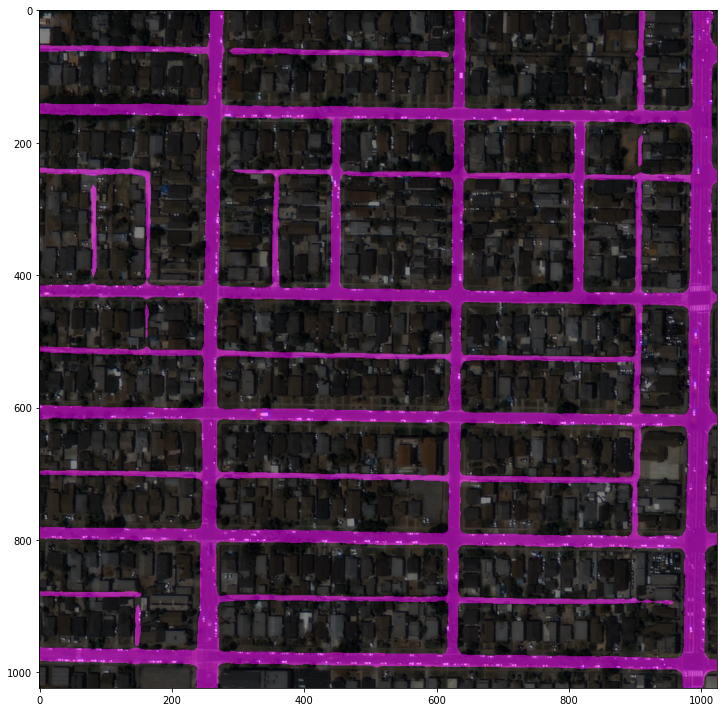

In [ ]:
checkpoint_file = '/content/drive/Shareddrives/msmg/level1/source/road/segformer/mit-b5/no29_iter30000_origin_add_deepglobe_checkpoint/best_mIoU_iter_XXXX.pth'  # 학습된 가중치 파일

# checkpoint 저장된 model 파일을 이용하여 모델을 생성, 이때 Config는 위에서 update된 config 사용. 
model_ckpt = init_segmentor(cfg, checkpoint_file, device='cuda:0')  #cuda gpu 사용

img = mmcv.imread('/content/drive/Shareddrives/msmg/level1/dataset/validation/road/image/BLD11474_PS3_K3A_NIA0390.png') # inference할 이미지
result = inference_segmentor(model_ckpt, img)
show_result_pyplot(model_ckpt, img, result, palette)

# Inference and evaluation on the test dataset

In [ ]:
import torch, torchvision

import mmseg
from mmseg.apis import inference_segmentor, init_segmentor, show_result_pyplot
from mmseg.core.evaluation import get_palette
from mmseg.datasets.builder import DATASETS
from mmseg.datasets.custom import CustomDataset
from mmseg.apis import set_random_seed

import mmcv
from mmcv import Config

import matplotlib.pyplot as plt
import os.path as osp
import numpy as np
from PIL import Image

In [ ]:
# convert dataset annotation to semantic segmentation map
data_root = '/content/drive/Shareddrives/msmg/level1/dataset/train/road'
img_dir = 'image'
ann_dir = 'annotation'

# define class and plaette for better visualization
classes = ('background', 'road')
palette = [[0, 0, 0], [255, 0, 255]]

In [ ]:
config_file = '/content/mmsegmentation/configs/segformer/segformer_mit-b5_512x512_160k_ade20k.py'
checkpoint_file = '/content/drive/Shareddrives/msmg/level1/source/road/segformer/mit-b5/no35_iter30000_origin_add_deepglobe_checkpoint/best_mIoU_iter_17700.pth'
save_pth_path = '/content/drive/Shareddrives/msmg/level1/source/road/segformer/mit-b5/no35_tuning_checkpoint'

In [ ]:
@DATASETS.register_module(force=True)
class RoadSemanticSegmentation(CustomDataset):
    CLASSES = classes
    PALETTE = palette
    def __init__(self, split, **kwargs):
        super().__init__(img_suffix='.png', seg_map_suffix='.png', split=split, **kwargs)
        assert osp.exists(self.img_dir) and self.split is not None

In [ ]:
from mmcv import Config

cfg = Config.fromfile(config_file)

In [ ]:
from mmseg.apis import set_random_seed

# add CLASSES and PALETTE to checkpoint
cfg.checkpoint_config.meta = dict(
    CLASSES=classes,
    PALETTE=palette)

# Since we use only one GPU, BN is used instead of SyncBN
cfg.norm_cfg = dict(type='BN', requires_grad=True)

#cfg.model.backbone.norm_cfg = cfg.norm_cfg
cfg.model.decode_head.norm_cfg = cfg.norm_cfg

# modify num classes of the model in decode/auxiliary head
cfg.model.decode_head.num_classes = 2

# modify loss function crossentropy
cfg.model.decode_head.loss_decode= [dict(type='FocalLoss',loss_name = 'loss_focal', alpha = 0.8, loss_weight=0.8),
                                    dict(type='LovaszLoss',loss_name = 'loss_lovasz',per_image=False, reduction='none',  loss_type='multi_class',classes='all',class_weight=[0.5, 1.0], loss_weight=0.2)]

# Modify dataset type and path
cfg.dataset_type = 'RoadSemanticSegmentation'
cfg.data_root = data_root

cfg.data.samples_per_gpu = 6
cfg.data.workers_per_gpu = 6

# Albumentations transforms settings
albu_train_transforms = [
    dict(
    type='OneOf',
    transforms=[
        dict(type='RandomRotate90', p=1.0)
    ], p=0.5),

    dict(
    type='OneOf',
    transforms=[
        dict(type='RandomBrightnessContrast',brightness_limit=0.1, contrast_limit=0.15, p=1.0),
        dict(type='CLAHE', clip_limit=4.0, tile_grid_size=(8, 8), always_apply=False, p=1.0),
        dict(type='HueSaturationValue', hue_shift_limit=15, sat_shift_limit=25, val_shift_limit=10, p=1.0),
    ], p=0.5)
]

# pipline
cfg.img_norm_cfg = dict(
    mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375], to_rgb=True)
cfg.crop_size = (512, 512)
cfg.train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'),
    dict(type='Resize', img_scale=(1024, 1024), ratio_range=(0.5, 1.5)),
    dict(type='RandomCrop', crop_size=cfg.crop_size, cat_max_ratio=0.75),
    dict(type='RandomFlip', flip_ratio=0.5),
    dict(
        type='Albu',
        transforms=albu_train_transforms,
        keymap=dict(img='image', gt_semantic_seg='mask'),
        update_pad_shape=True,
        ),
    dict(type='PhotoMetricDistortion'),
    dict(type='Normalize', **cfg.img_norm_cfg),
    dict(type='Pad', size=cfg.crop_size, pad_val=0, seg_pad_val=255),
    dict(type='DefaultFormatBundle'),
    dict(type='Collect', keys=['img', 'gt_semantic_seg']),
]

cfg.test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(
        type='MultiScaleFlipAug',
        img_scale=(1024, 1024),
        # img_ratios=[0.5, 0.75, 1.0, 1.25, 1.5, 1.75],
        flip=False,
        transforms=[
            dict(type='Resize', keep_ratio=True),
            dict(type='RandomFlip'),
            dict(type='Normalize', **cfg.img_norm_cfg),
            dict(type='ImageToTensor', keys=['img']),
            dict(type='Collect', keys=['img']),
        ])
]

cfg.data.train.type = cfg.dataset_type
cfg.data.train.data_root = '/content/drive/Shareddrives/msmg/level1/dataset/train/road/'
cfg.data.train.img_dir = 'image'
cfg.data.train.ann_dir = 'annotation'
cfg.data.train.pipeline = cfg.train_pipeline
cfg.data.train.split = 'split/train.txt'

cfg.data.val.type = cfg.dataset_type
cfg.data.val.data_root = '/content/drive/Shareddrives/msmg/level1/dataset/validation/road/'
cfg.data.val.img_dir = 'image'
cfg.data.val.ann_dir = 'annotation'
cfg.data.val.pipeline = cfg.test_pipeline
cfg.data.val.split = 'split/validation.txt'

cfg.data.test.type = cfg.dataset_type
cfg.data.test.data_root = '/content/drive/Shareddrives/msmg/level1/dataset/validation/road/'
cfg.data.test.img_dir = 'image'
cfg.data.test.ann_dir = 'annotation'
cfg.data.test.pipeline = cfg.test_pipeline
cfg.data.test.split = 'split/validation.txt'

# We can still use the pre-trained Mask RCNN model though we do not need to
# use the mask branch
cfg.load_from = checkpoint_file

# Set up working dir to save files and logs.
cfg.work_dir = save_pth_path

cfg.runner.max_iters = 35000
cfg.log_config.interval = 10
cfg.evaluation.interval = 100
cfg.evaluation.save_best = 'mIoU'
cfg.checkpoint_config.interval = 2000

# Set seed to facitate reproducing the result
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)

# We can also use tensorboard to log the training process
cfg.log_config.hooks = [
    dict(type='TextLoggerHook'),
    dict(type='TensorboardLoggerHook')]

# Let's have a look at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
norm_cfg = dict(type='BN', requires_grad=True)
model = dict(
    type='EncoderDecoder',
    pretrained='pretrain/mit_b5.pth',
    backbone=dict(
        type='MixVisionTransformer',
        in_channels=3,
        embed_dims=64,
        num_stages=4,
        num_layers=[3, 6, 40, 3],
        num_heads=[1, 2, 5, 8],
        patch_sizes=[7, 3, 3, 3],
        sr_ratios=[8, 4, 2, 1],
        out_indices=(0, 1, 2, 3),
        mlp_ratio=4,
        qkv_bias=True,
        drop_rate=0.0,
        attn_drop_rate=0.0,
        drop_path_rate=0.1),
    decode_head=dict(
        type='SegformerHead',
        in_channels=[64, 128, 320, 512],
        in_index=[0, 1, 2, 3],
        channels=256,
        dropout_ratio=0.1,
        num_classes=2,
        norm_cfg=dict(type='BN', requires_grad=True),
        align_corners=False,
        loss_decode=[
            dict(
                type='FocalLoss',
                loss_name='loss_focal',
                alpha=0.8,
                loss_weight=0.8)

In [ ]:
################### origin + deepglobe data ###################

dataset_origin_train = dict(
    type='RoadSemanticSegmentation',
    data_root='/content/drive/Shareddrives/msmg/level1/dataset/train/road/',
    img_dir='image',
    ann_dir='annotation',
    pipeline=[
        dict(type='LoadImageFromFile'),
        dict(type='LoadAnnotations'),
        dict(type='Resize', img_scale=(1024, 1024), ratio_range=(0.5, 1.5)),
        dict(type='RandomCrop', crop_size=(512, 512)),
        dict(type='RandomFlip', flip_ratio=0.5),
        dict(
            type='Albu',
            transforms=albu_train_transforms,
            keymap=dict(img='image', gt_semantic_seg='mask'),
            update_pad_shape=True,
        ),
        dict(type='PhotoMetricDistortion'),
        dict(type='Normalize',mean=[123.675, 116.28, 103.53],std=[58.395, 57.12, 57.375],to_rgb=True),
        dict(type='Pad', size=(512, 512), pad_val=0, seg_pad_val=255),
        dict(type='DefaultFormatBundle'),
        dict(type='Collect', keys=['img', 'gt_semantic_seg'])
    ],
    split='split/train.txt'
)

dataset_deepglobe_train = dict(
    type='RoadSemanticSegmentation',
    data_root= '/content/drive/Shareddrives/msmg/level1/dataset/train/road/',
    img_dir='deepglobe_image',
    ann_dir='deepglobe_annotation',
    pipeline=[
        dict(type='LoadImageFromFile'),
        dict(type='LoadAnnotations'),
        dict(type='Resize', img_scale=(1024, 1024), ratio_range=(0.7, 2.0)),
        dict(type='RandomCrop', crop_size=(512, 512)),
        dict(type='RandomFlip', flip_ratio=0.5),
        dict(
            type='Albu',
            transforms=albu_train_transforms,
            keymap=dict(img='image', gt_semantic_seg='mask'),
            update_pad_shape=True,
        ),
        dict(type='PhotoMetricDistortion'),
        dict(type='Normalize',mean=[123.675, 116.28, 103.53],std=[58.395, 57.12, 57.375],to_rgb=True),
        dict(type='Pad', size=(512, 512), pad_val=0, seg_pad_val=255),
        dict(type='DefaultFormatBundle'),
        dict(type='Collect', keys=['img', 'gt_semantic_seg'])
        ],
    split='split/deepglobe_ratio95.txt'
)

cfg.data.train = [
                  dataset_origin_train,
                  dataset_deepglobe_train
]
    
# Let's have a look at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
norm_cfg = dict(type='BN', requires_grad=True)
model = dict(
    type='EncoderDecoder',
    pretrained='pretrain/mit_b5.pth',
    backbone=dict(
        type='MixVisionTransformer',
        in_channels=3,
        embed_dims=64,
        num_stages=4,
        num_layers=[3, 6, 40, 3],
        num_heads=[1, 2, 5, 8],
        patch_sizes=[7, 3, 3, 3],
        sr_ratios=[8, 4, 2, 1],
        out_indices=(0, 1, 2, 3),
        mlp_ratio=4,
        qkv_bias=True,
        drop_rate=0.0,
        attn_drop_rate=0.0,
        drop_path_rate=0.1),
    decode_head=dict(
        type='SegformerHead',
        in_channels=[64, 128, 320, 512],
        in_index=[0, 1, 2, 3],
        channels=256,
        dropout_ratio=0.1,
        num_classes=2,
        norm_cfg=dict(type='BN', requires_grad=True),
        align_corners=False,
        loss_decode=[
            dict(
                type='FocalLoss',
                loss_name='loss_focal',
                alpha=0.8,
                loss_weight=0.8)

load checkpoint from local path: /content/drive/Shareddrives/msmg/level1/source/road/segformer/mit-b5/no35_tuning_checkpoint/best_mIoU_iter_200.pth


/content/mmsegmentation/mmseg/models/segmentors/base.py:289: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


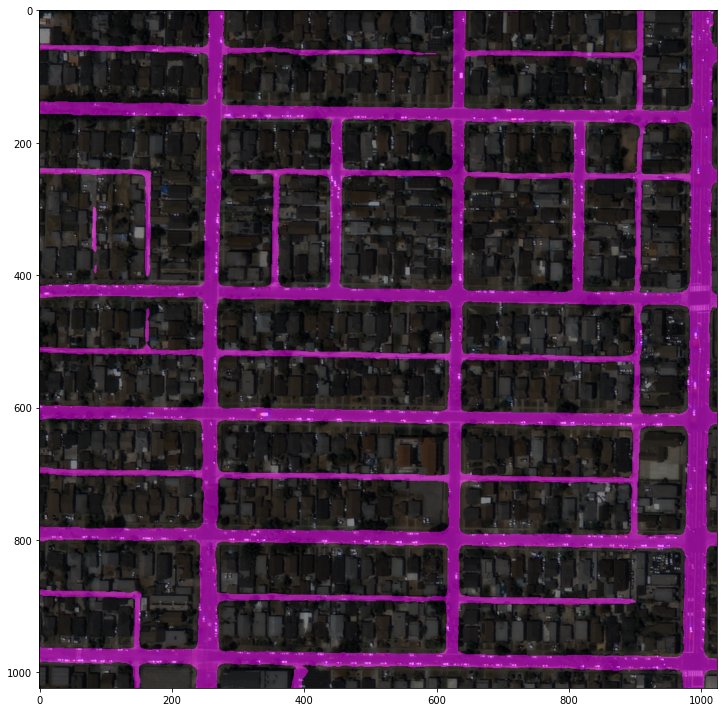

In [ ]:
checkpoint_file = '/content/drive/Shareddrives/msmg/level1/source/road/segformer/mit-b5/no35_tuning_checkpoint/best_mIoU_iter_200.pth'  # 학습된 가중치 파일

# checkpoint 저장된 model 파일을 이용하여 모델을 생성, 이때 Config는 위에서 update된 config 사용. 
model_ckpt = init_segmentor(cfg, checkpoint_file, device='cuda:0')  #cuda gpu 사용

img = mmcv.imread('/content/drive/Shareddrives/msmg/level1/dataset/validation/road/image/BLD11474_PS3_K3A_NIA0390.png') # inference할 이미지
result = inference_segmentor(model_ckpt, img)
show_result_pyplot(model_ckpt, img, result, palette)

In [ ]:
from mmseg.datasets import (build_dataloader, build_dataset)

# test용 Dataset과 DataLoader 생성. 
# build_dataset()호출 시 list로 감싸지 않는 것이 train용 dataset 생성시와 차이. 
dataset = build_dataset(cfg.data.test)
data_loader = build_dataloader(
        dataset,
        # 반드시 아래 samples_per_gpu 인자값은 1로 설정
        #samples_per_gpu=cfg.data.samples_per_gpu,
        #workers_per_gpu=cfg.data.workers_per_gpu,
        samples_per_gpu=1,
        workers_per_gpu=1,
        dist=False,
        shuffle=False)

2022-06-07 07:07:50,512 - mmseg - INFO - Loaded 127 images


In [ ]:
from mmseg.apis import multi_gpu_test, single_gpu_test
from mmcv.parallel import MMDataParallel, MMDistributedDataParallel
#from mmseg.apis import inference_detector, init_detector, show_result_pyplot

model_ckpt = MMDataParallel(model_ckpt, device_ids=[0])

In [ ]:
# single_gpu_test() 를 호출하여 test데이터 세트의 interence 수행. 반드시 batch size는 1이 되어야 함. 
# 위에서 만든 /content/show_test_output 디렉토리에 interence 결과가 시각화된 이미지가 저장됨. 
outputs = single_gpu_test(model_ckpt, data_loader, False, '/content/test', 0.9)

[                                                  ] 0/127, elapsed: 0s, ETA:

/content/mmsegmentation/mmseg/apis/test.py:69: UserWarning: DeprecationWarning: ``efficient_test`` will be deprecated, the evaluation is CPU memory friendly with pre_eval=True
  'DeprecationWarning: ``efficient_test`` will be deprecated, the '


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 1.8 task/s, elapsed: 70s, ETA:     0s

In [ ]:
metric = dataset.evaluate(outputs, metric='mIoU')
print(metric)

per class results:

+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.86 | 97.35 |
|    road    | 64.28 | 78.33 |
+------------+-------+-------+
Summary:

+------+-------+-------+
| aAcc |  mIoU |  mAcc |
+------+-------+-------+
| 95.3 | 79.57 | 87.84 |
+------+-------+-------+
{'aAcc': 0.953, 'mIoU': 0.7957, 'mAcc': 0.8784000000000001, 'IoU.background': 0.9486, 'IoU.road': 0.6428, 'Acc.background': 0.9734999999999999, 'Acc.road': 0.7833}
